L'installation [Elasticité dynamique](https://github.com/laurentperrinet/elasticite) agit comme un filtre et génère de nouveaux espaces démultipliés, comme un empilement quasi infini d'horizons. Par principe de réflexion, la pièce absorbe l'image de l'environnement et accumule les points de vue ; le mouvement permanent requalifie continuellement ce qui est regardé et entendu. 

Ce post implémente une dynamique sur le point focal.

<!-- TEASER_END -->

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
matplotlib.rcParams['figure.max_open_warning'] = 400
#%matplotlib inline
#%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'

In [3]:
import elasticite as el
import numpy as np
duration = el.get_default_args(el.EdgeGrid.render)['duration']

In [4]:
import sys
sys.path.append('..')
from scenario_line_fresnel import EdgeGrid
e = EdgeGrid(N_lame=25, grid_type='line')

In [5]:
e.lames.shape

(4, 25)

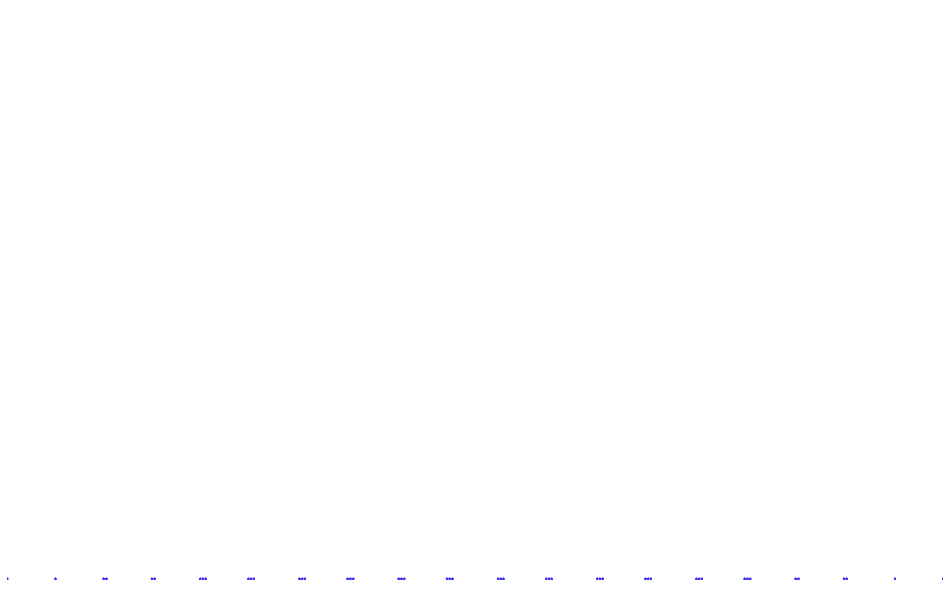

In [6]:
e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure(N_mirror=2, alpha = .5)
fig, ax = e.plot_structure()

In [7]:
e.particles.shape, e.N_particles, e.N_particles_per_lame

((3, 2352), 48, 8)

Greedy :

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


t:   1%|          | 2/200 [00:00<00:10, 19.39it/s, now=None]

Moviepy - Building video /var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/tmppx5zr97a.mp4.
Moviepy - Writing video /var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/tmppx5zr97a.mp4



Moviepy - Done !
Moviepy - video ready /var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/tmppx5zr97a.mp4


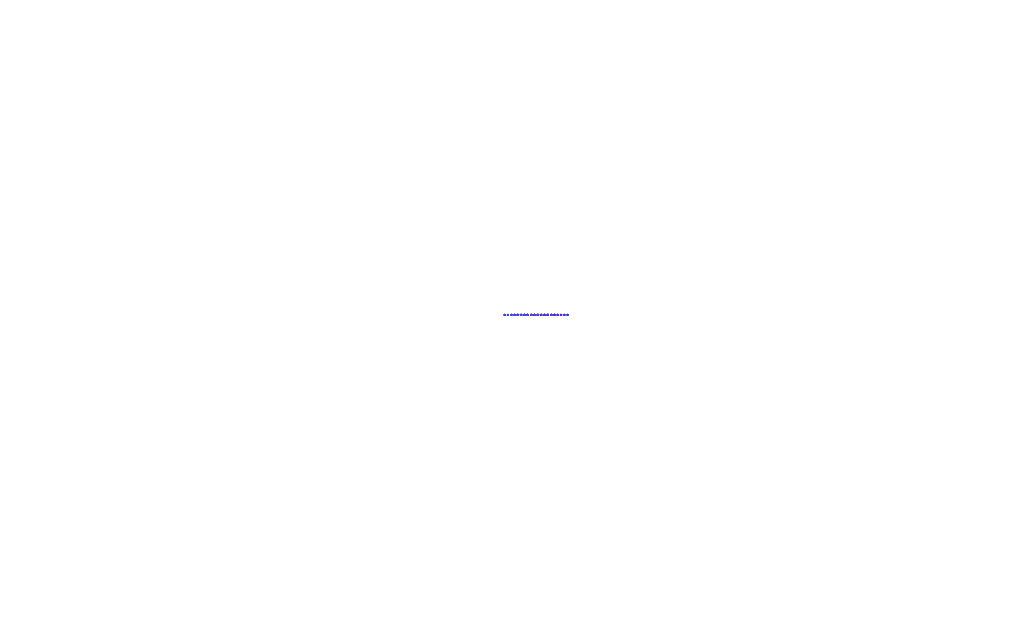

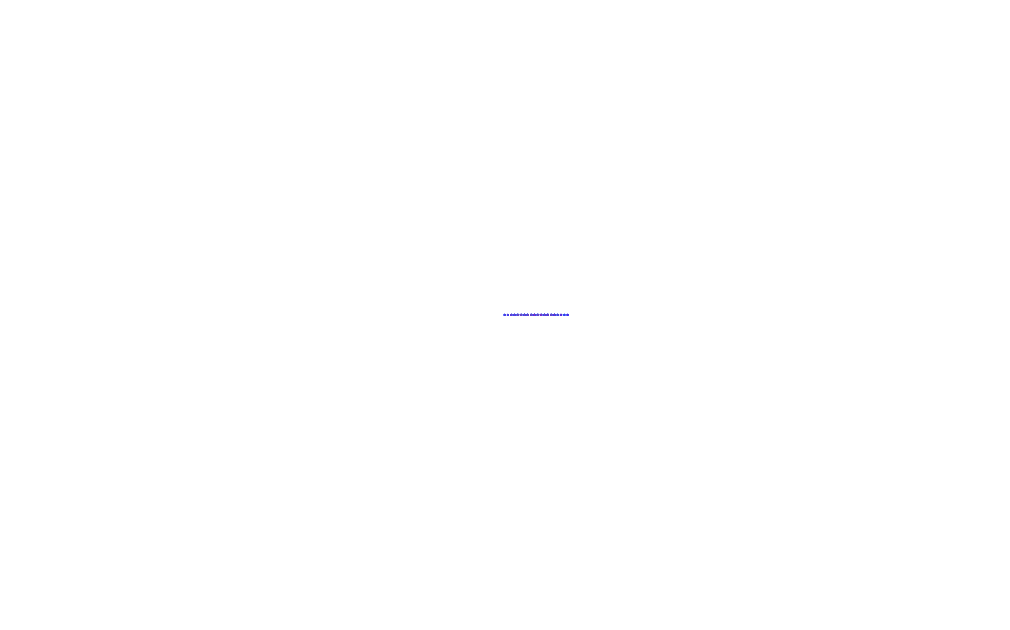

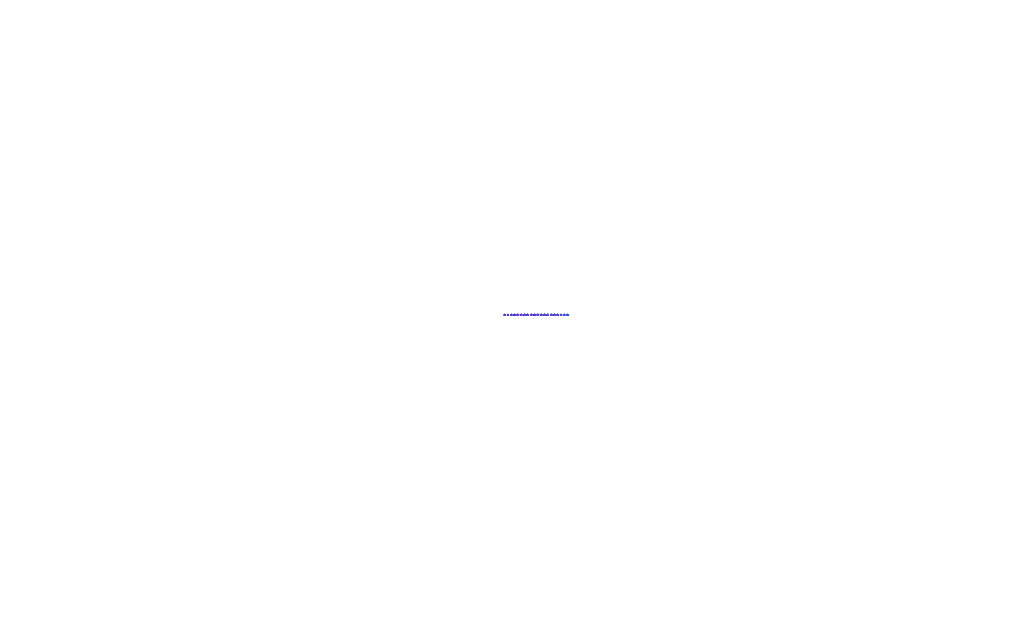

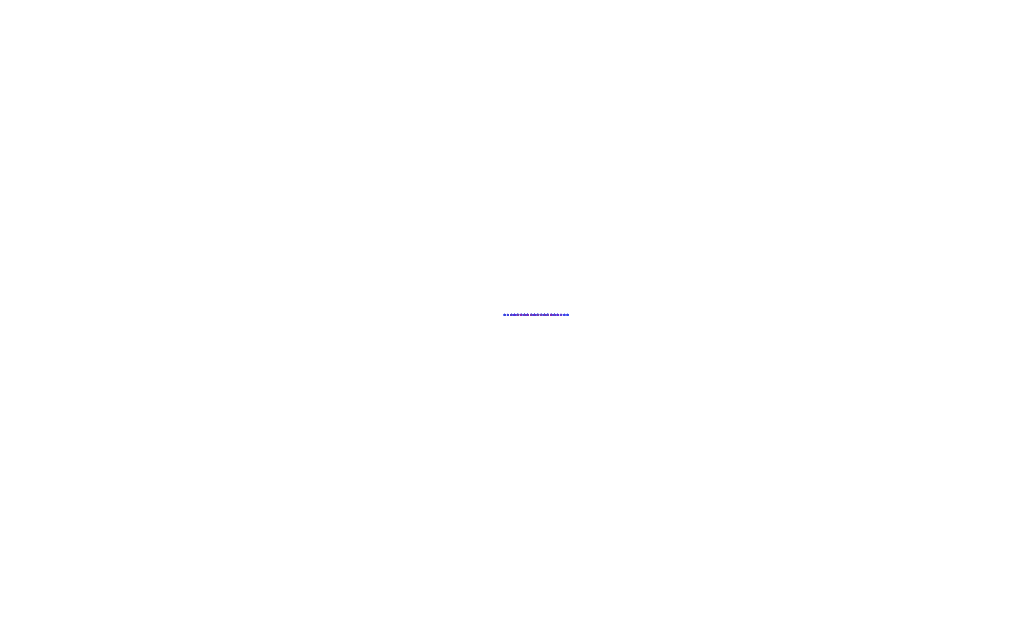

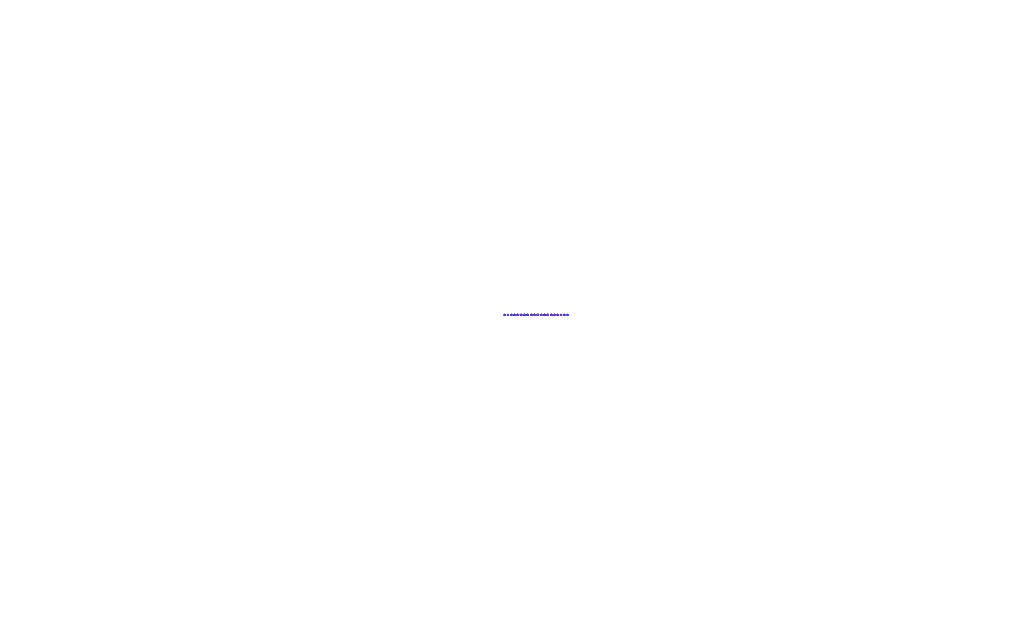

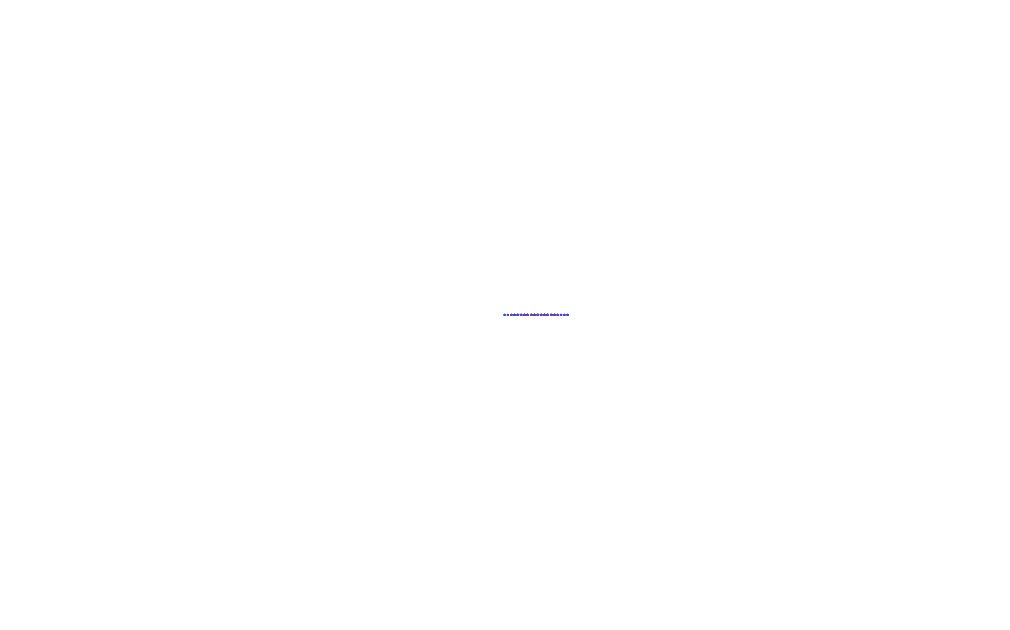

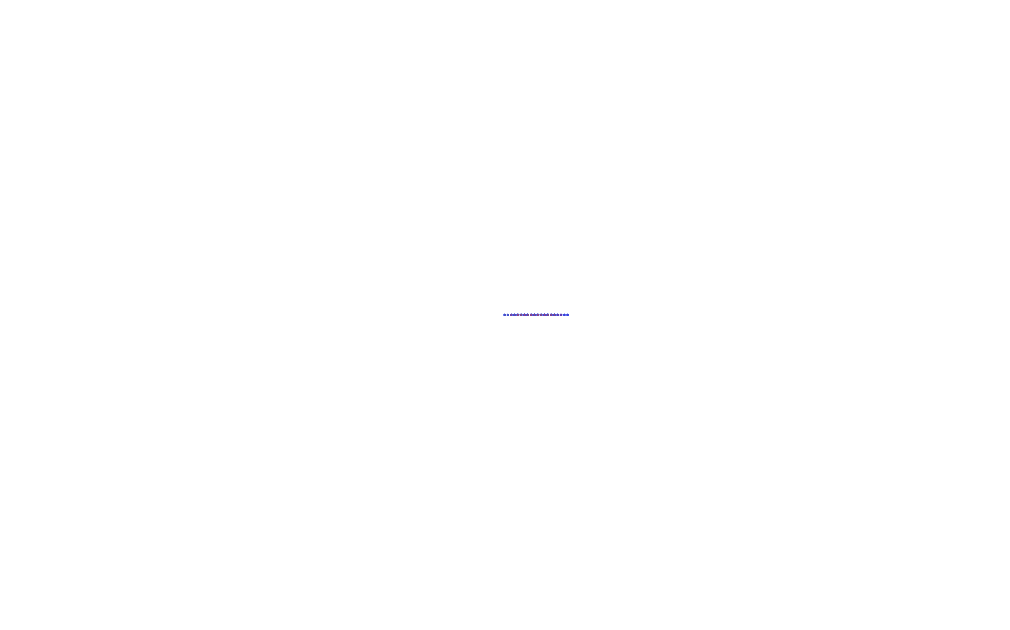

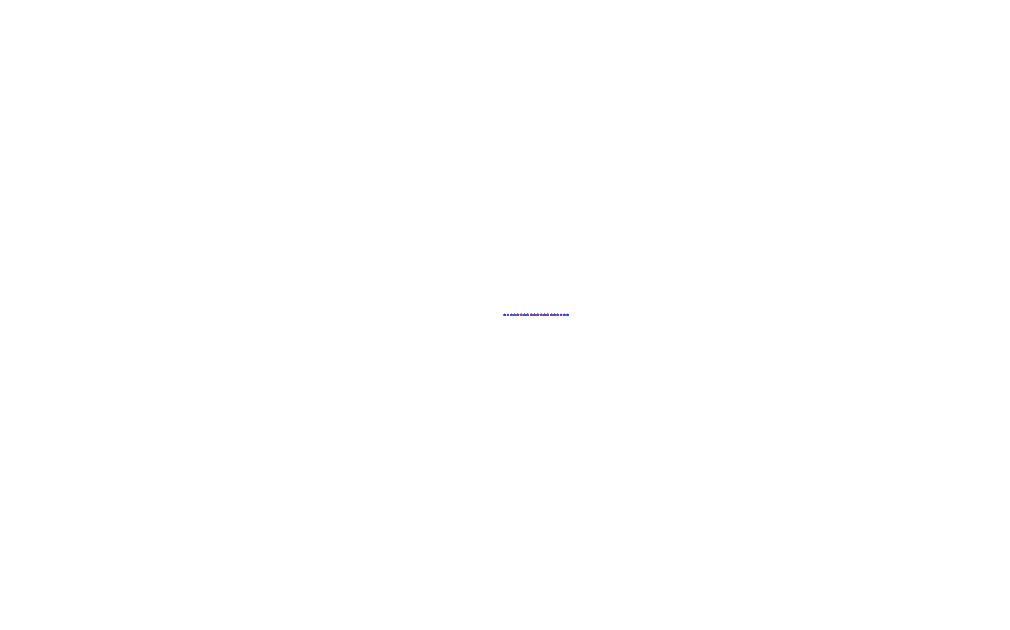

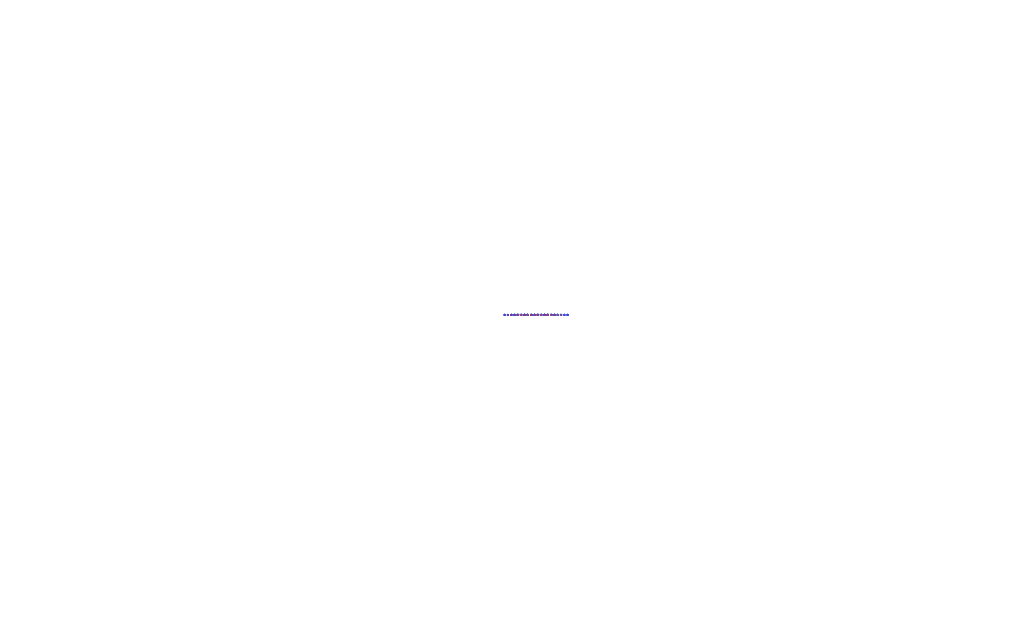

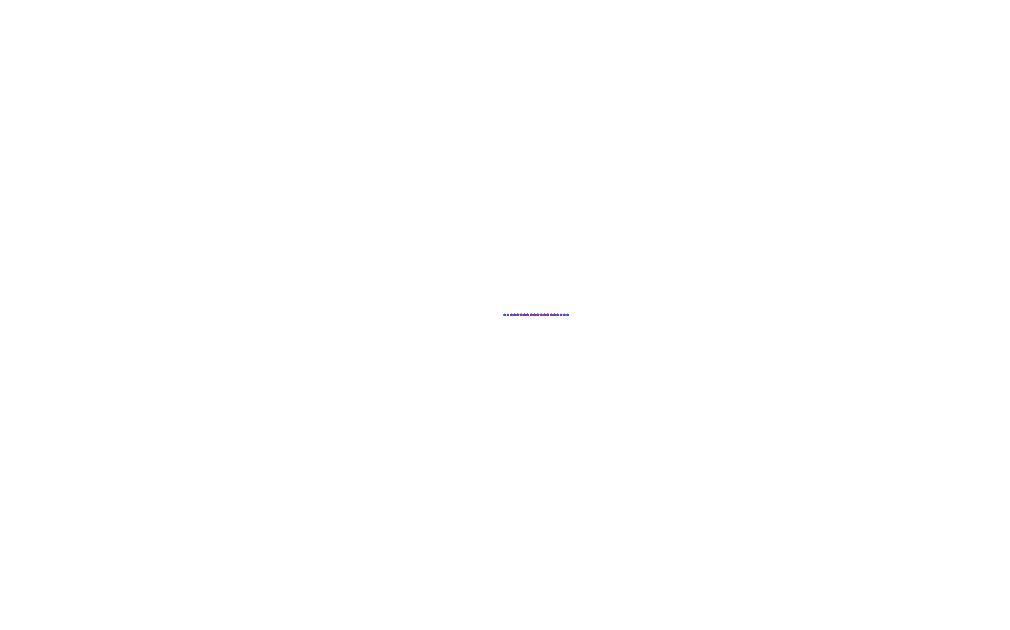

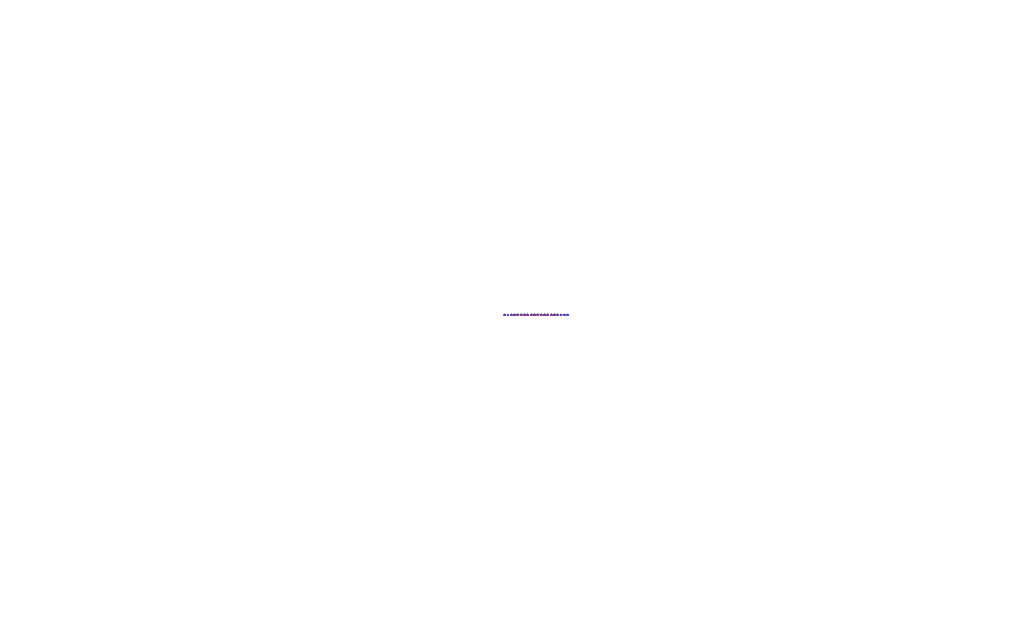

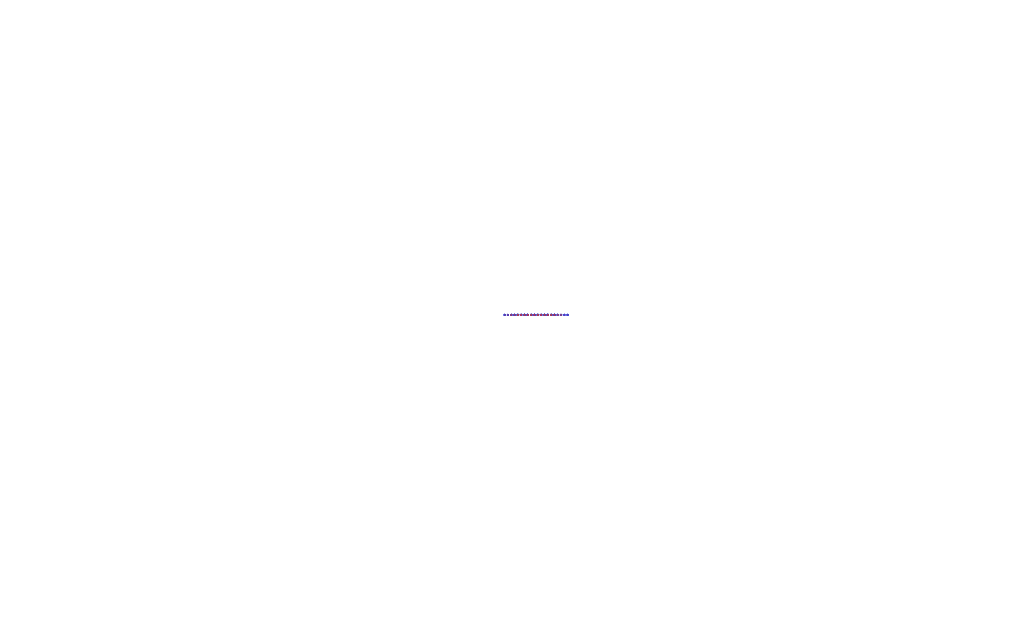

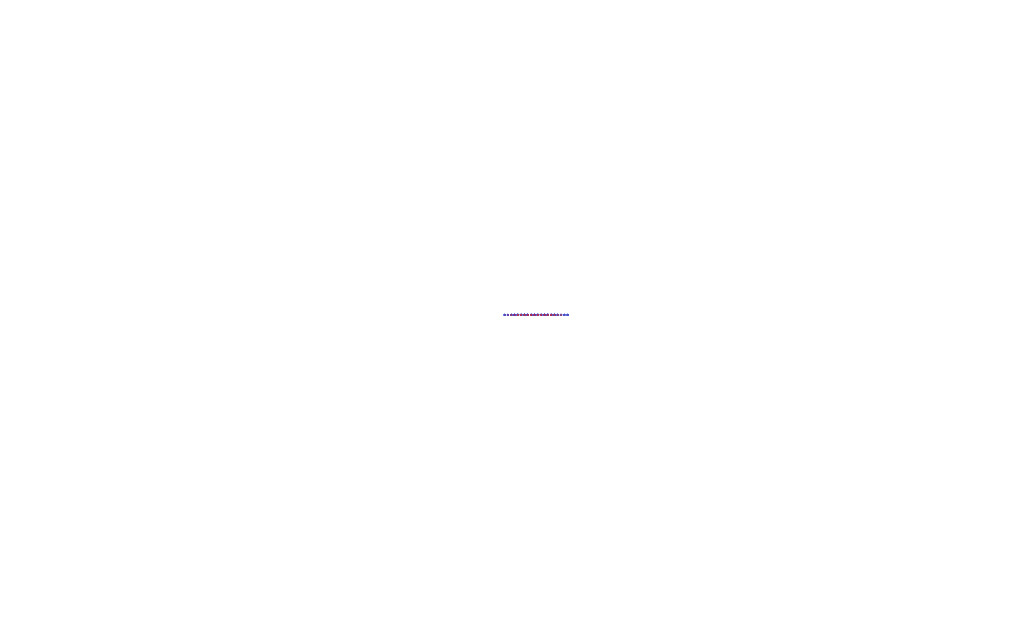

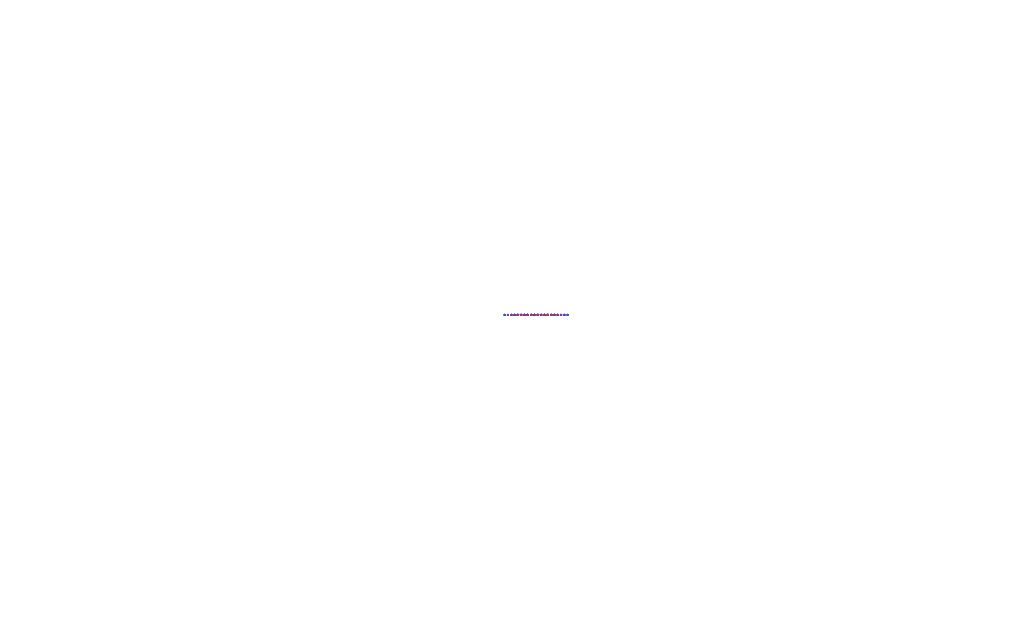

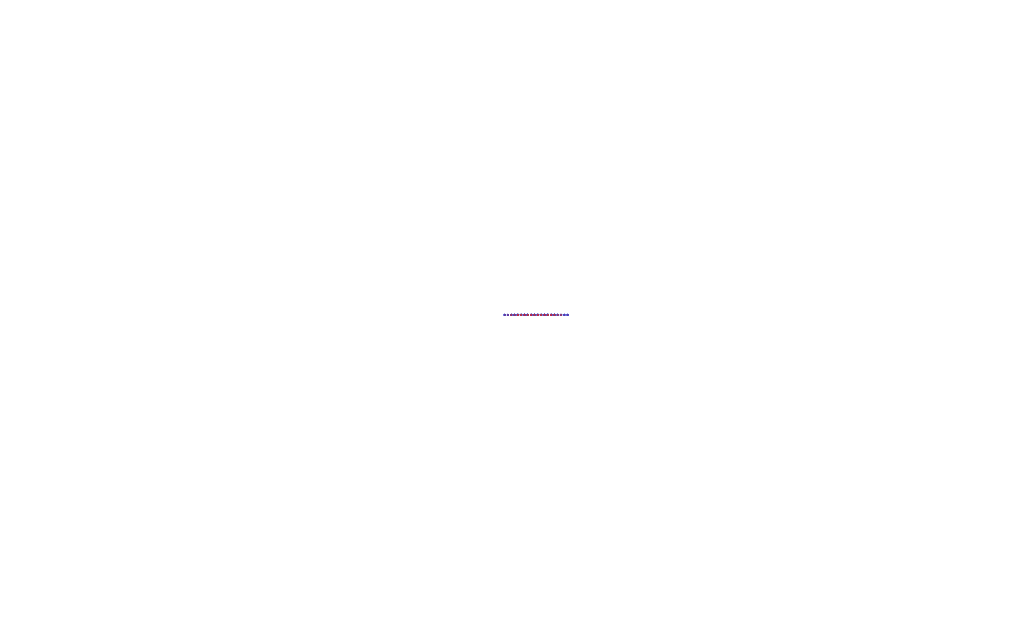

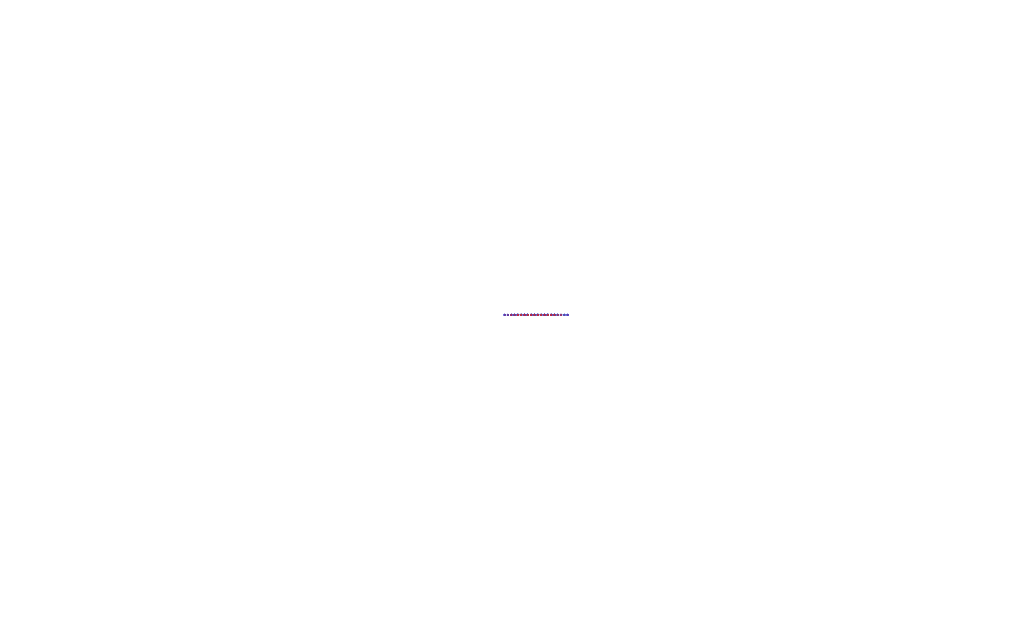

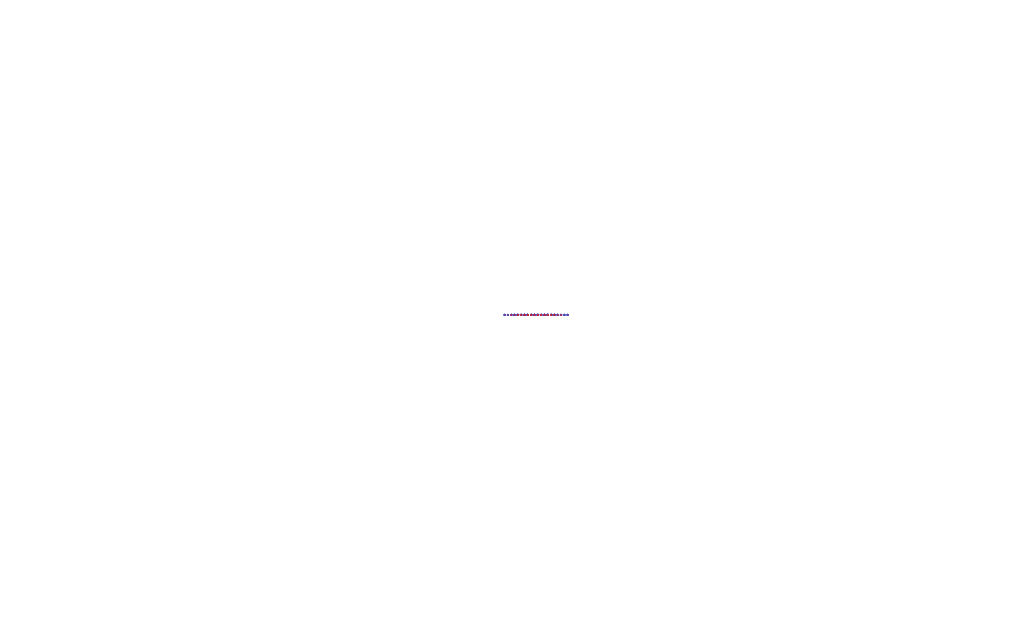

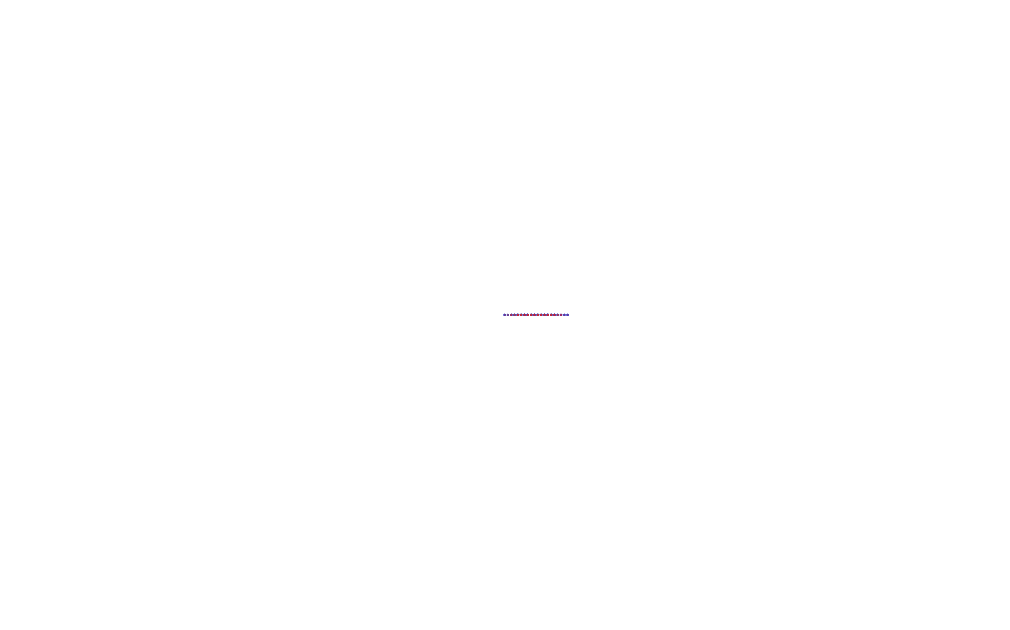

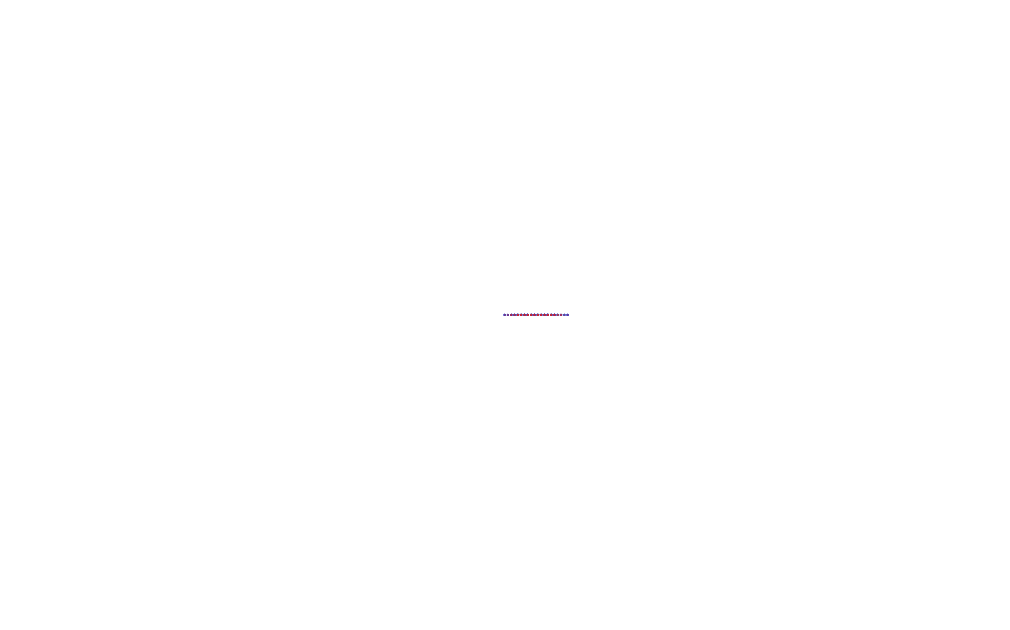

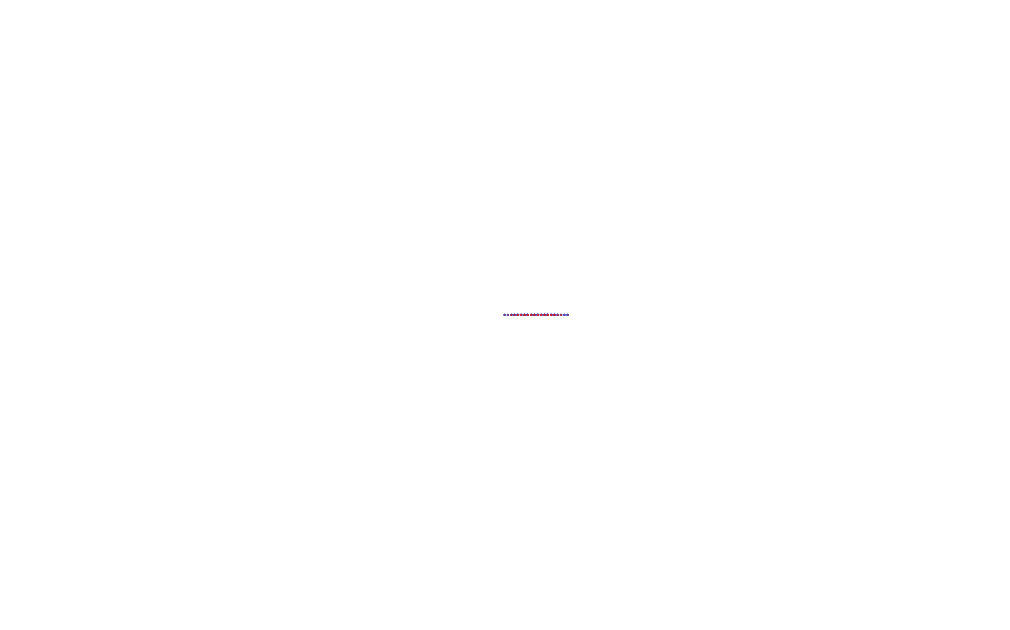

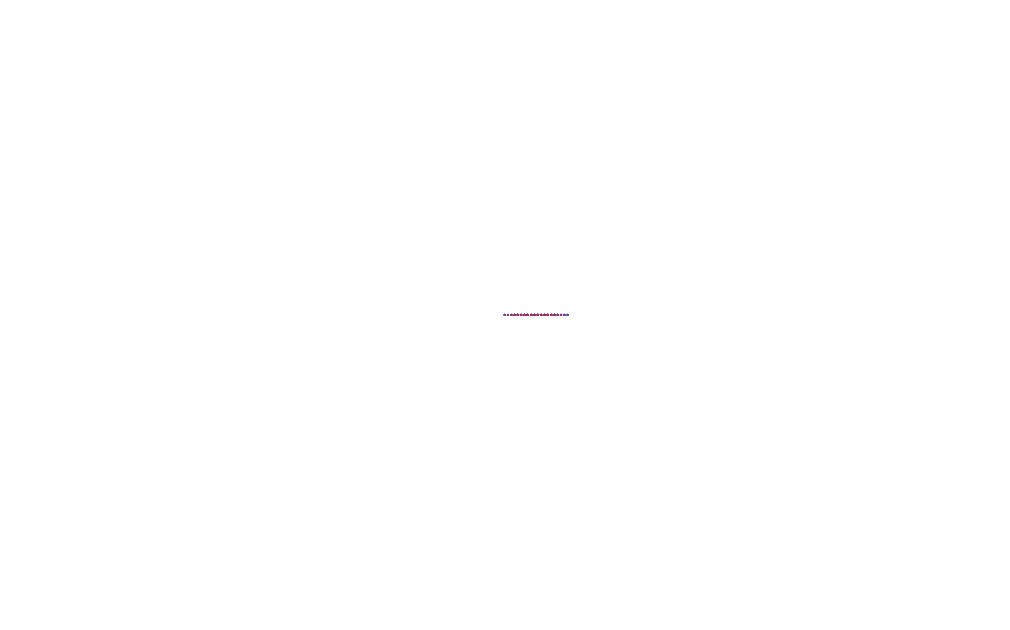

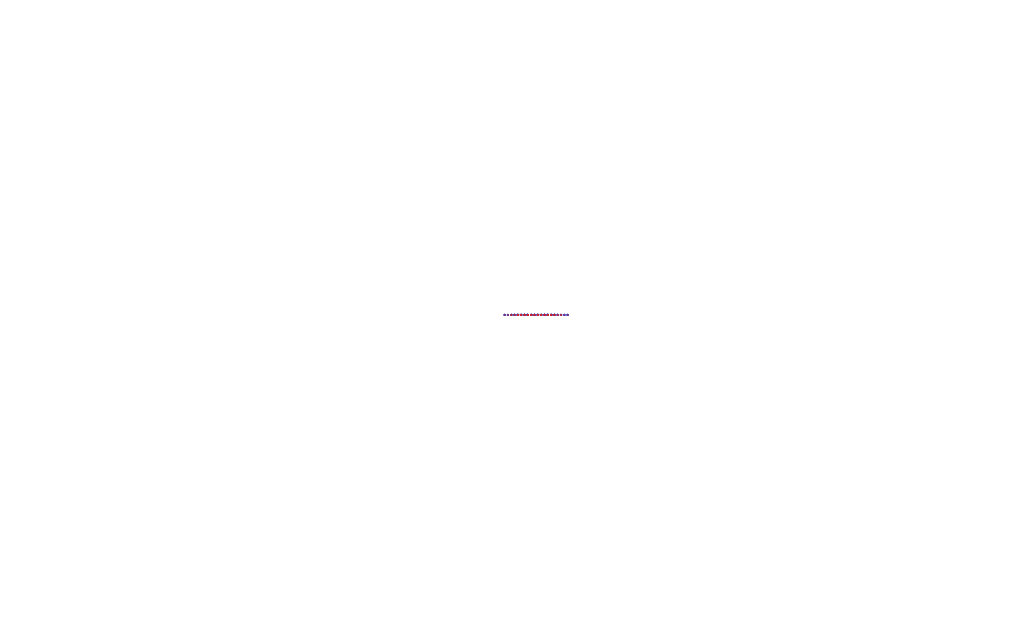

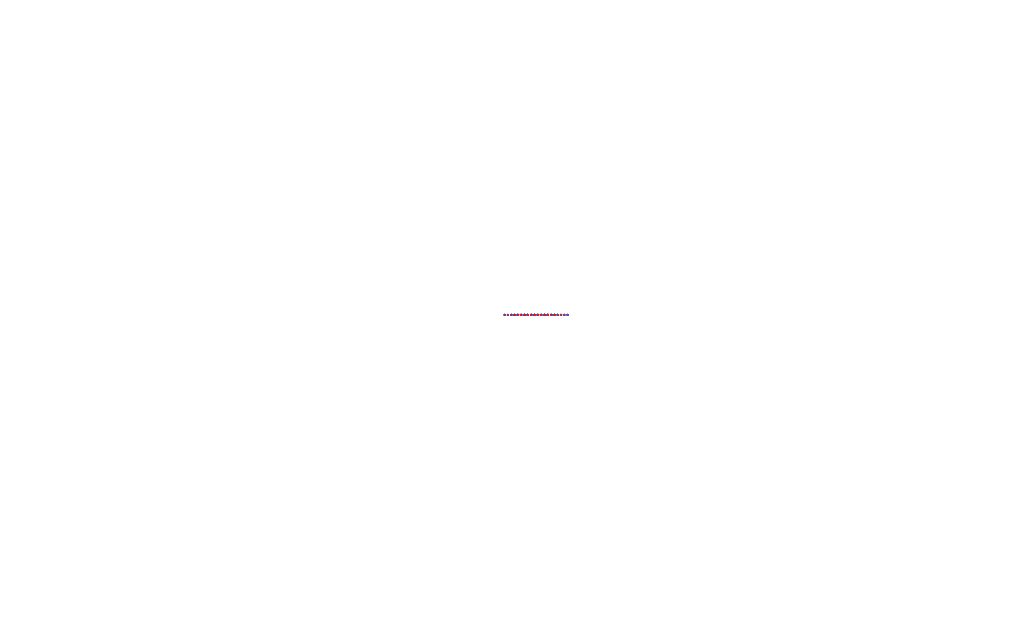

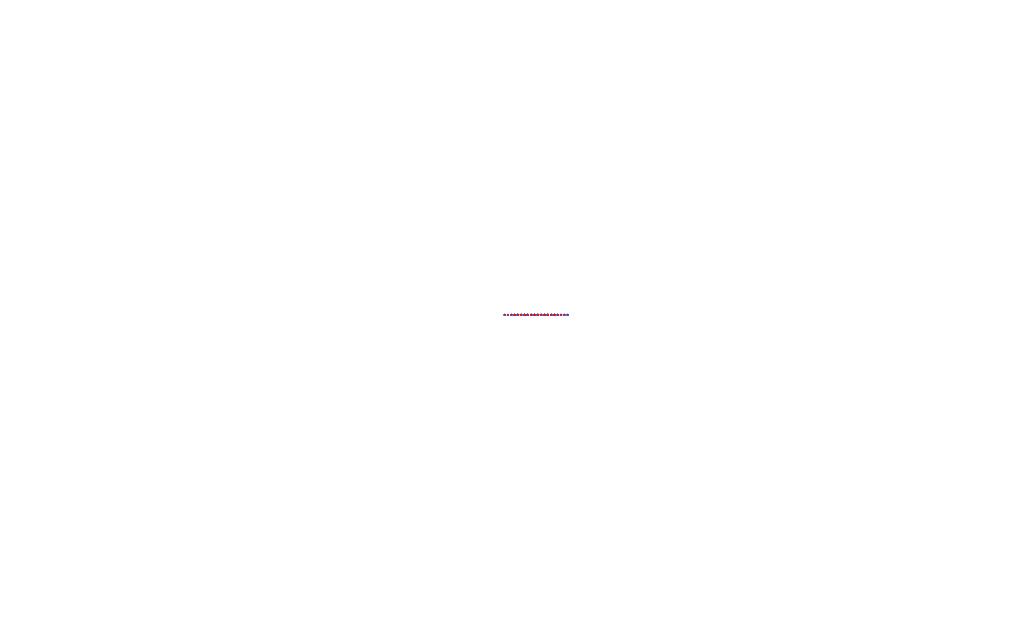

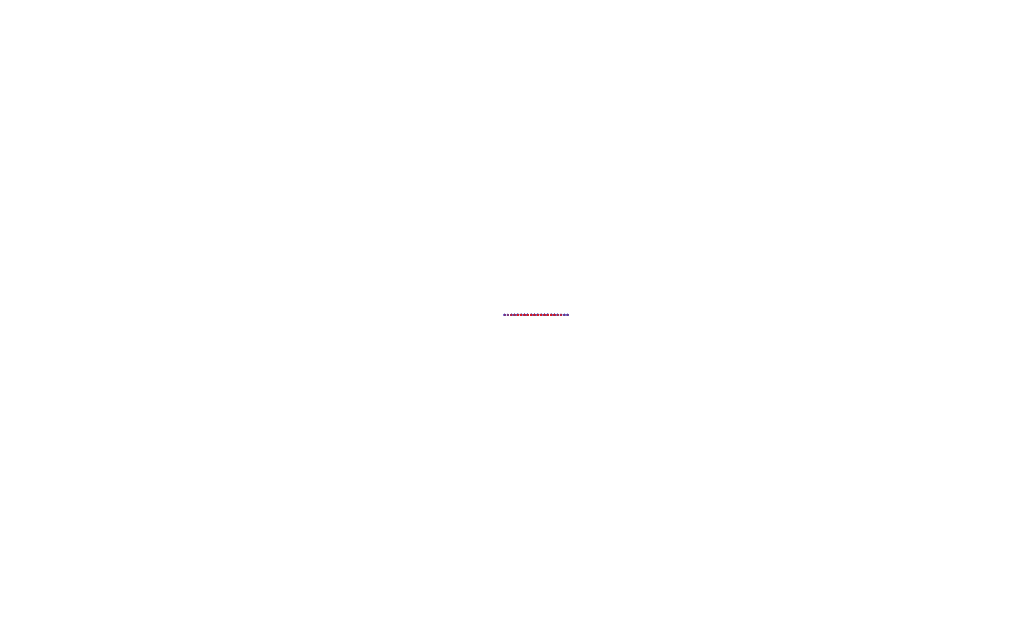

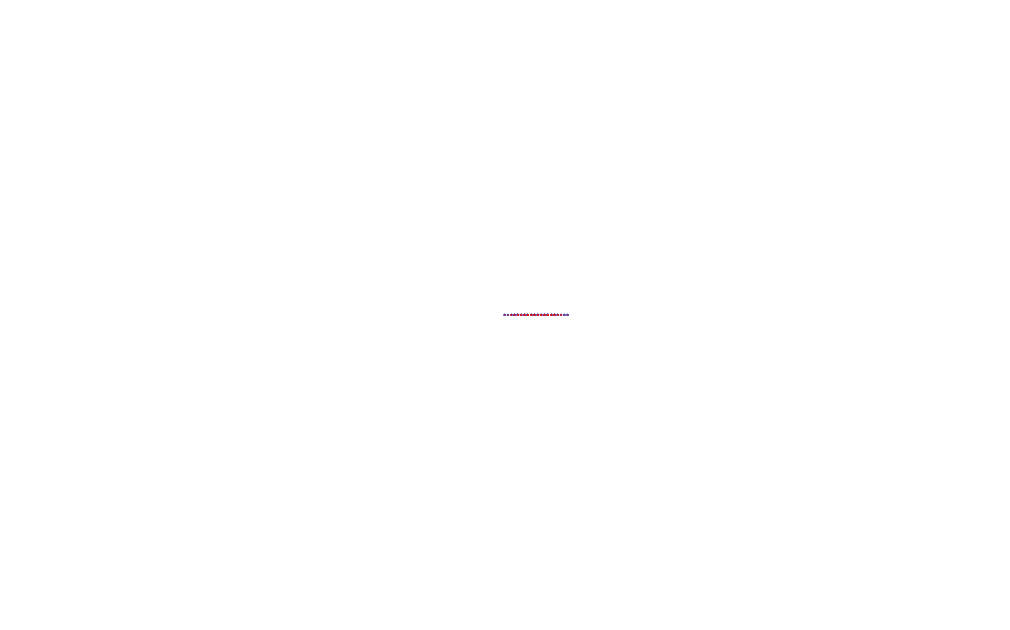

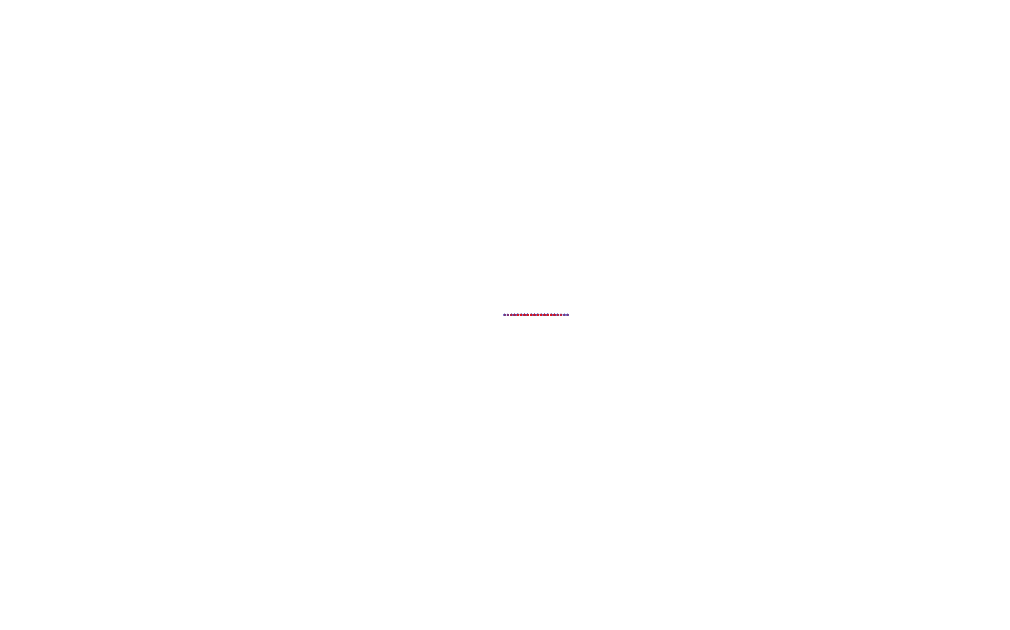

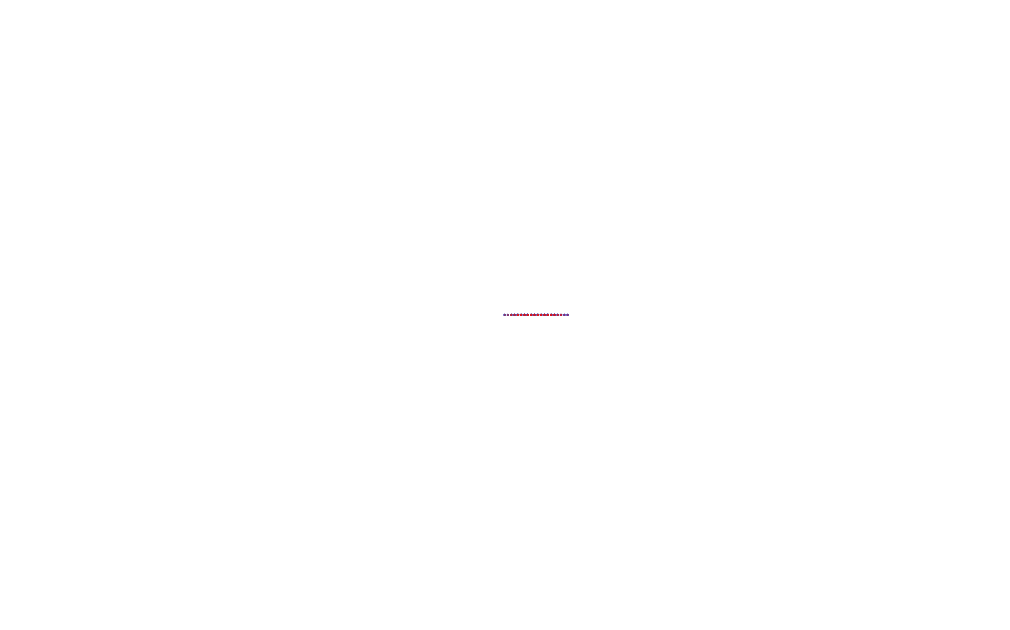

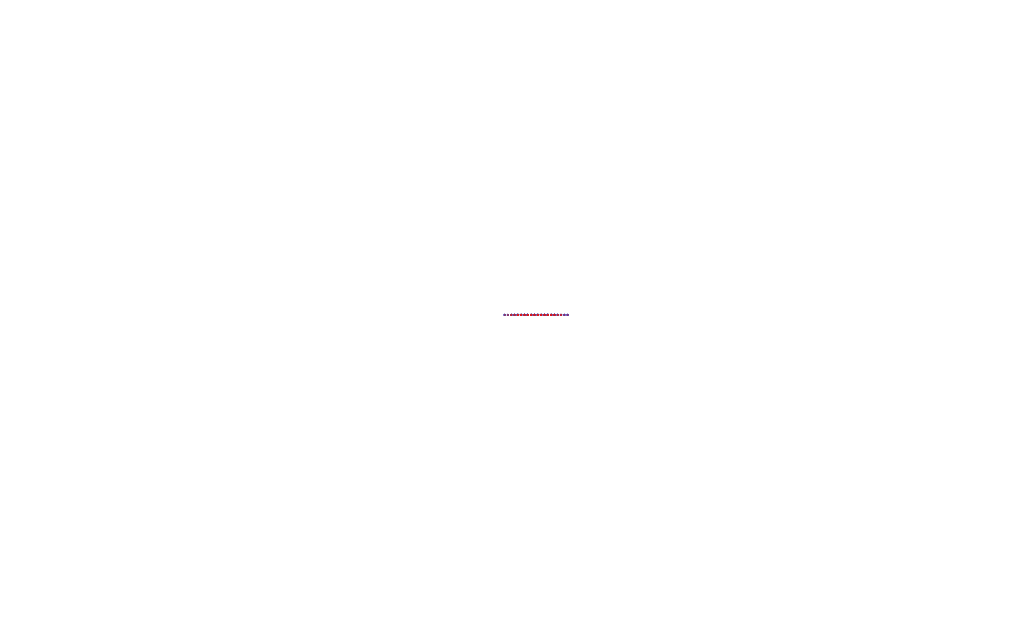

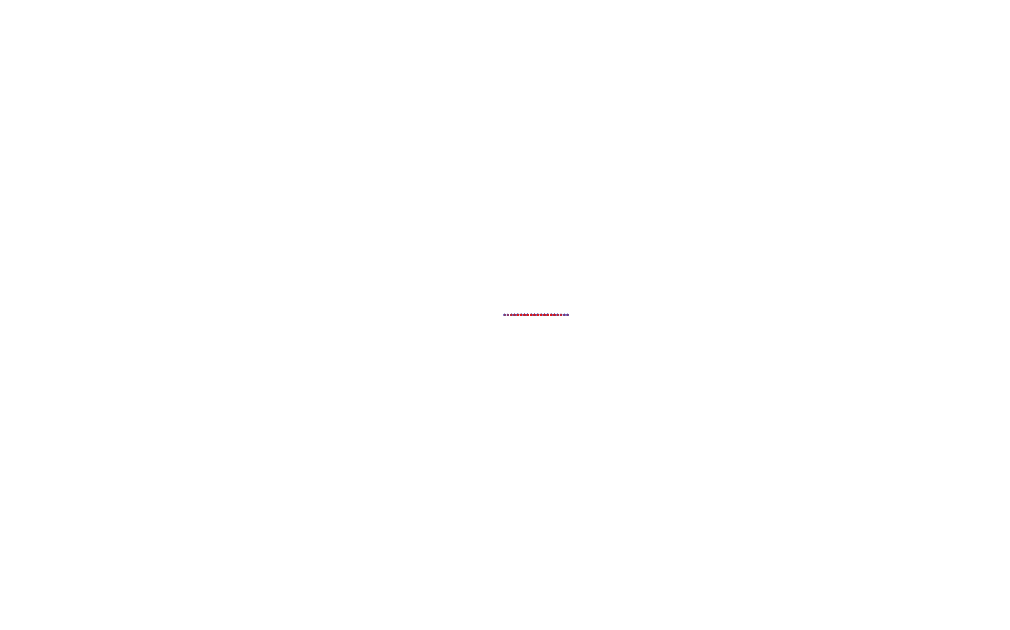

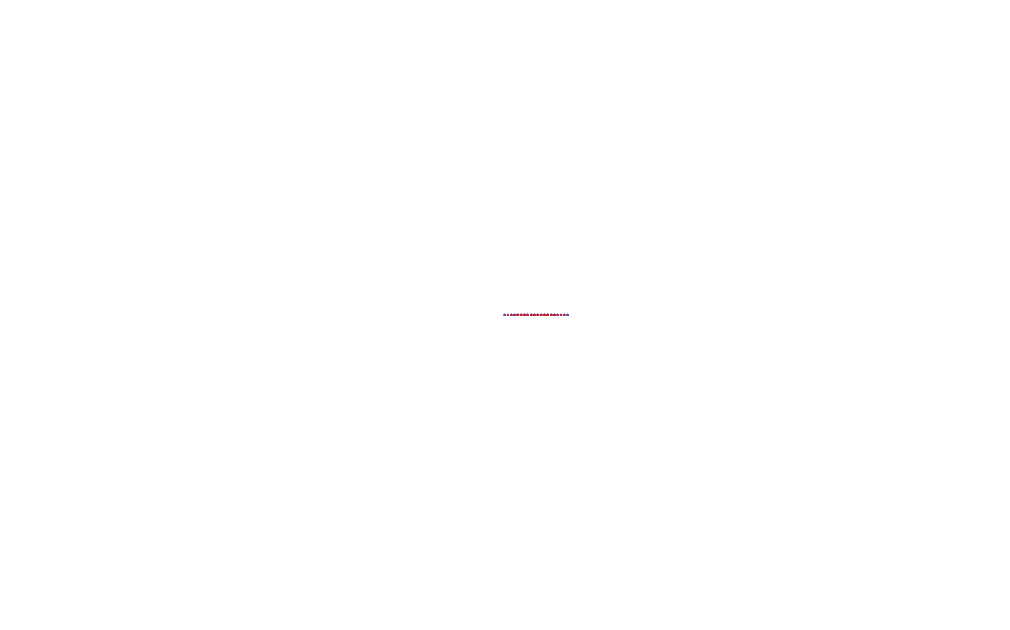

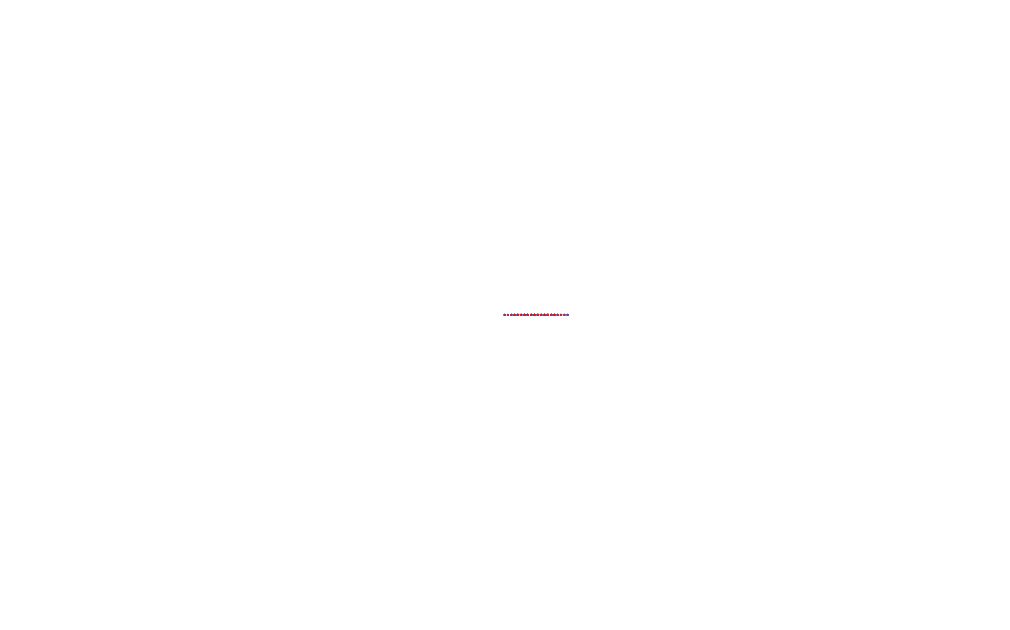

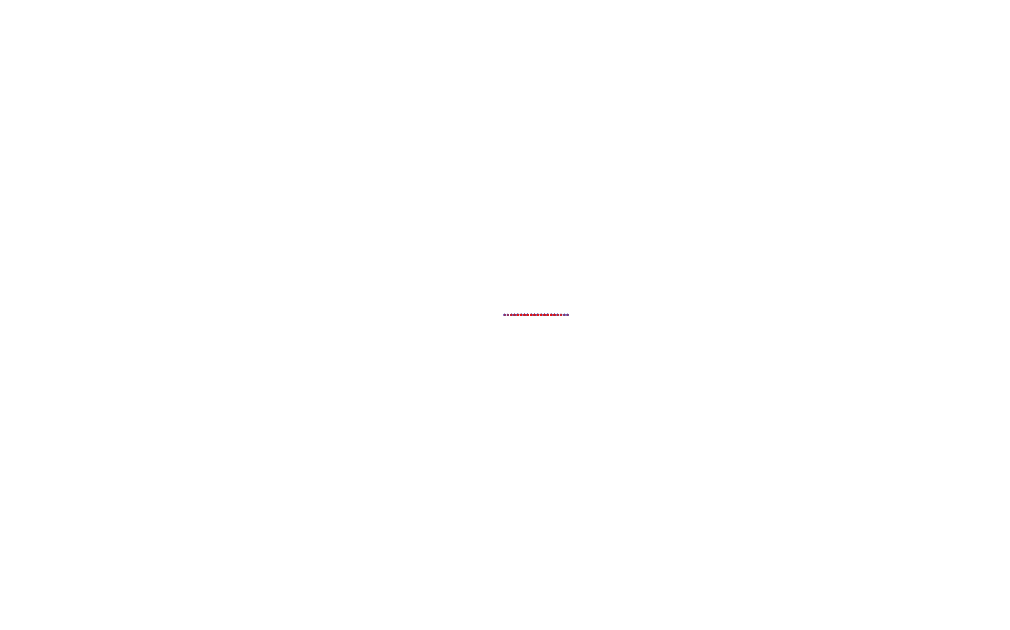

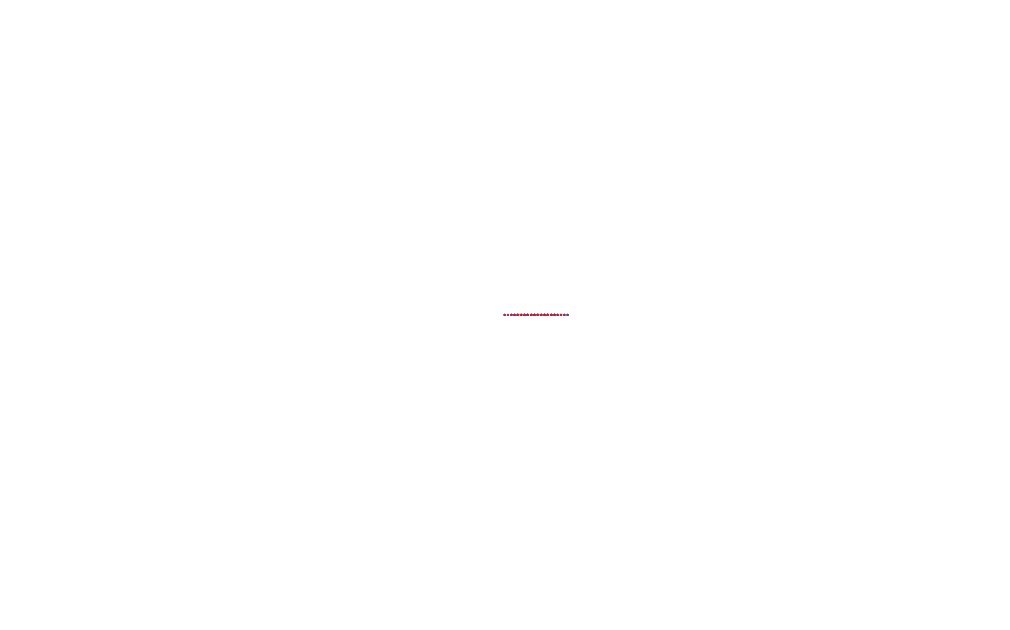

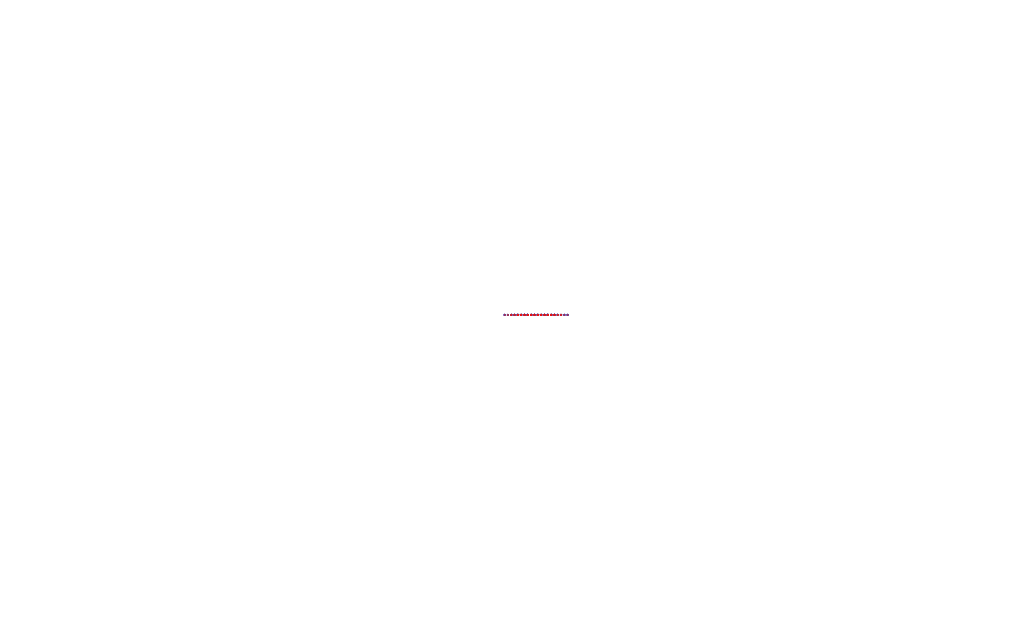

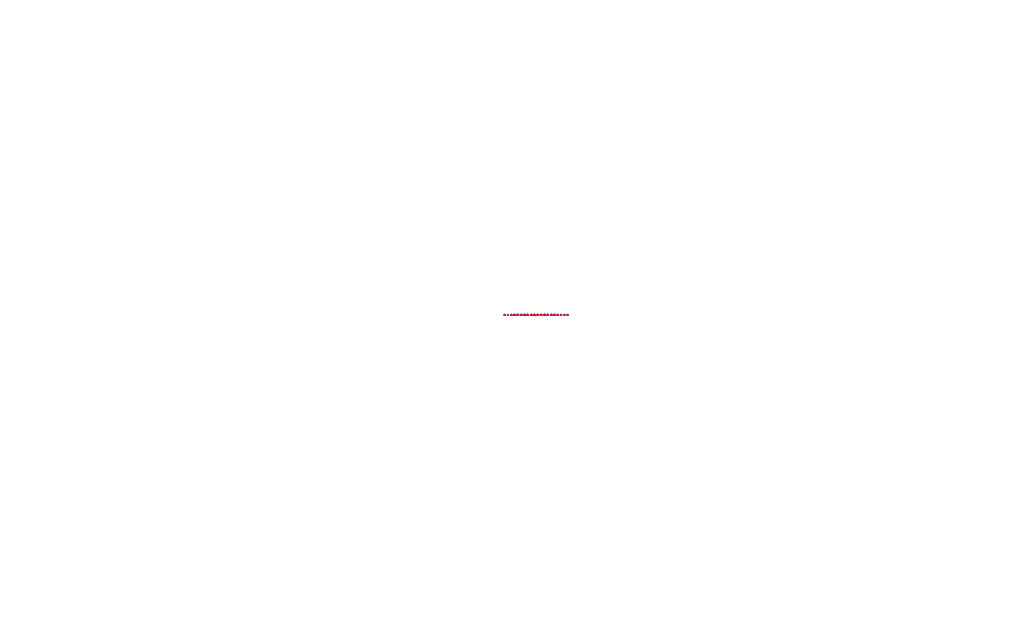

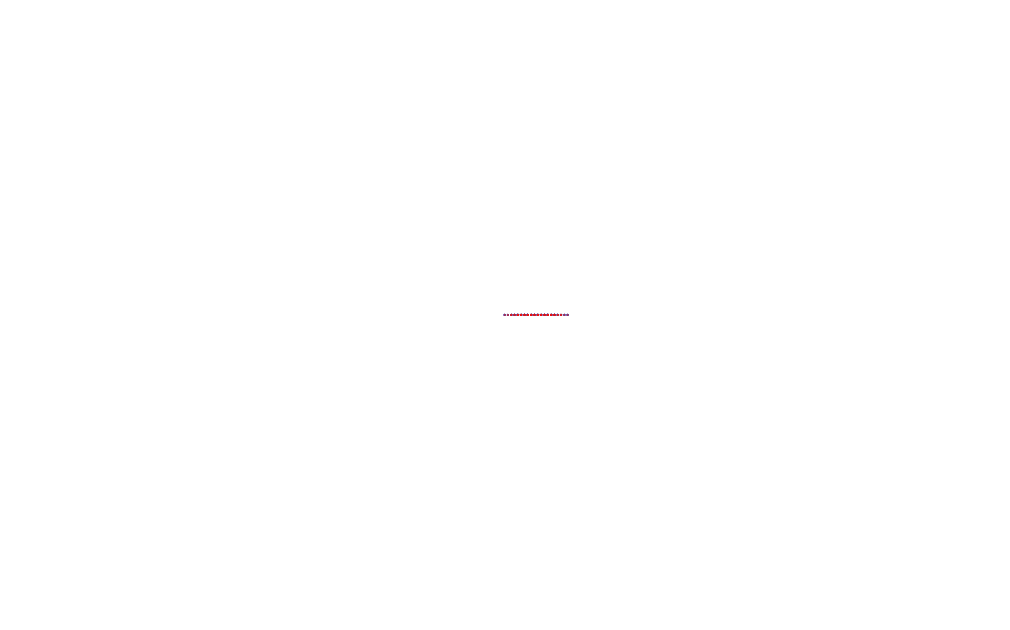

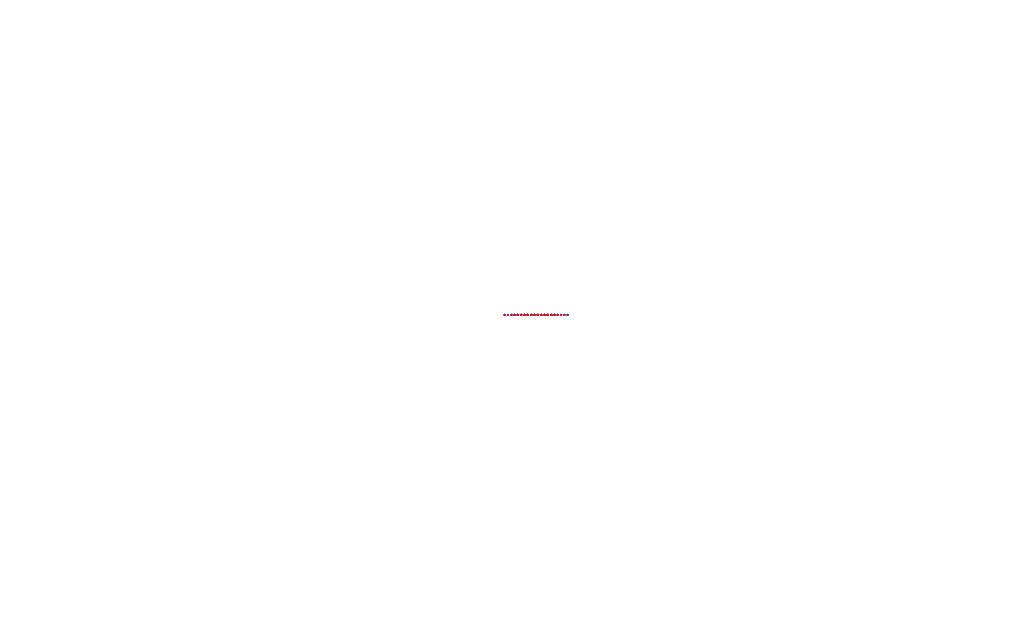

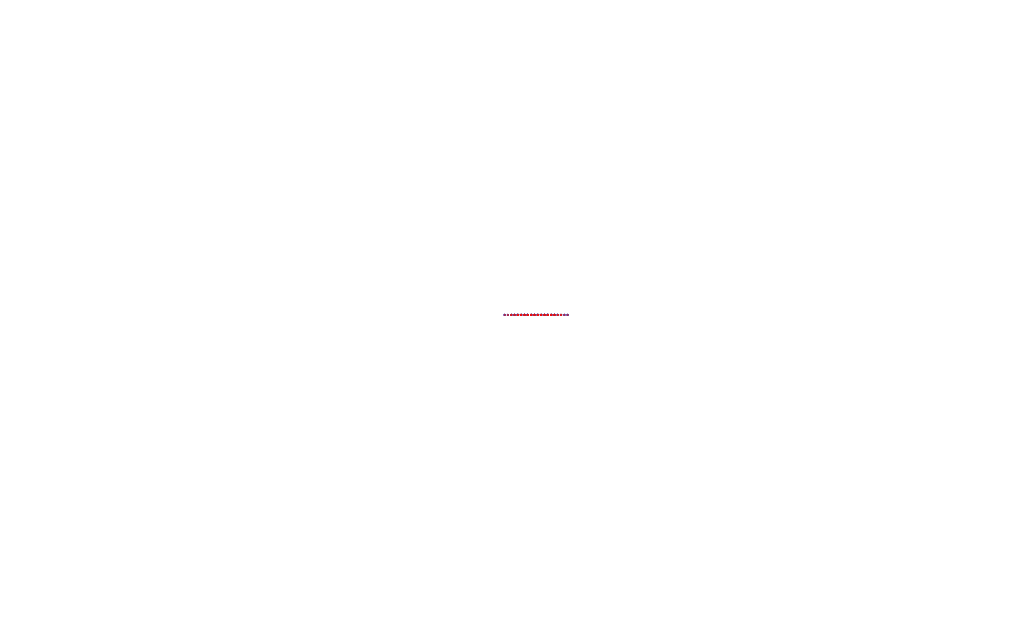

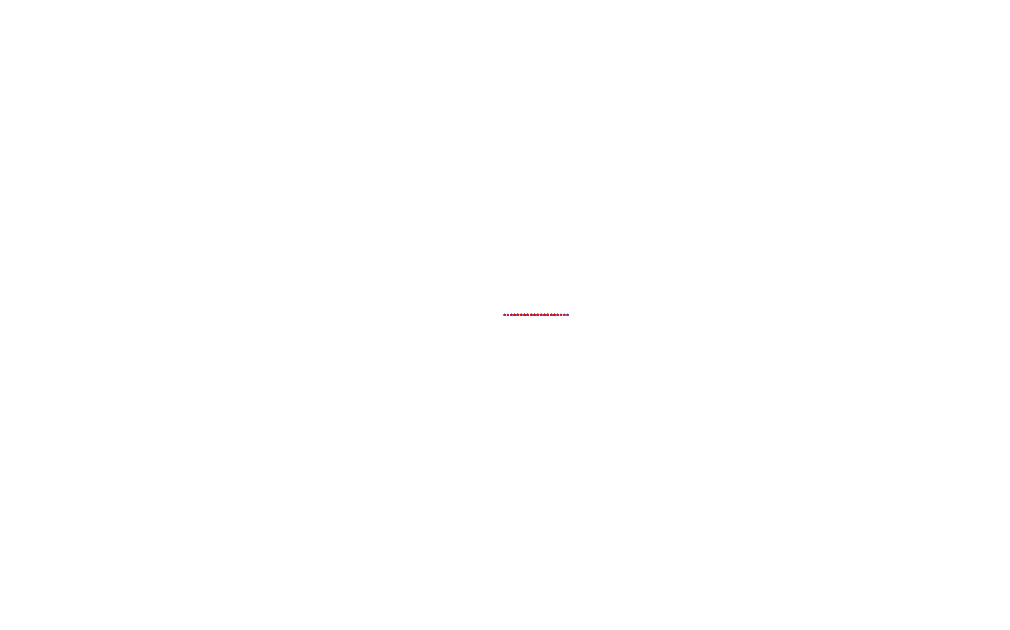

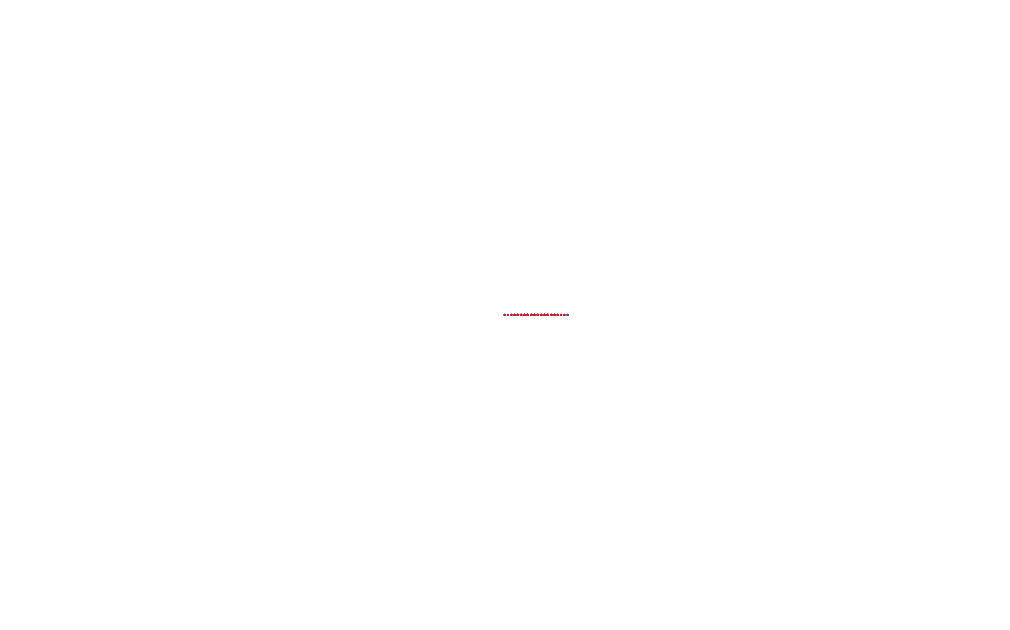

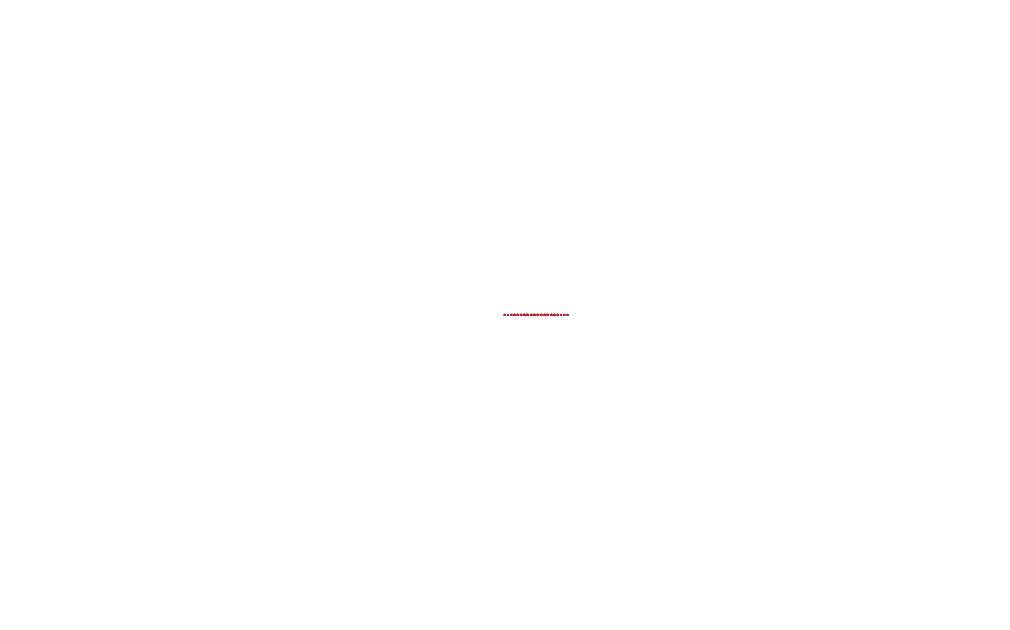

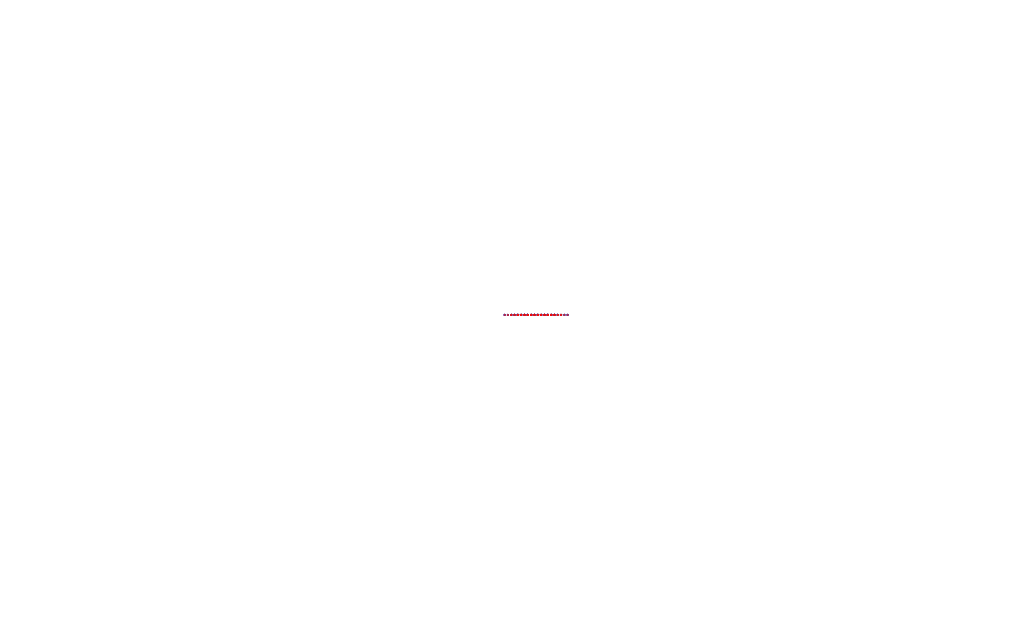

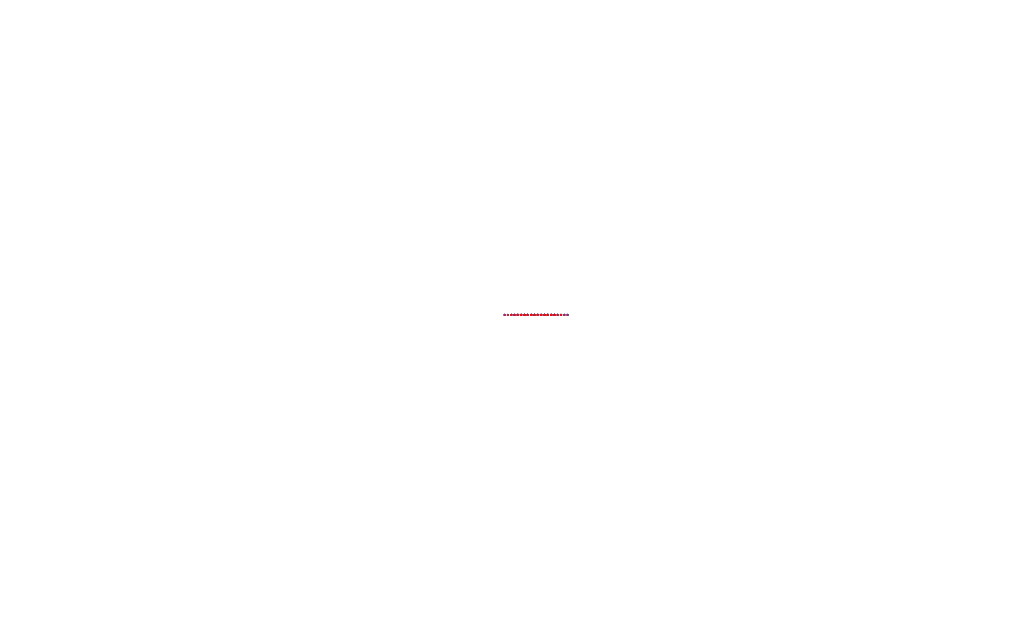

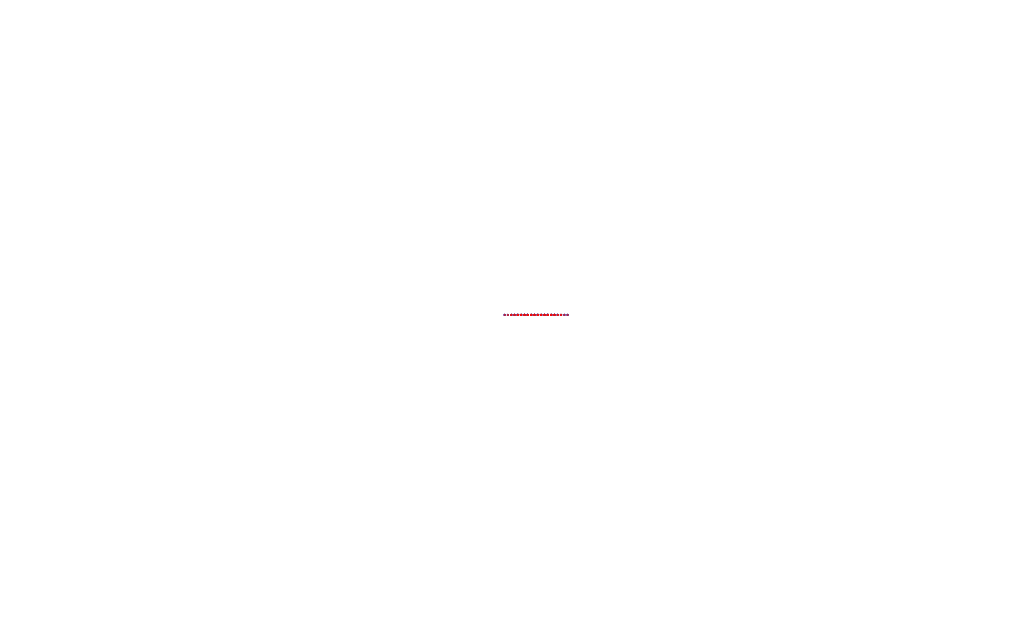

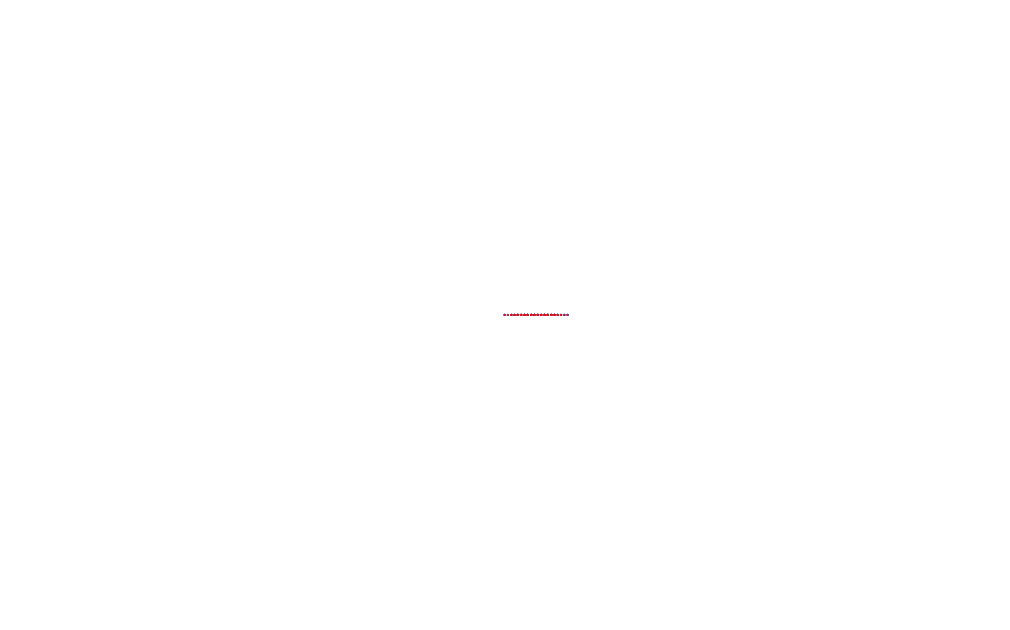

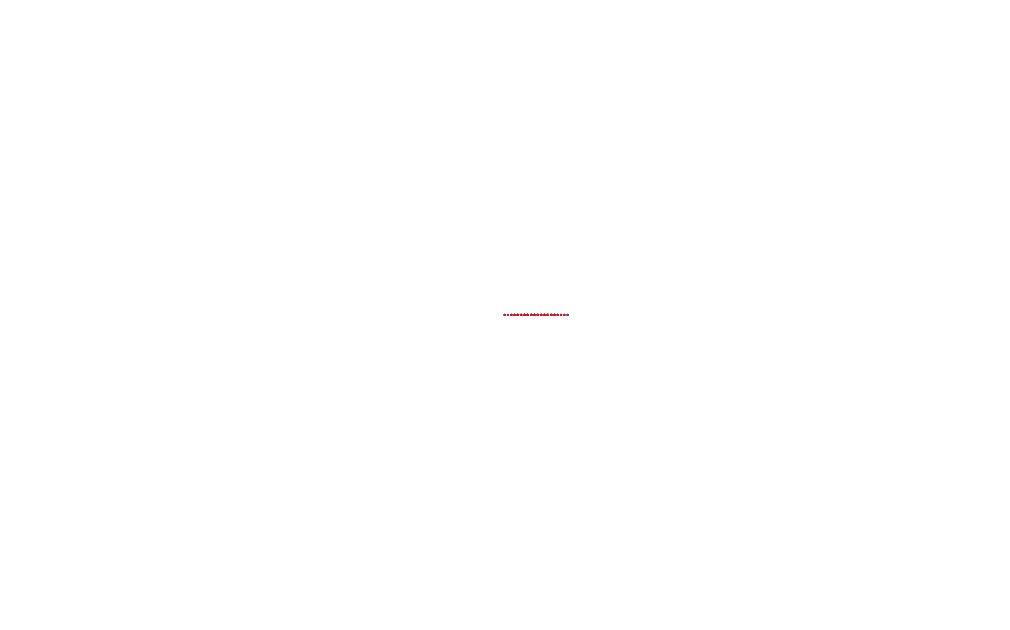

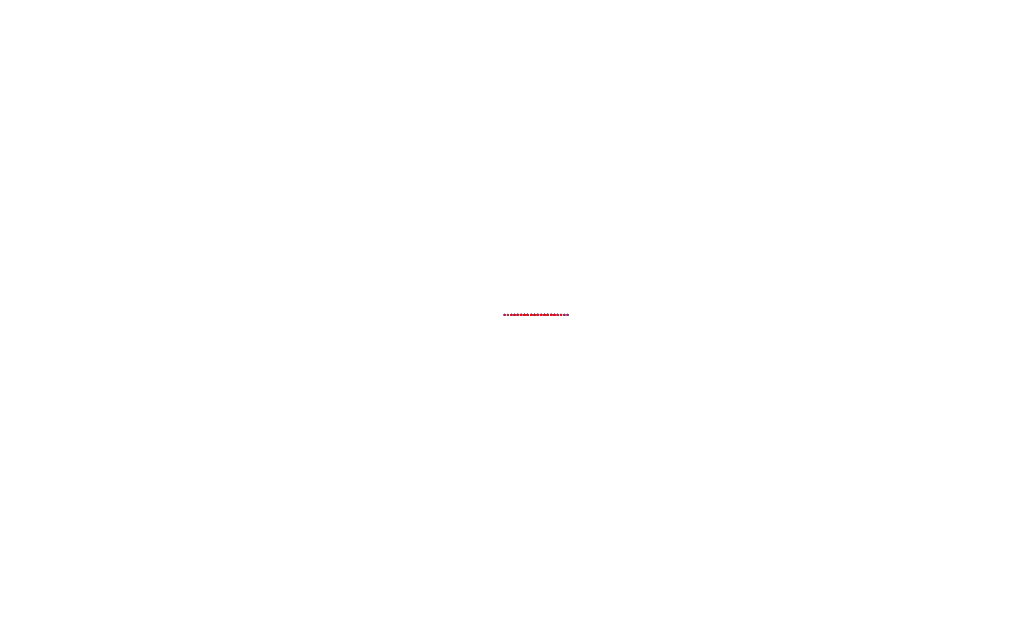

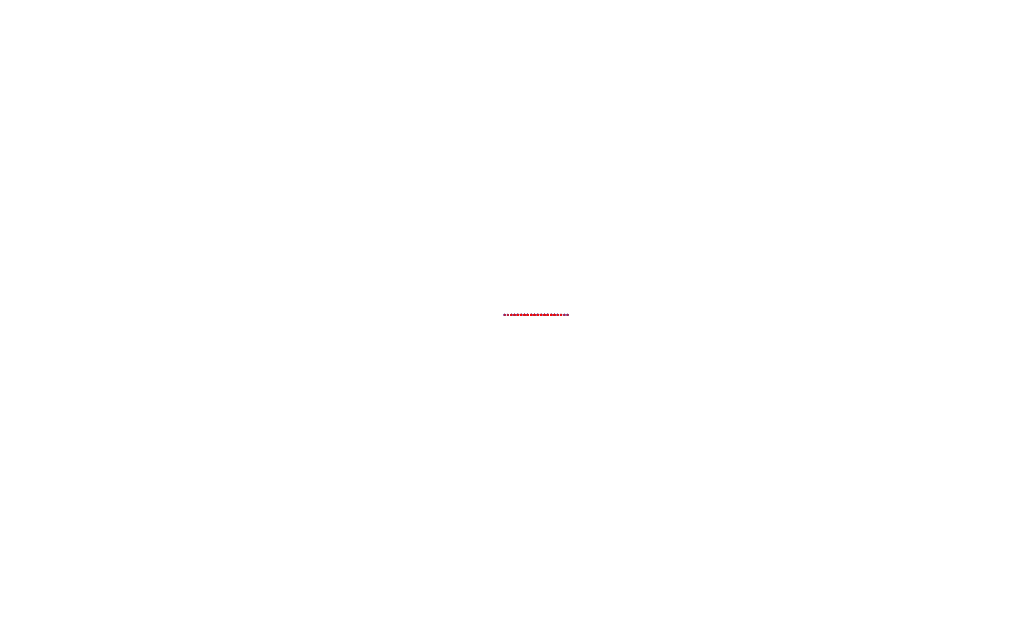

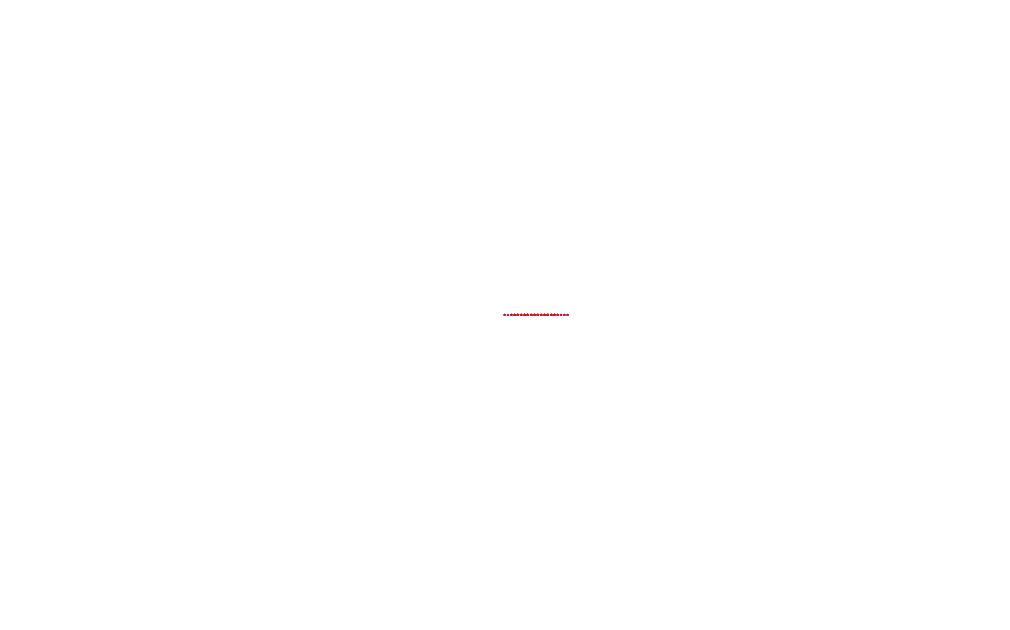

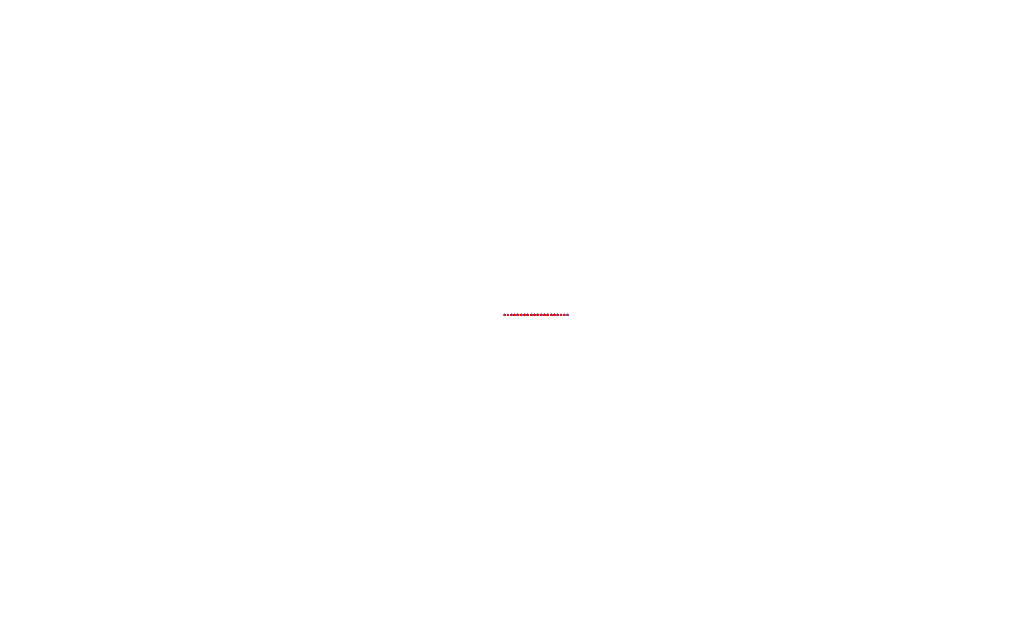

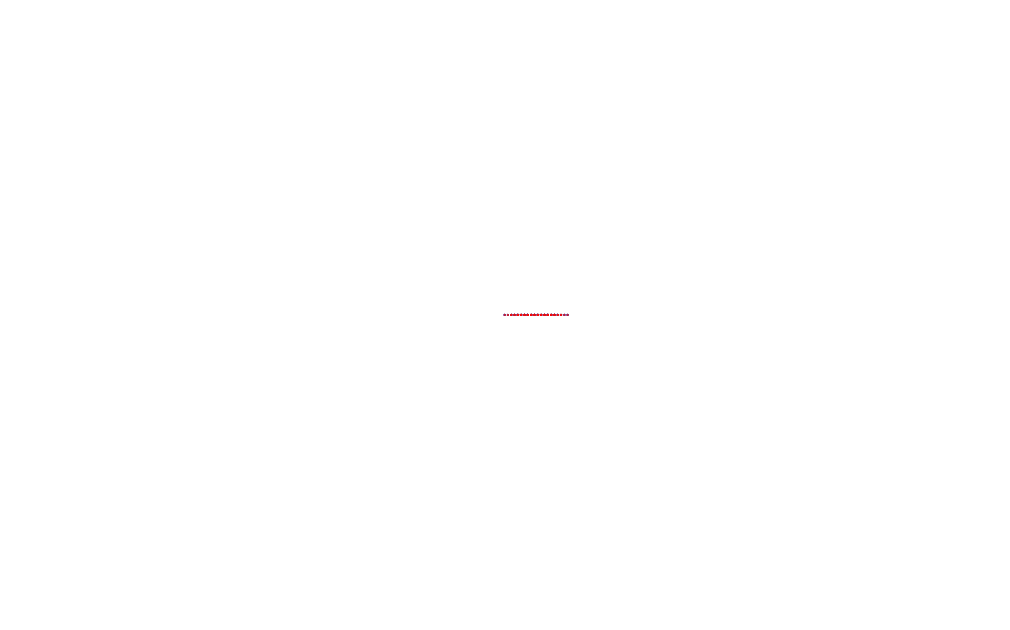

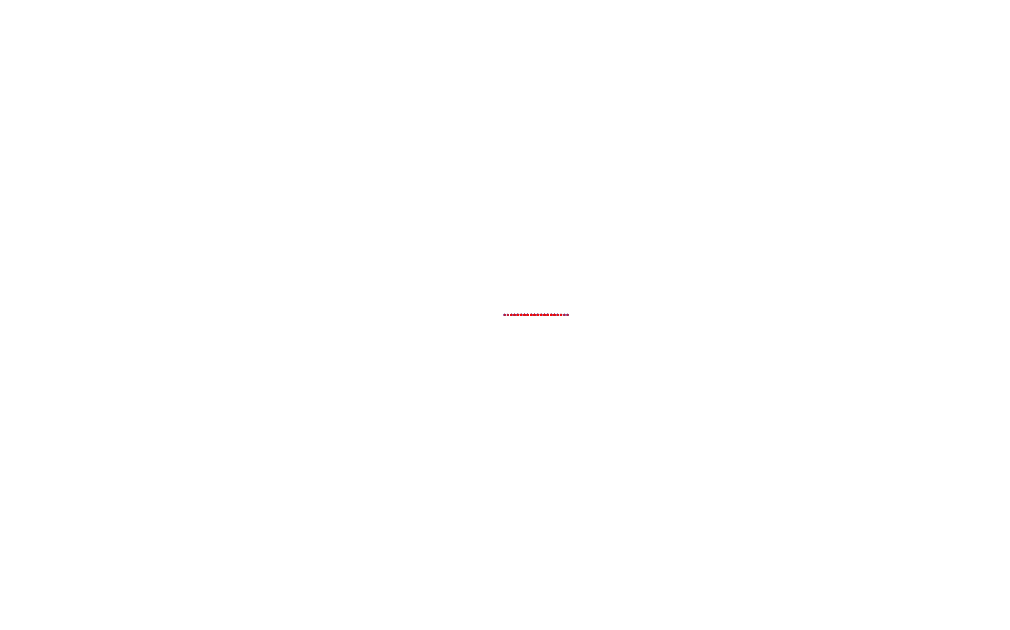

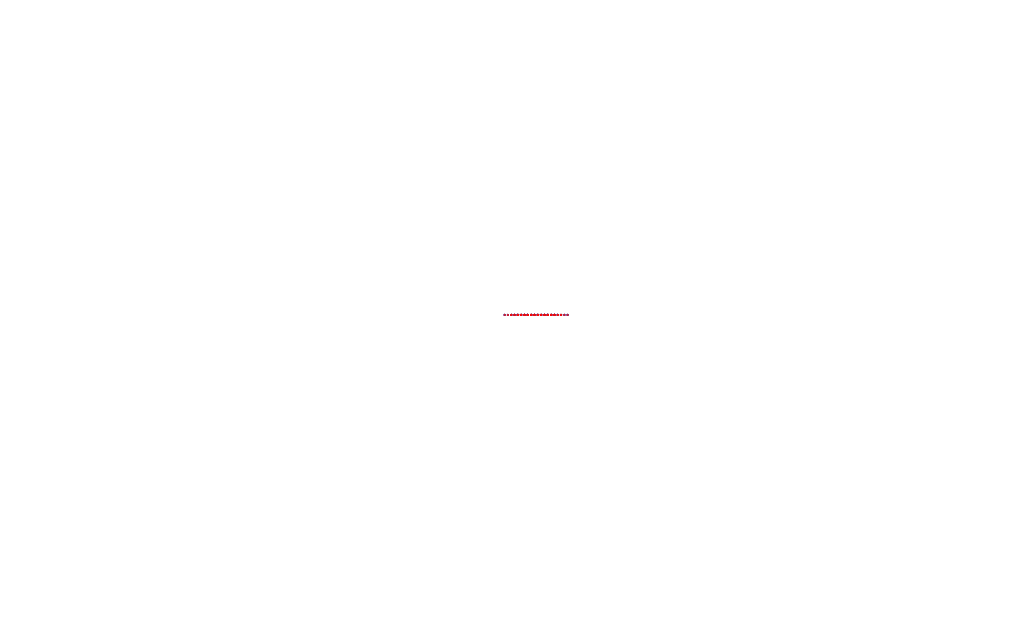

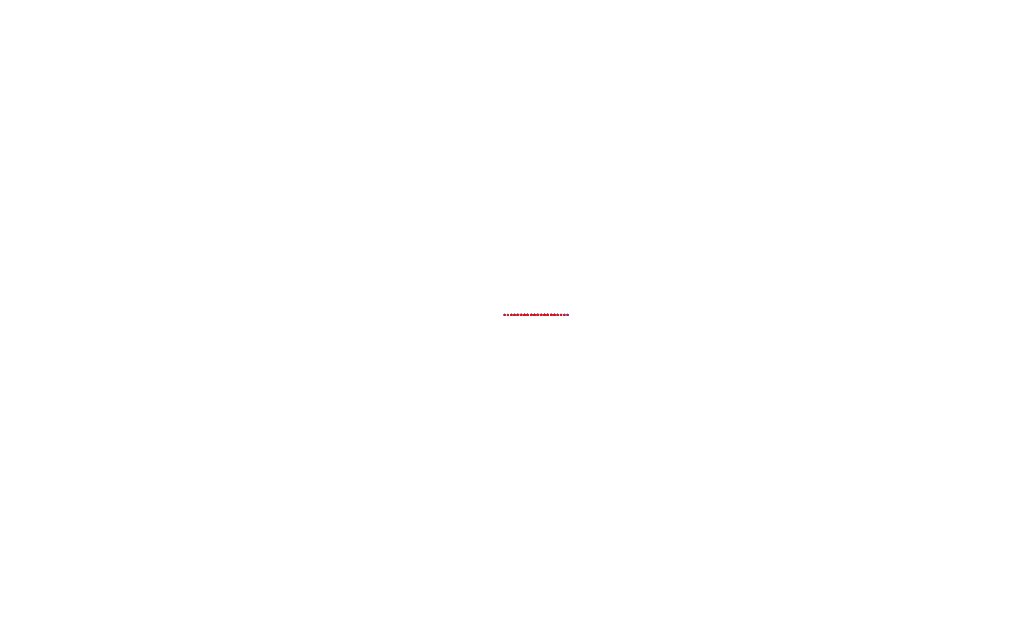

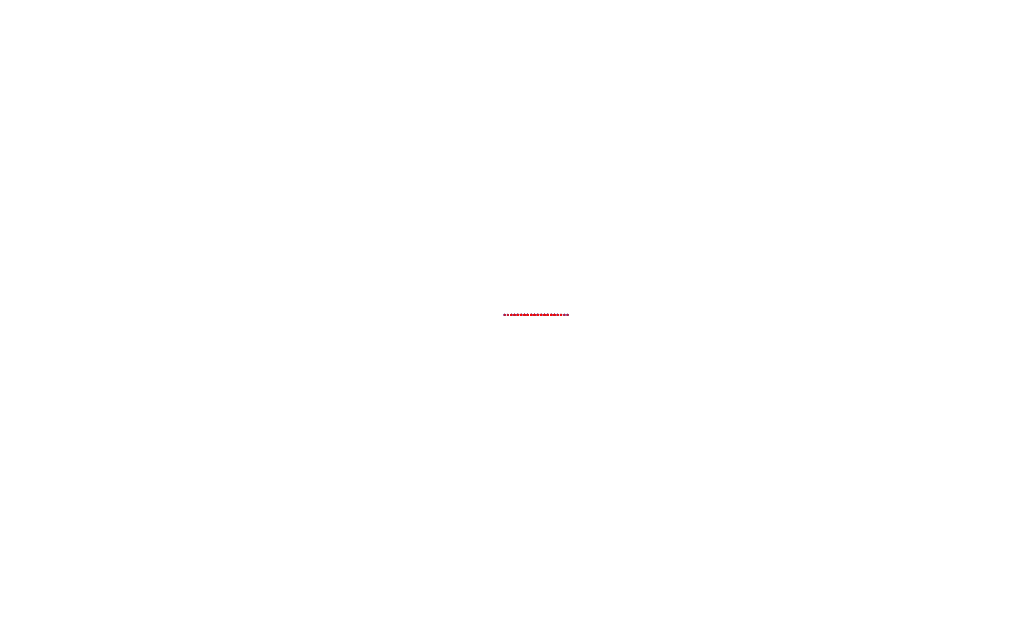

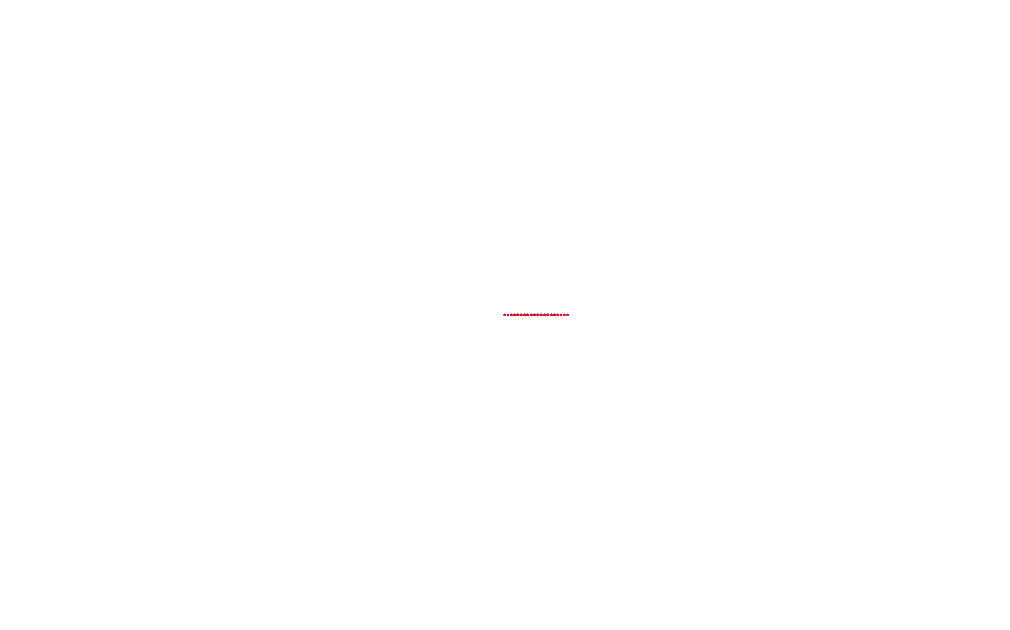

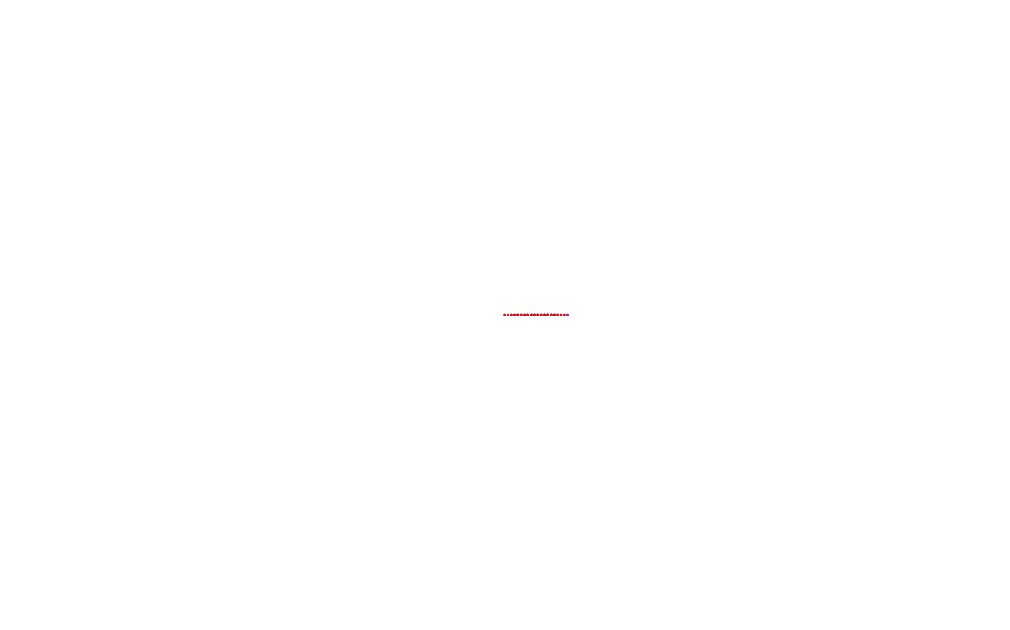

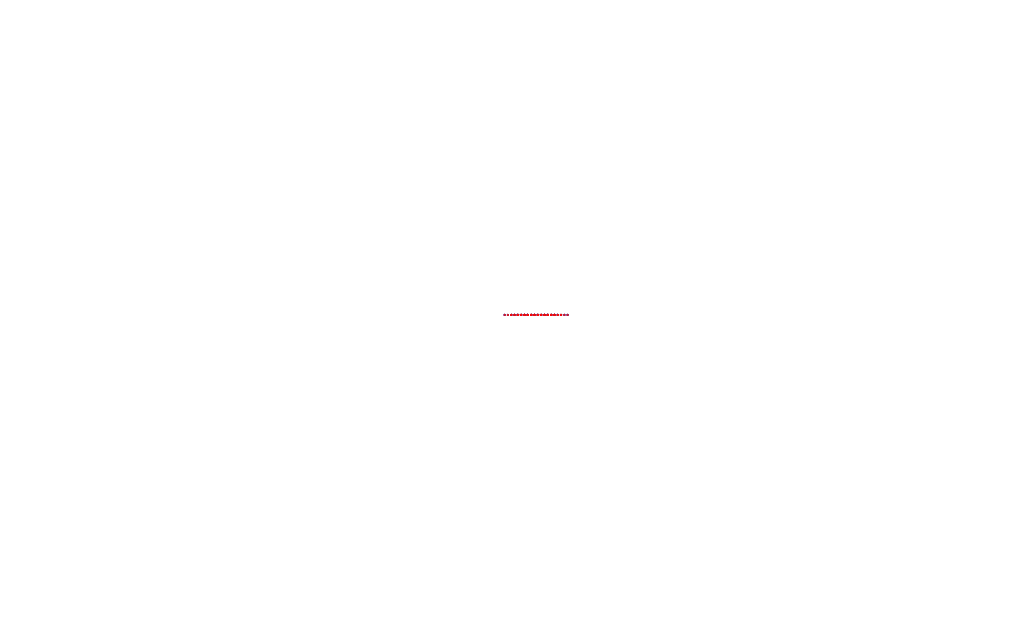

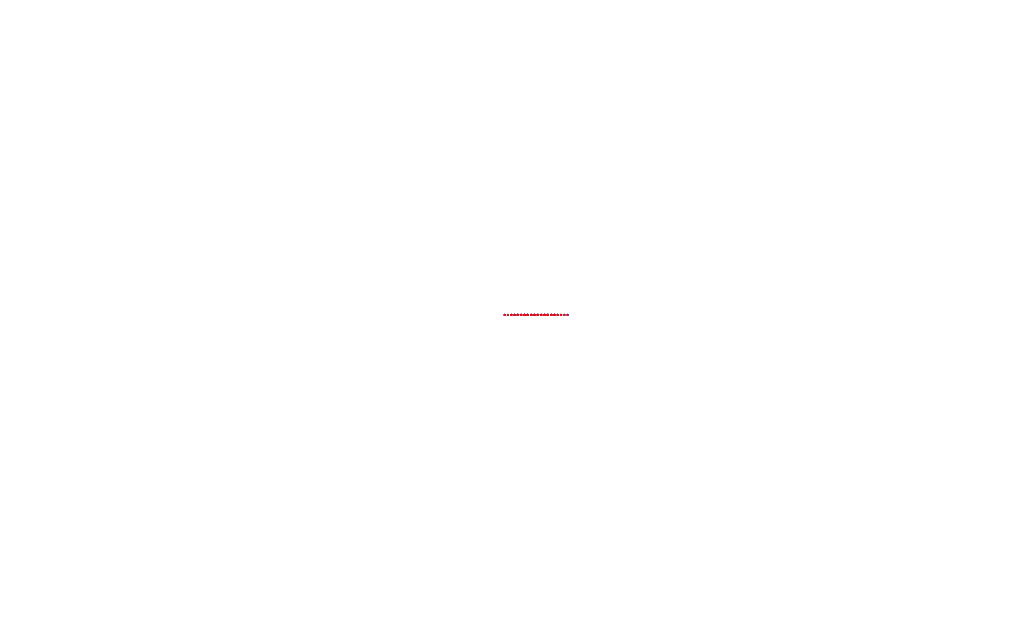

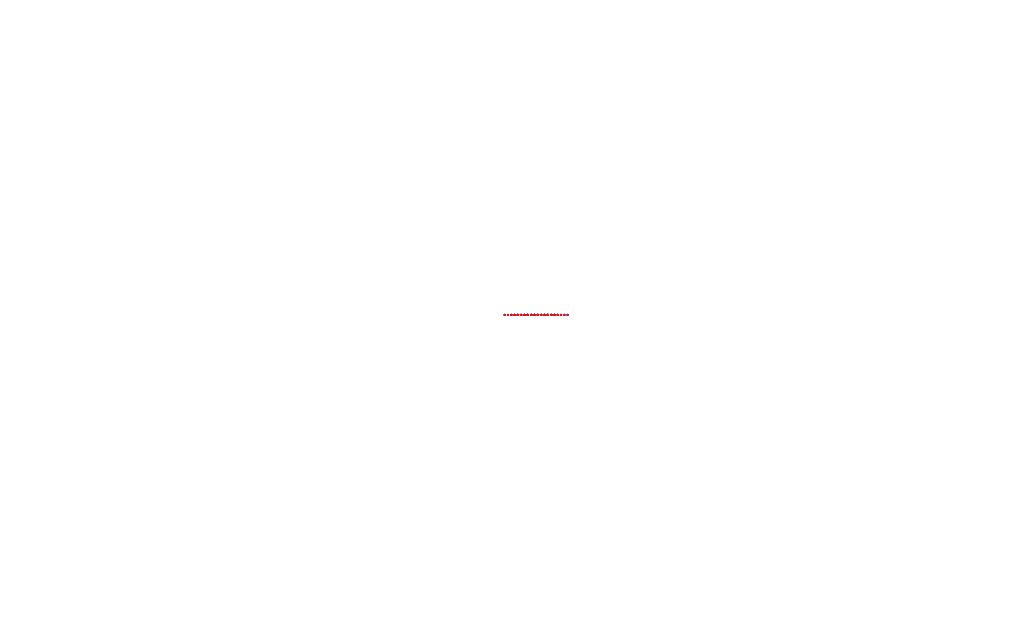

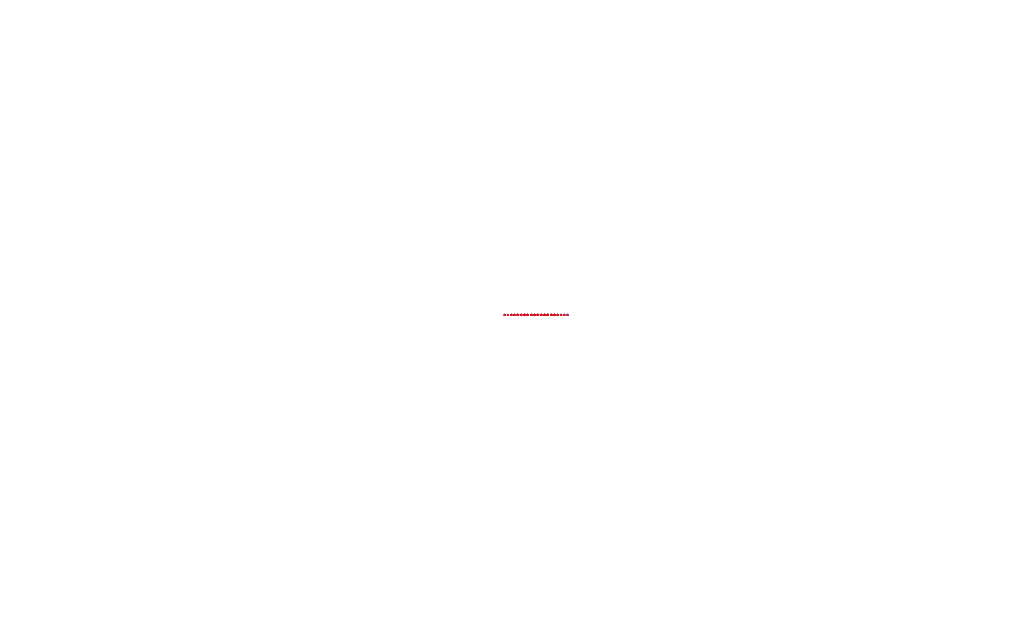

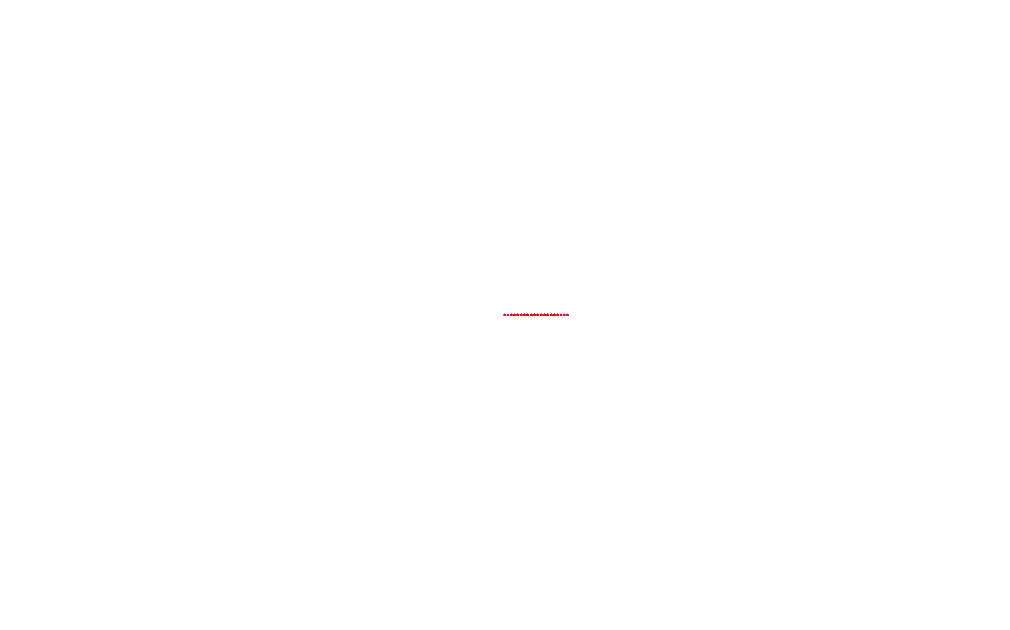

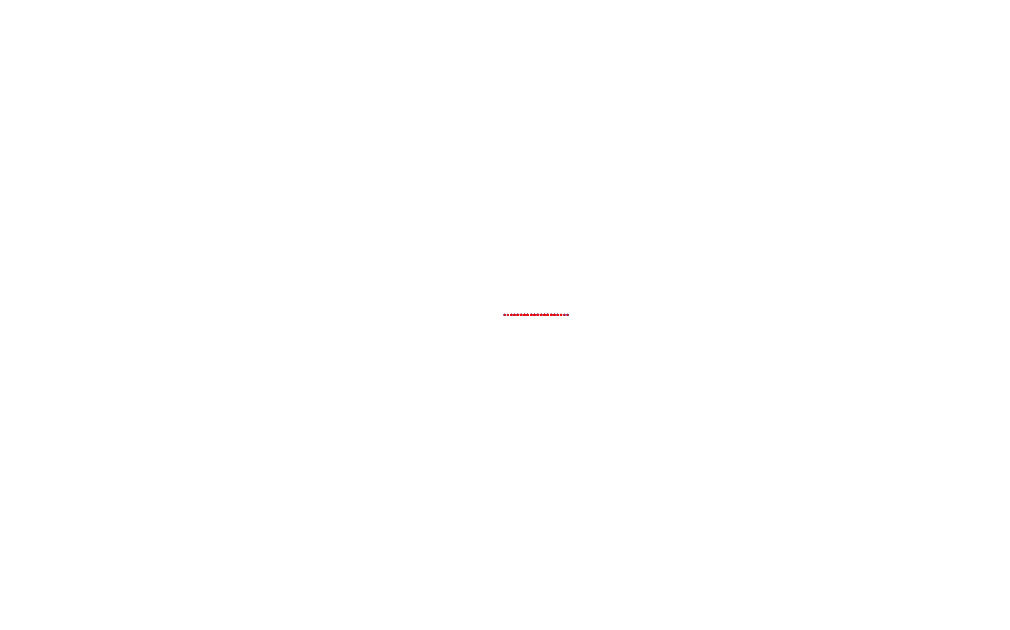

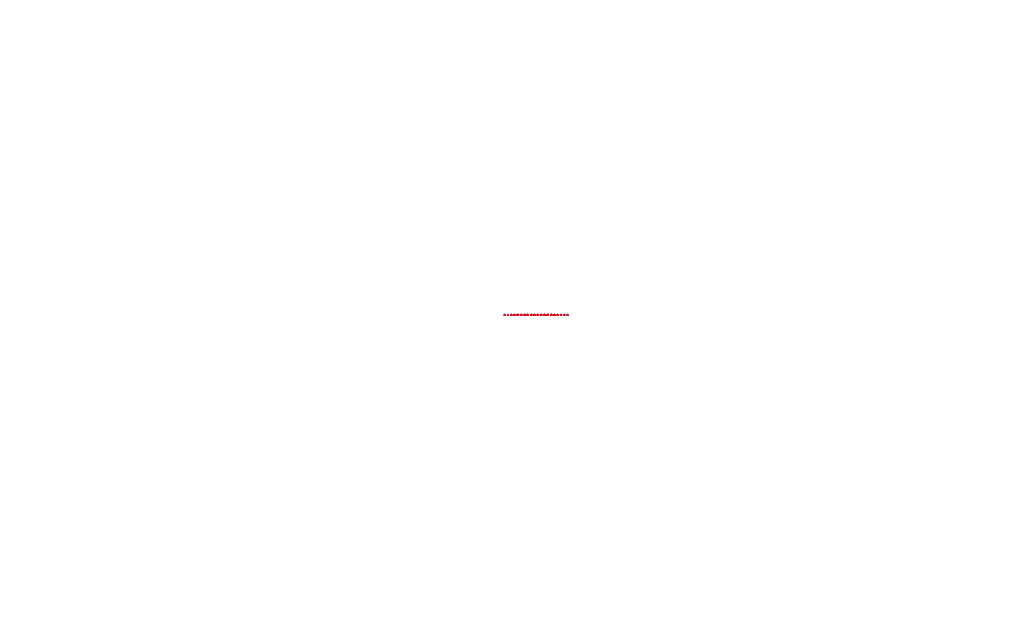

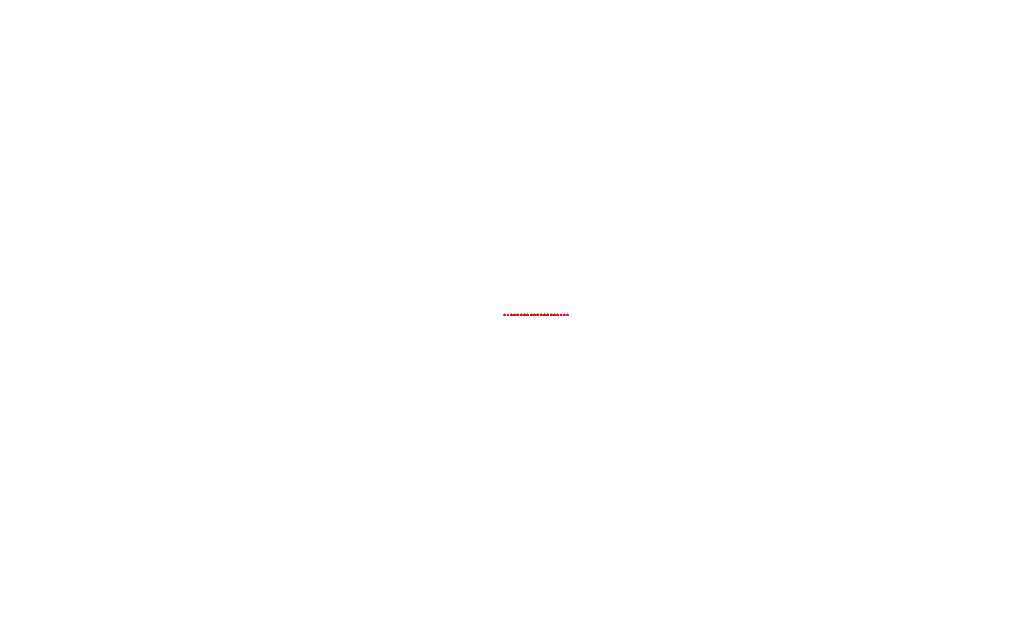

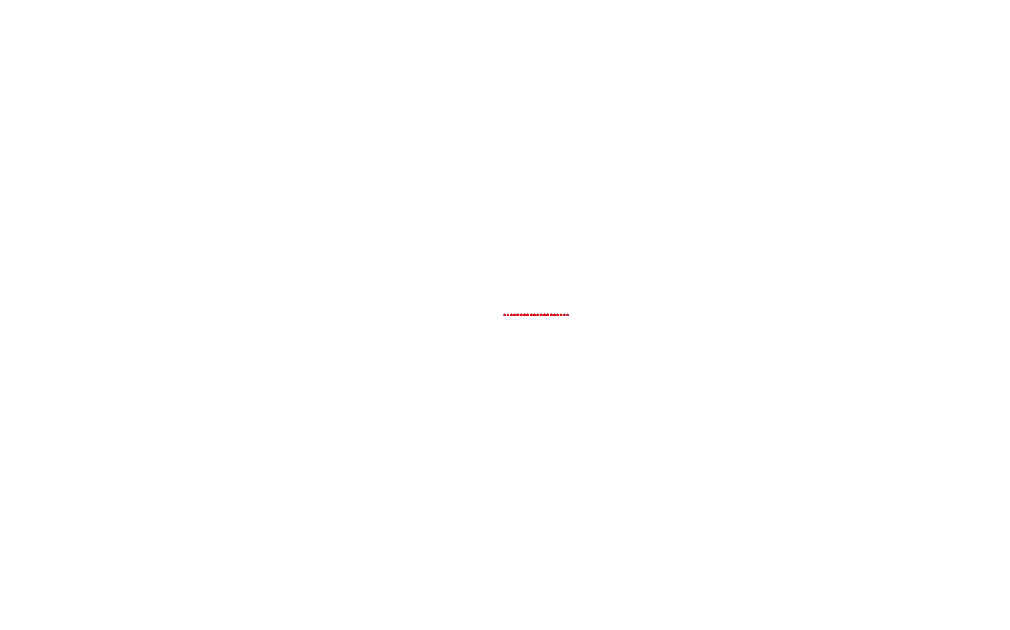

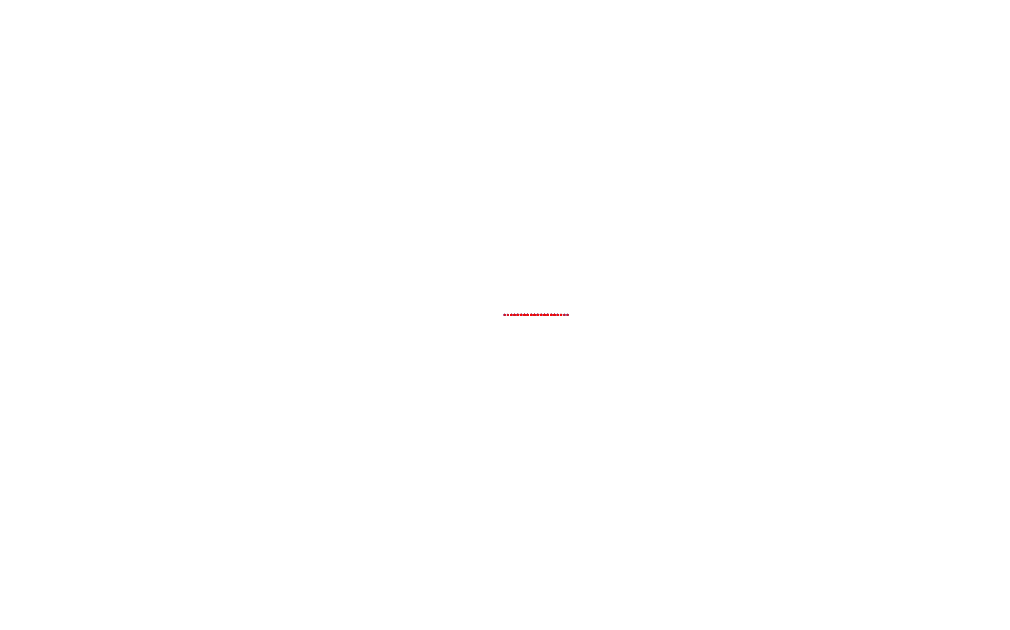

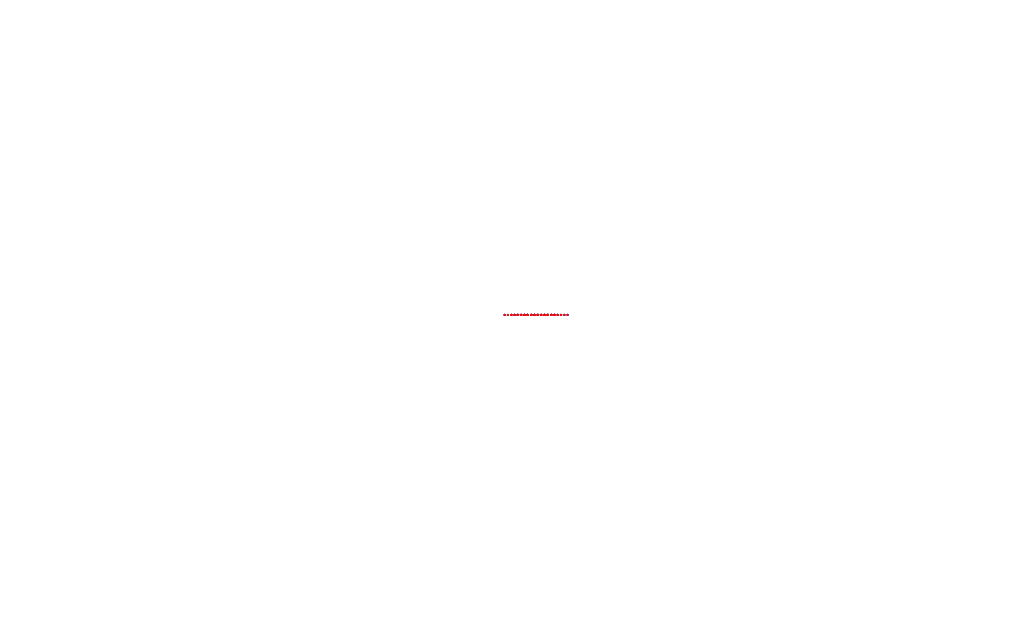

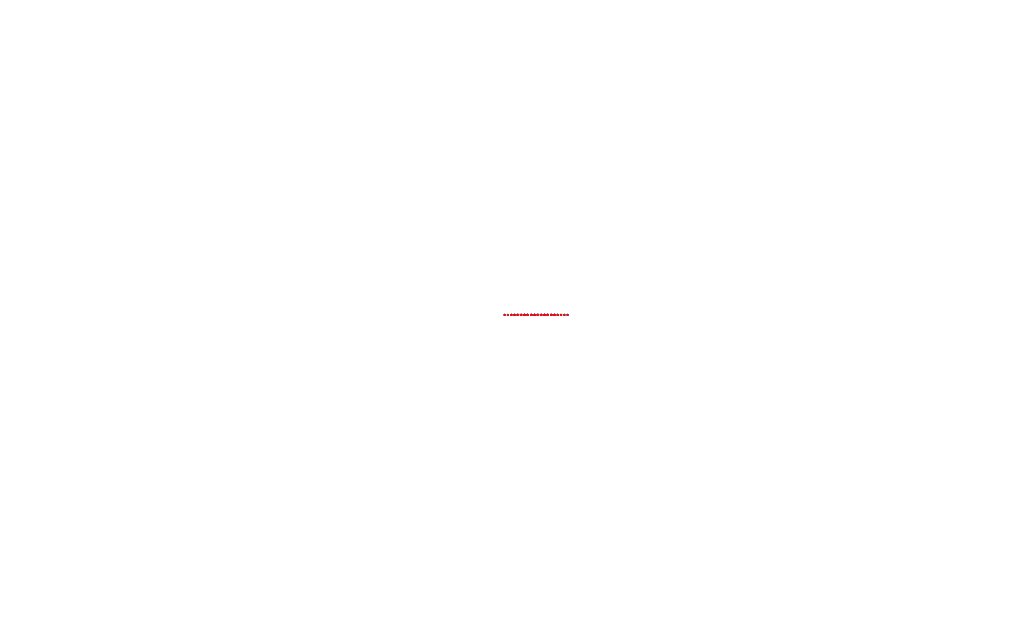

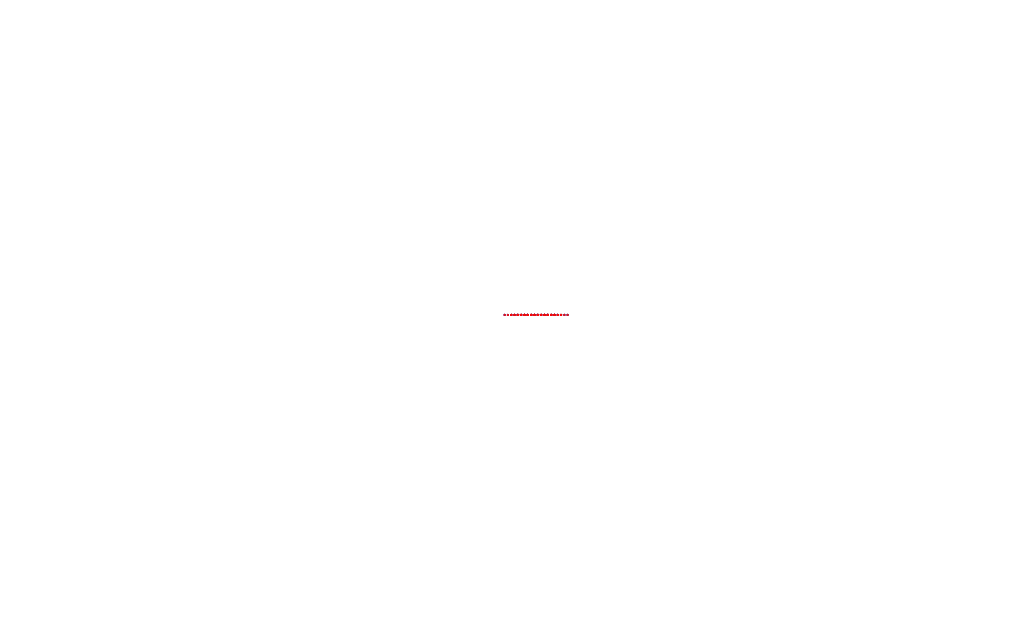

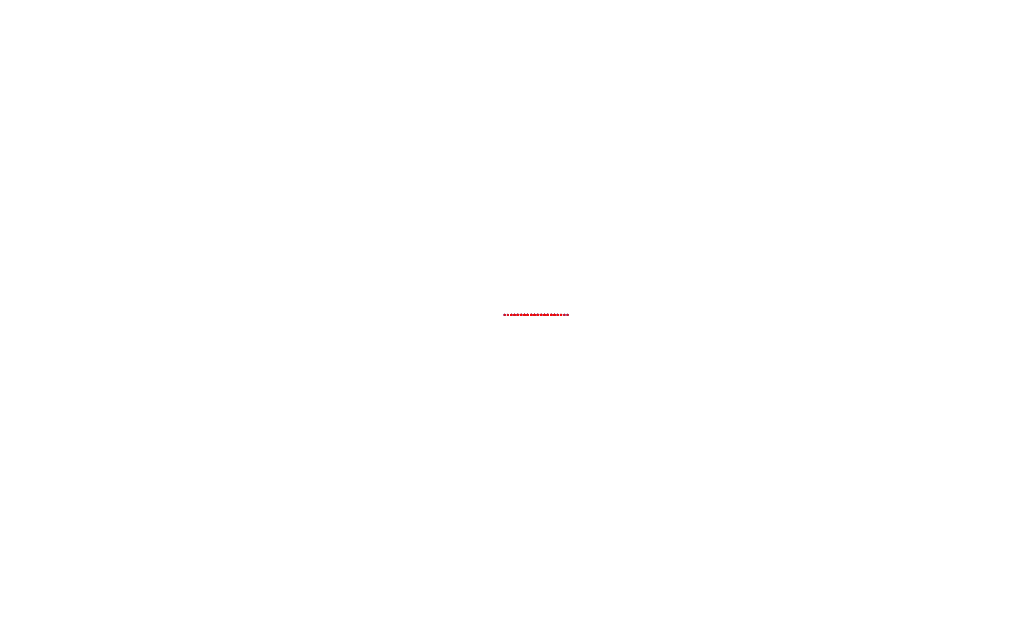

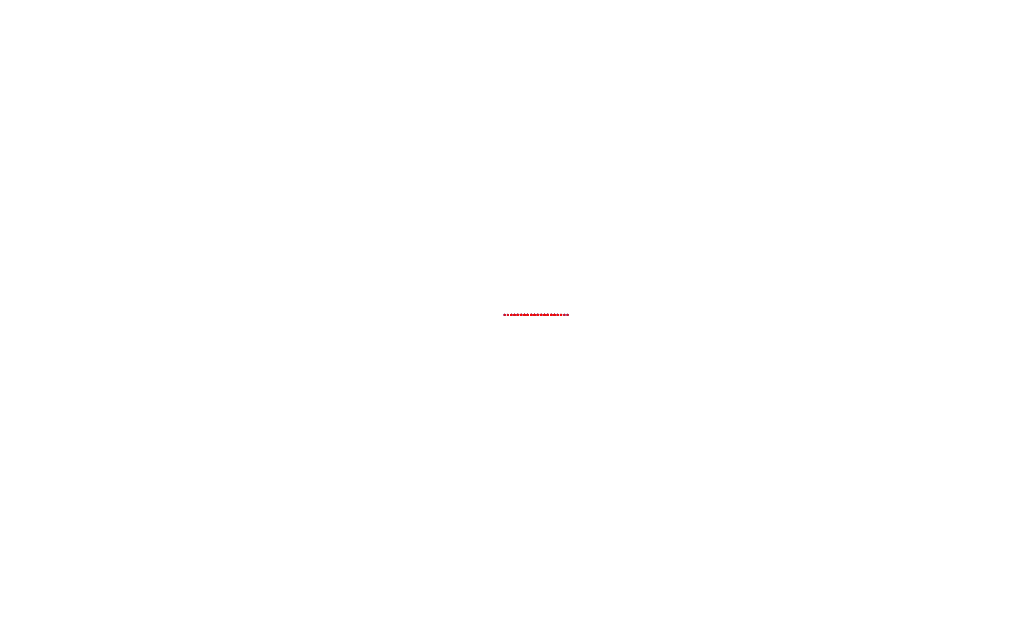

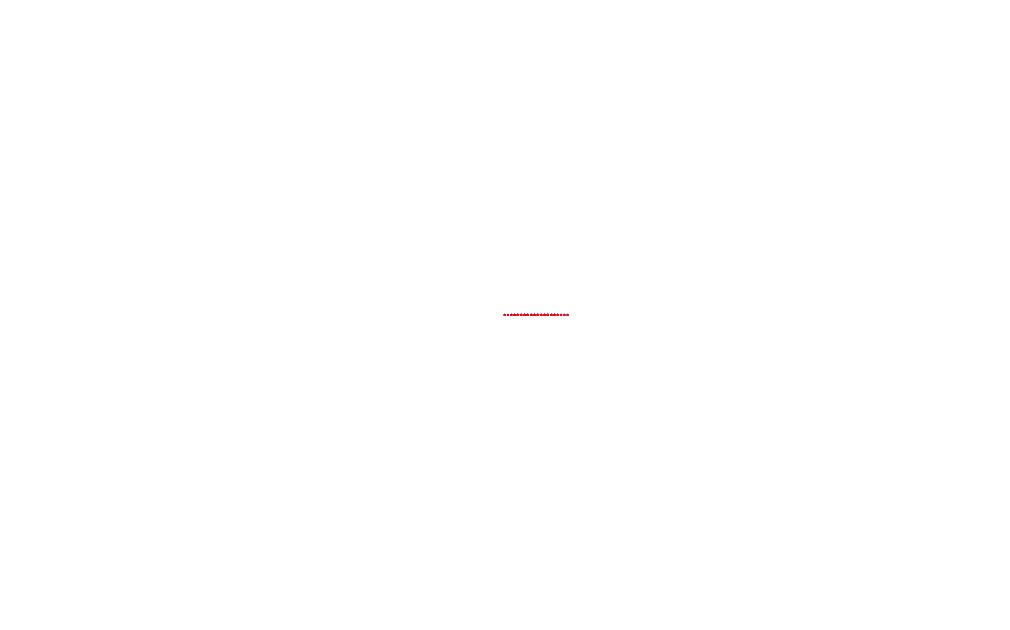

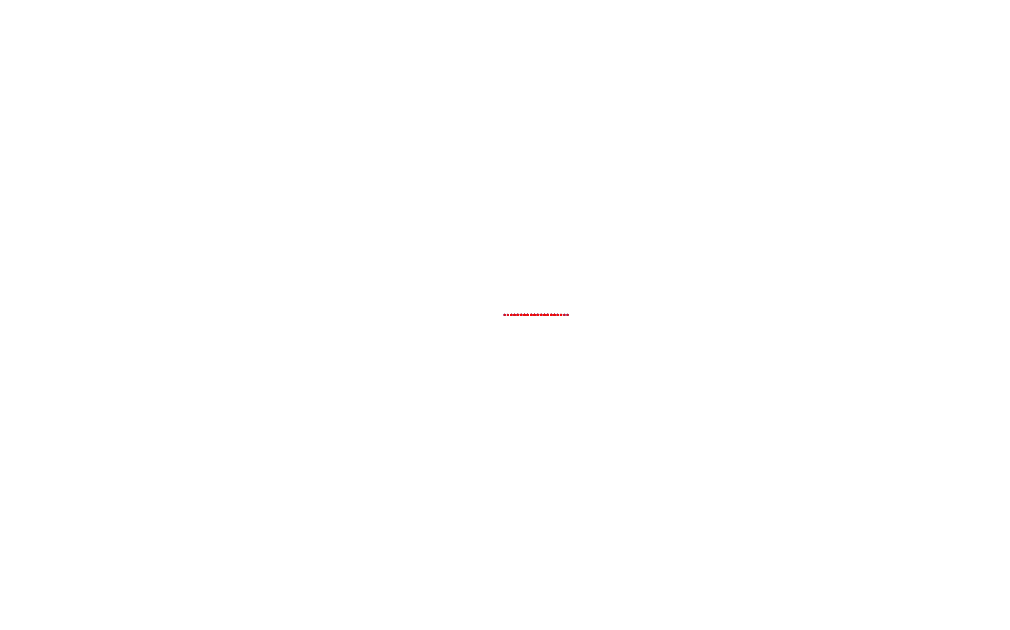

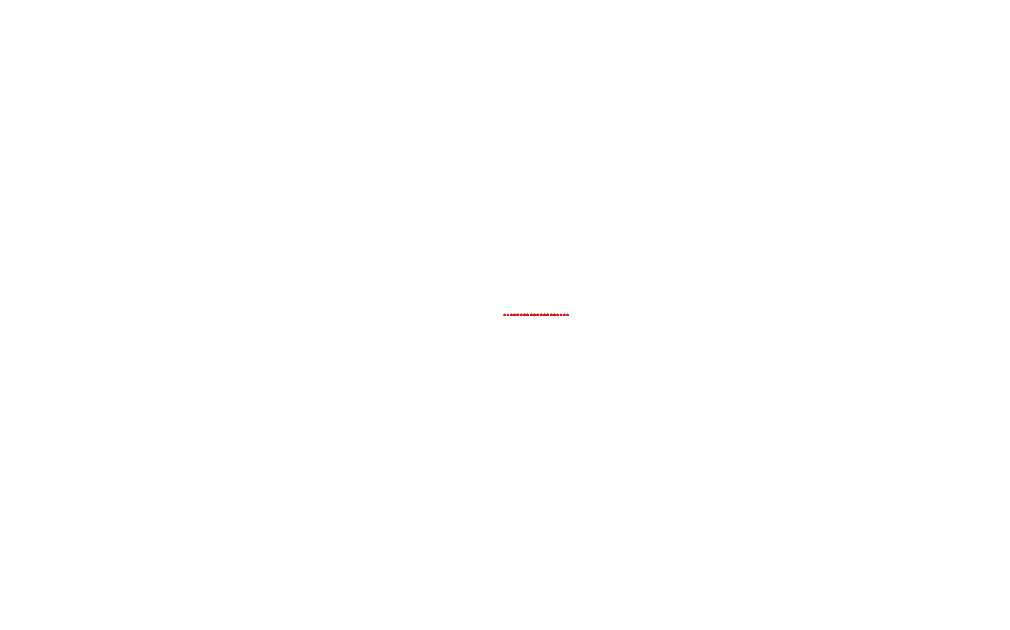

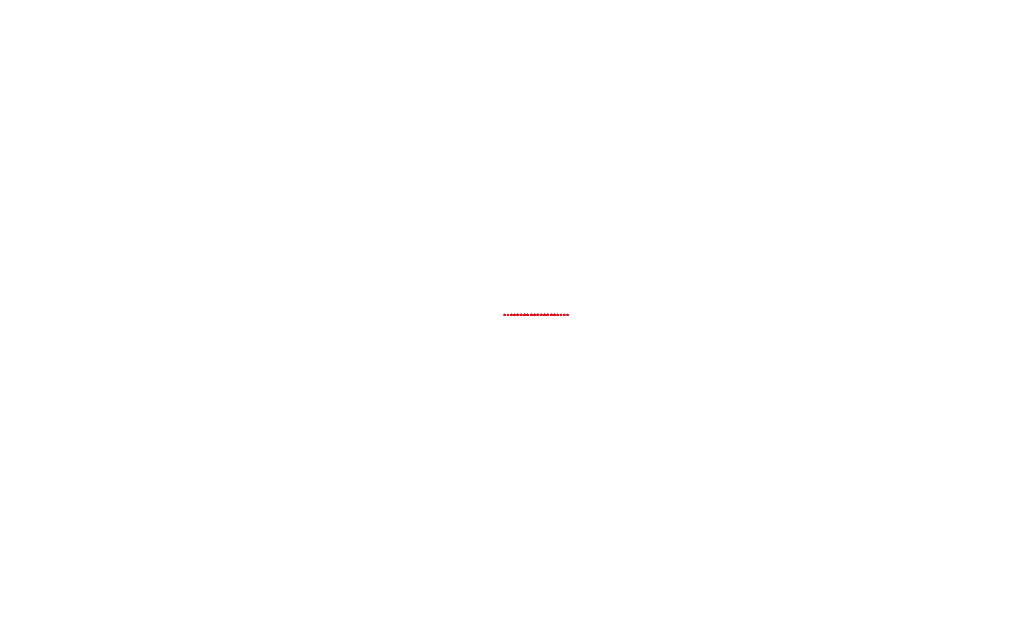

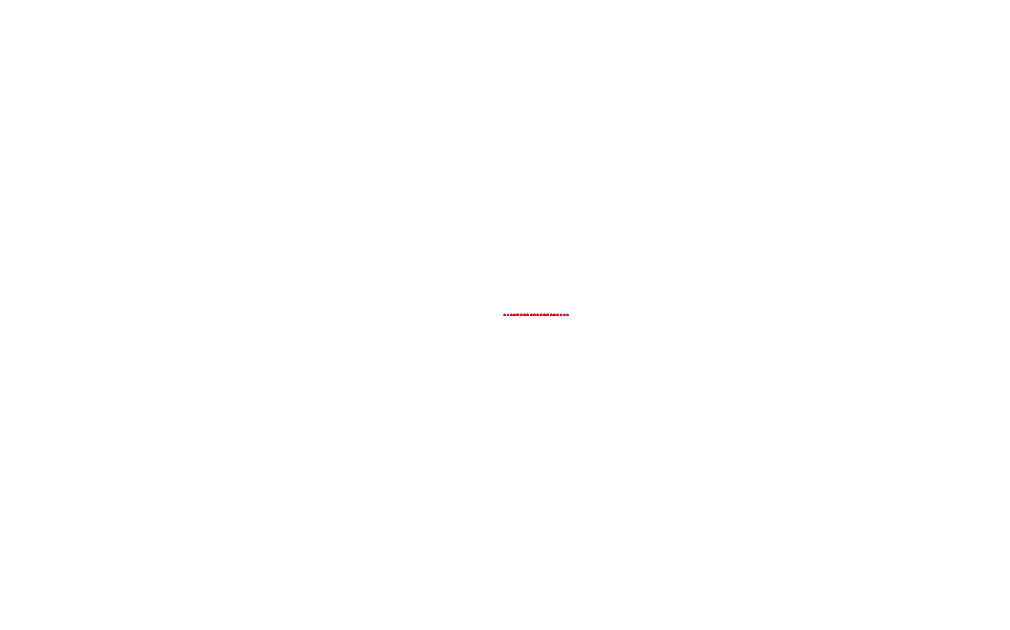

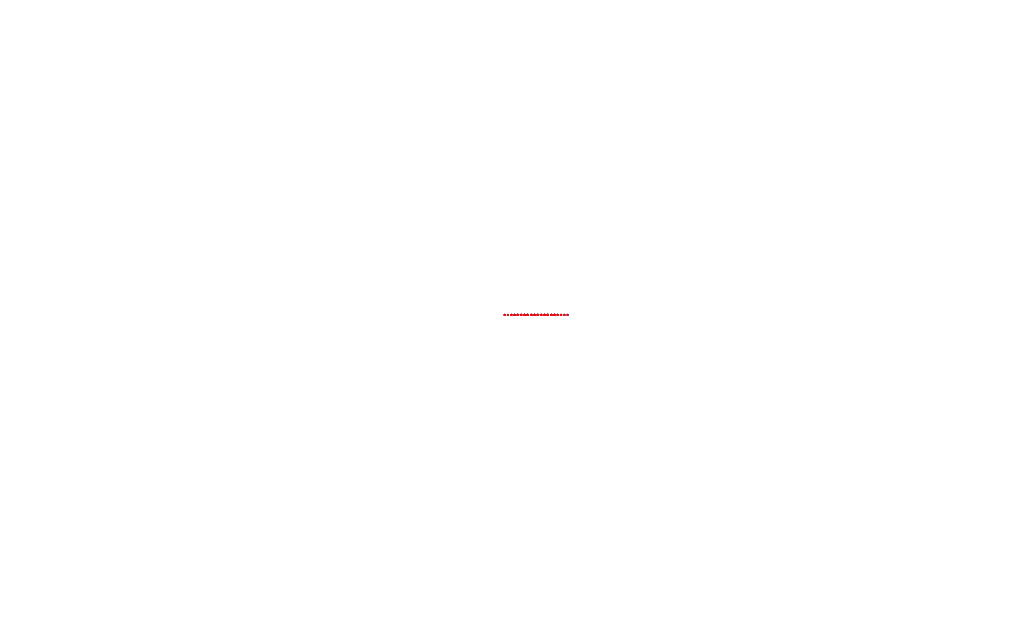

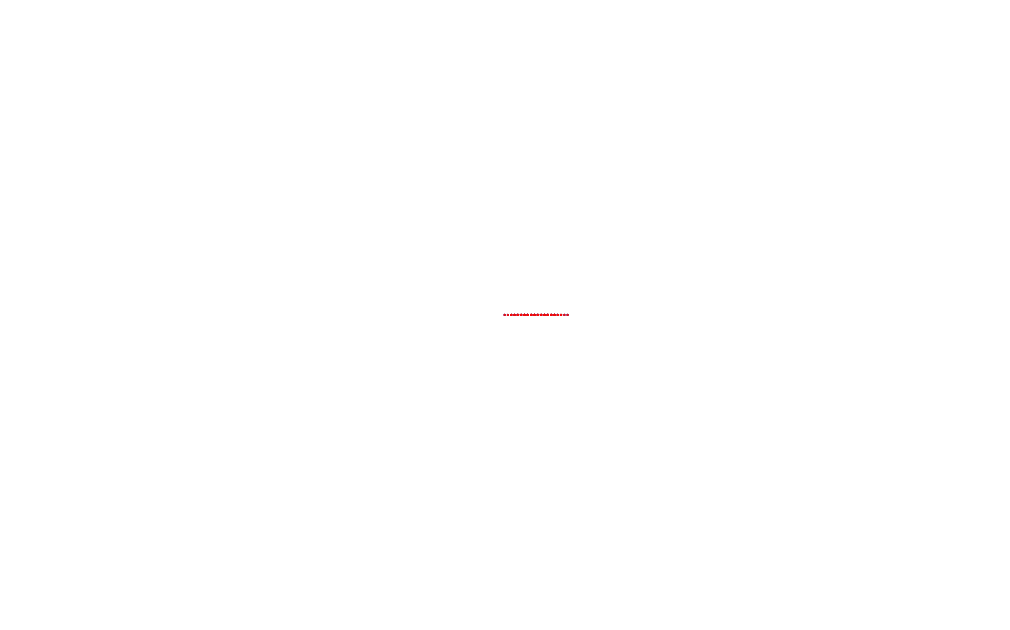

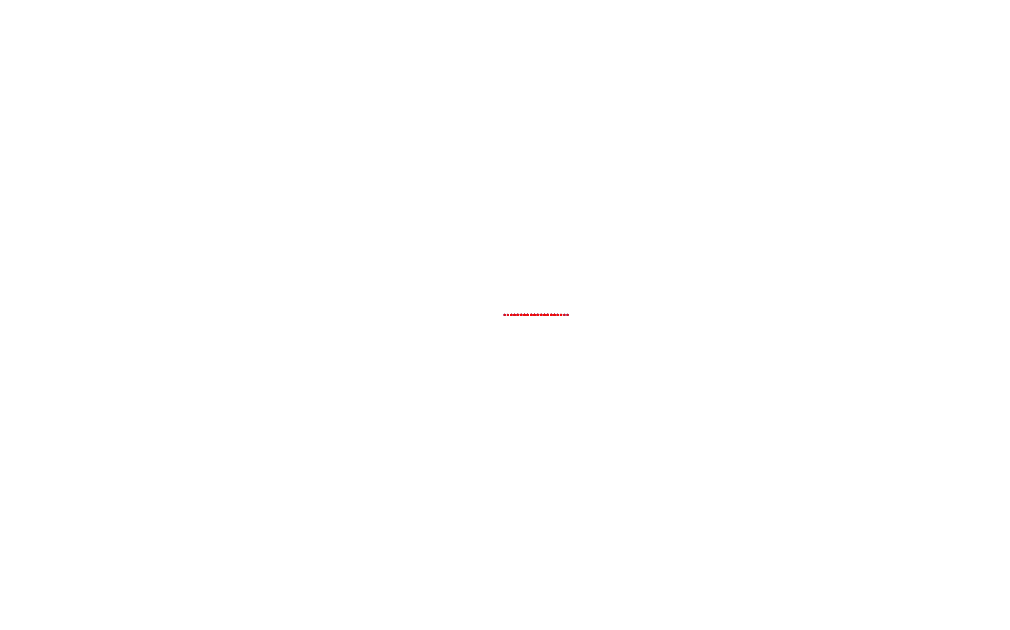

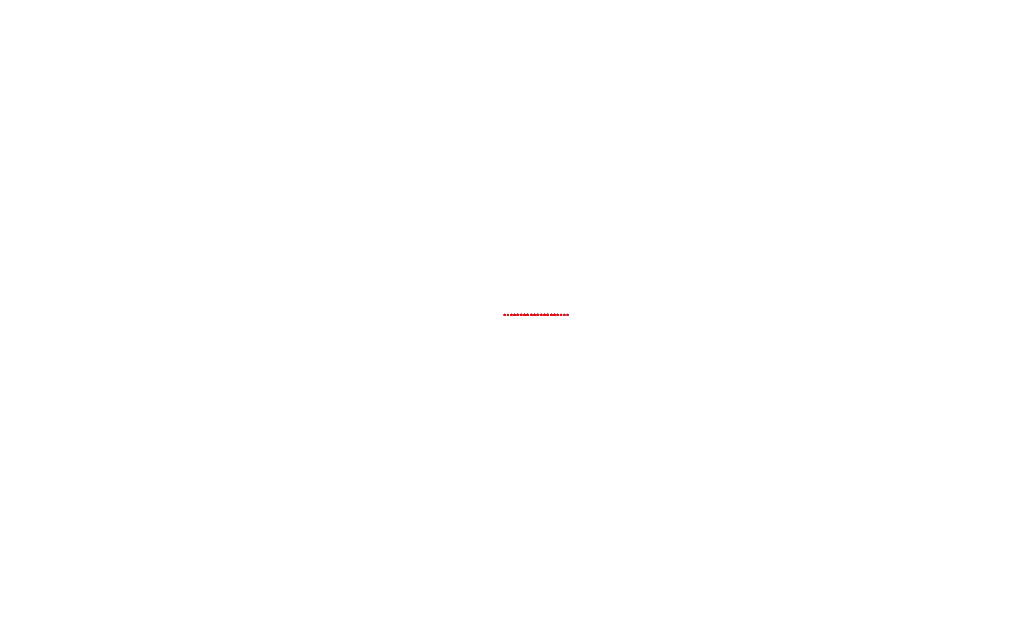

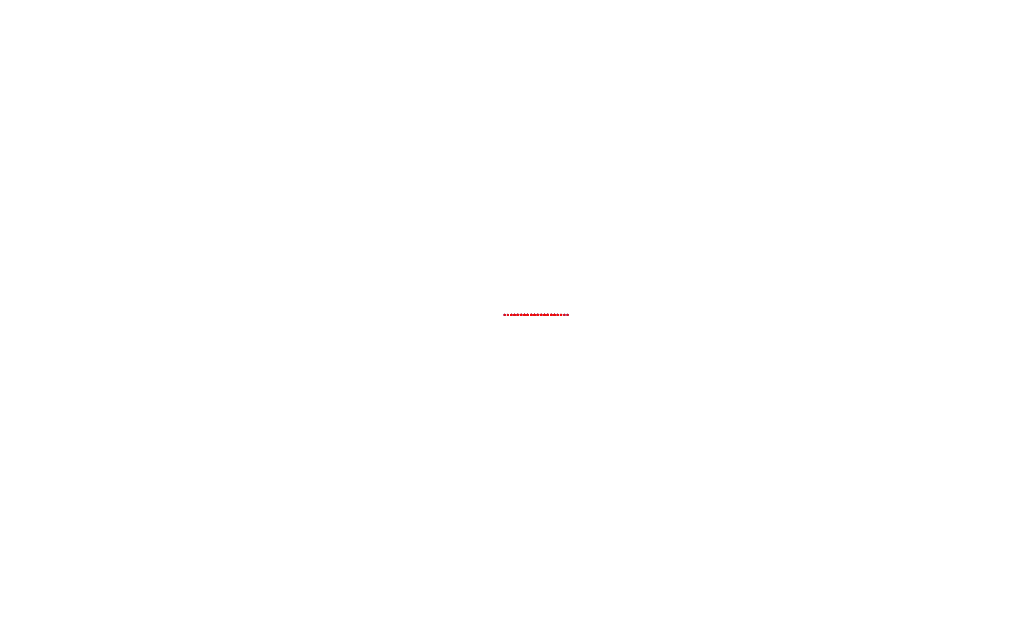

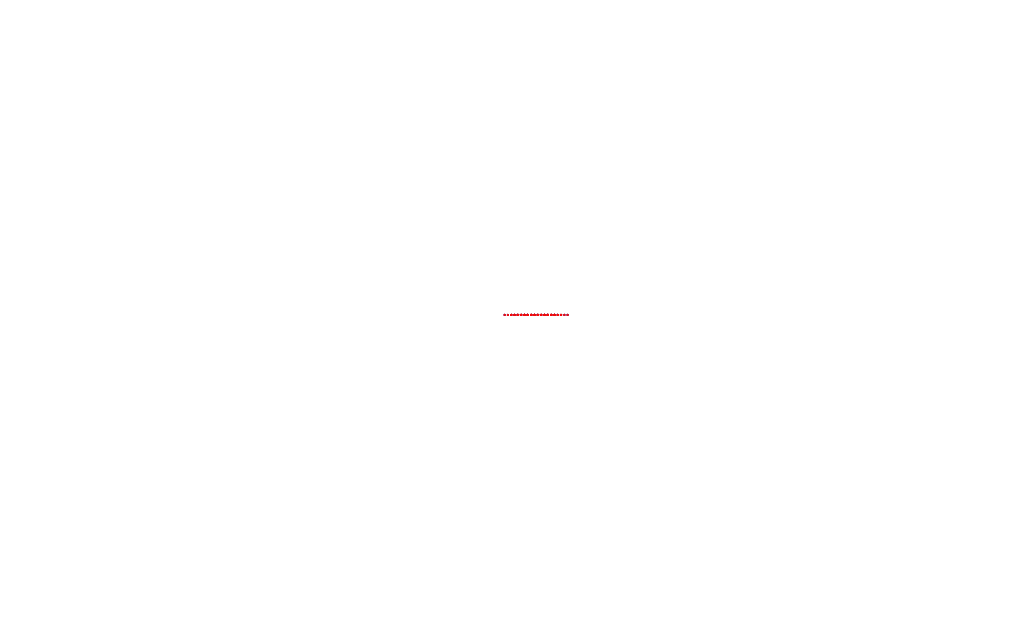

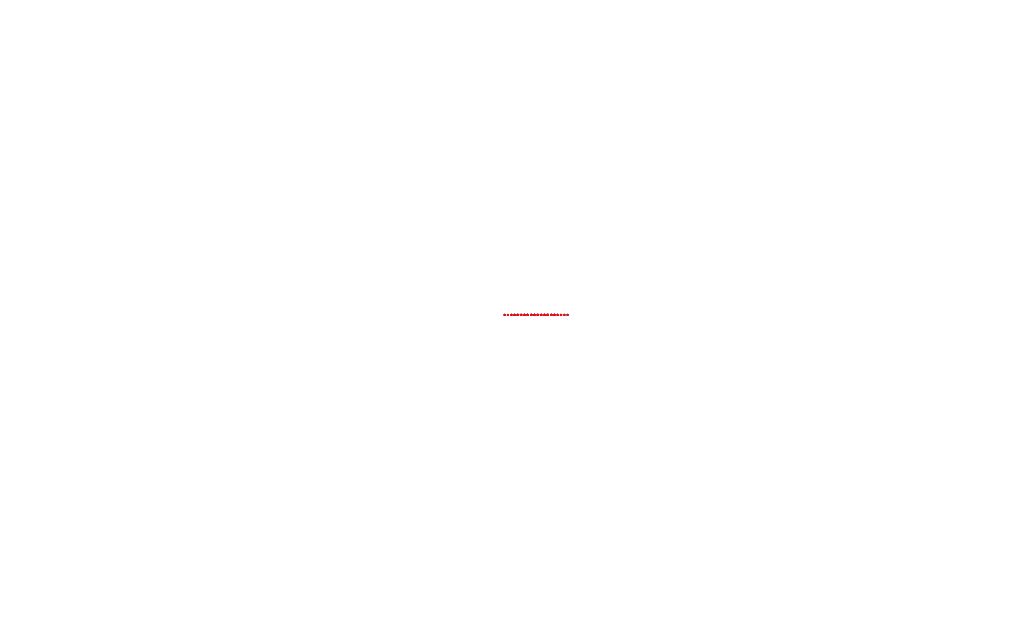

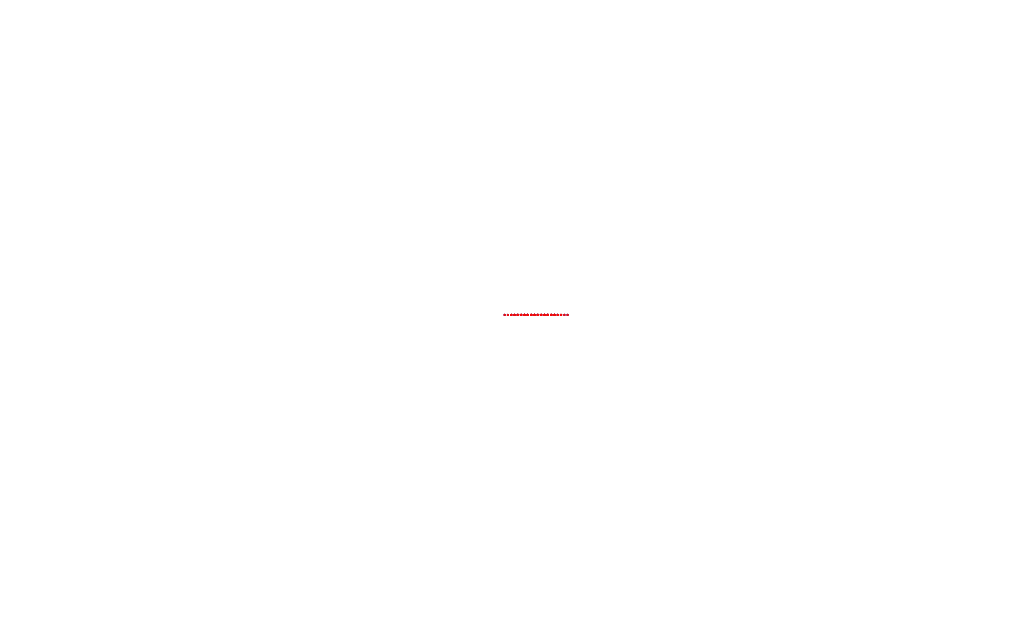

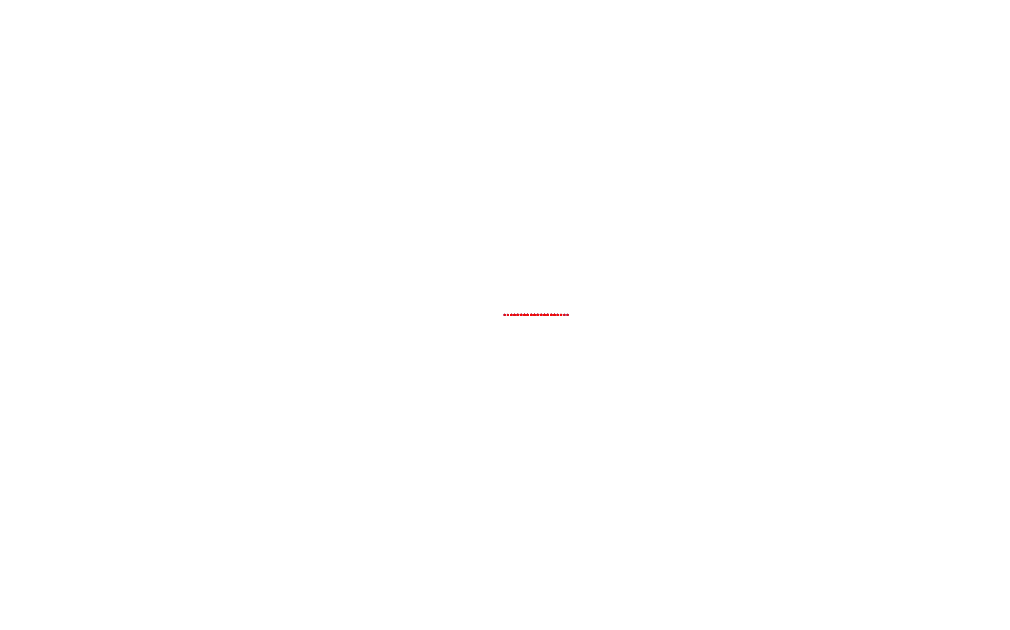

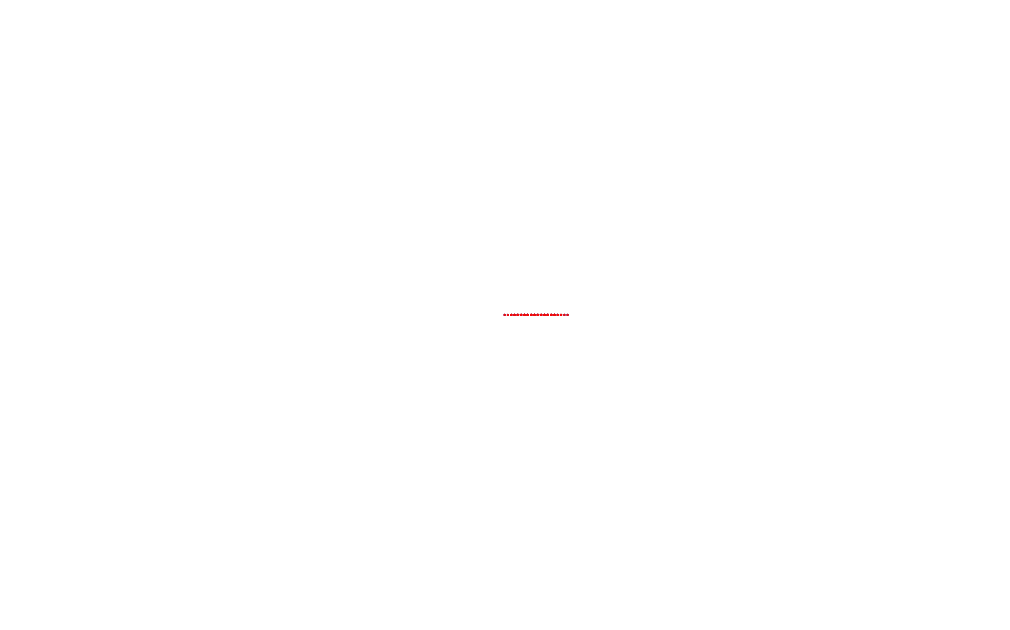

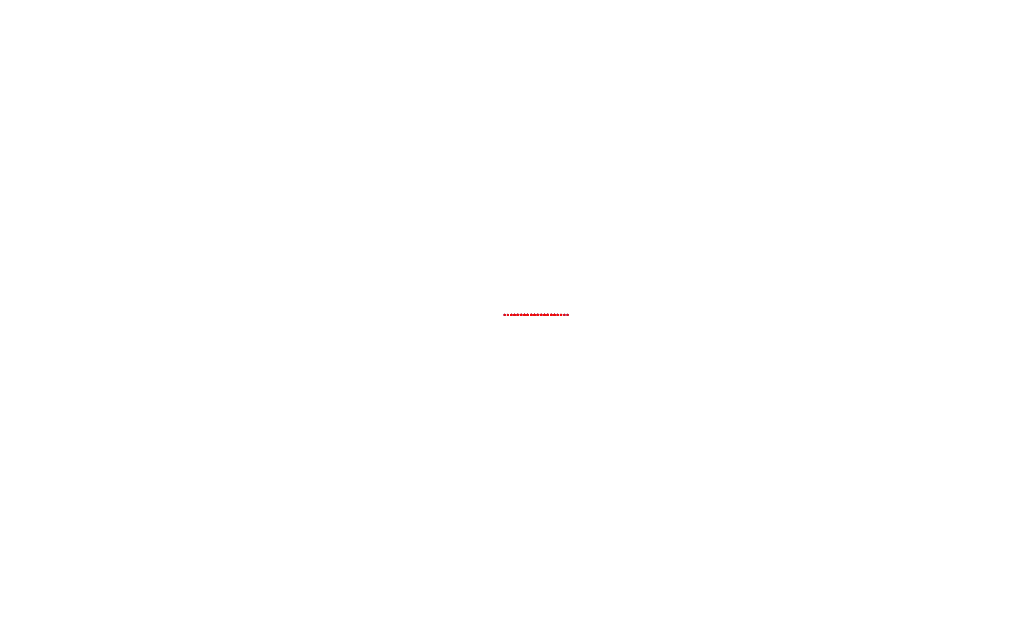

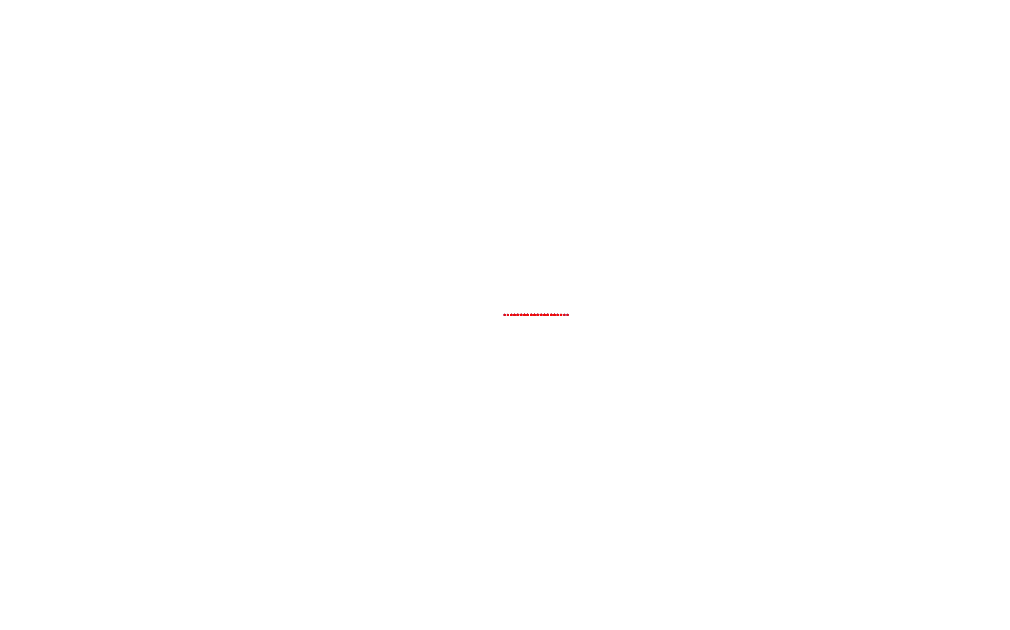

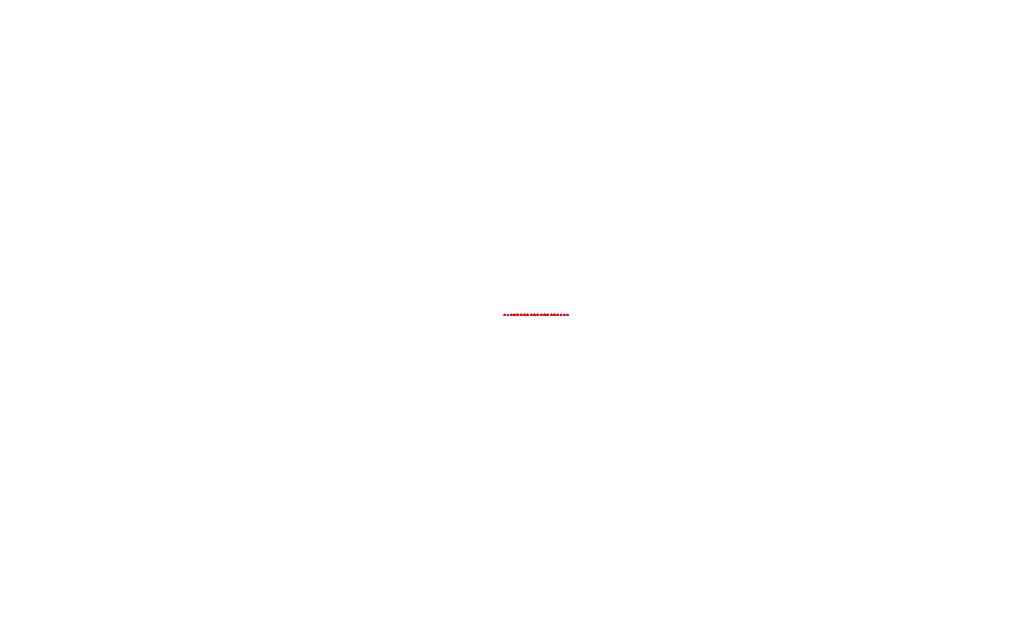

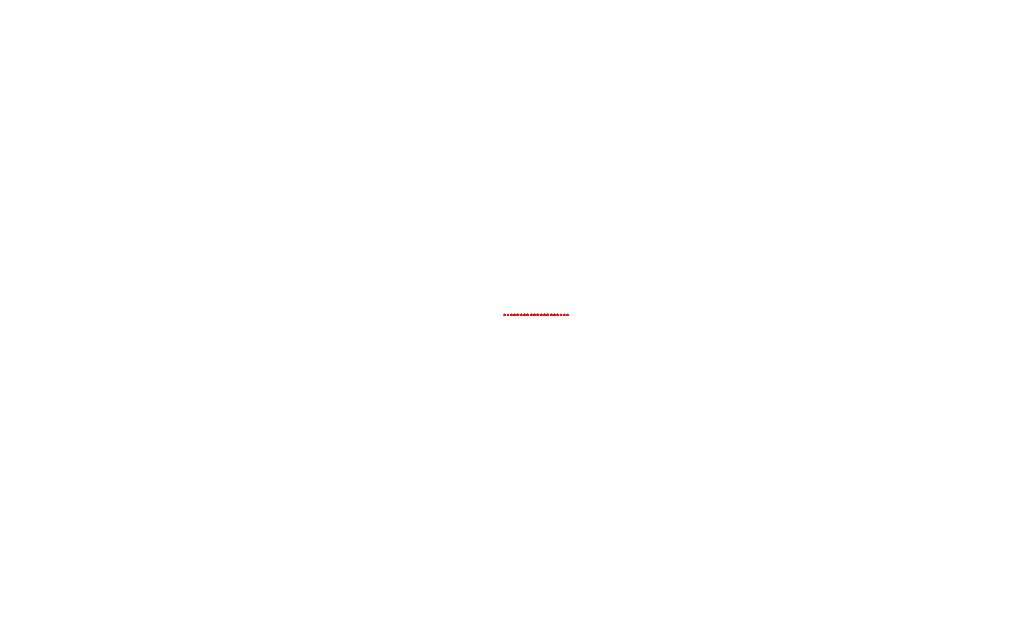

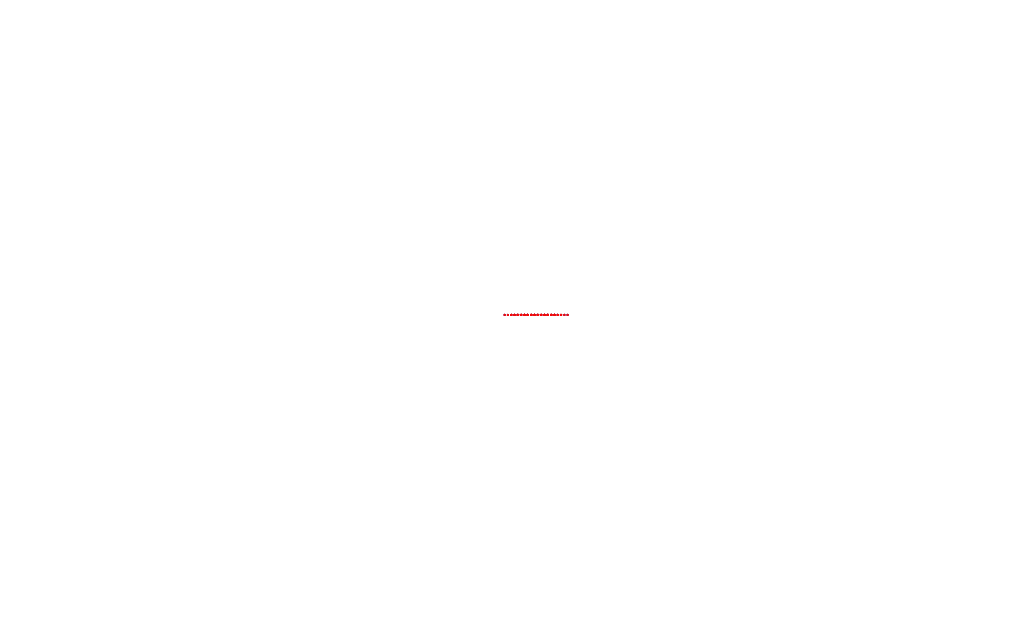

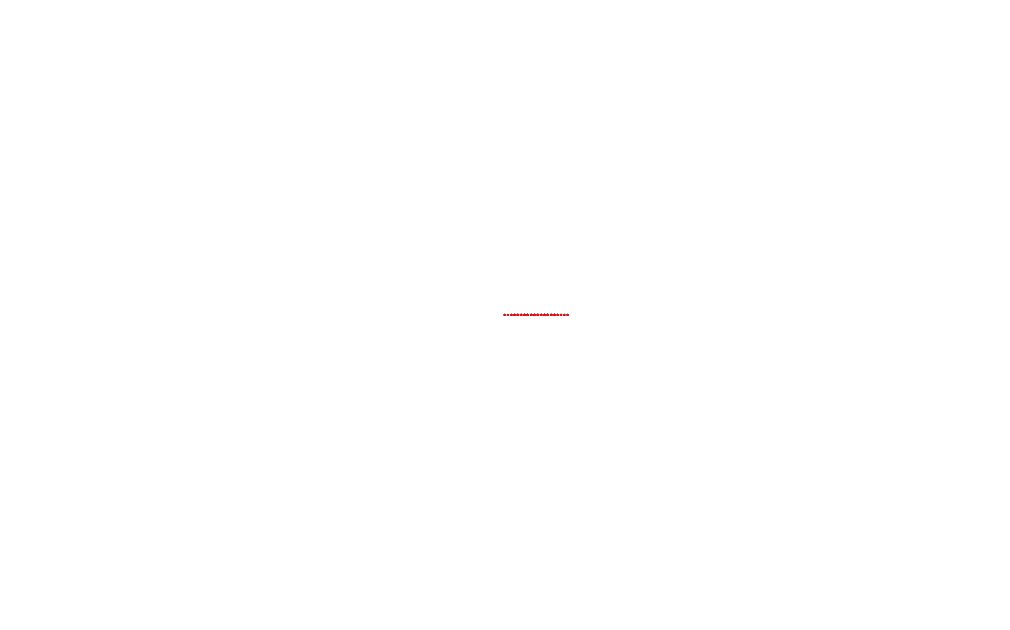

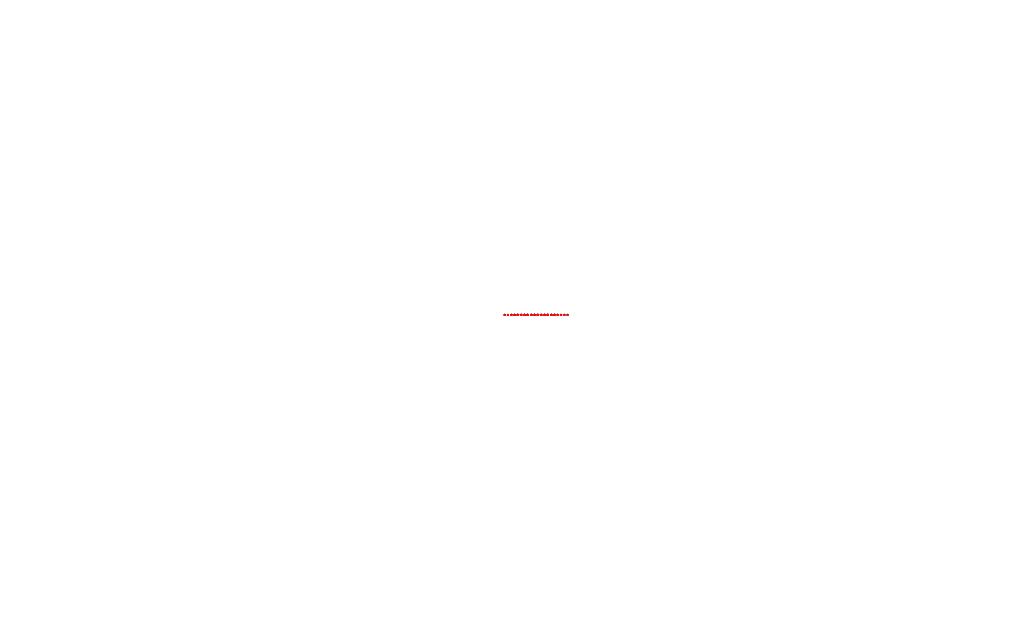

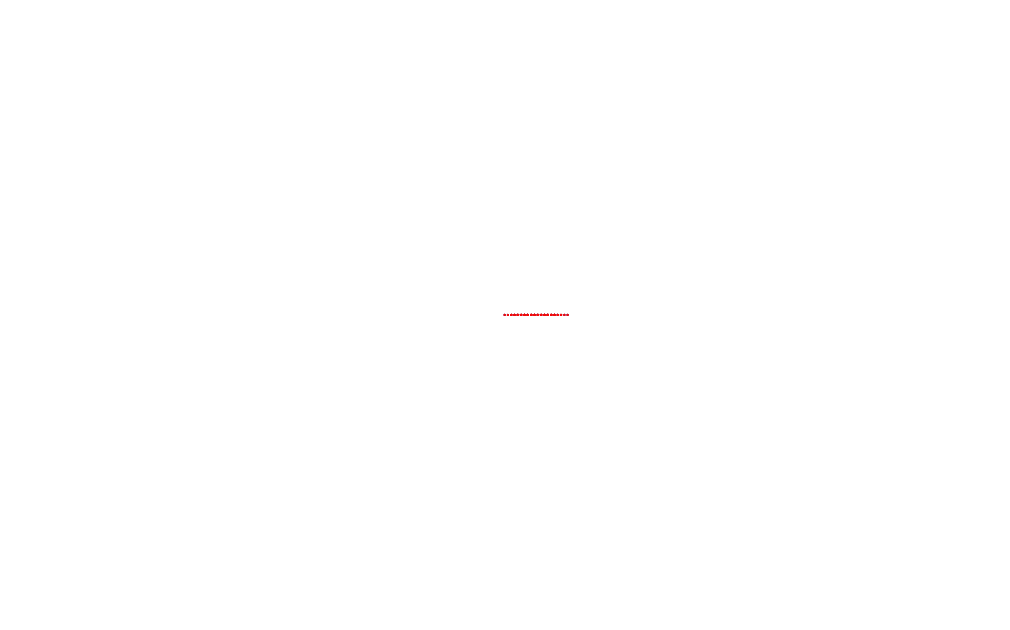

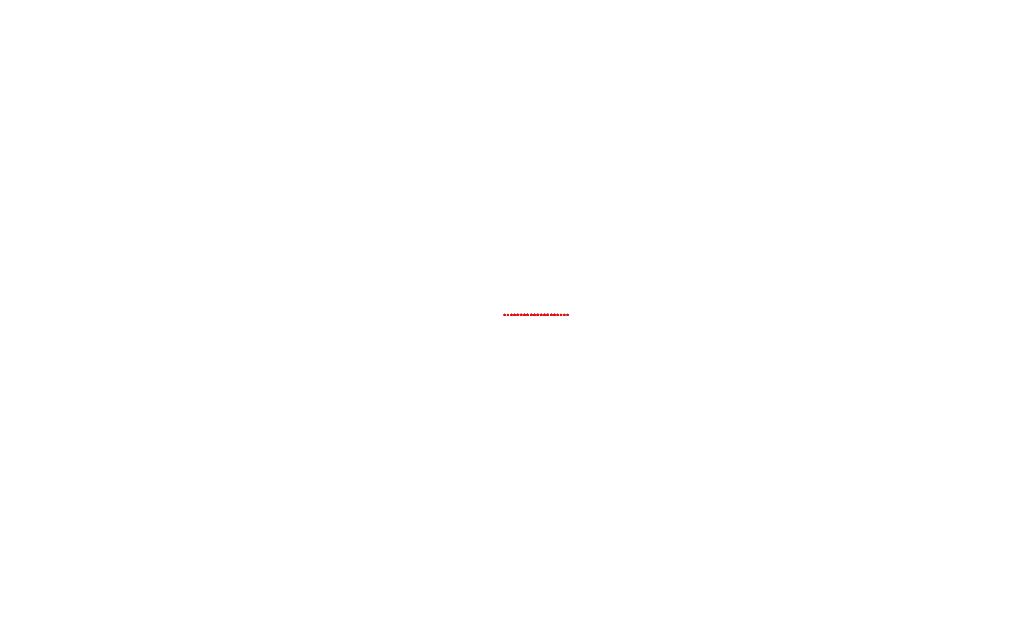

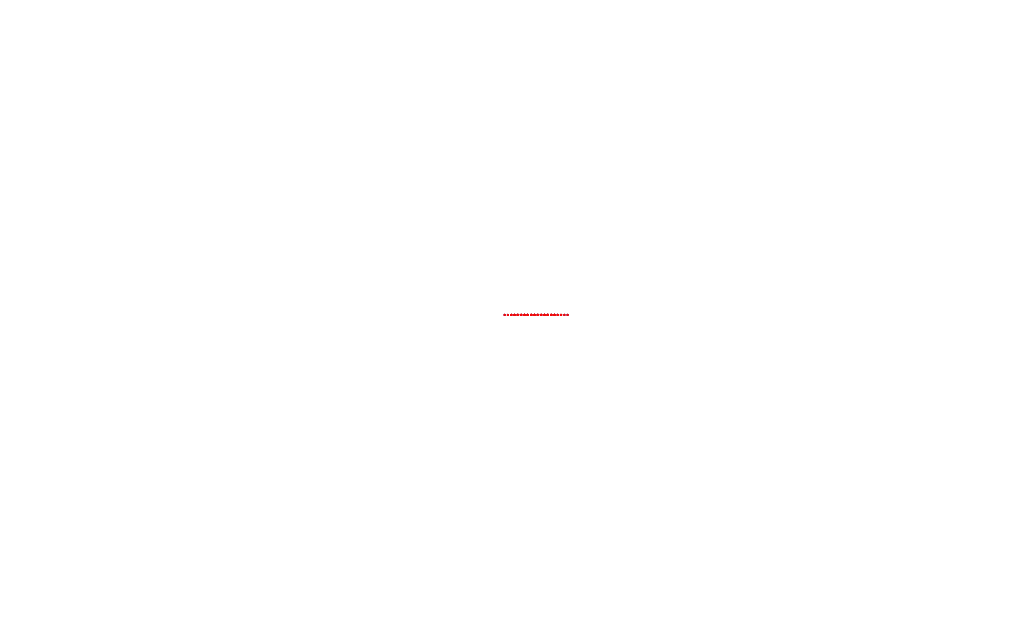

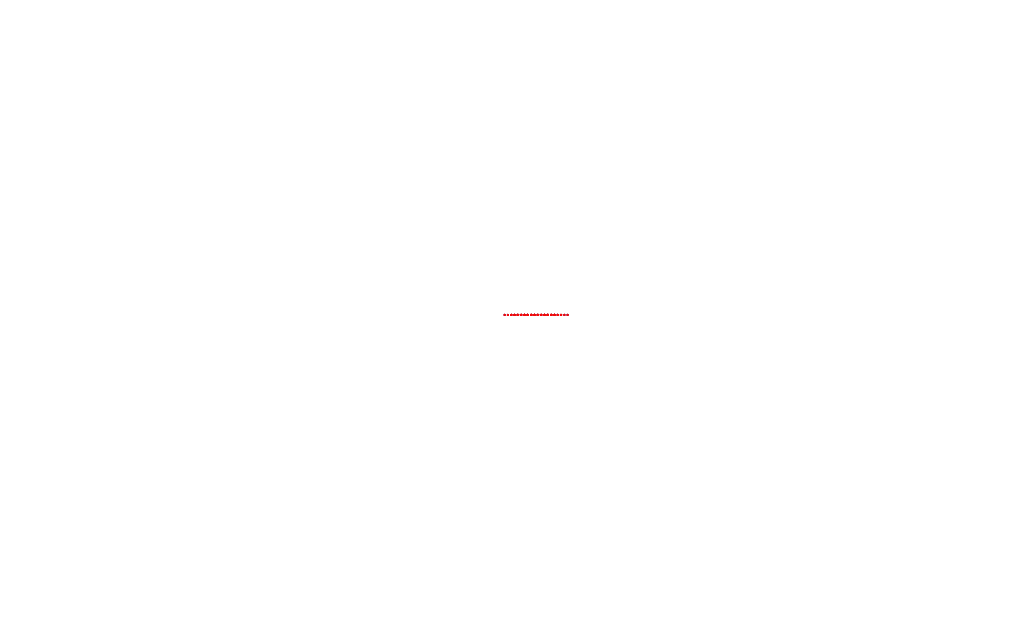

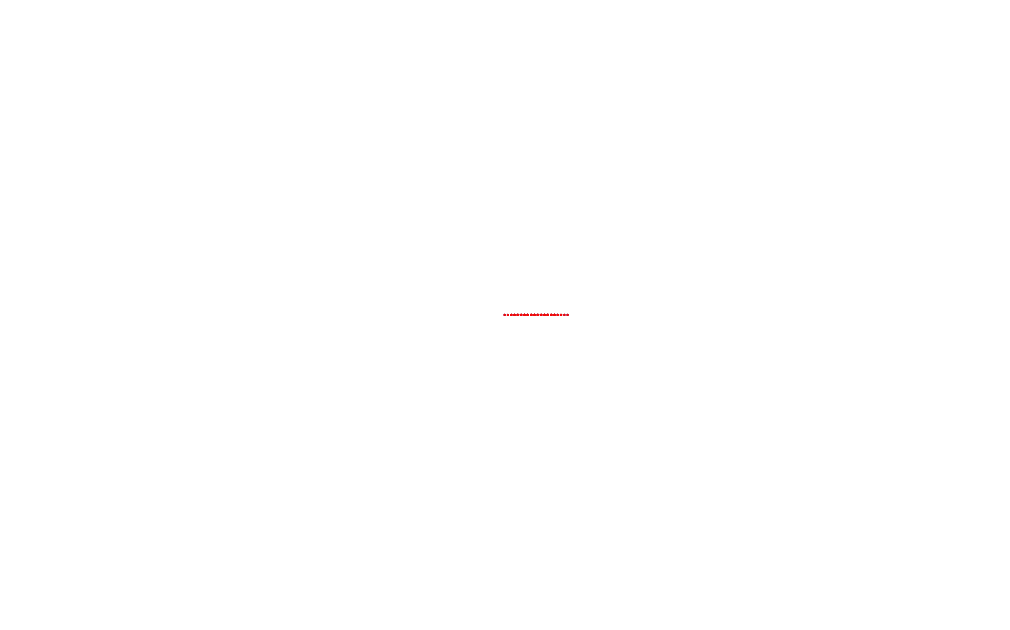

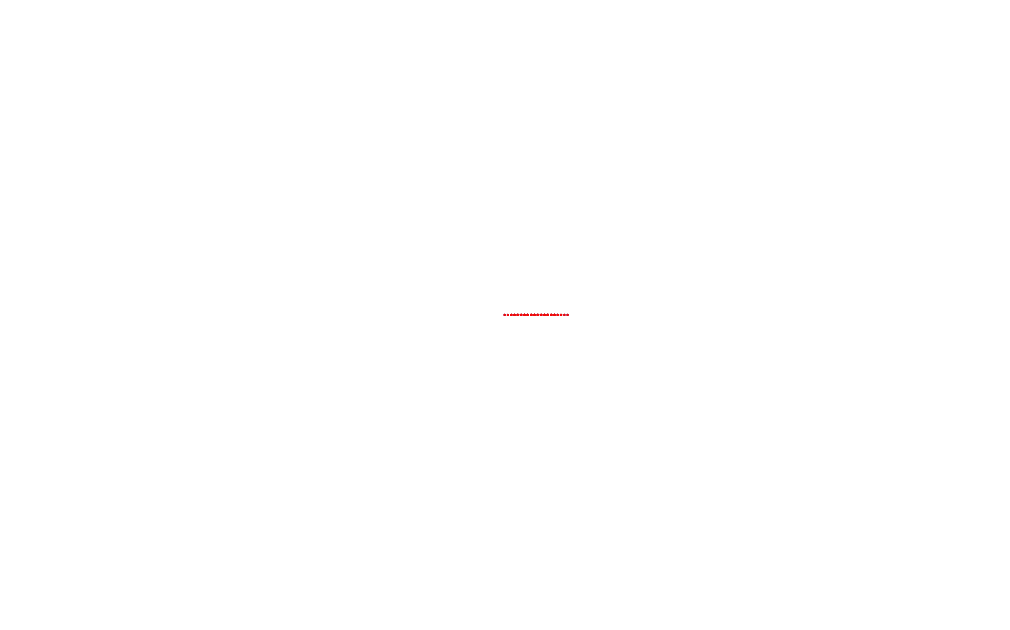

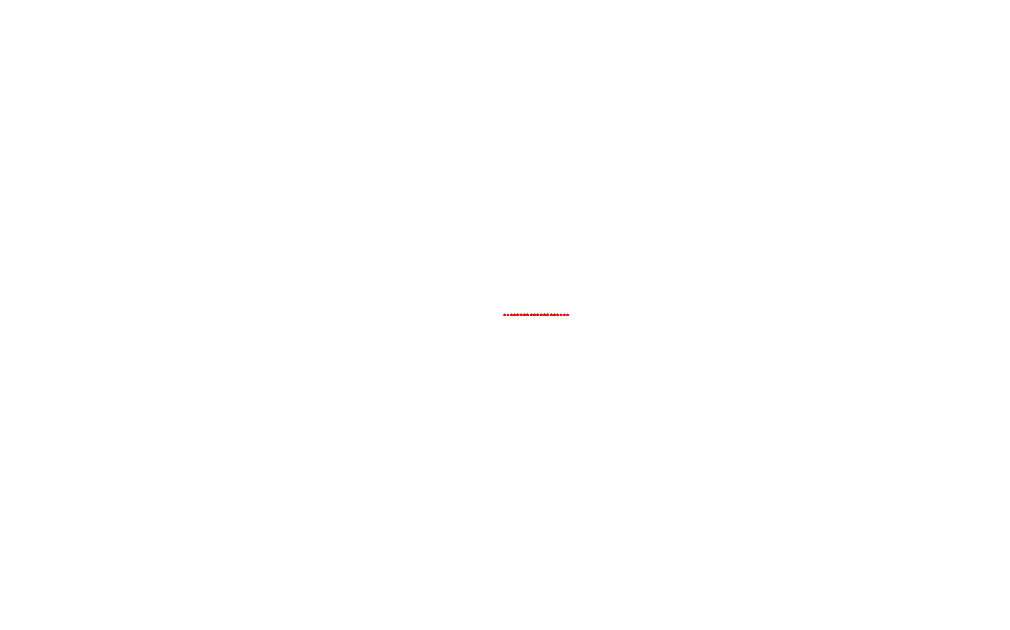

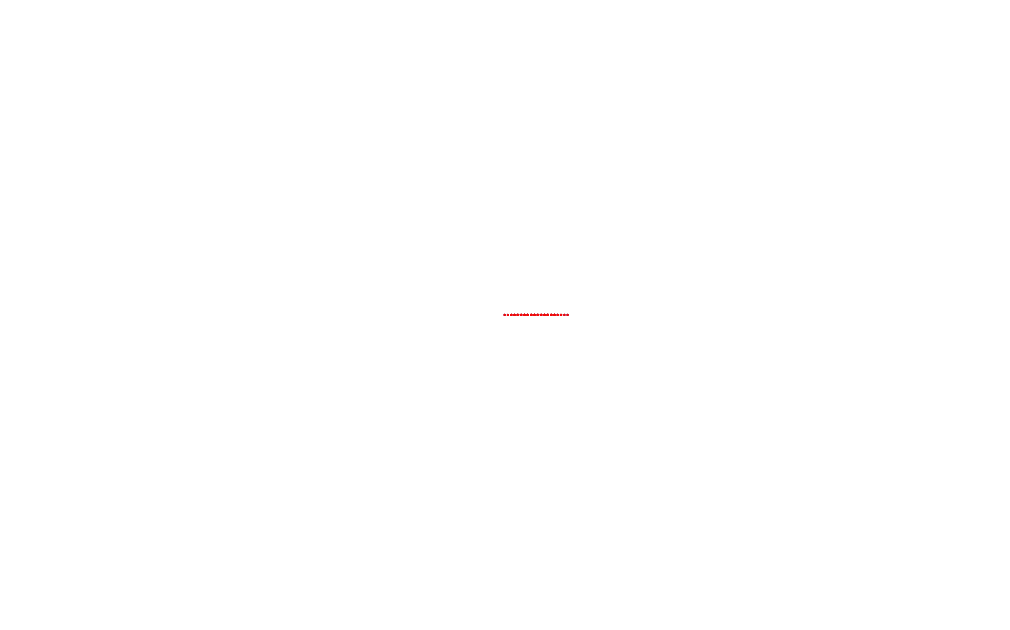

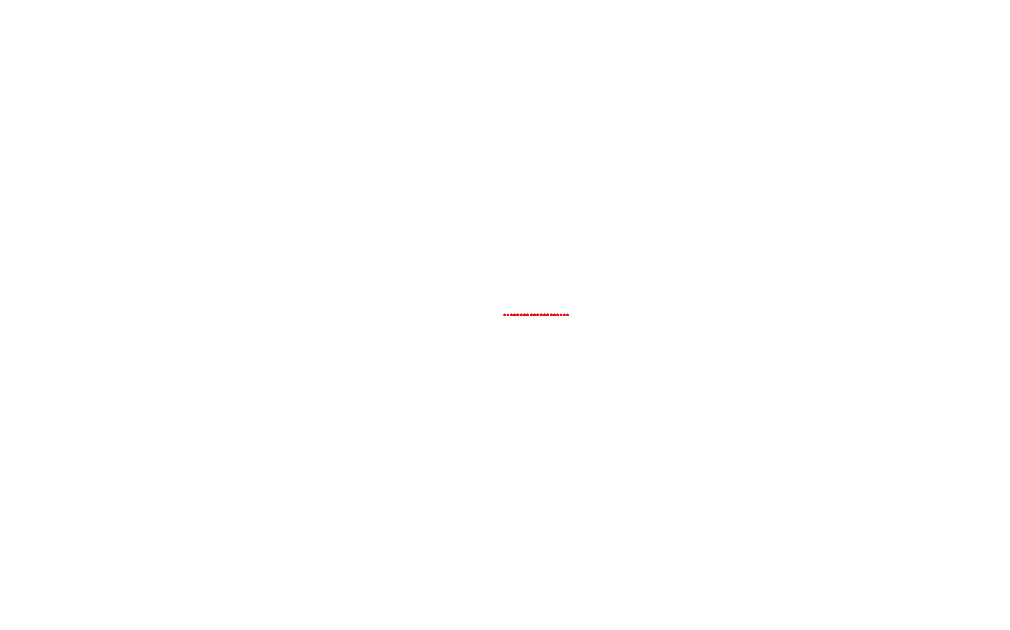

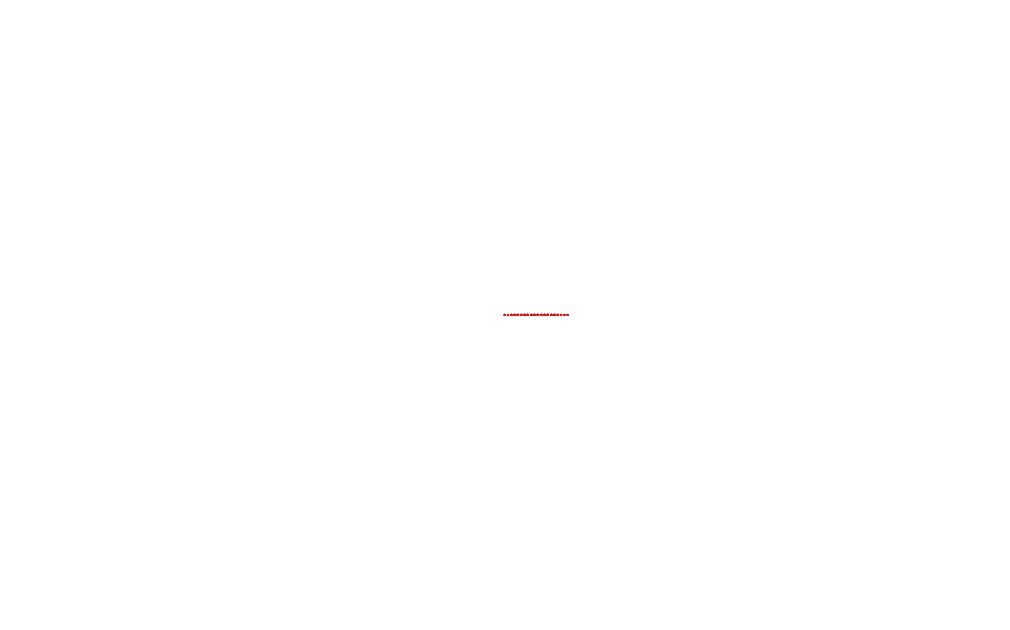

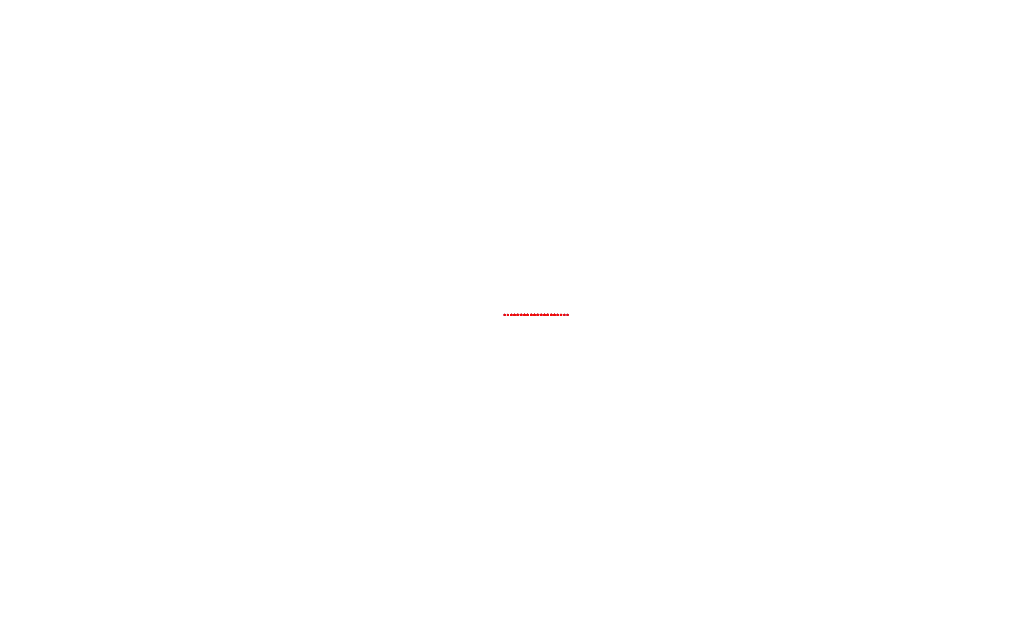

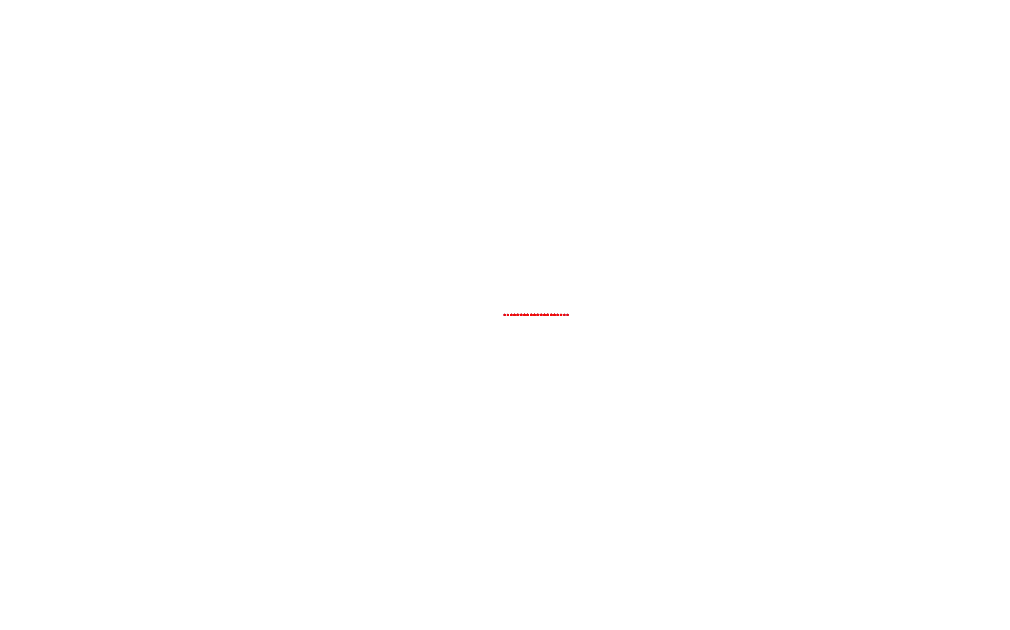

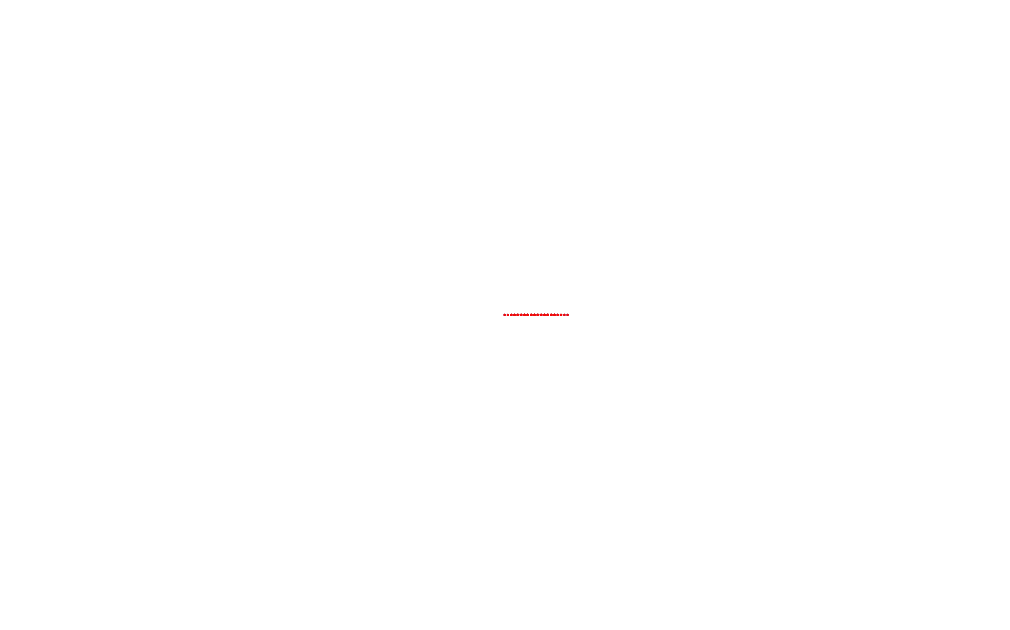

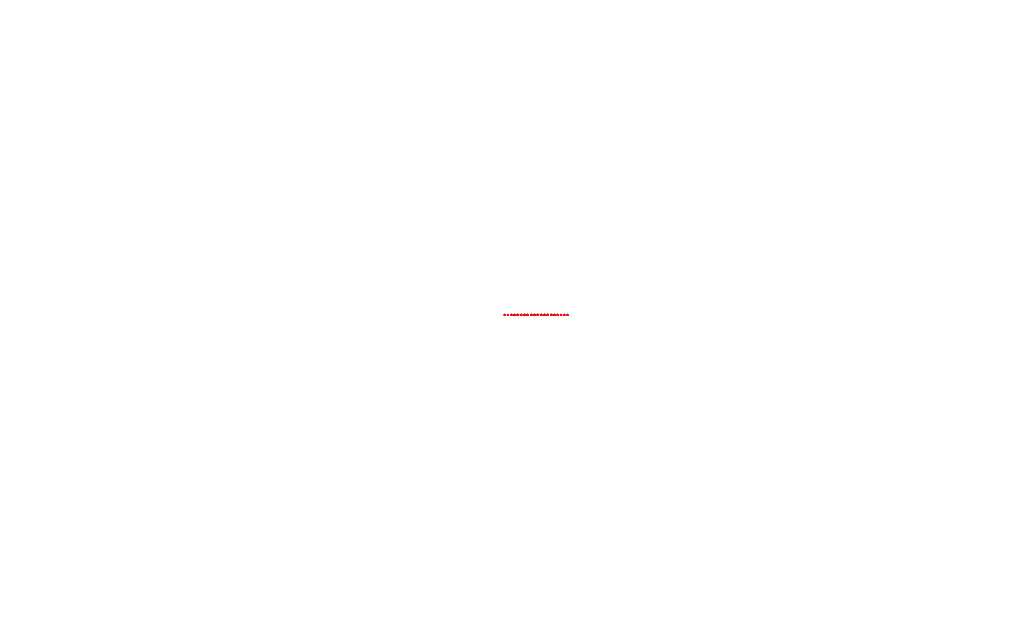

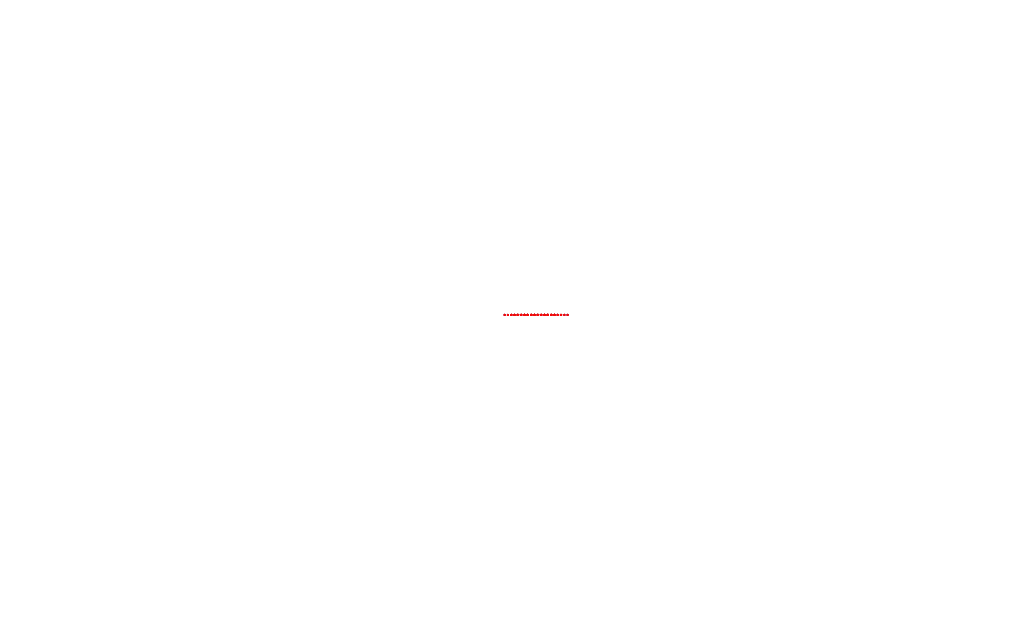

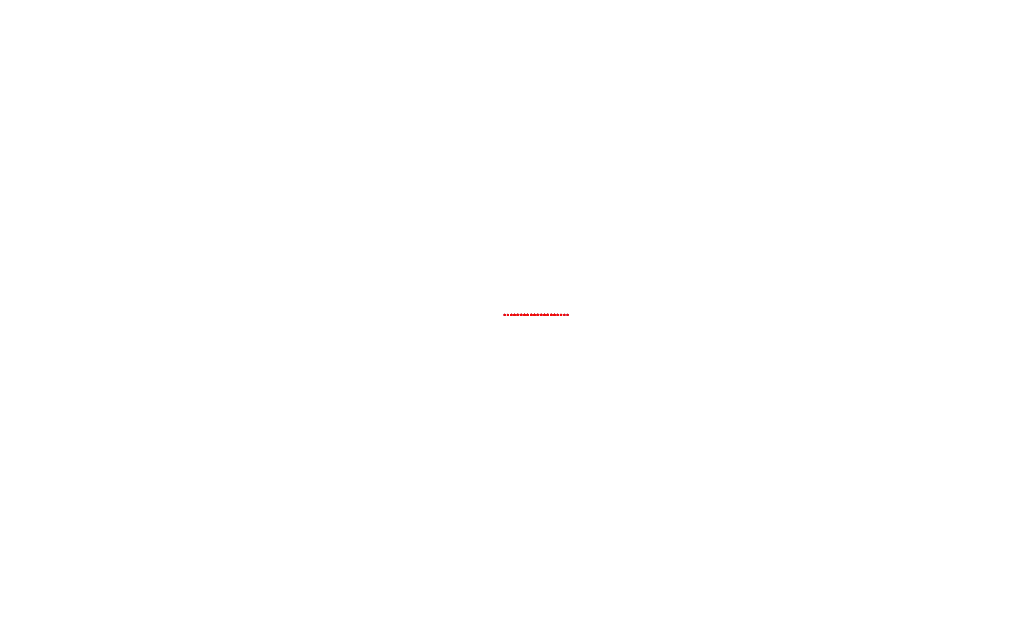

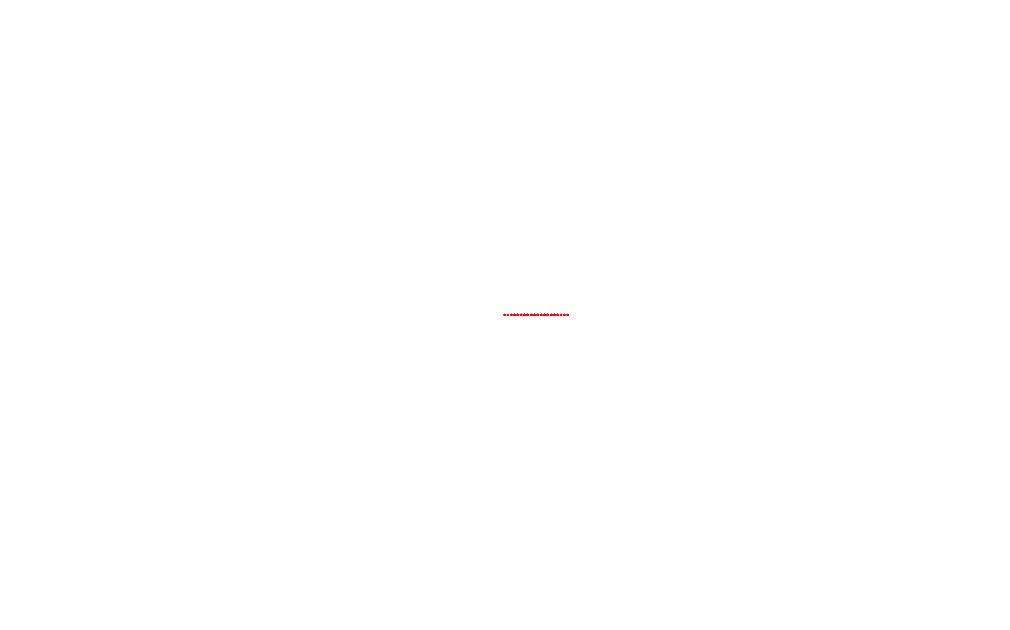

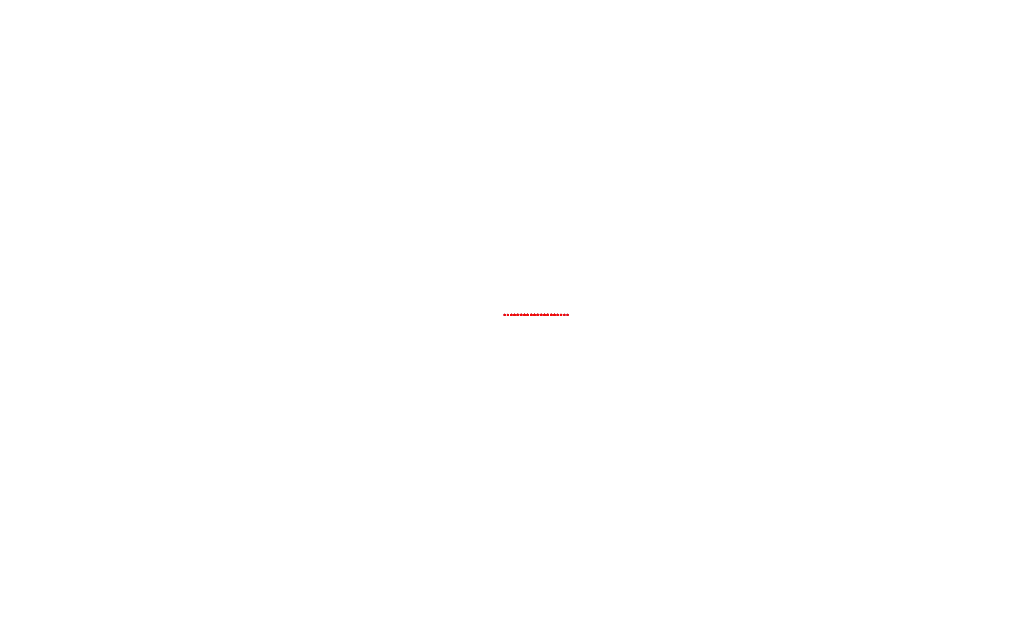

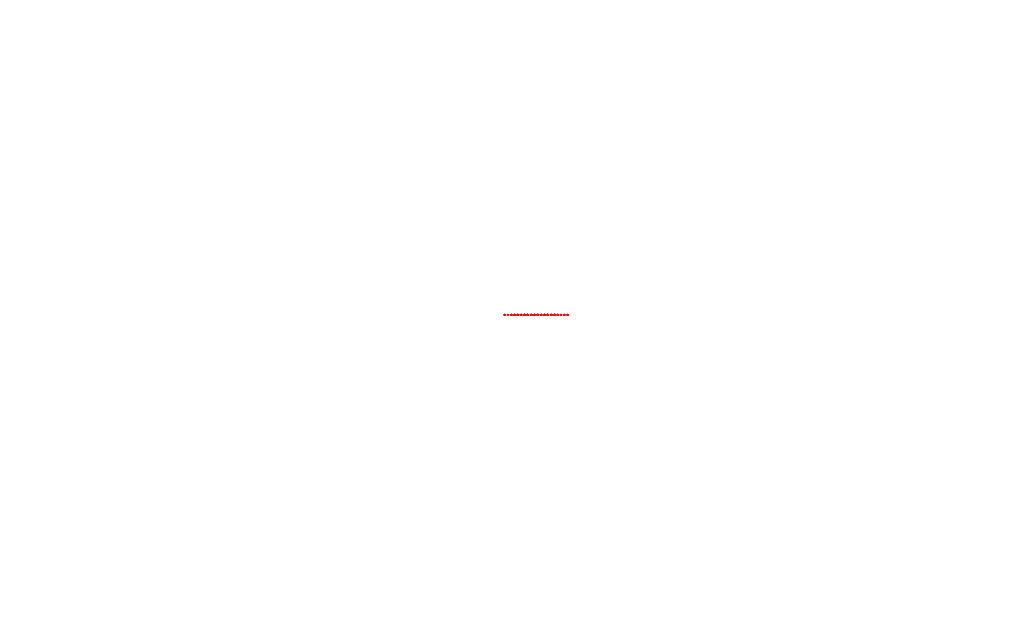

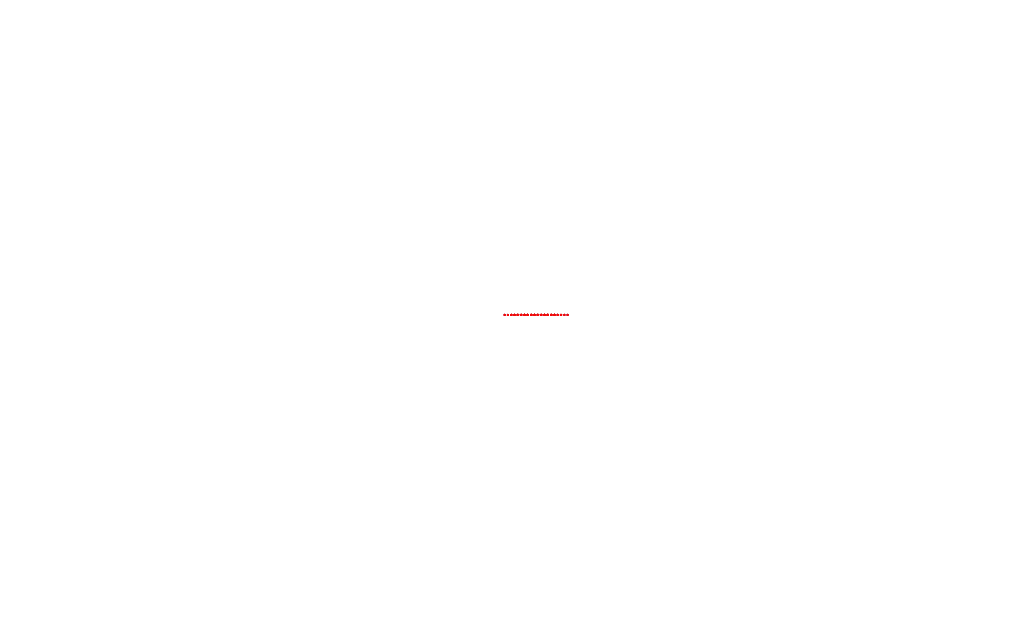

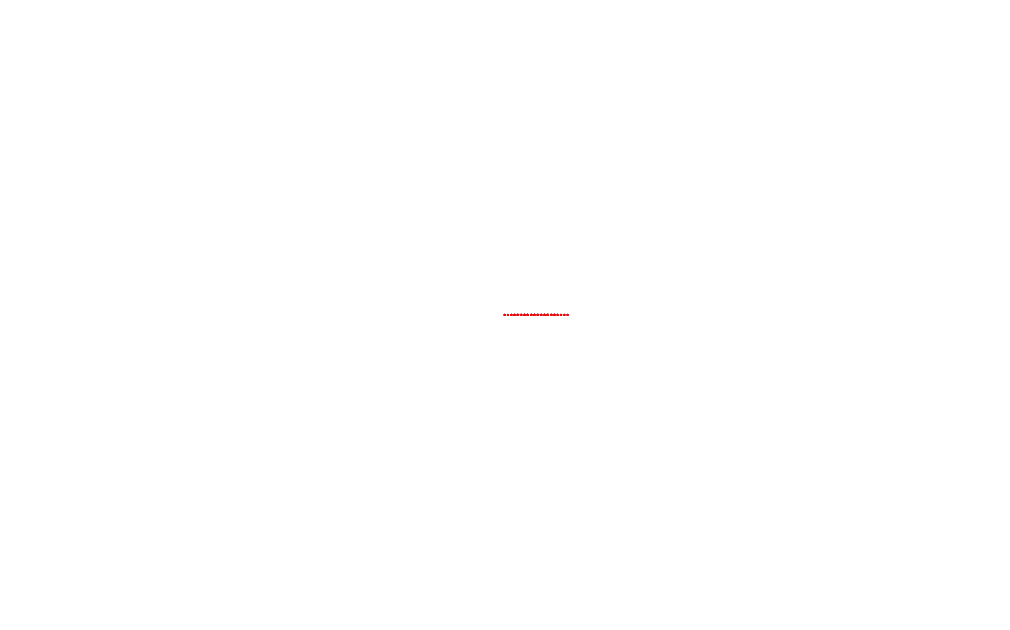

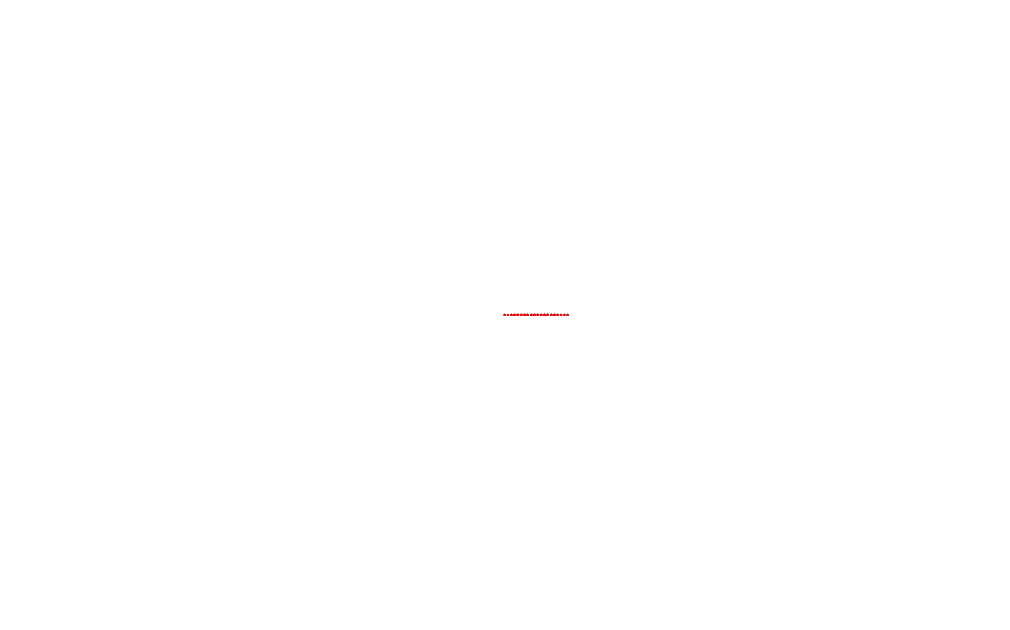

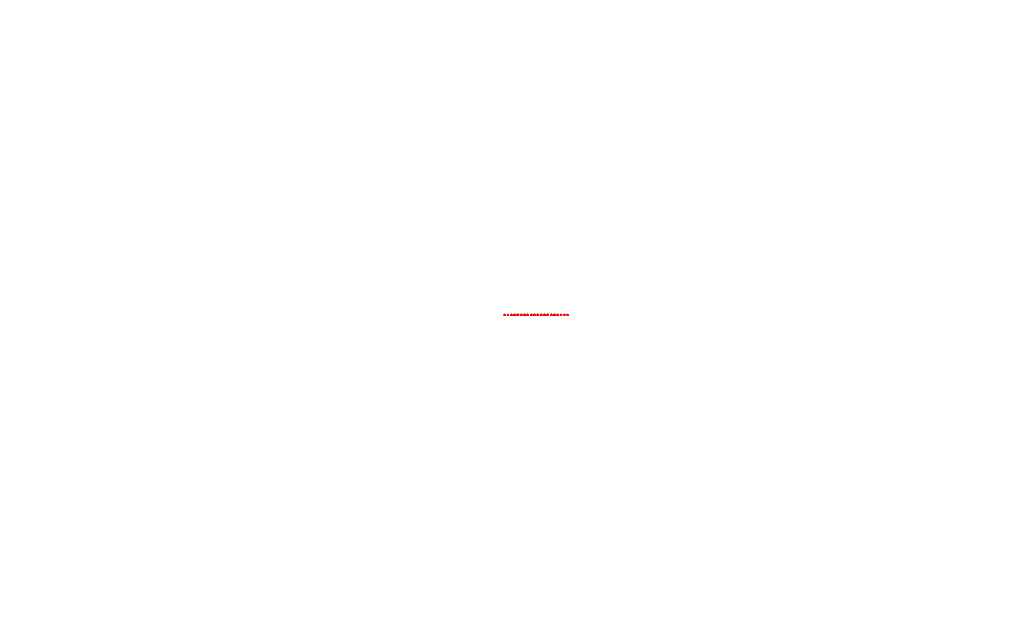

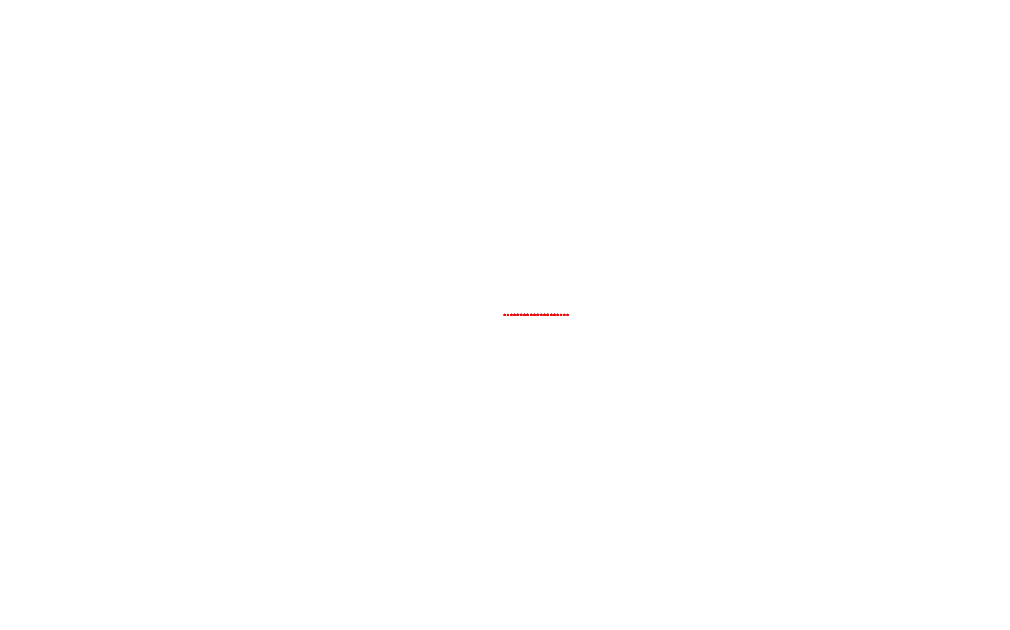

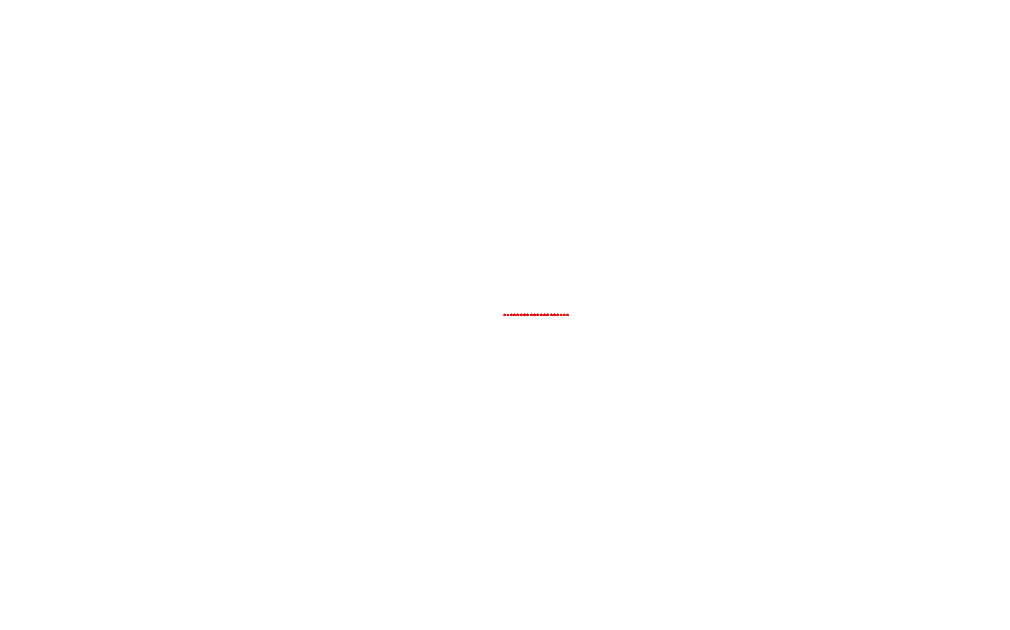

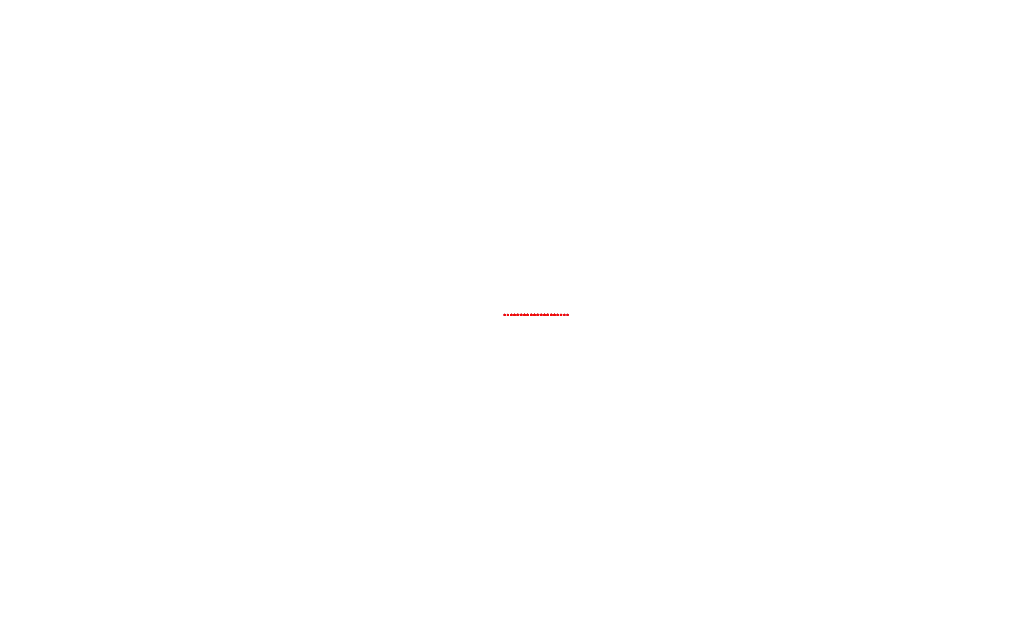

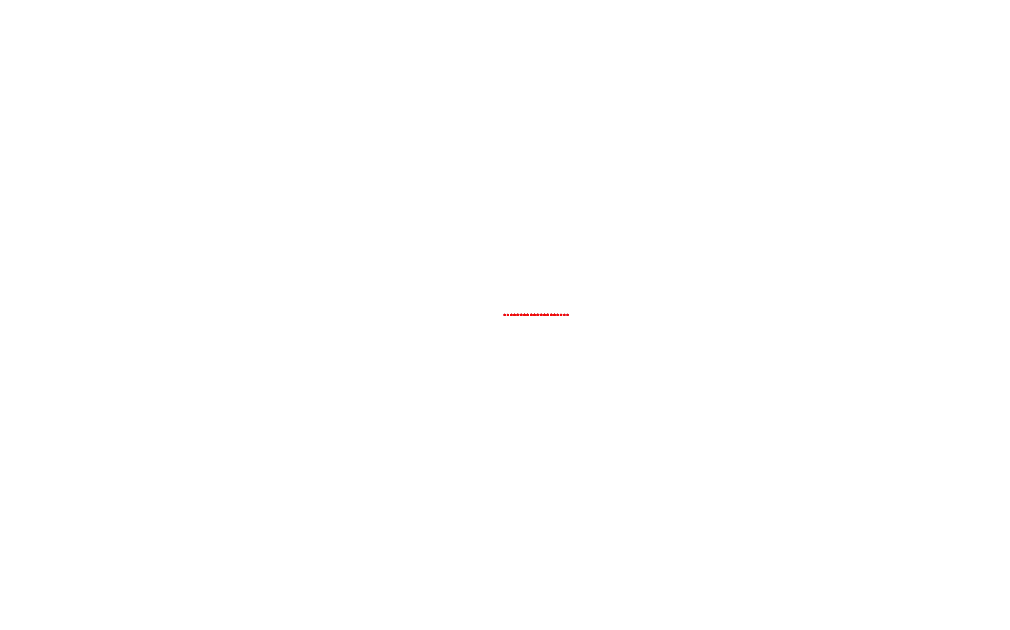

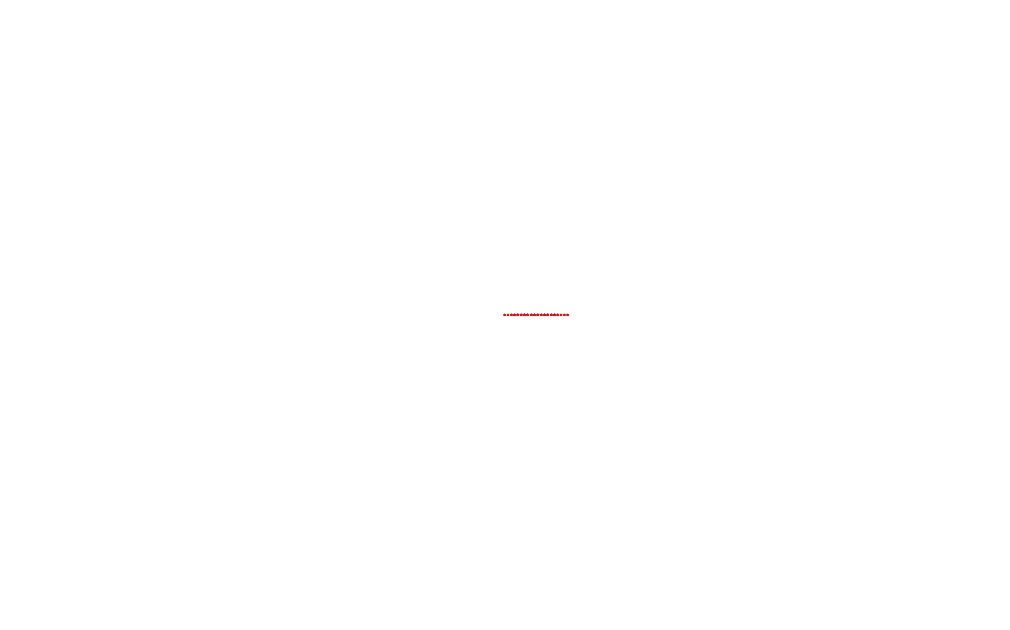

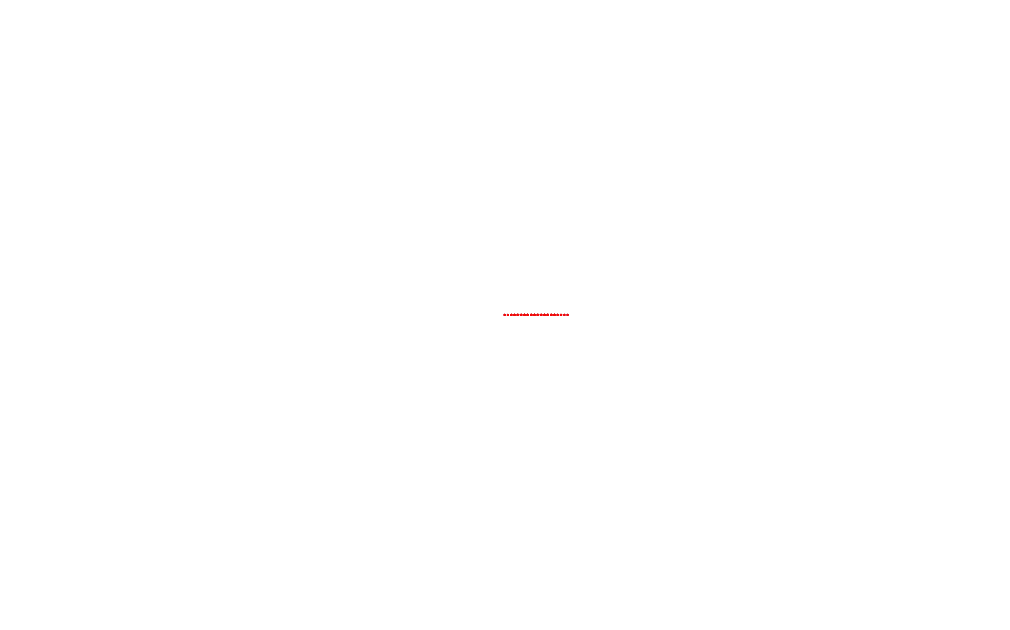

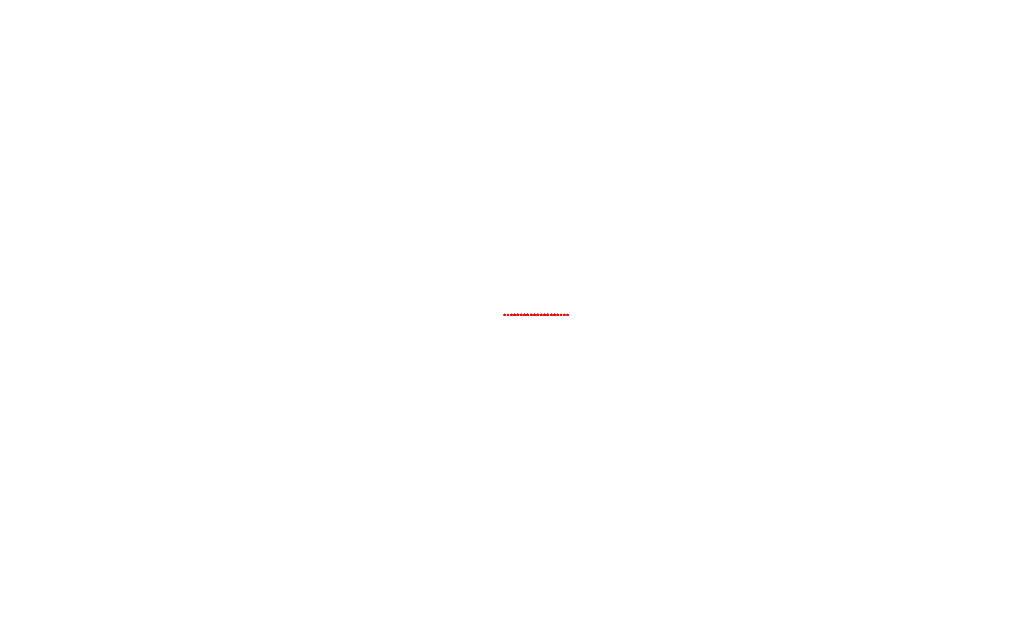

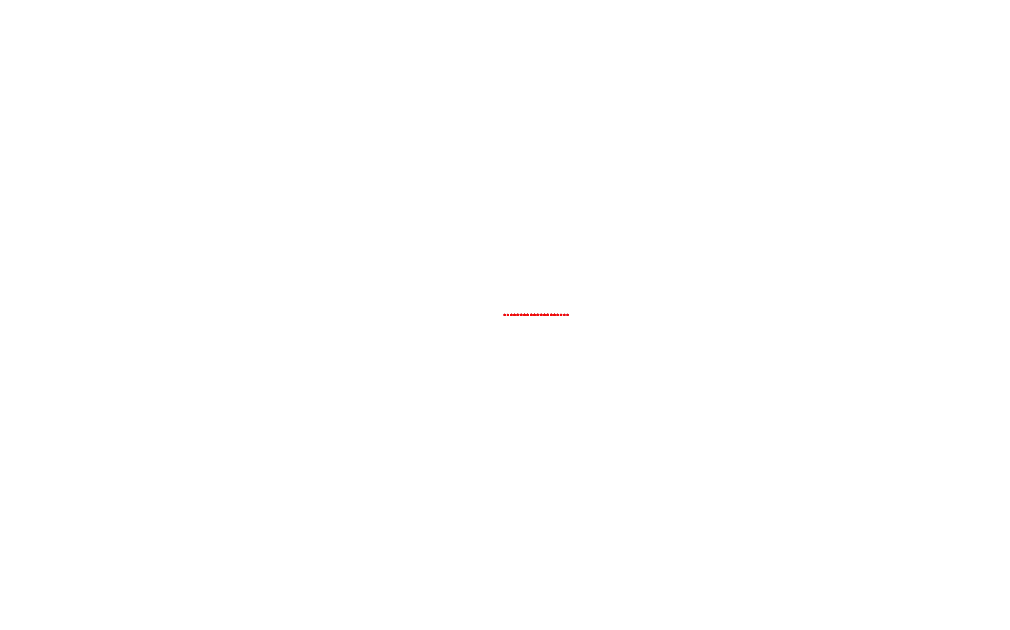

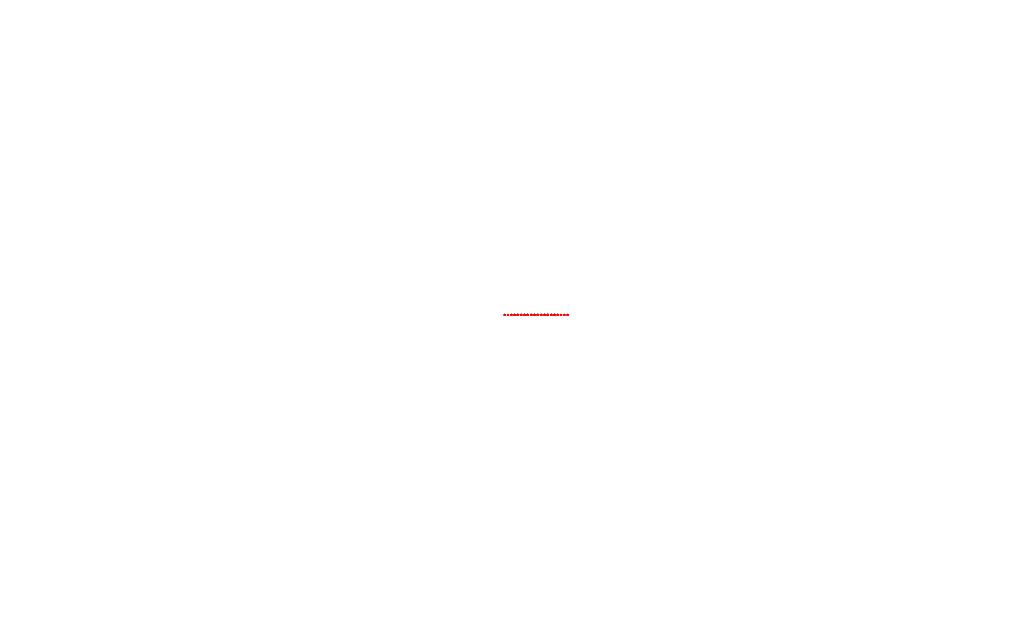

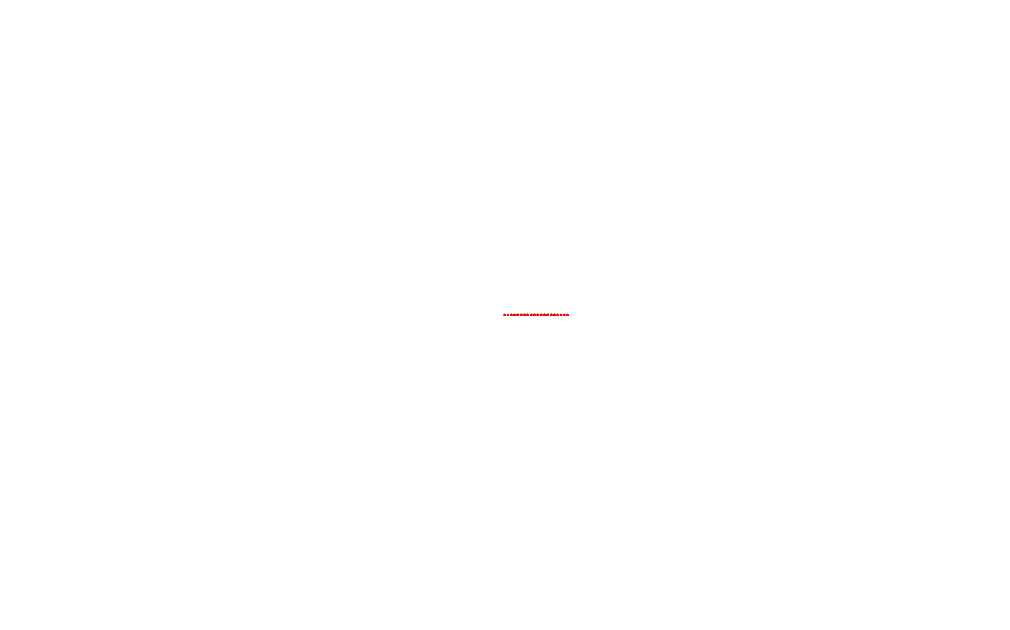

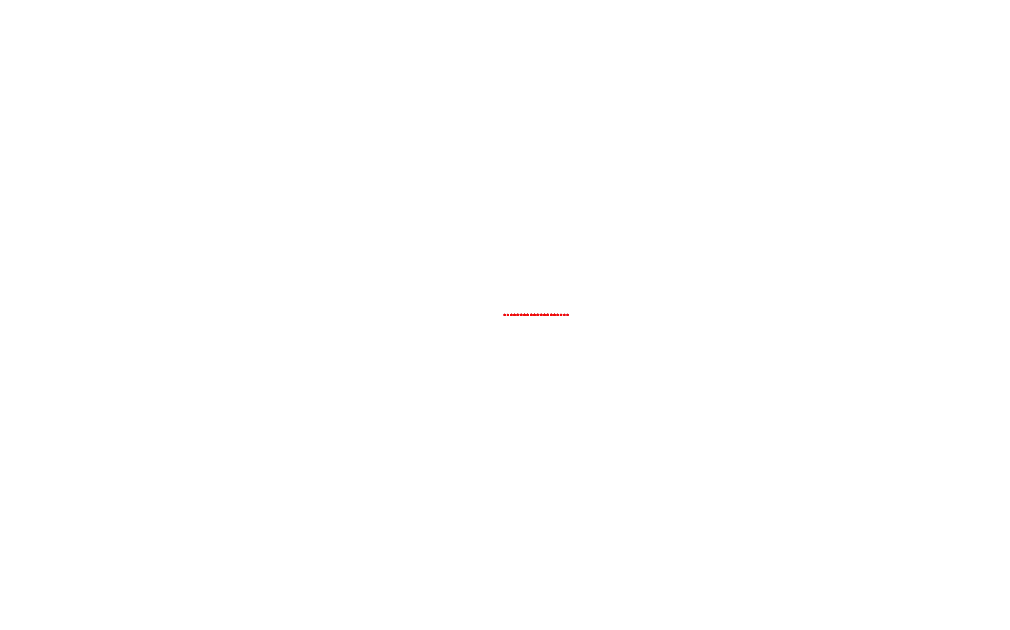

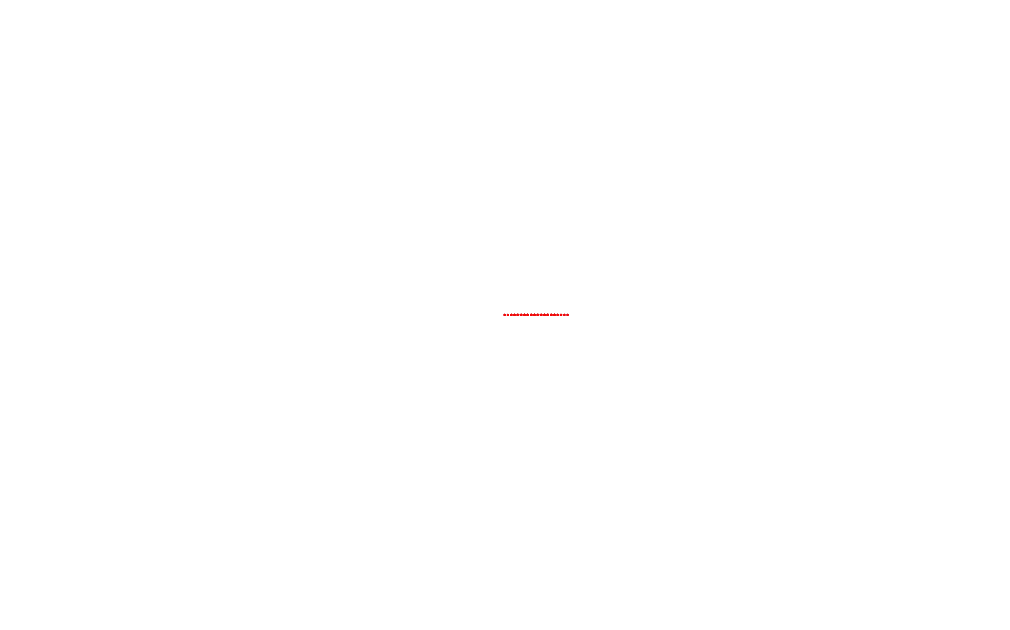

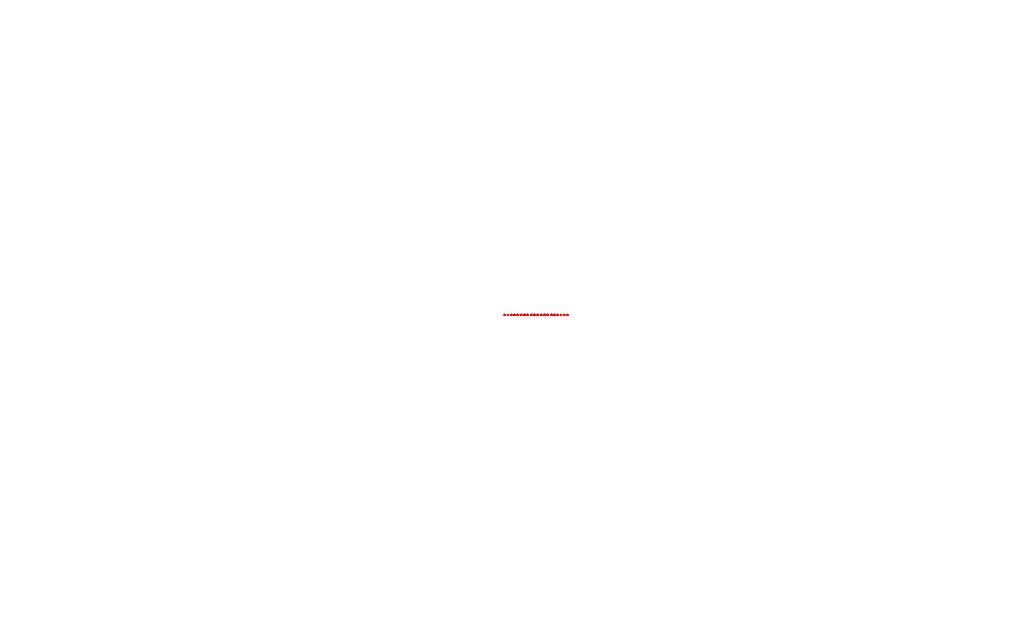

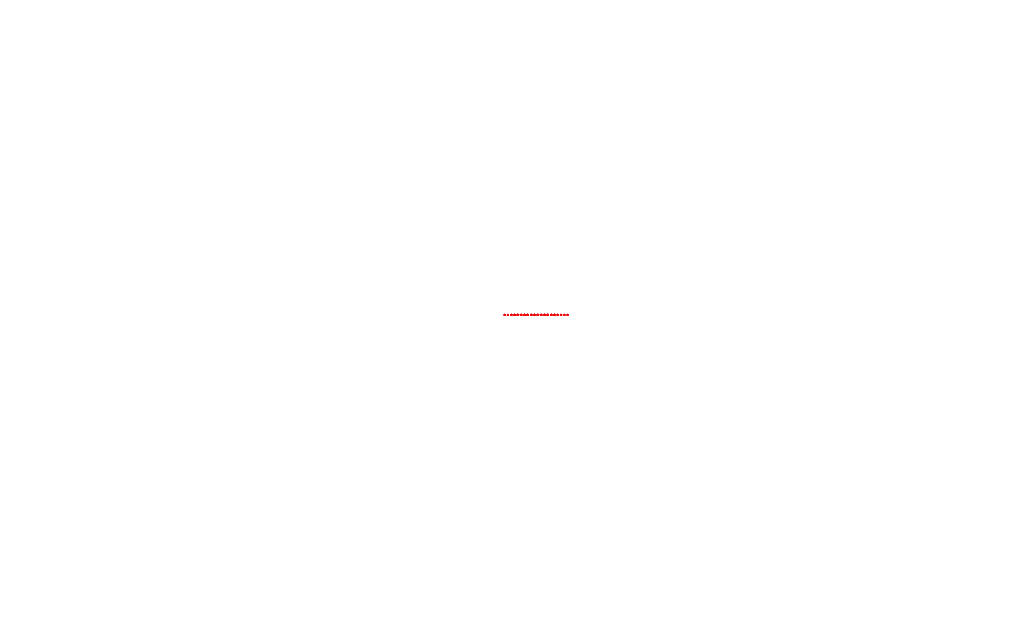

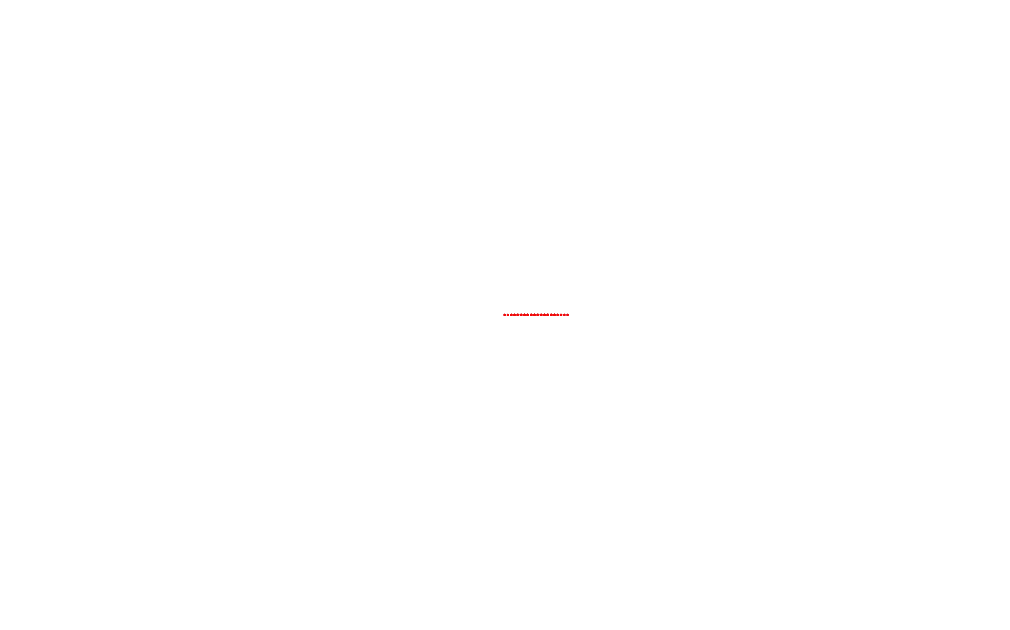

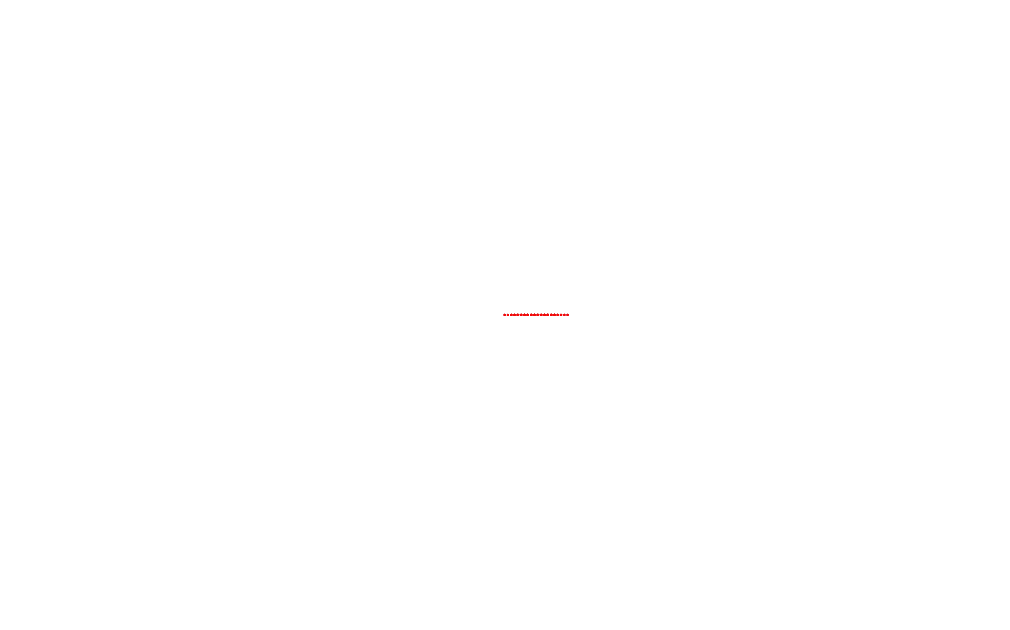

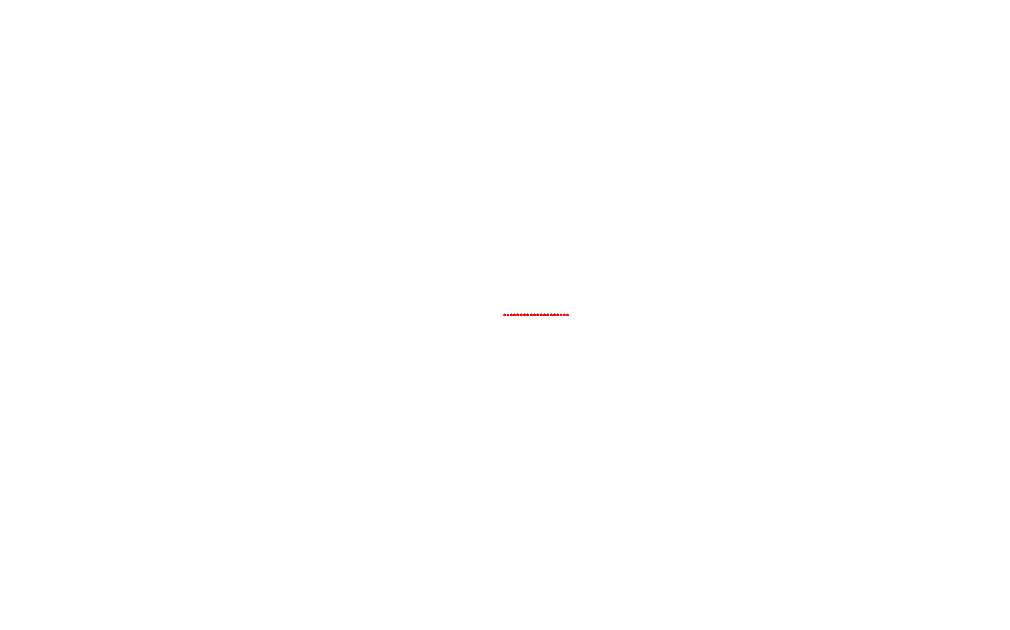

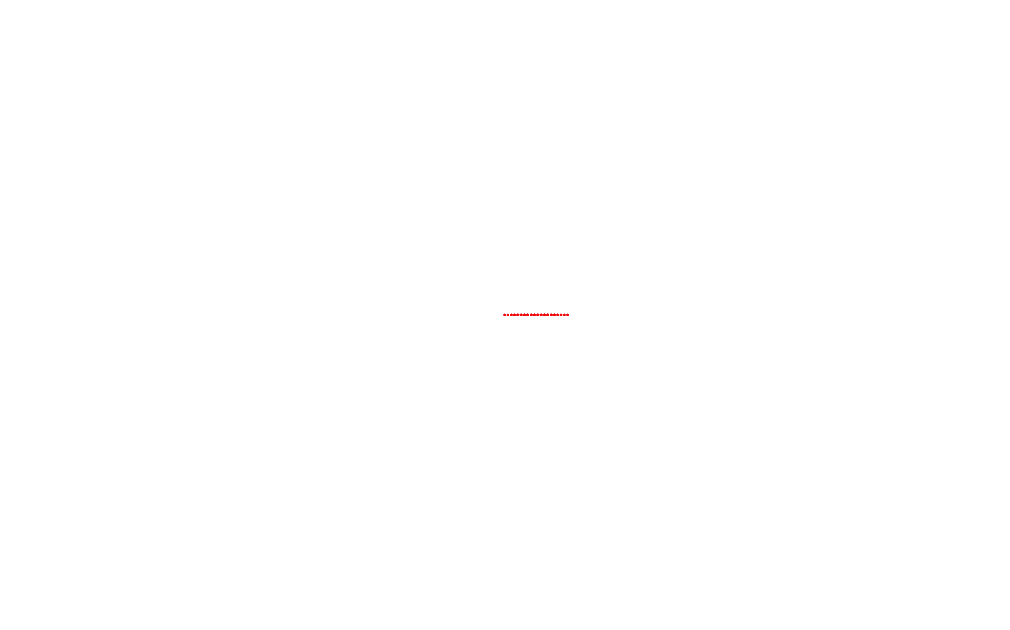

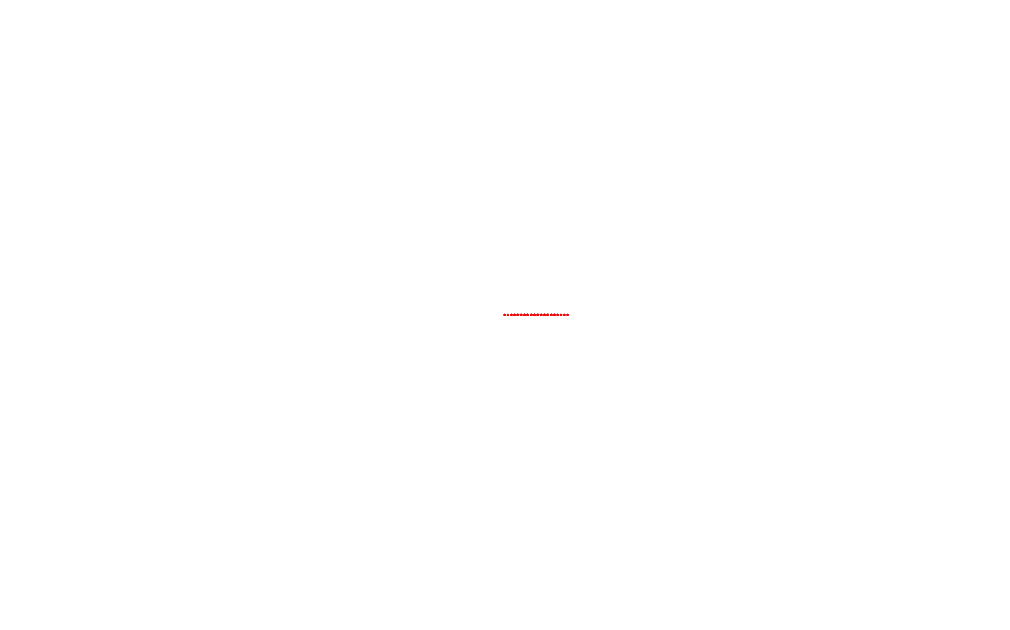

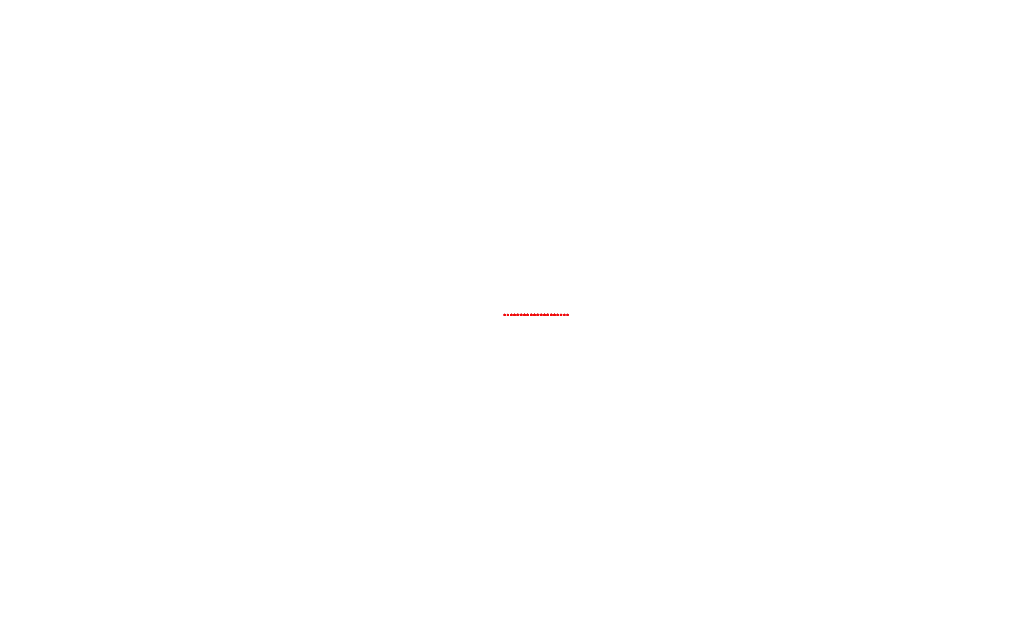

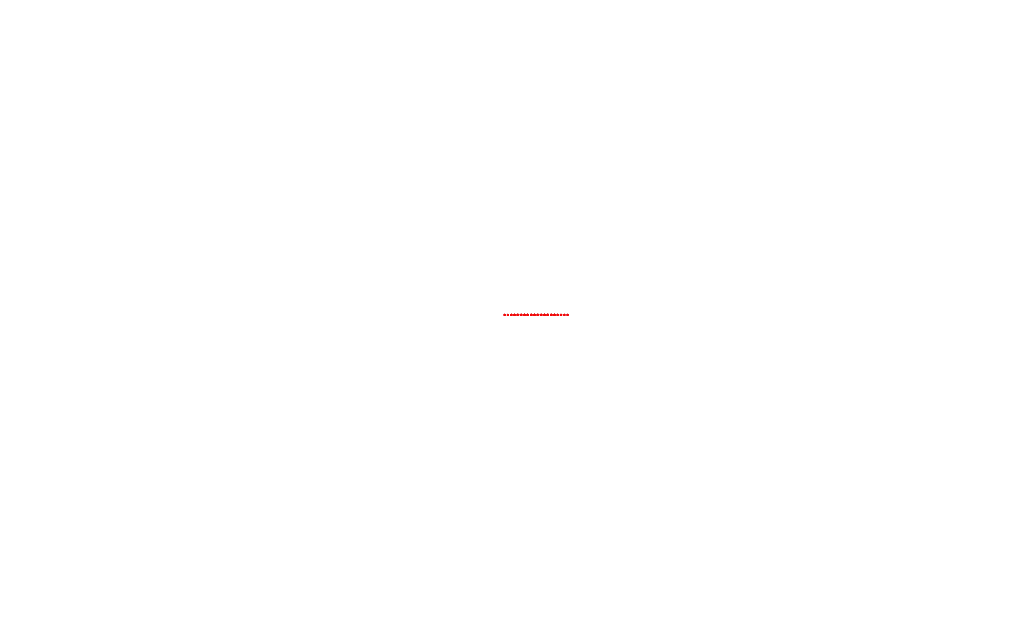

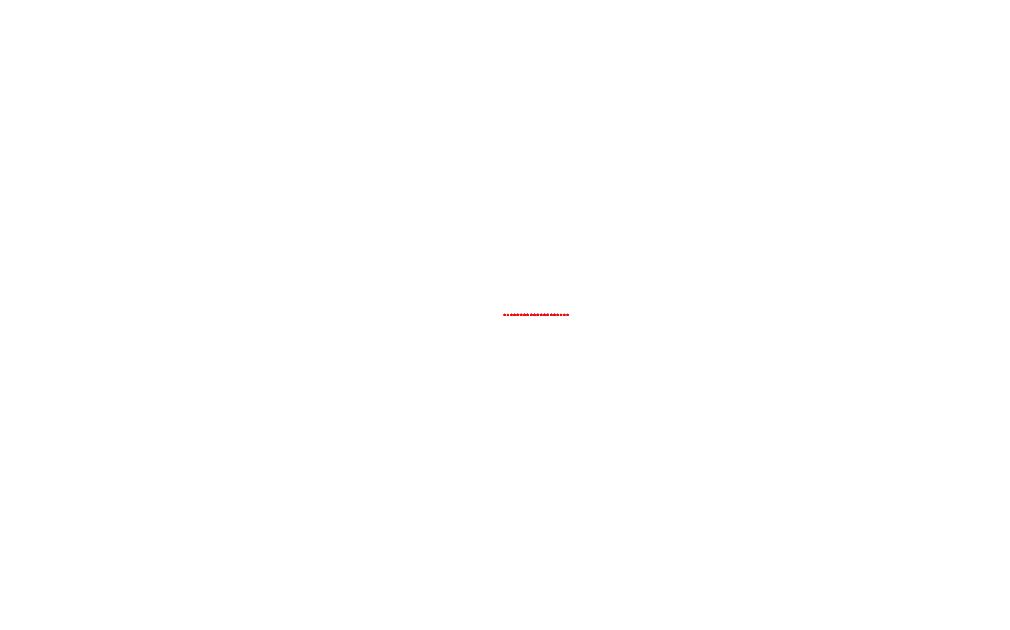

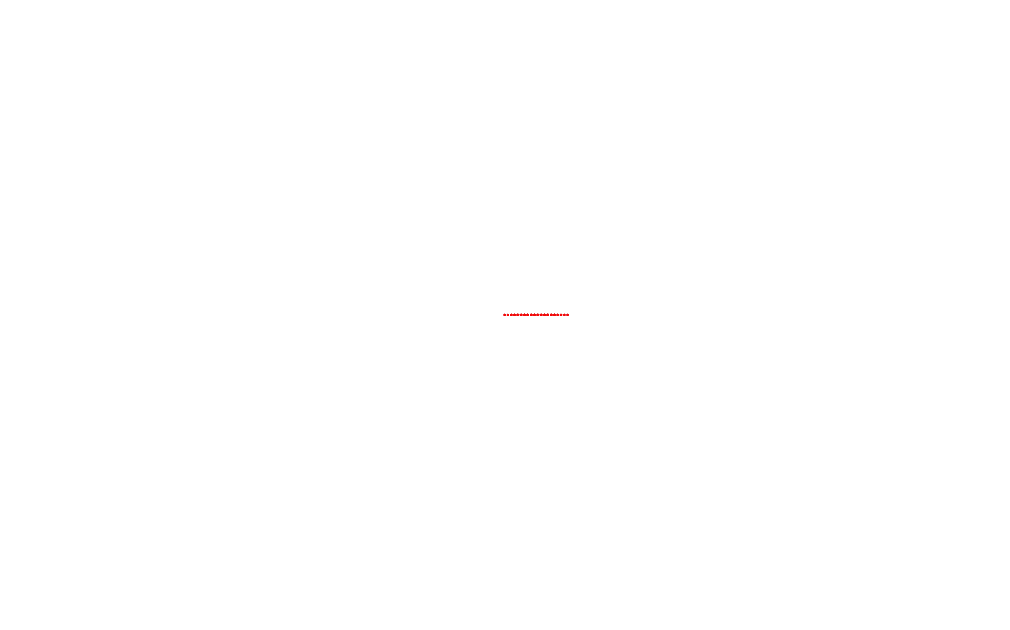

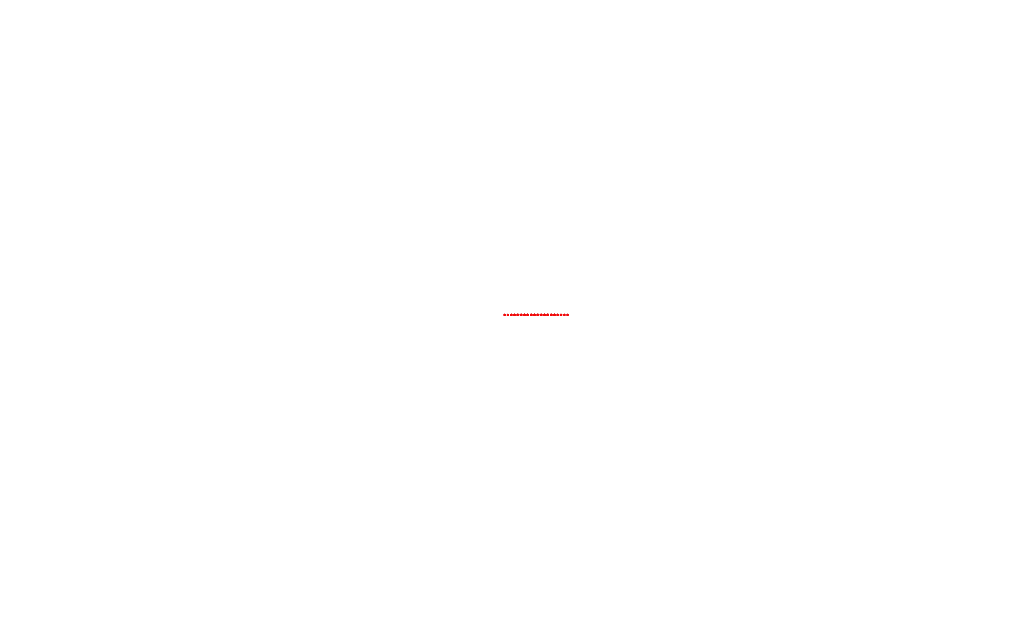

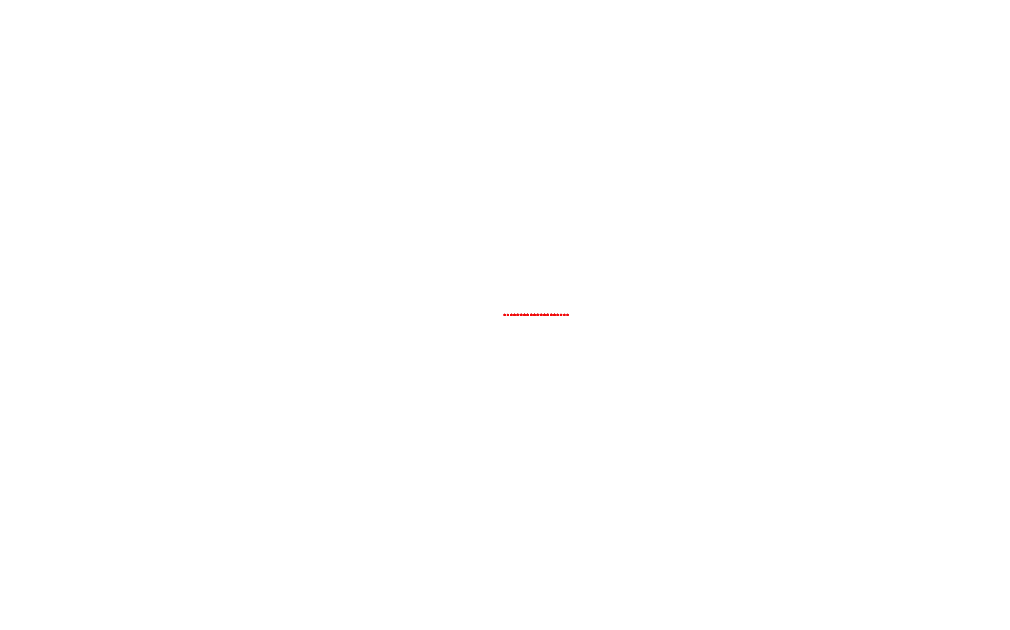

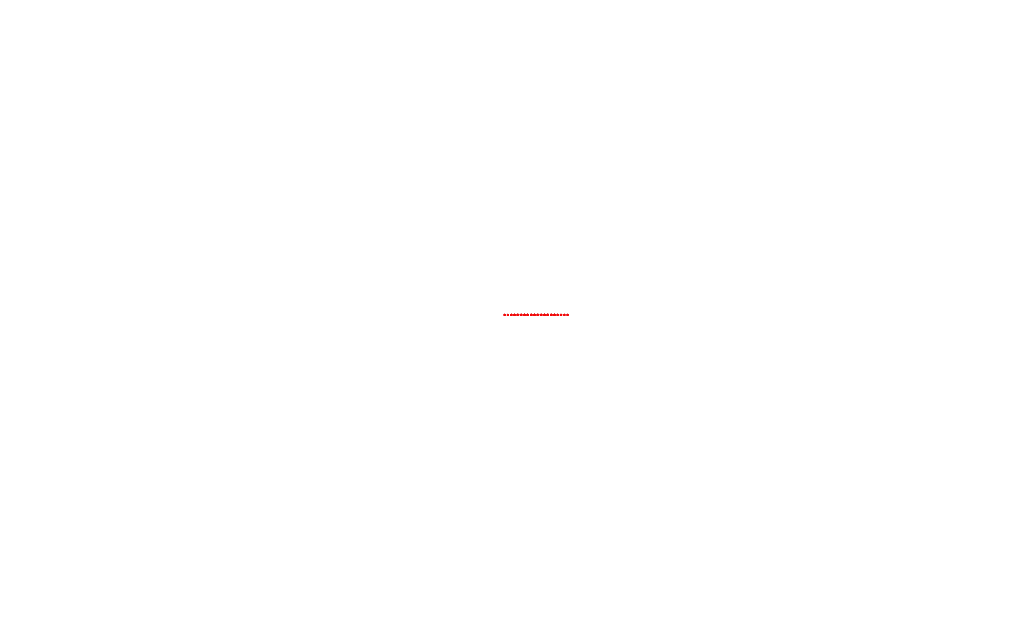

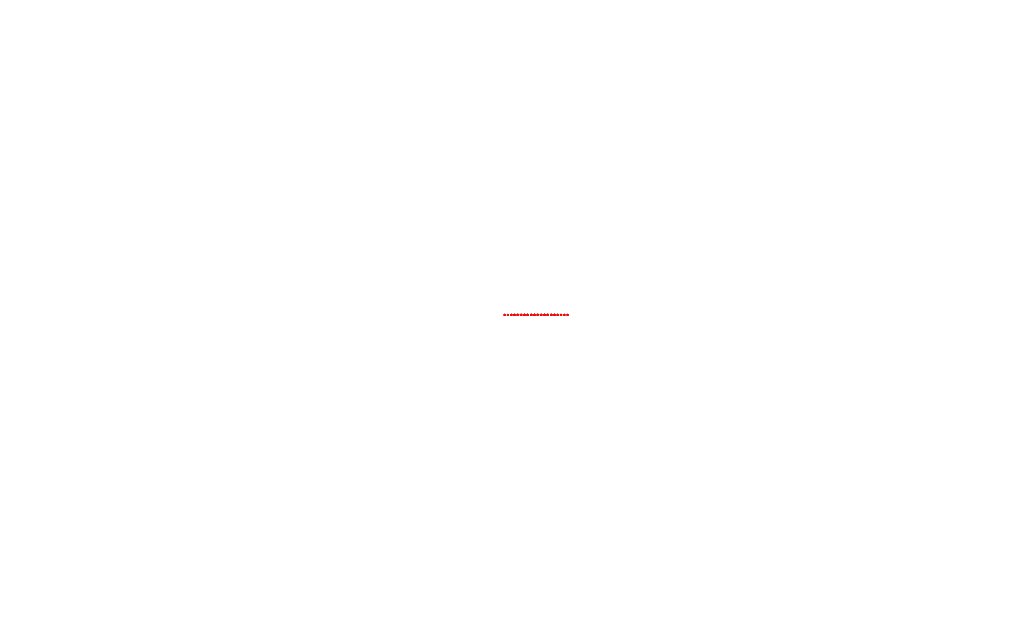

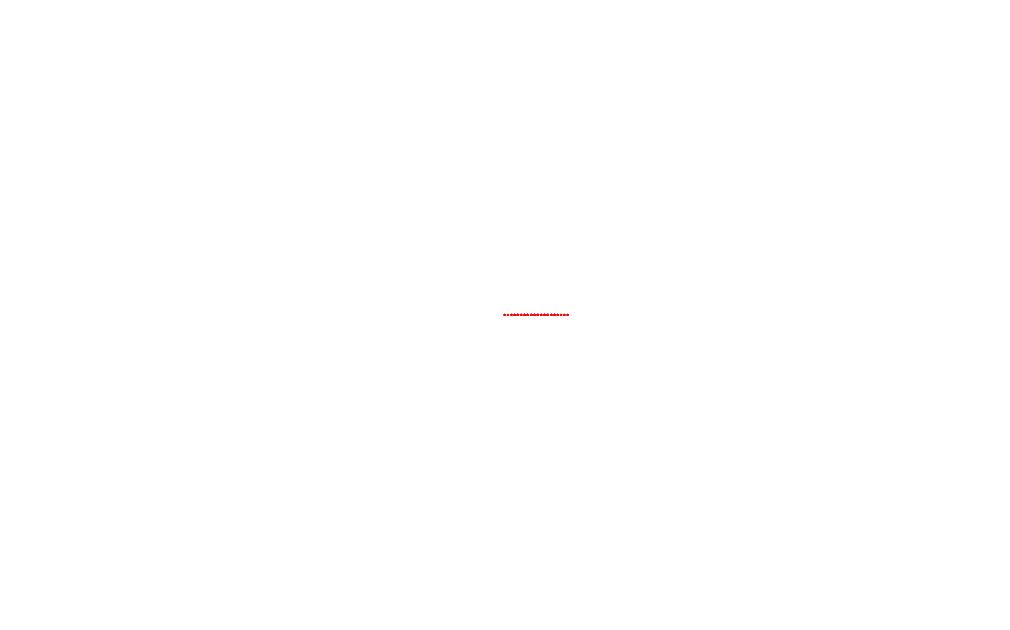

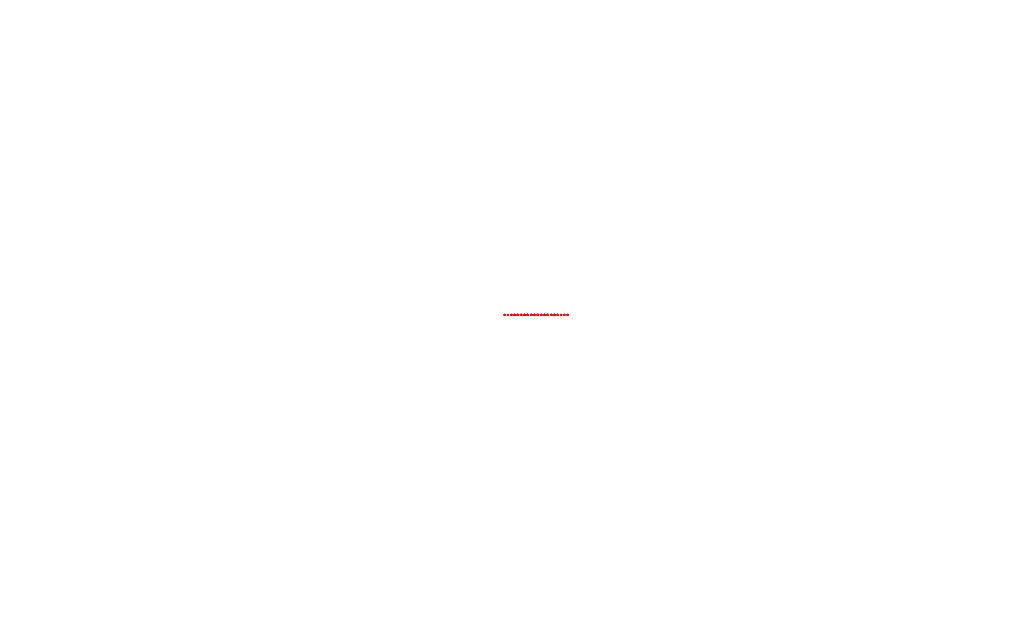

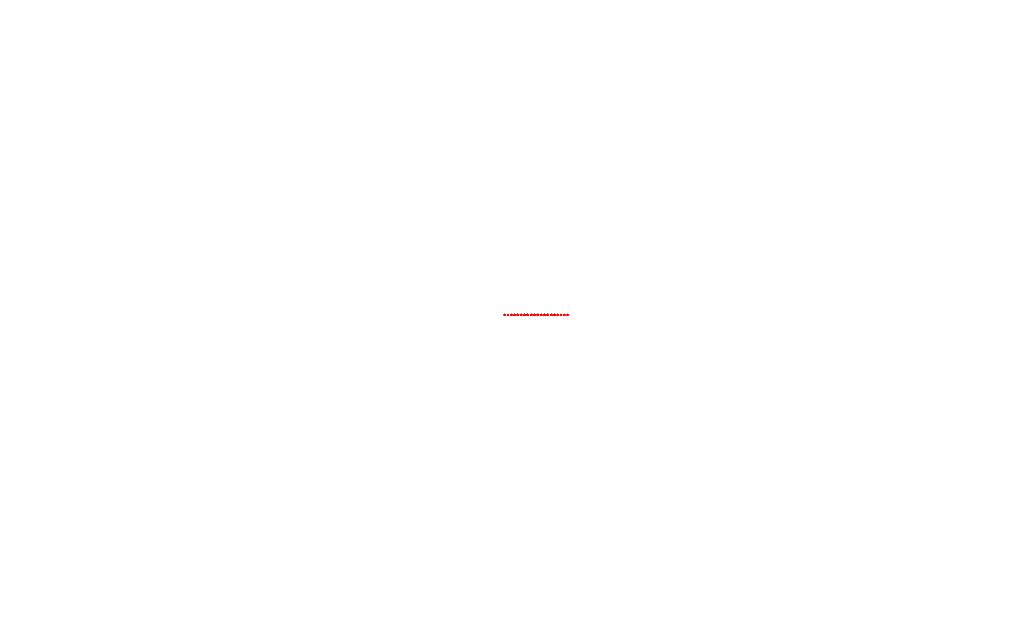

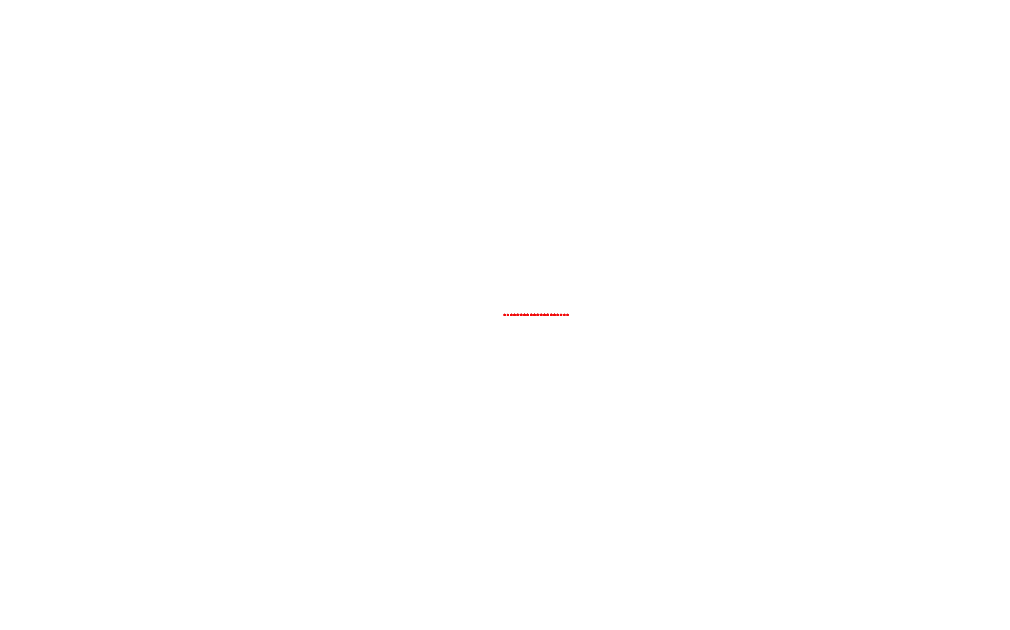

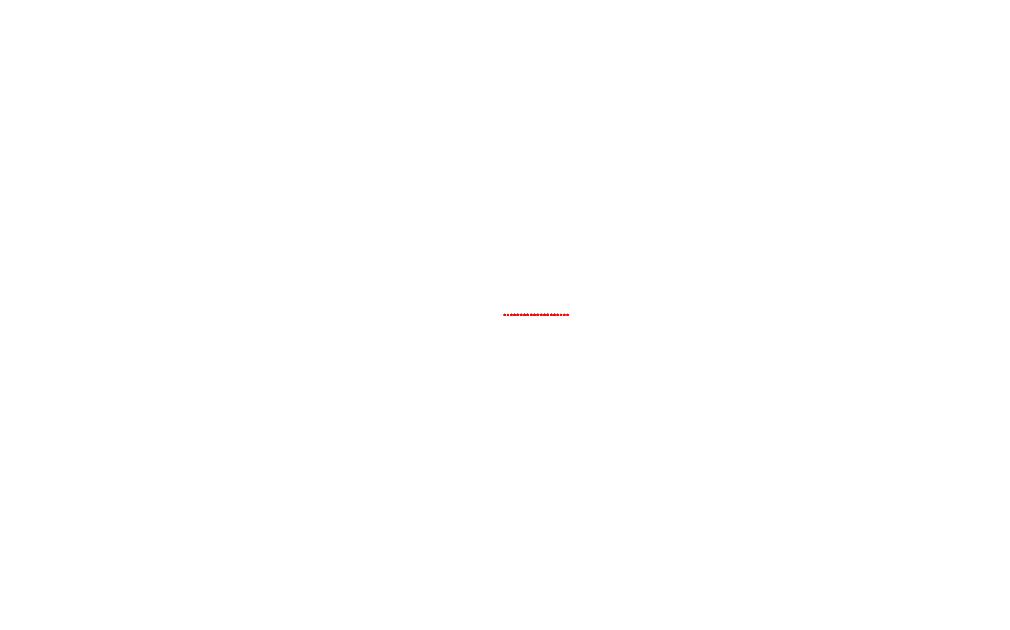

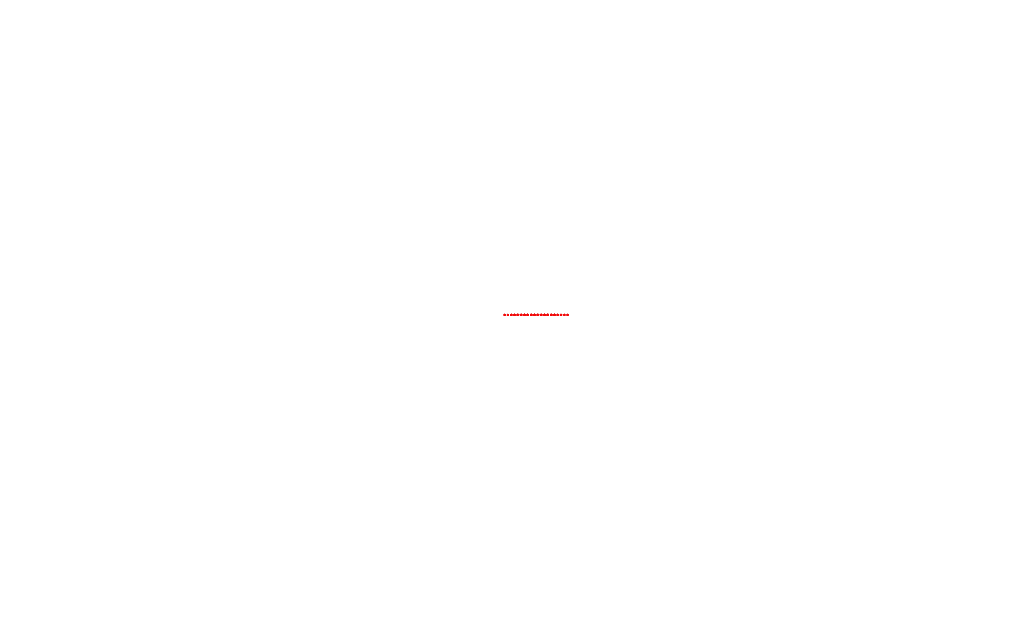

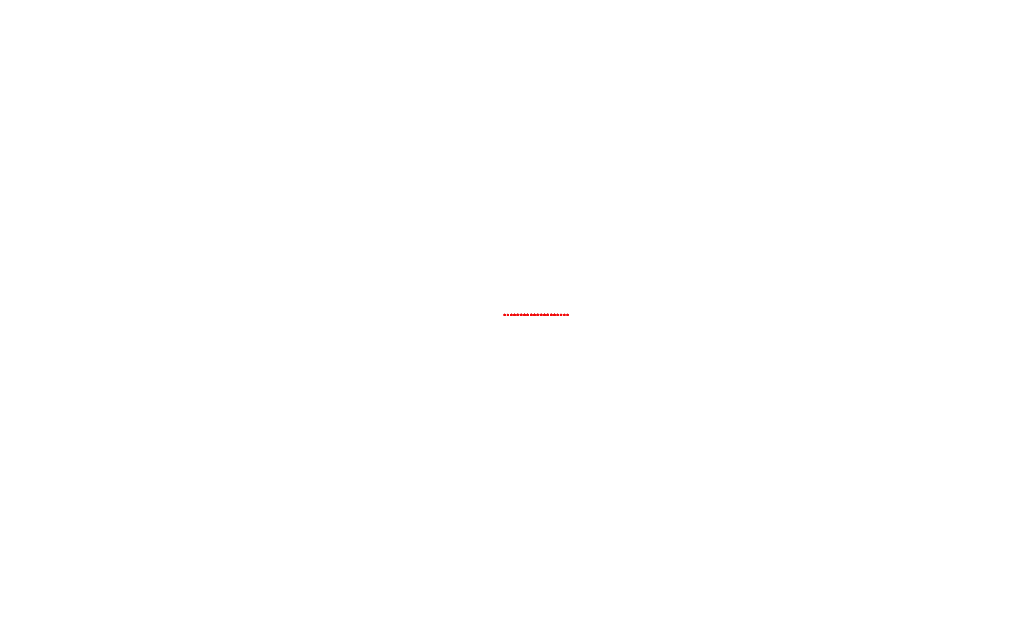

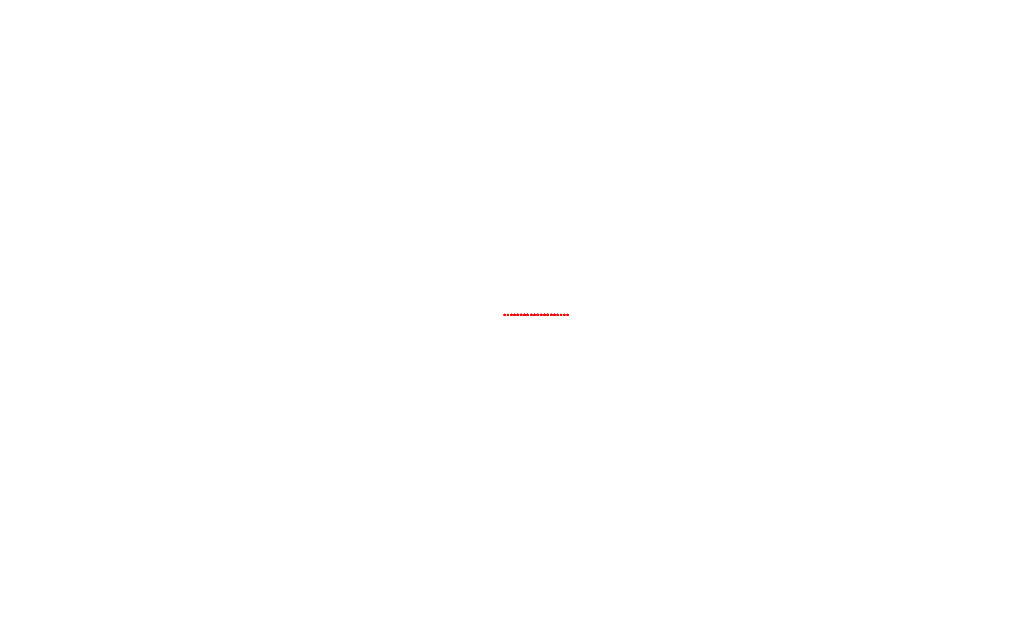

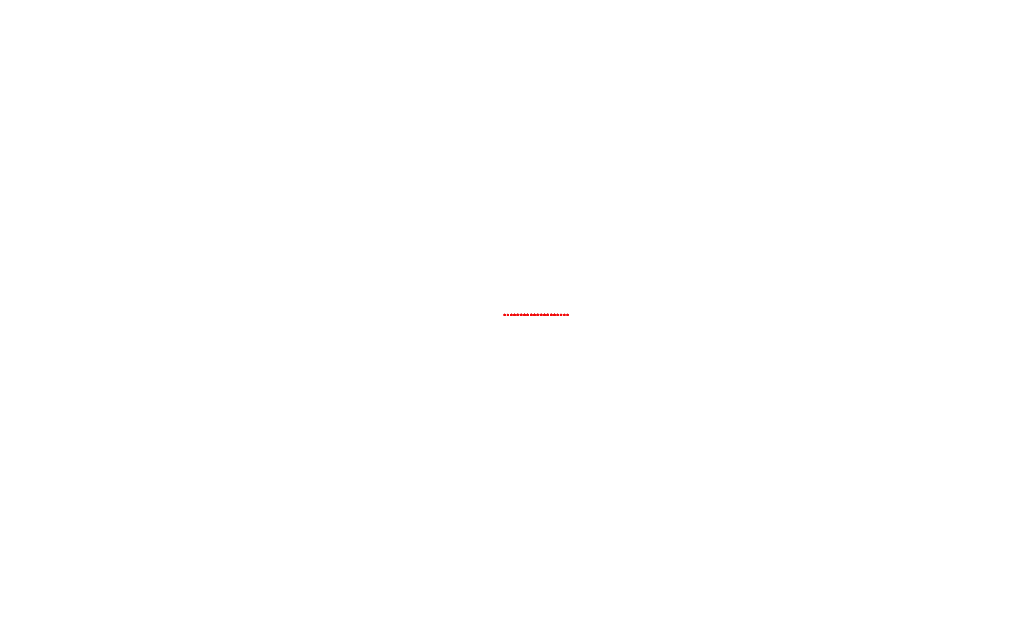

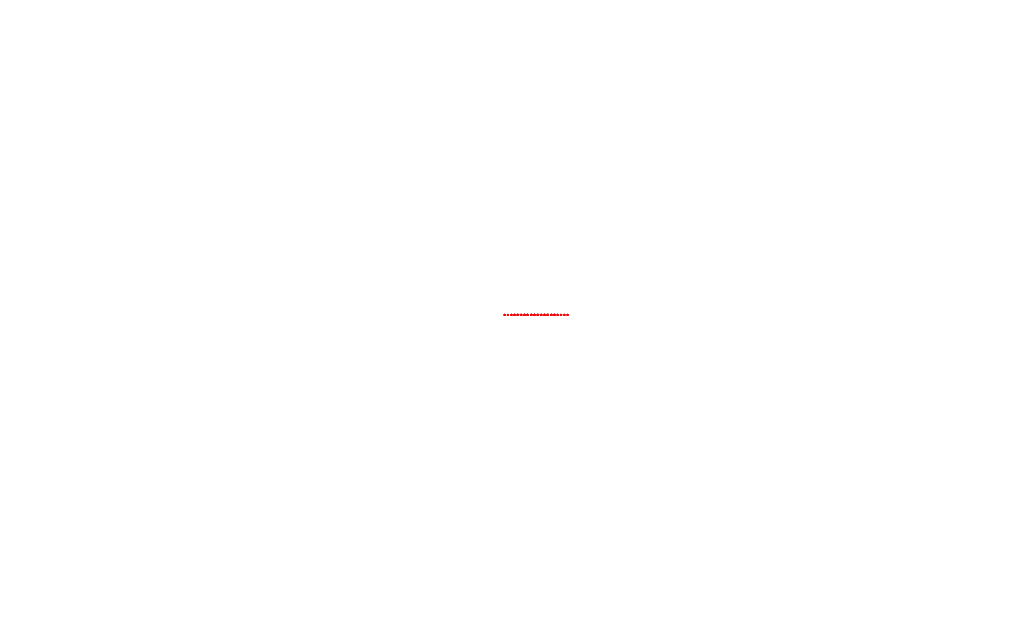

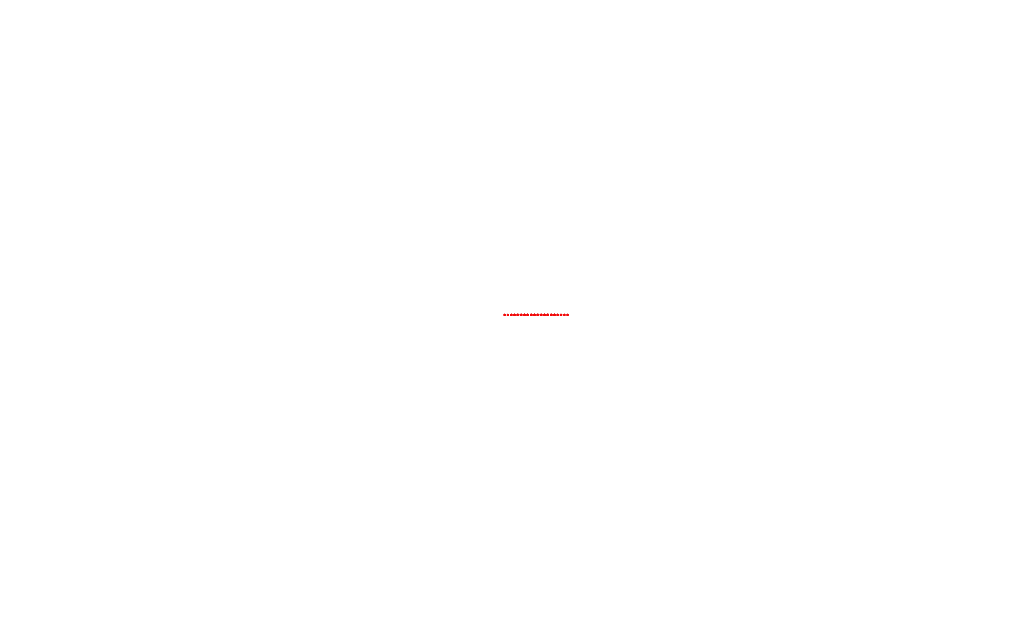

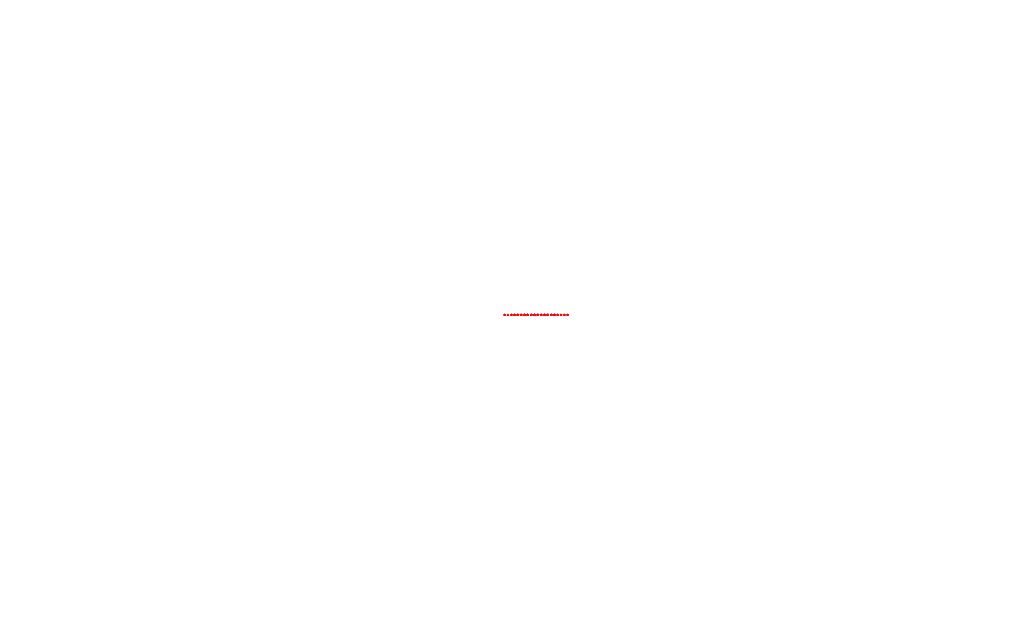

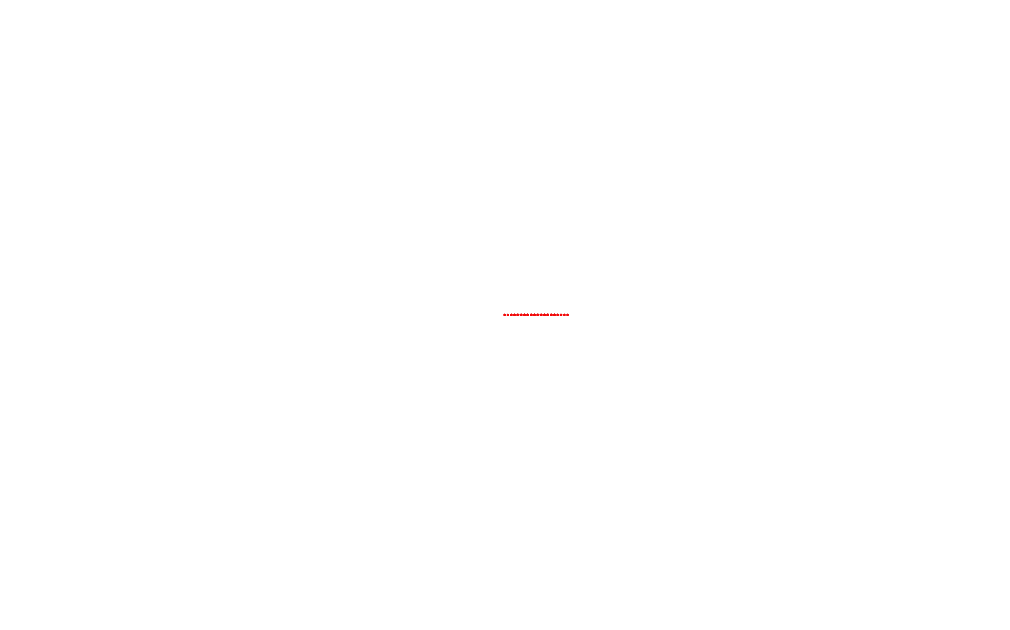

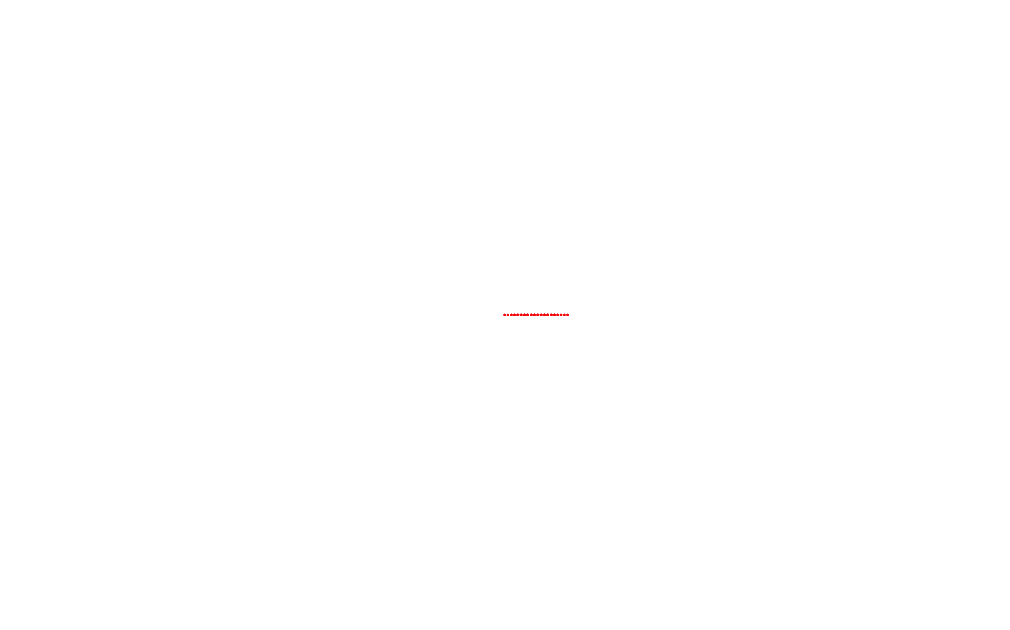

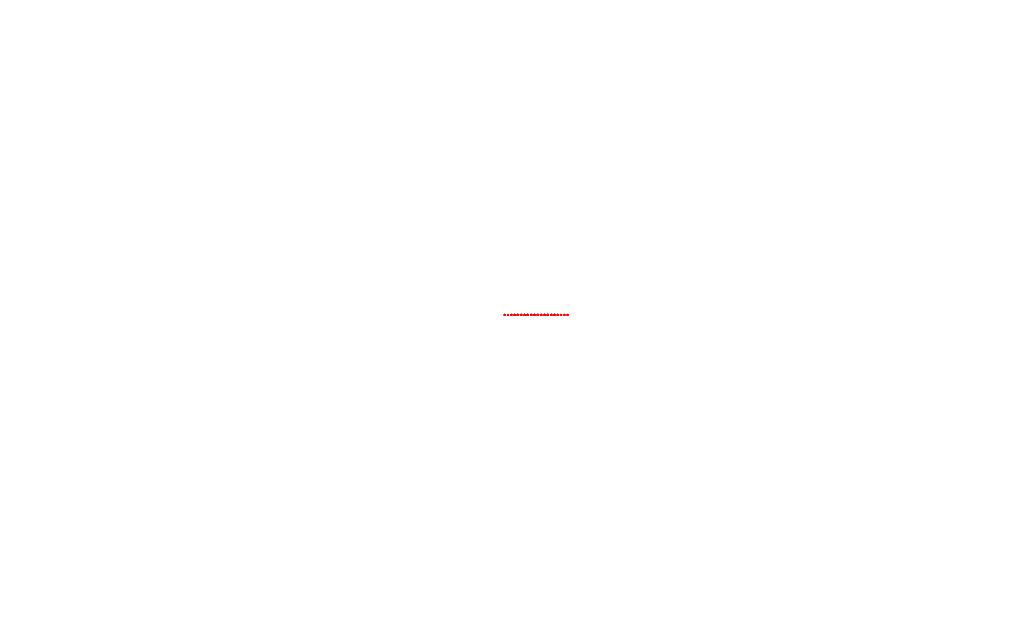

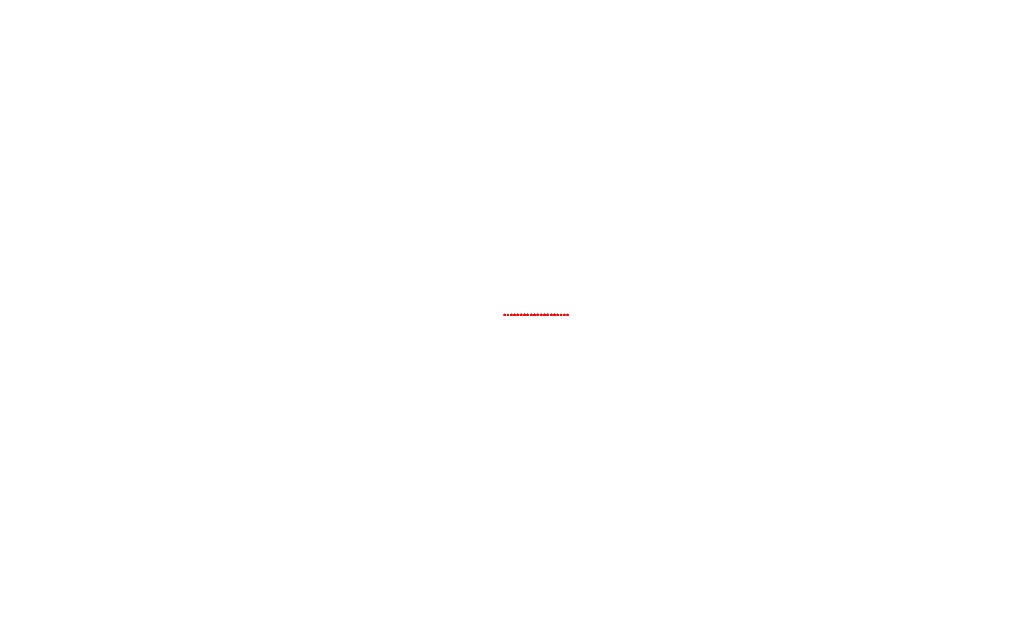

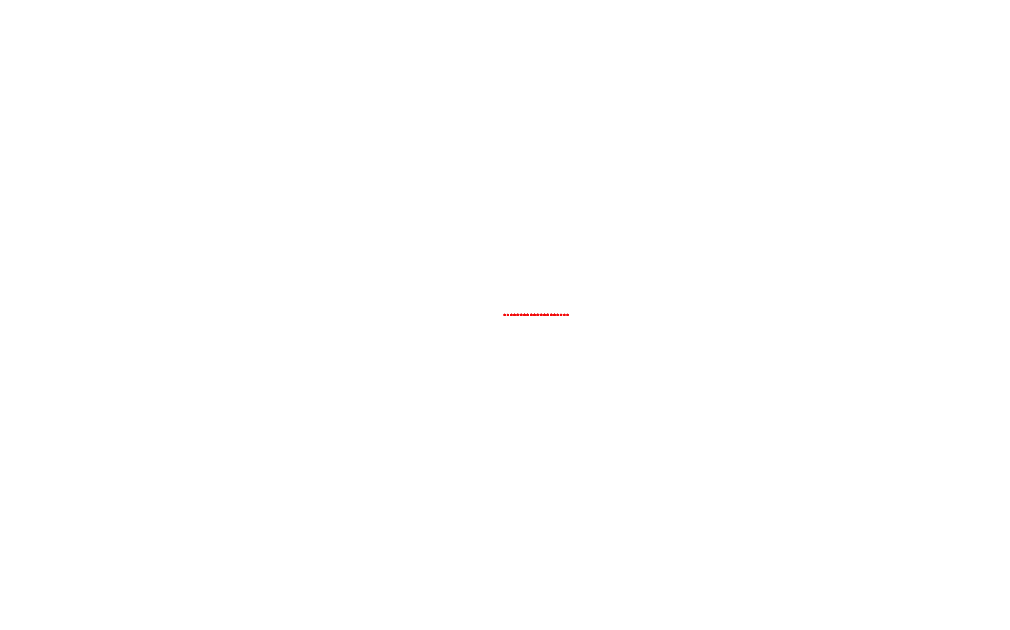

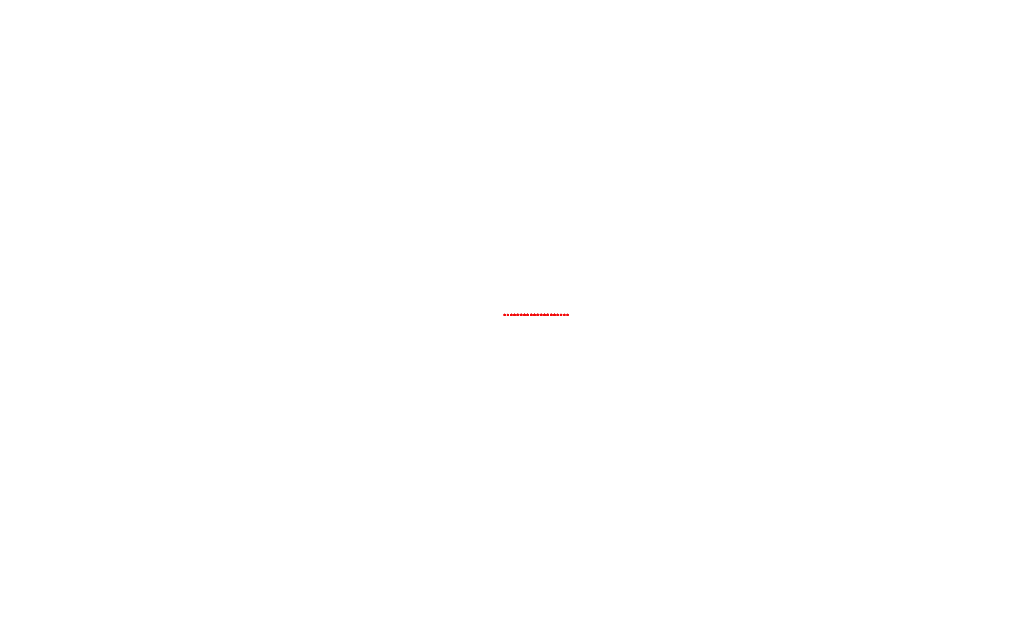

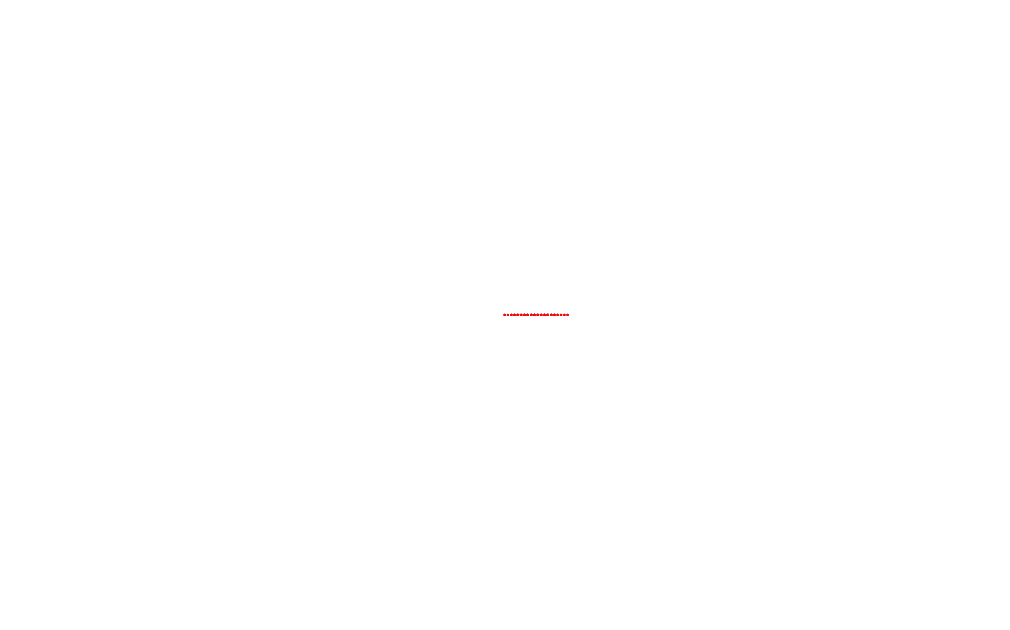

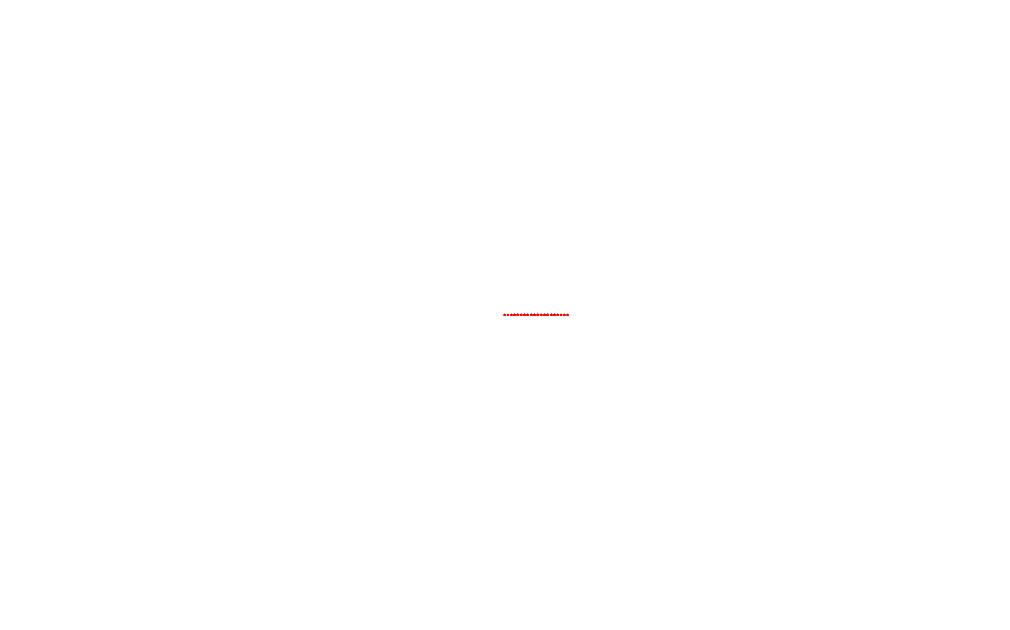

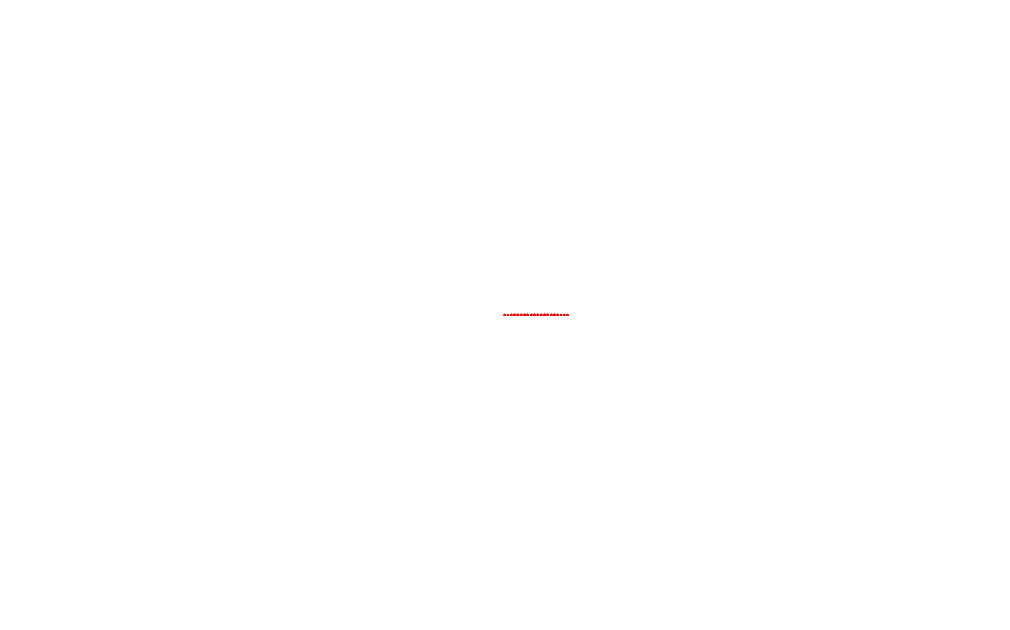

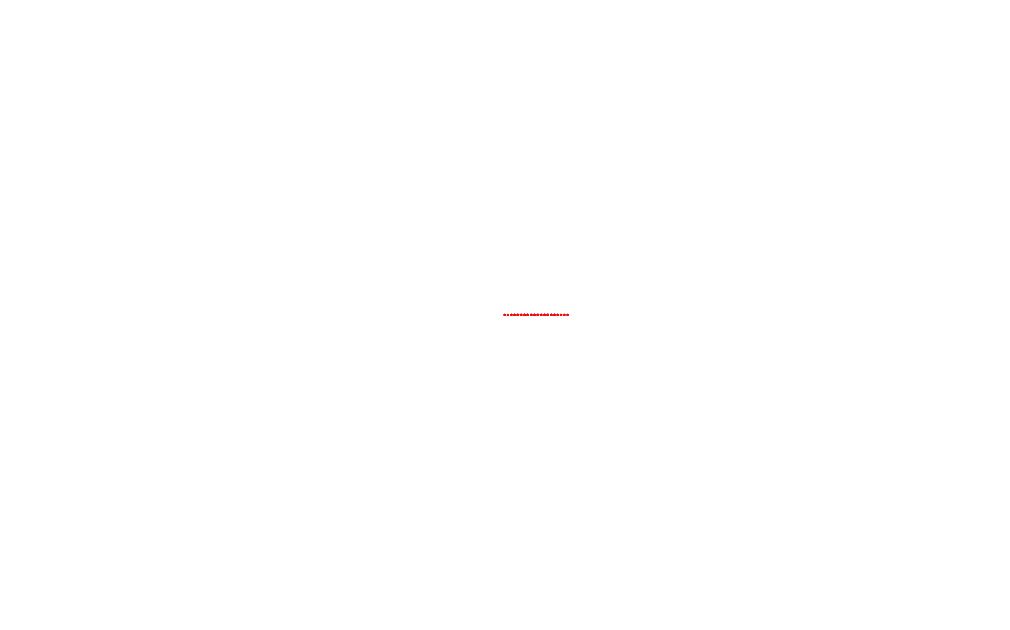

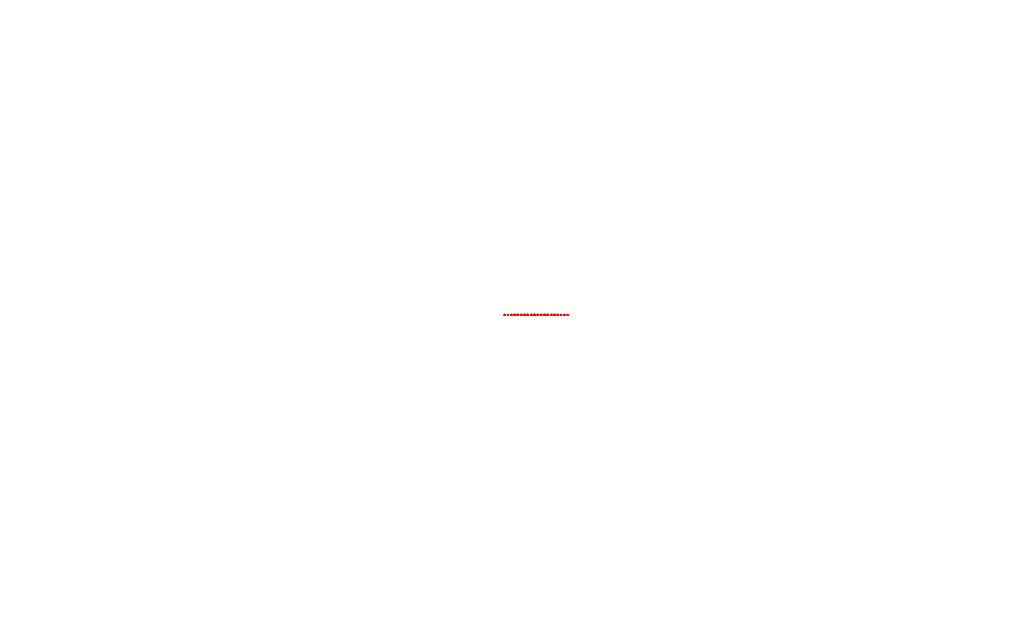

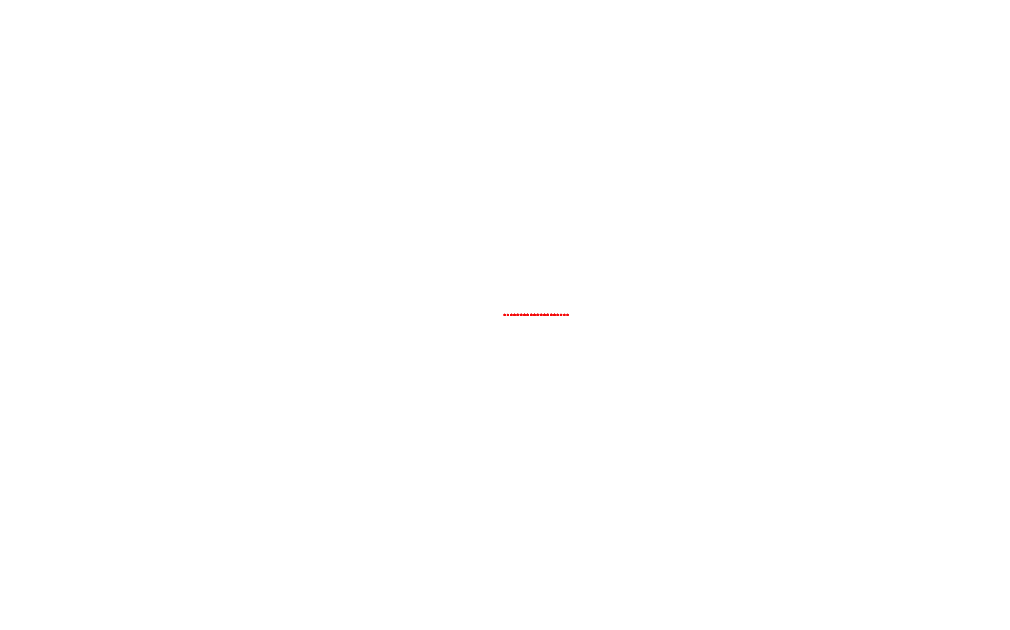

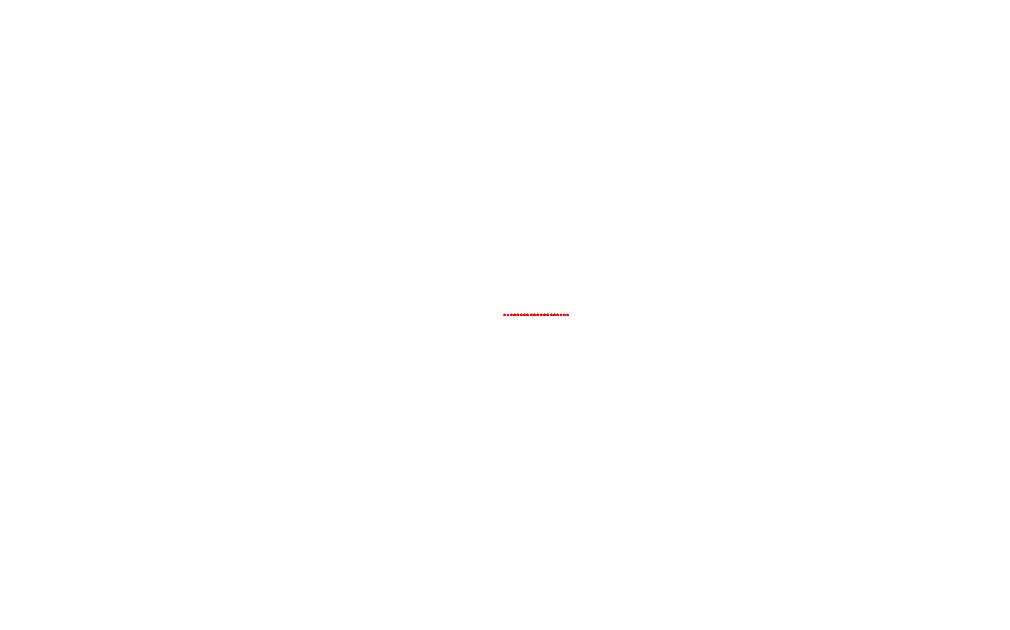

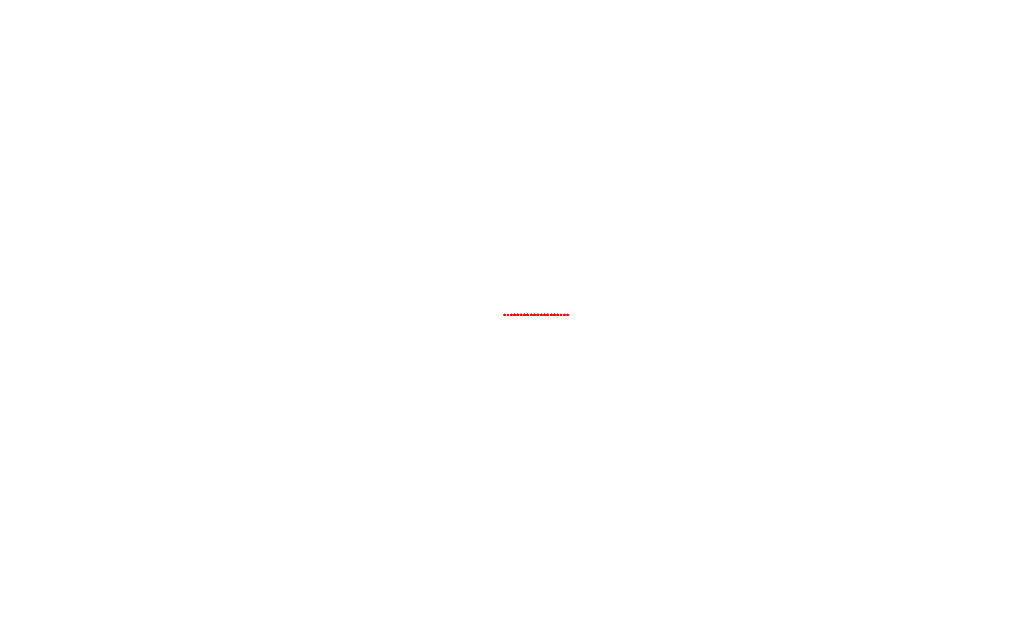

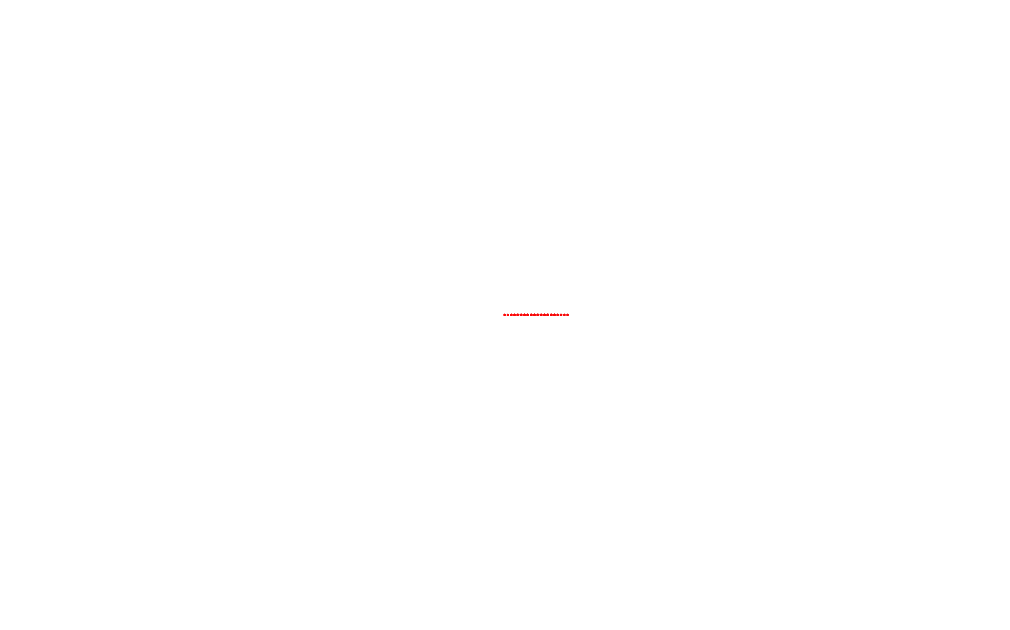

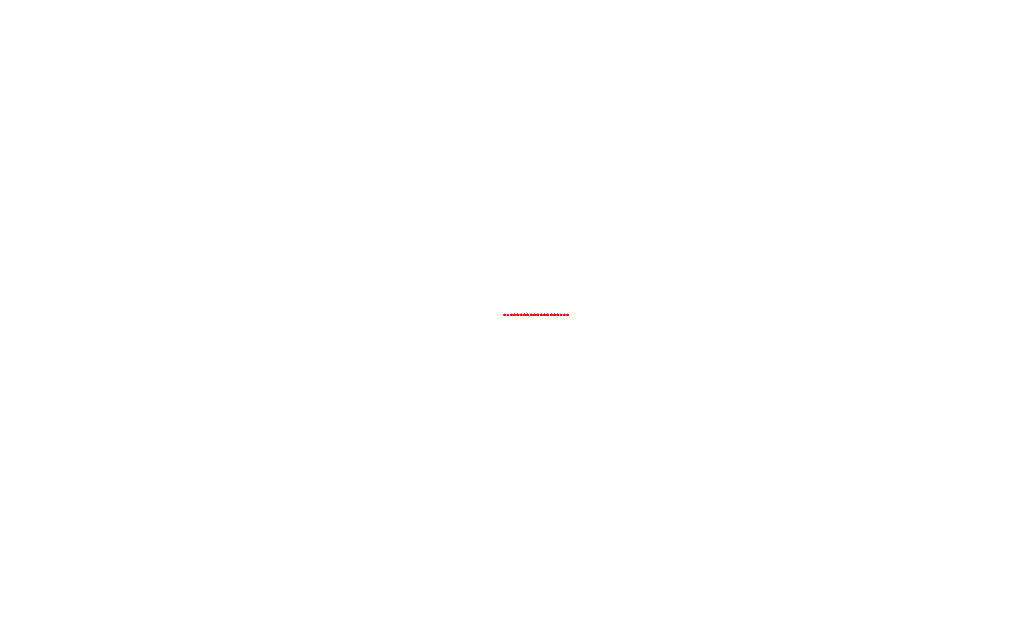

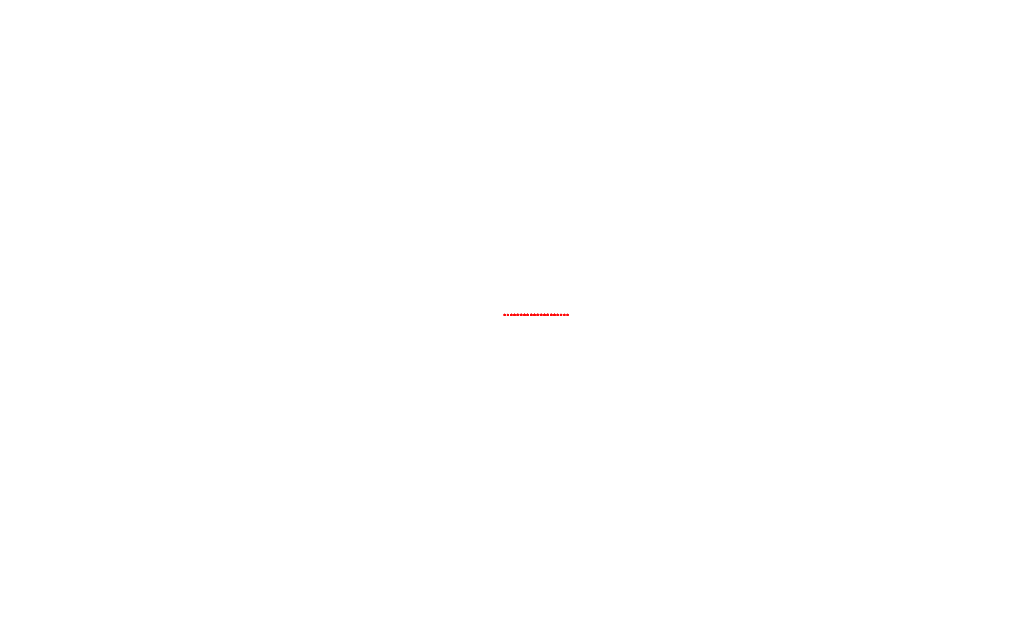

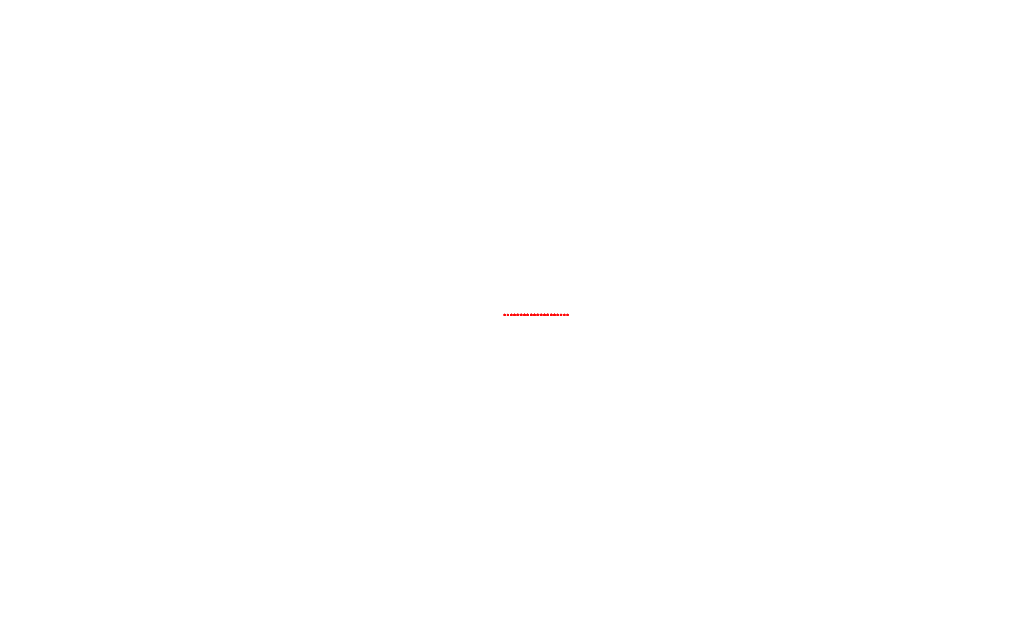

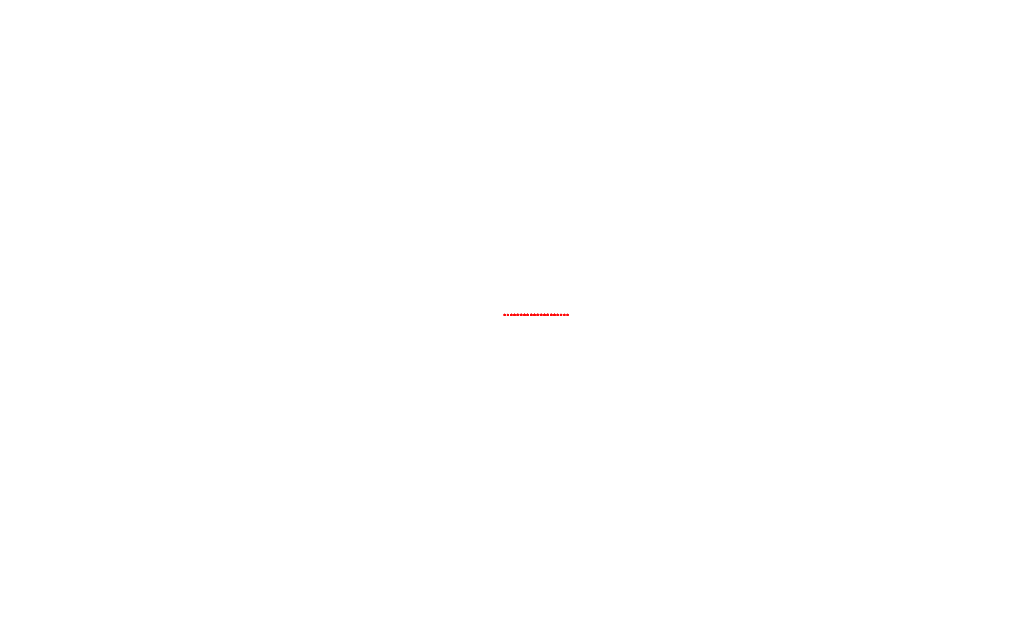

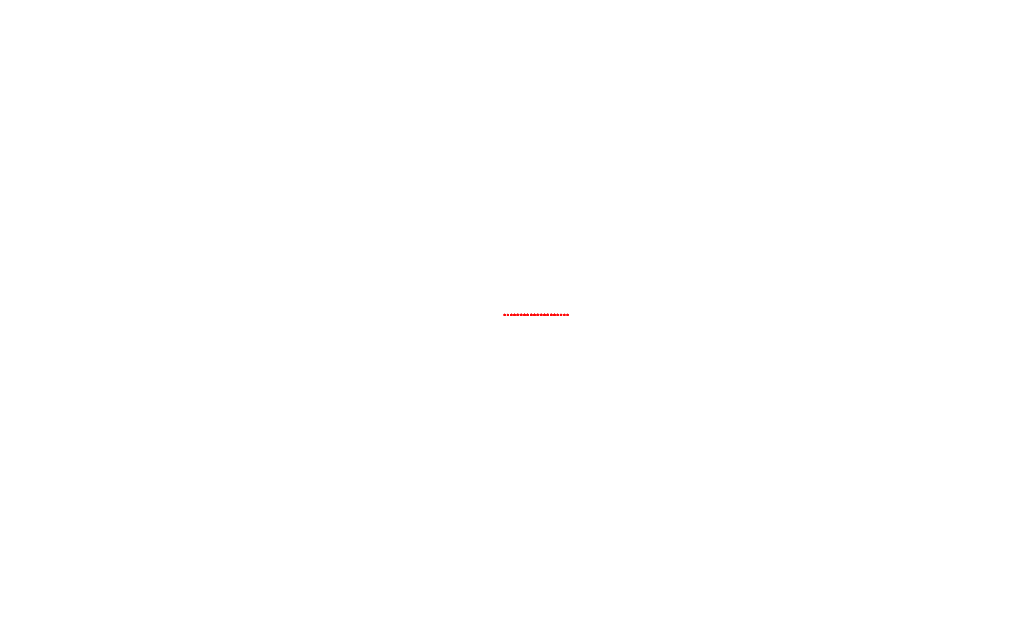

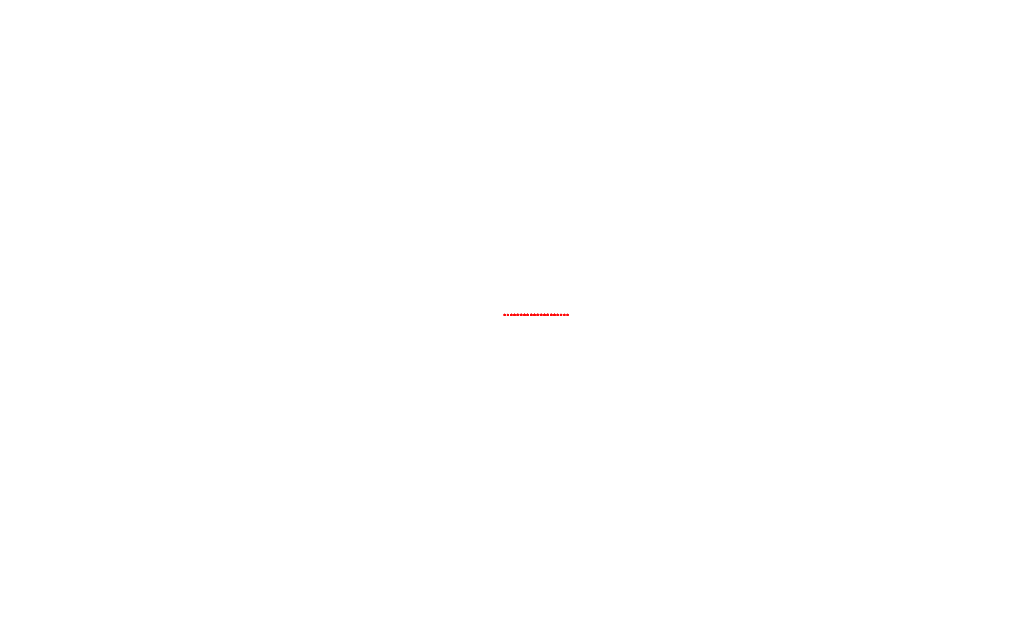

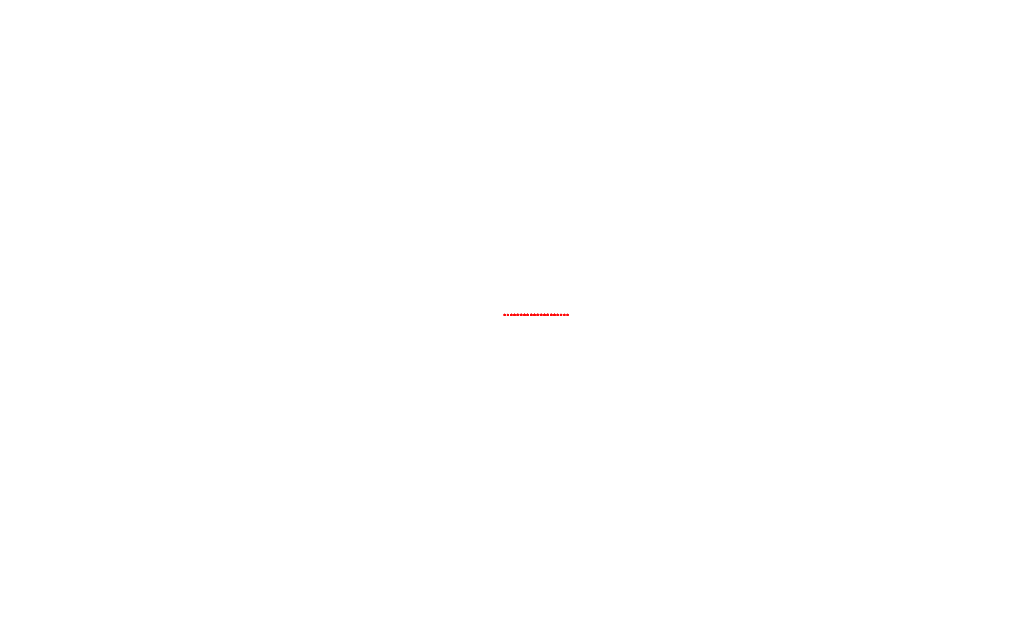

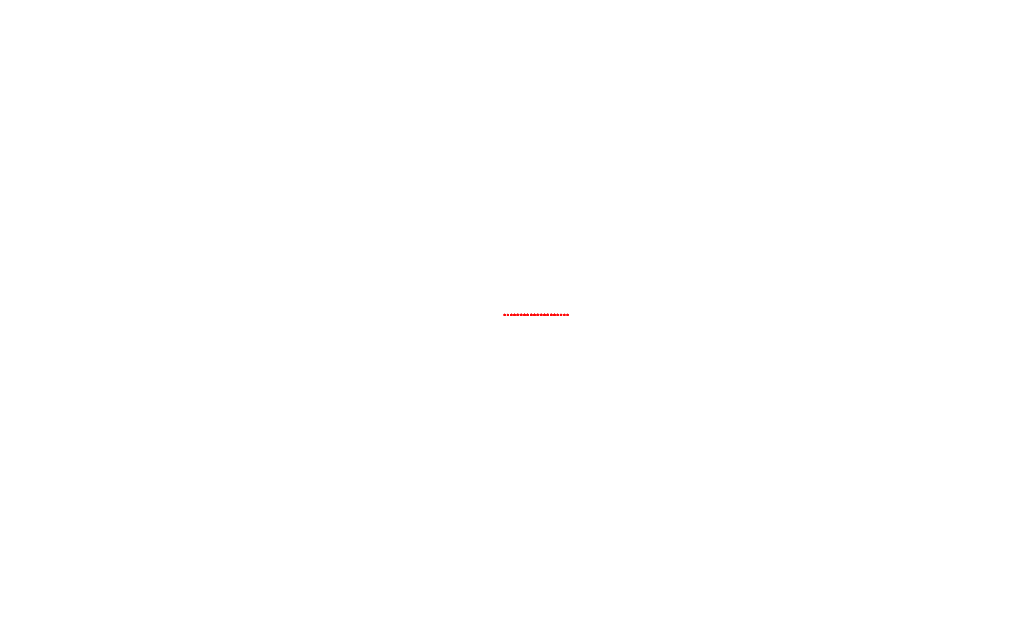

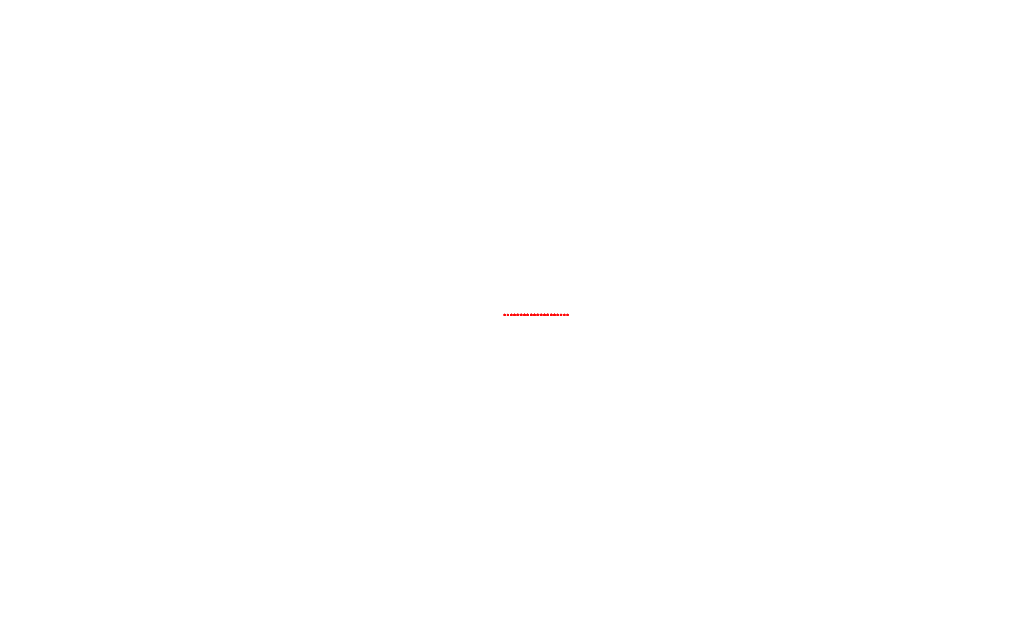

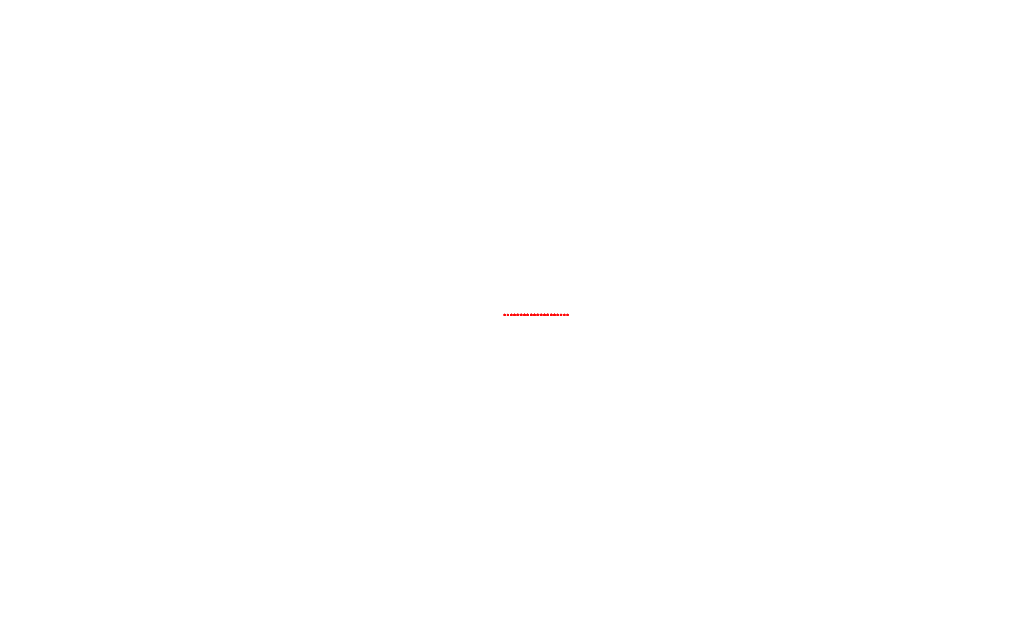

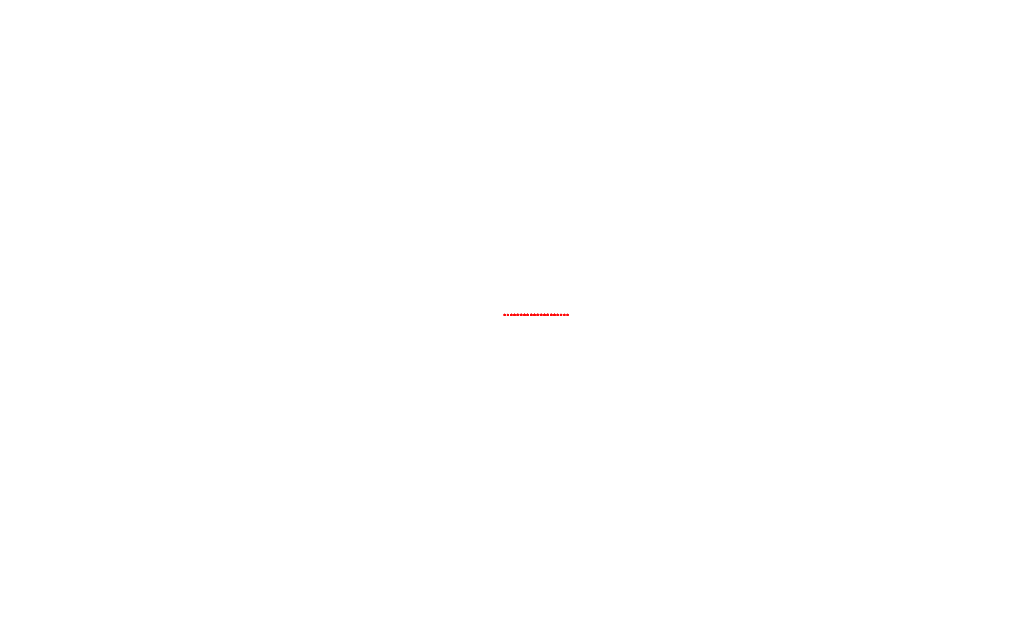

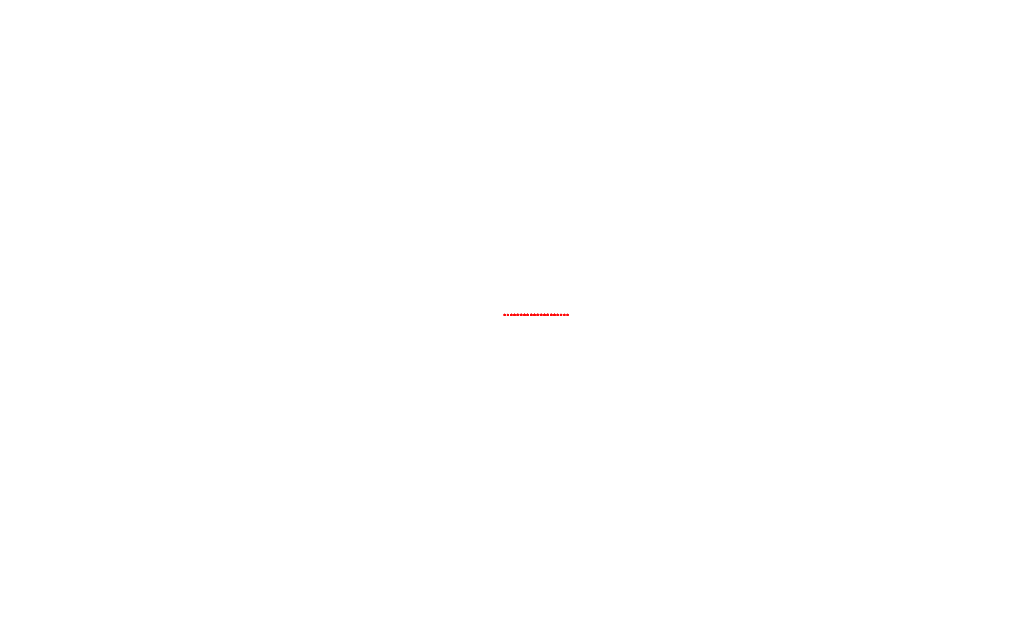

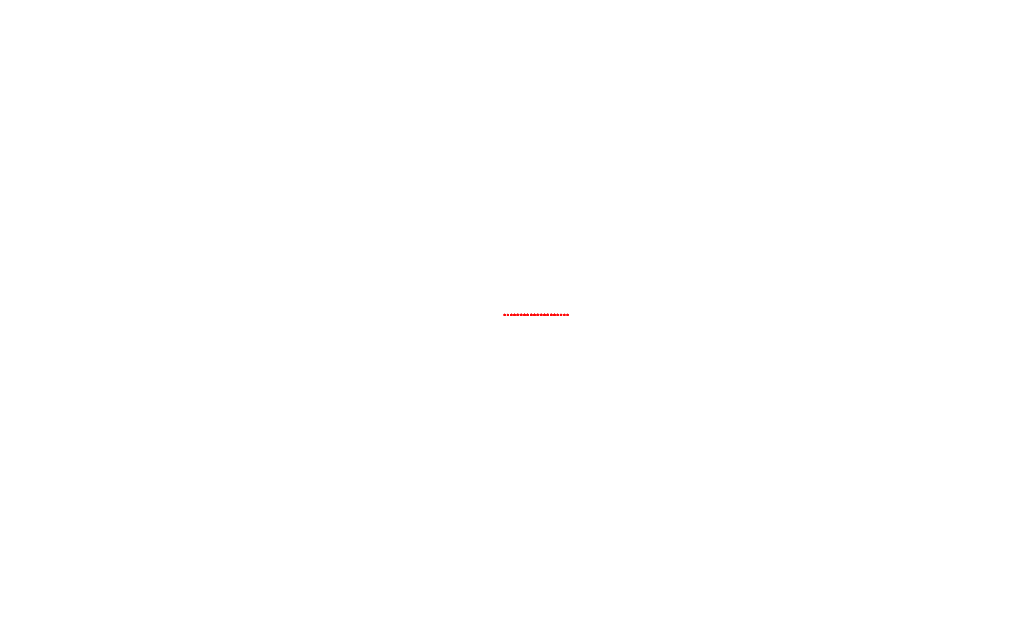

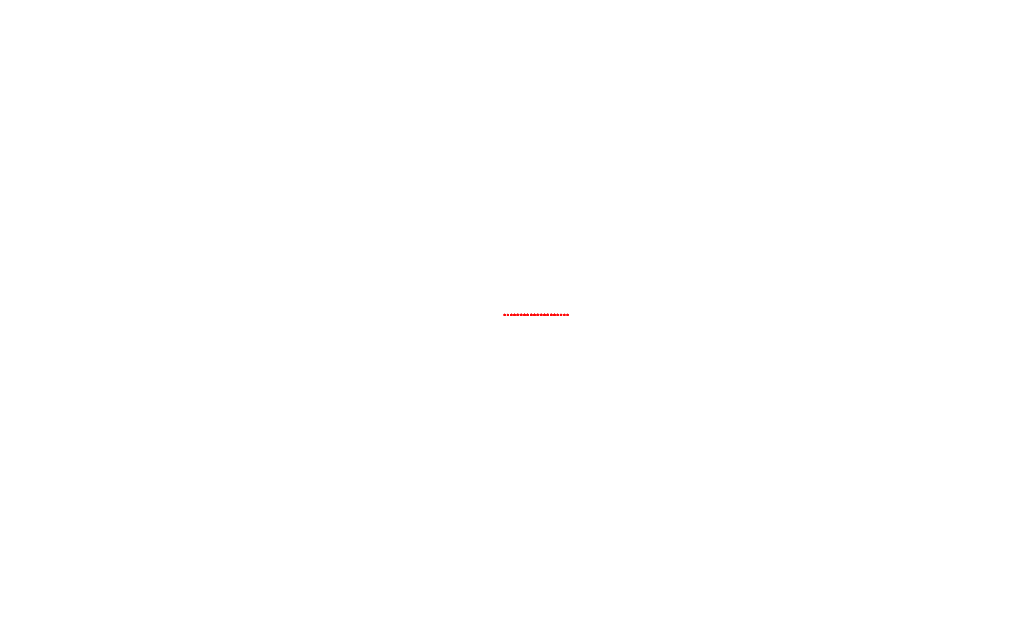

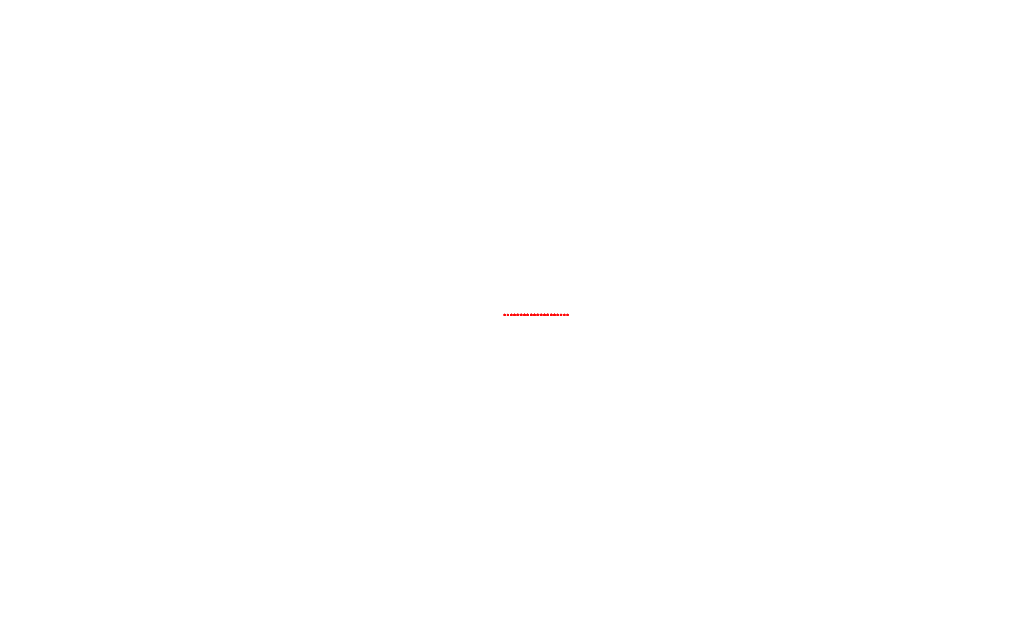

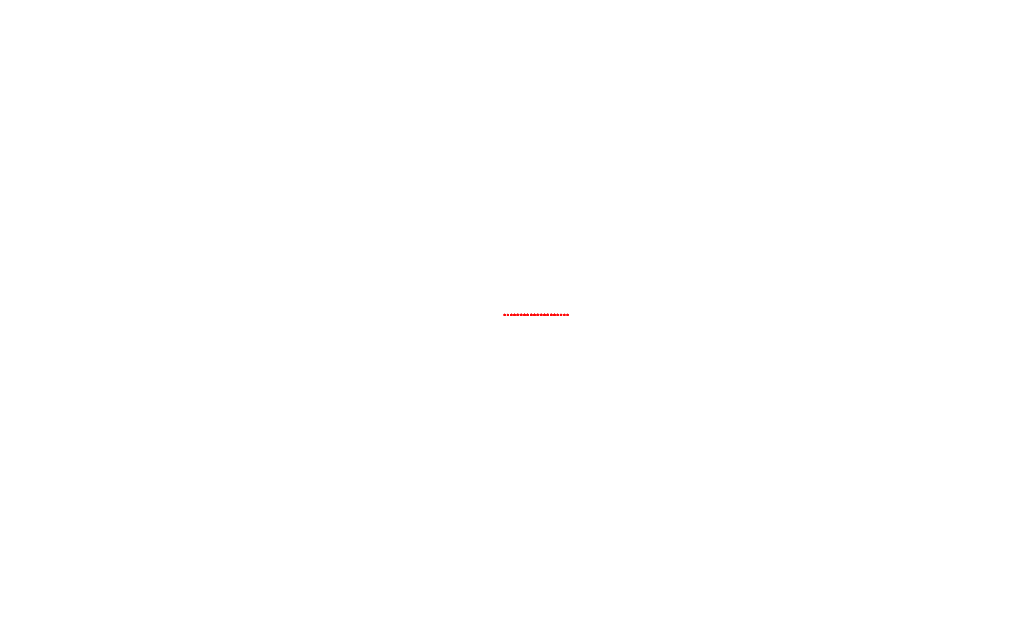

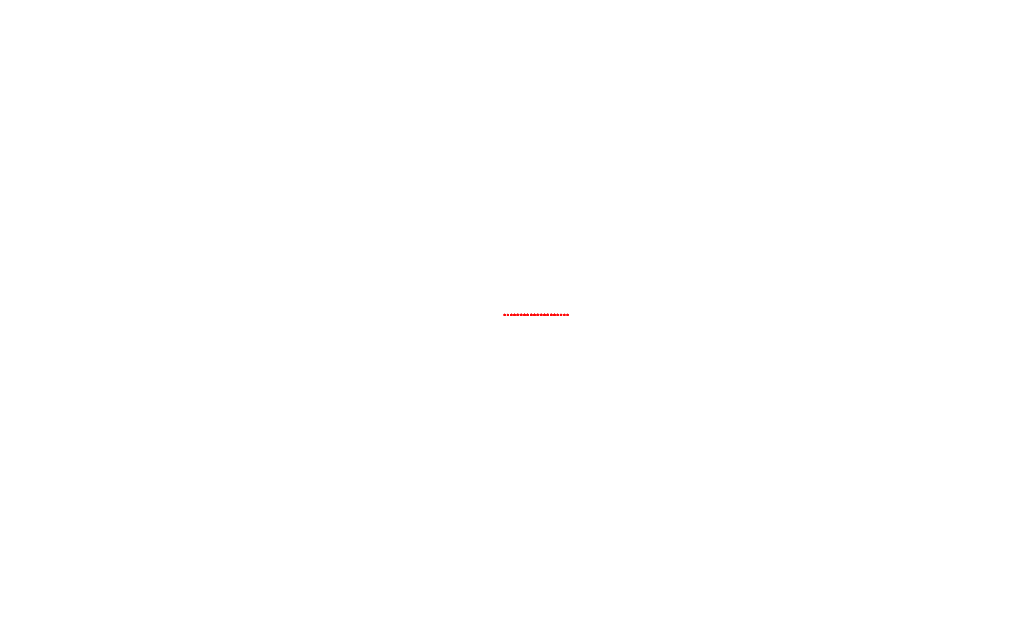

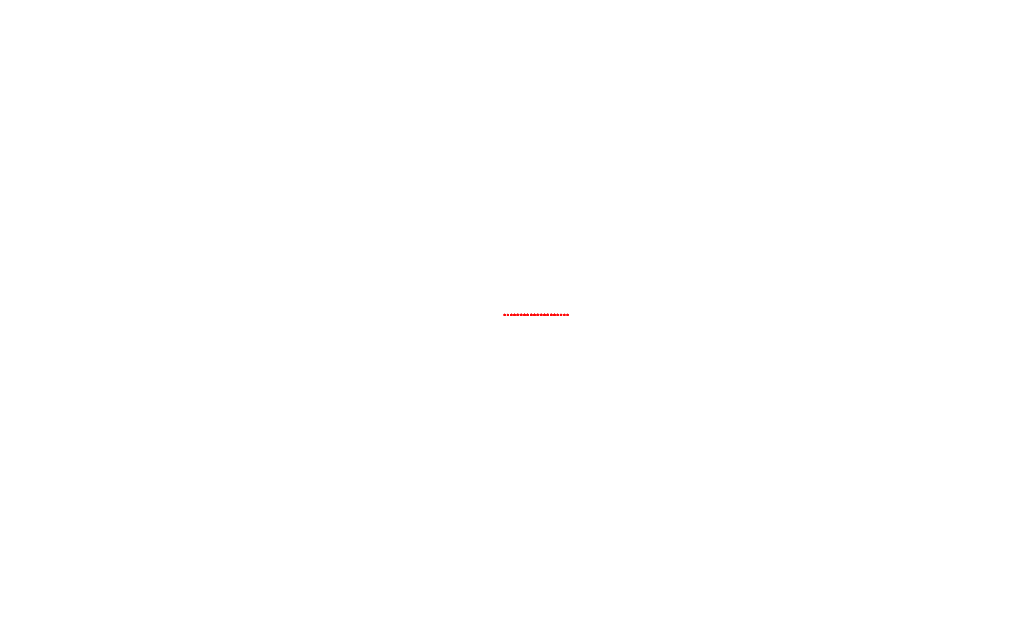

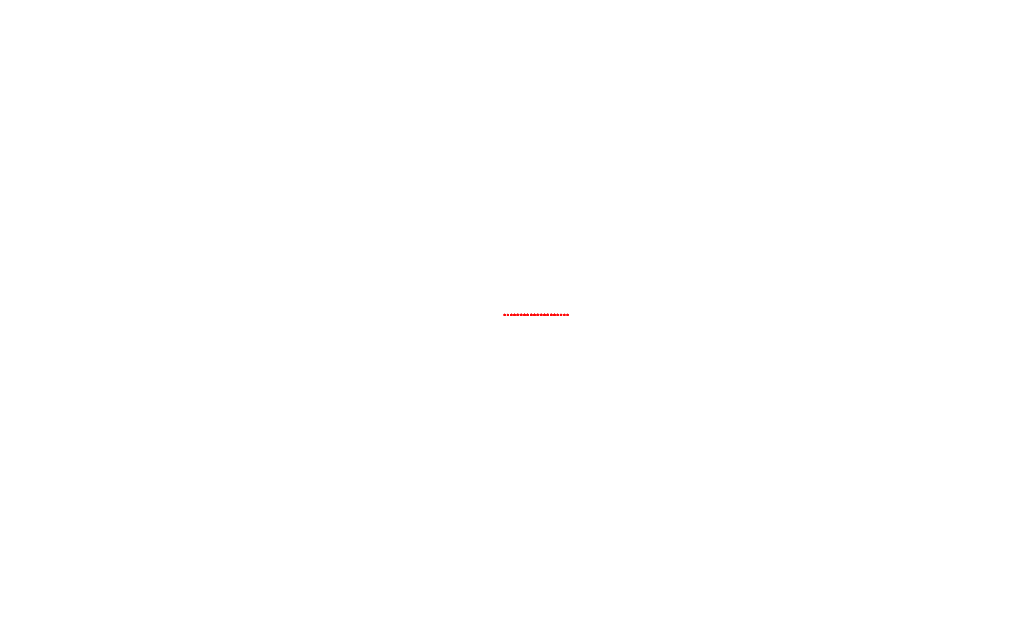

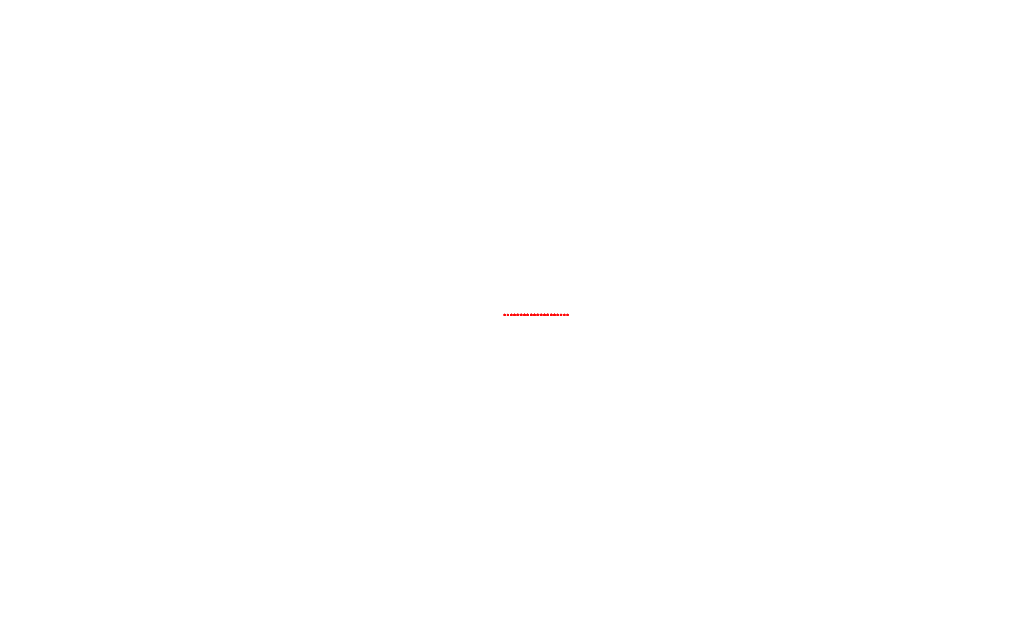

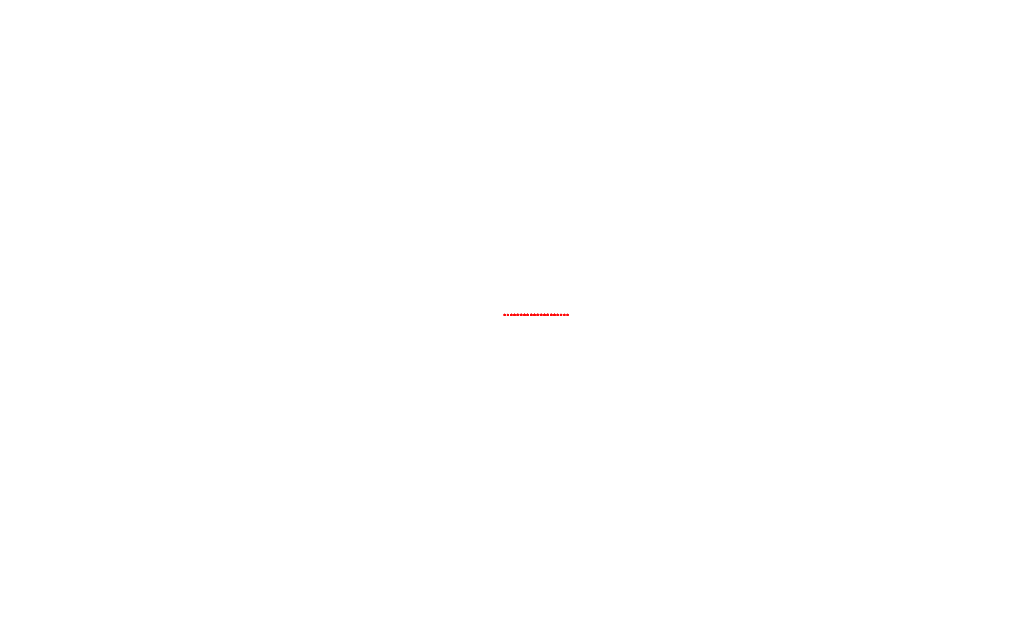

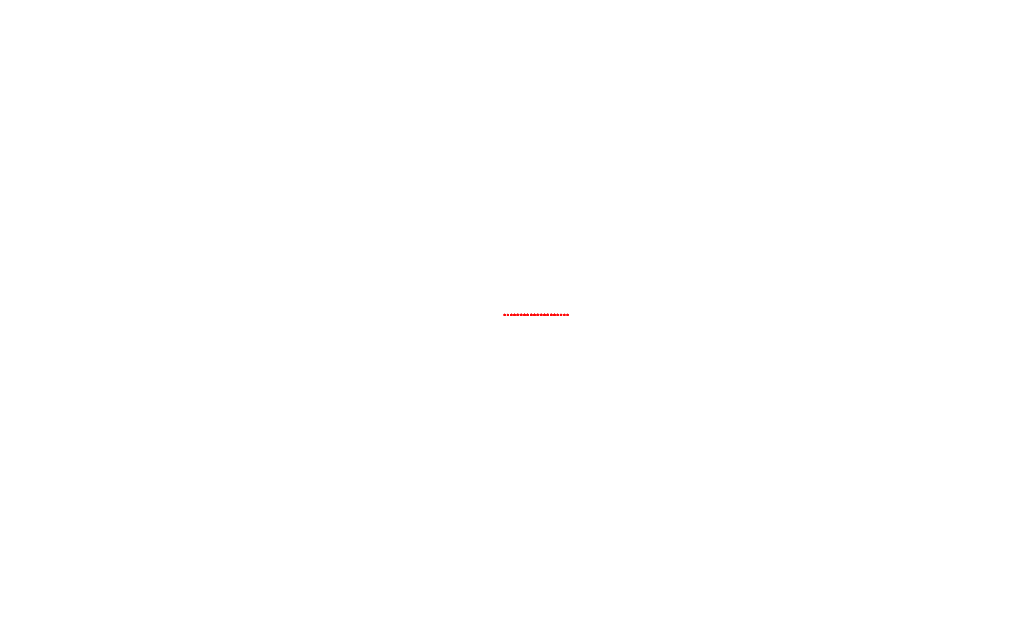

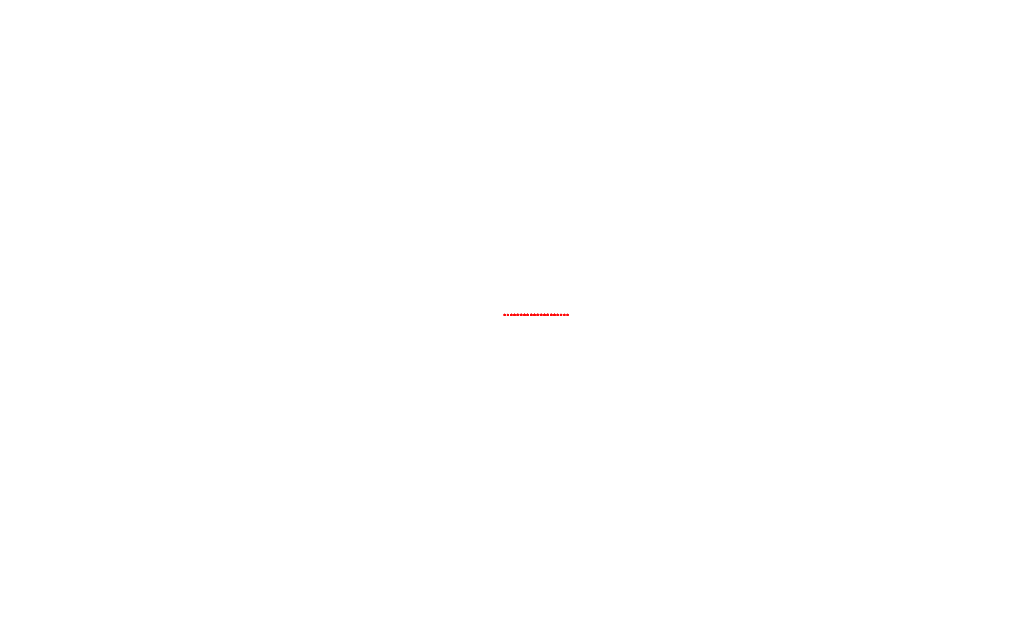

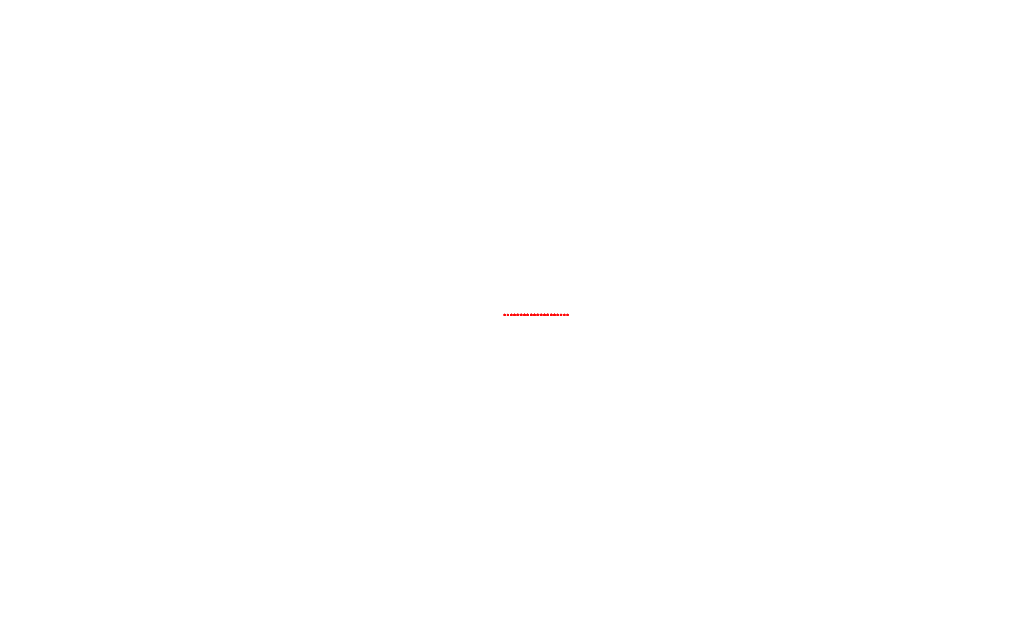

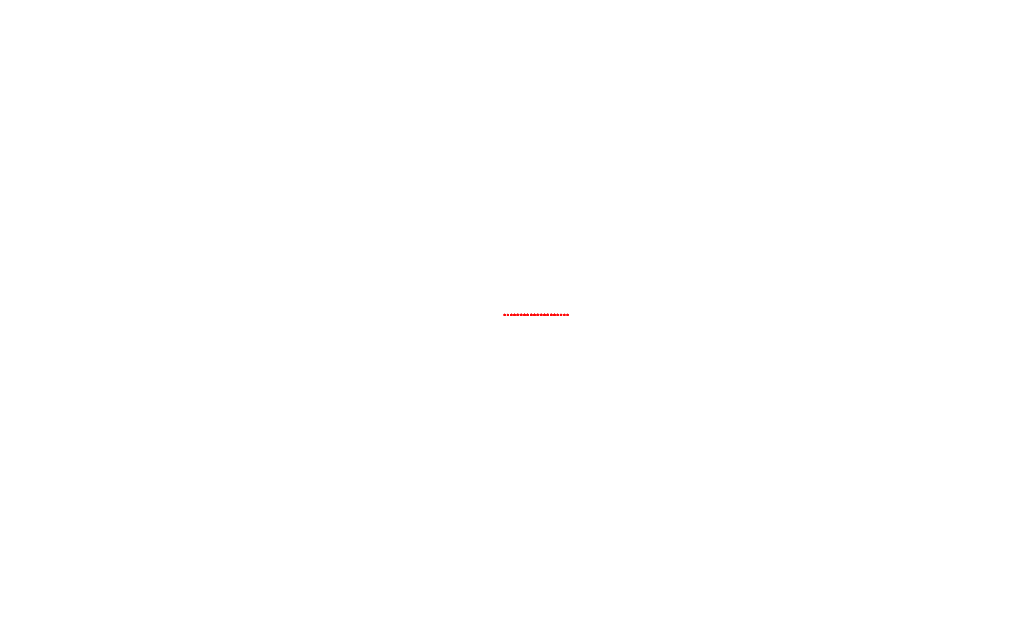

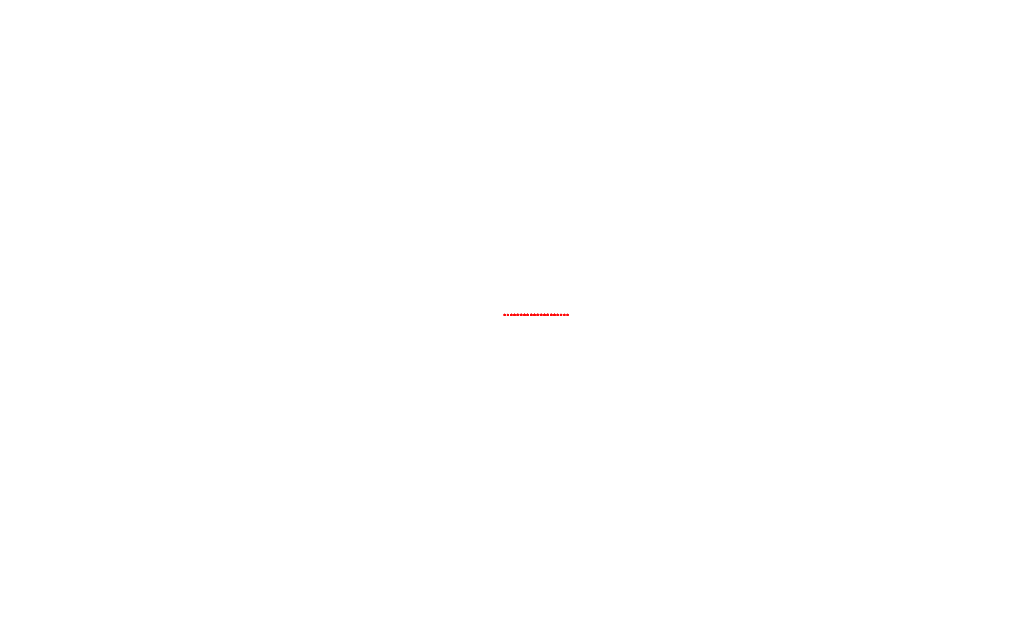

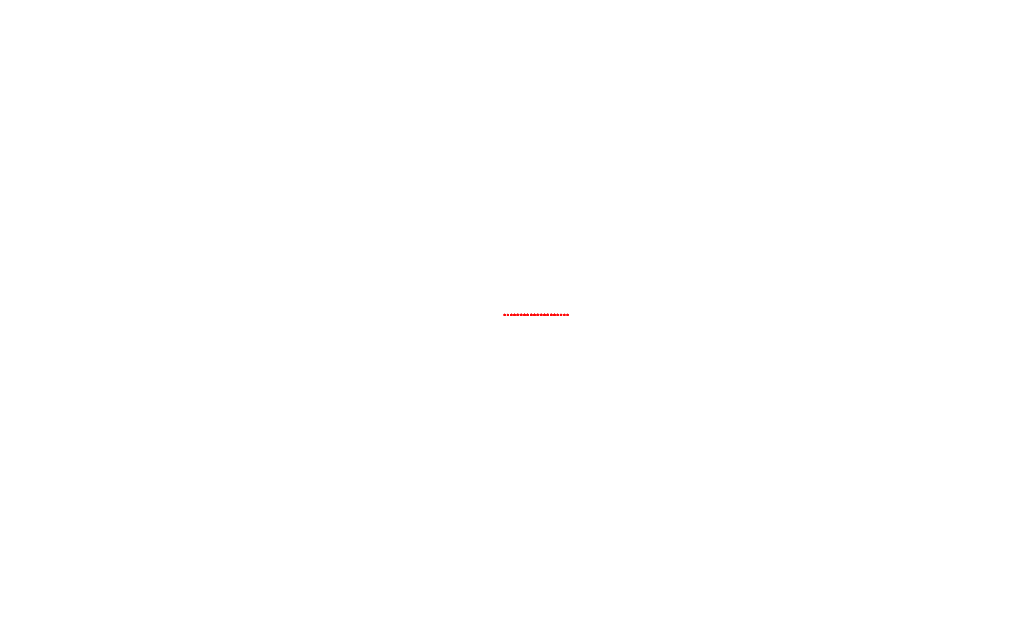

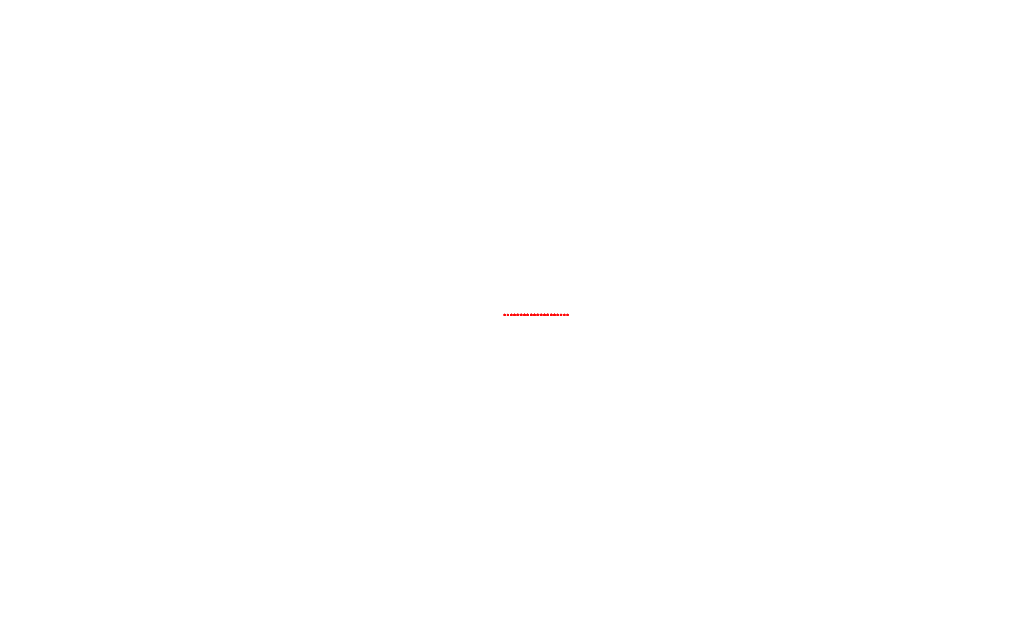

In [8]:
duration = el.get_default_args(el.EdgeGrid.render)['duration']
class EdgeGrid(el.EdgeGrid):
    def update(self, tau=.5):
        for i in range(14):
            ind_max = np.argmax(self.particles[2, :])
            self.particles[2, ind_max] = 0 # np.random.randn(self.particles.shape[1])
        #print (self.particles[2, :].min(), self.particles[2, :].max())
        self.particles[2, :] += self.dt/tau * (self.particles[2, :] - self.particles_ref)

e = EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure(N_mirror=2, alpha = .5)
e.particles_ref = e.particles[2, :].copy()
e.animate(scale = 32.)
#e.animate(fname='../files/expansion_foyers_greedy_12.mp4', scale = 32.)

t:   2%|▏         | 4/200 [00:00<00:06, 31.62it/s, now=None]

Moviepy - Building video /var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/tmpobb78cbz.mp4.
Moviepy - Writing video /var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/tmpobb78cbz.mp4



Moviepy - Done !
Moviepy - video ready /var/folders/0t/crx5yf1x3rd8378nbqbv00vc0000gn/T/tmpobb78cbz.mp4


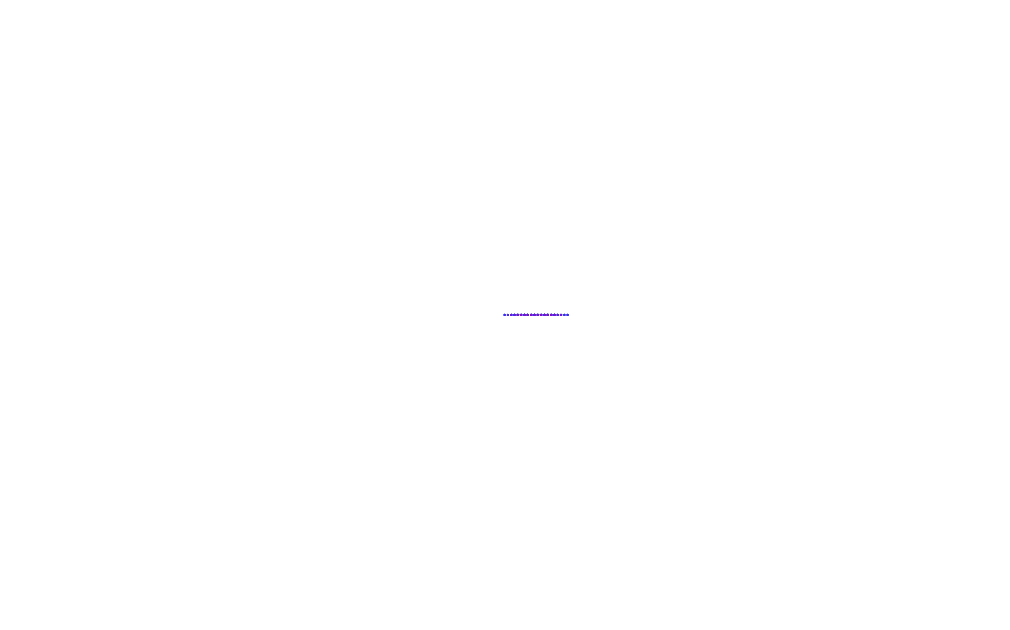

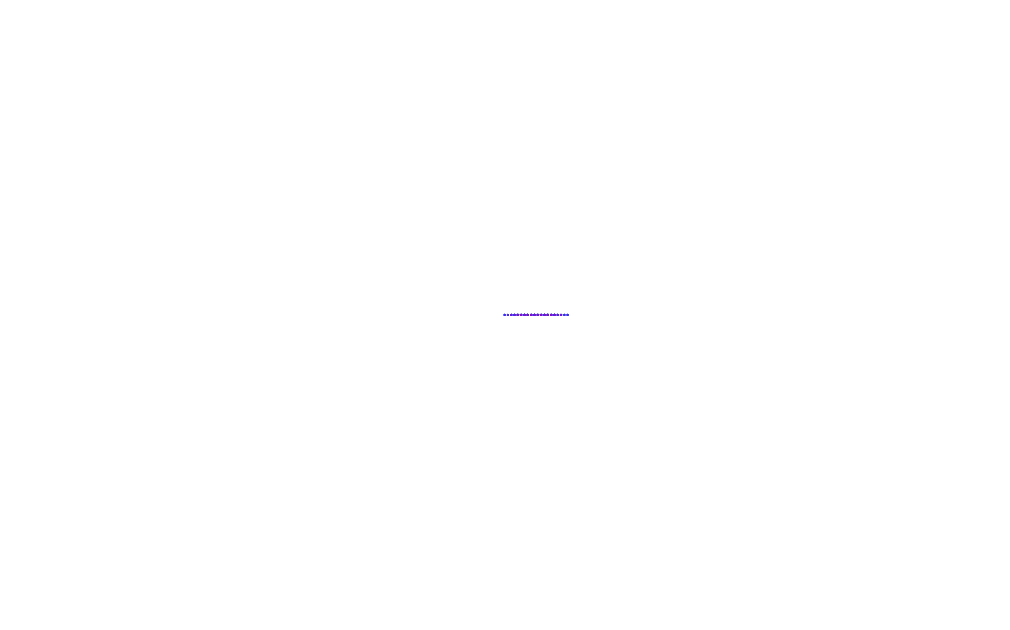

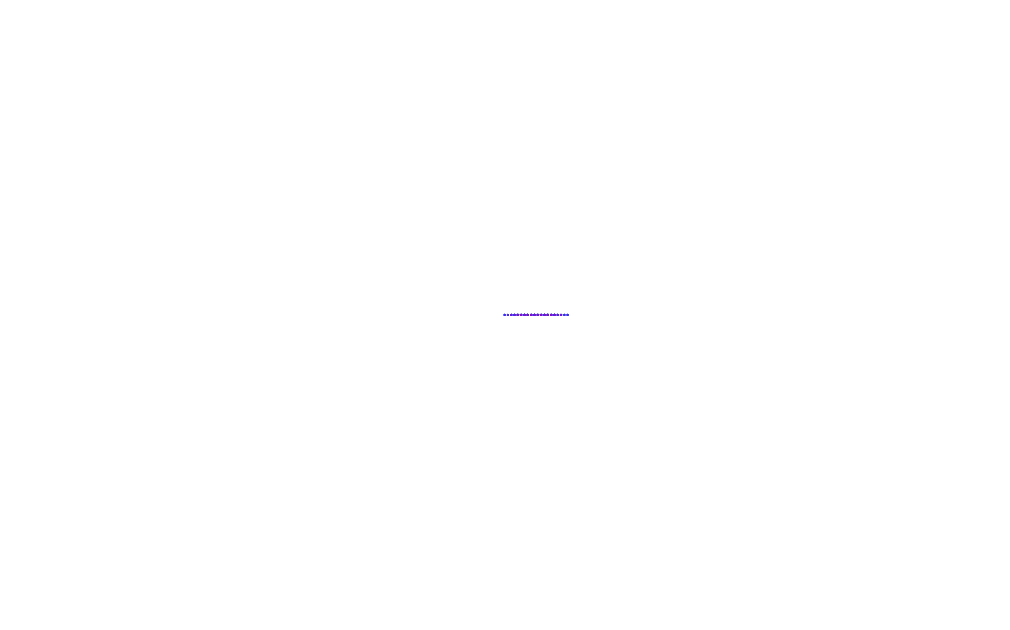

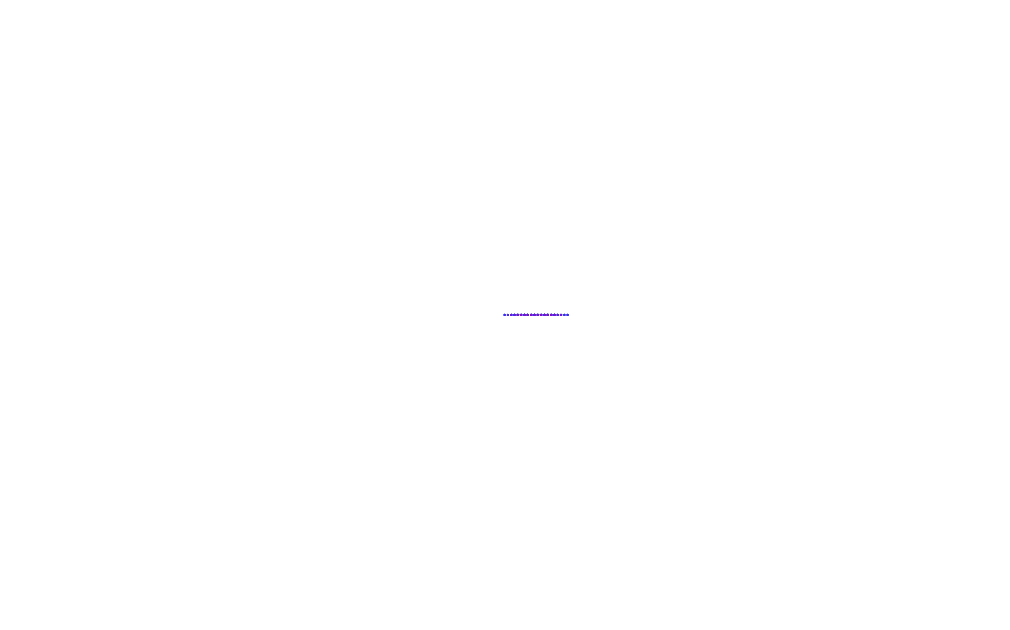

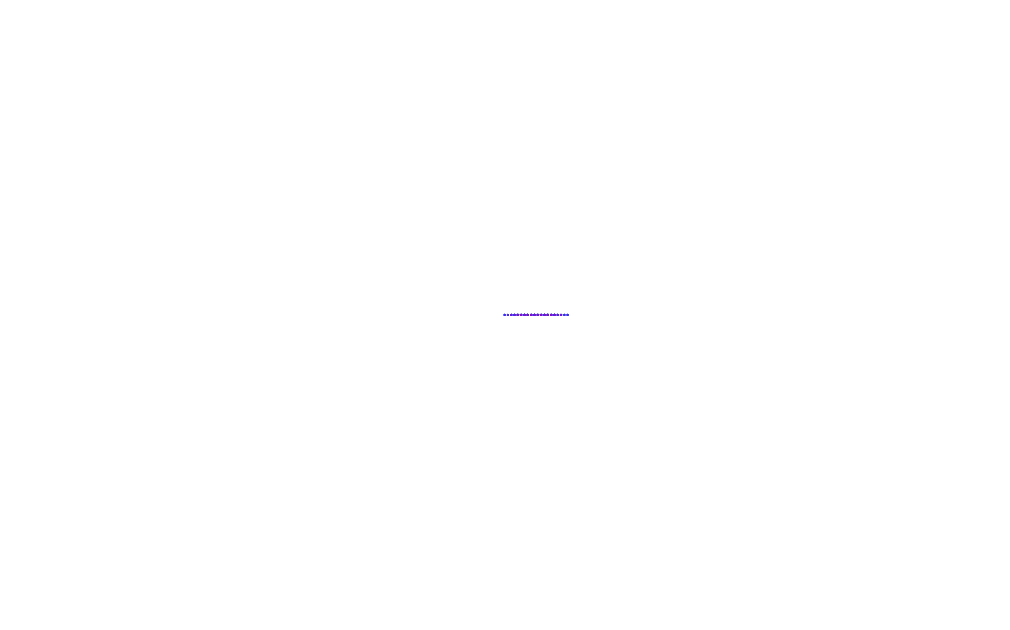

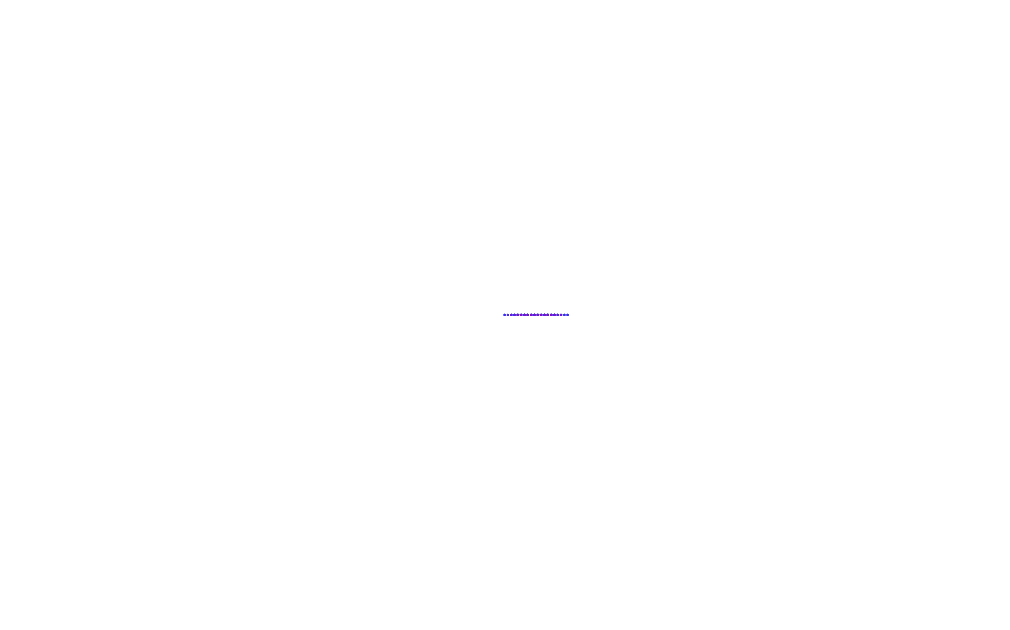

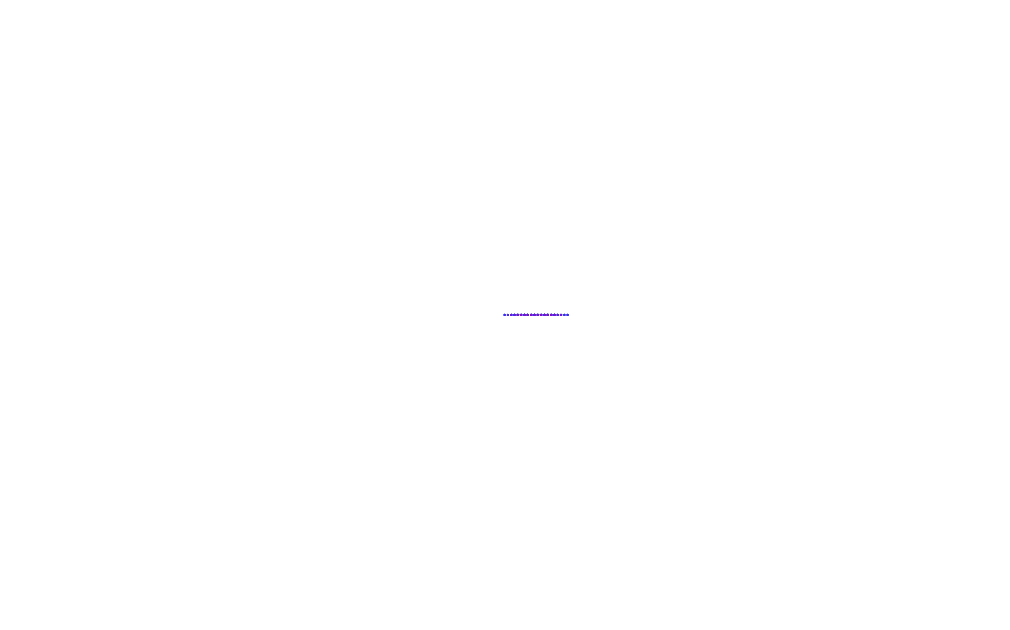

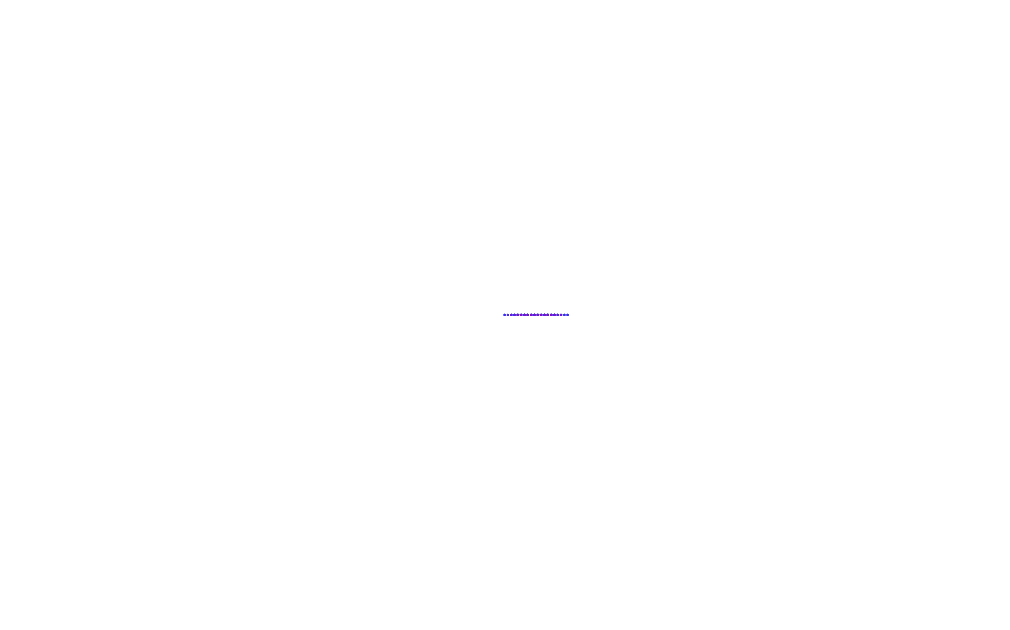

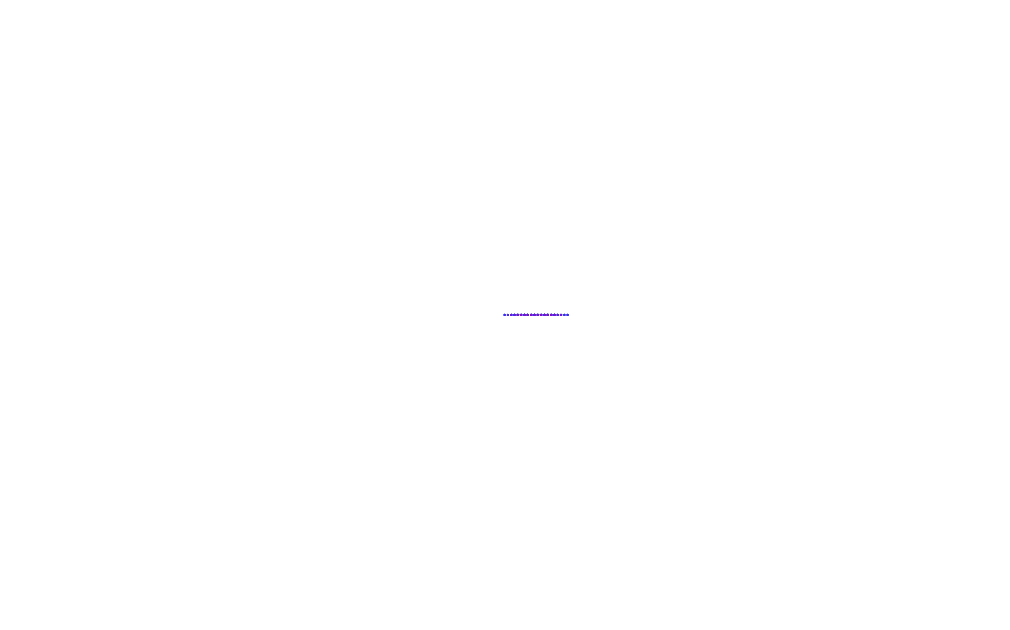

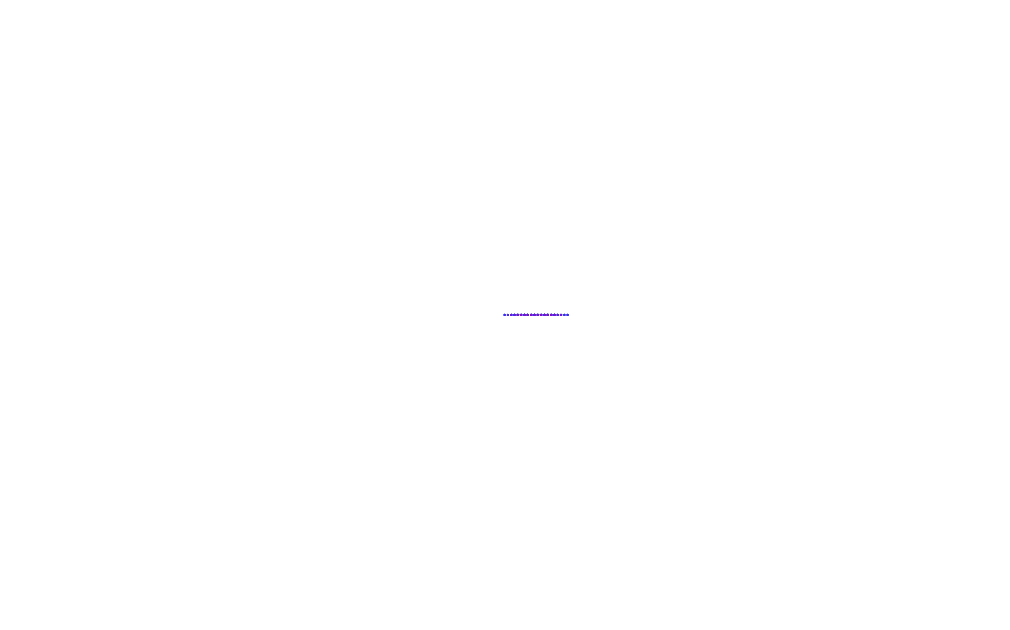

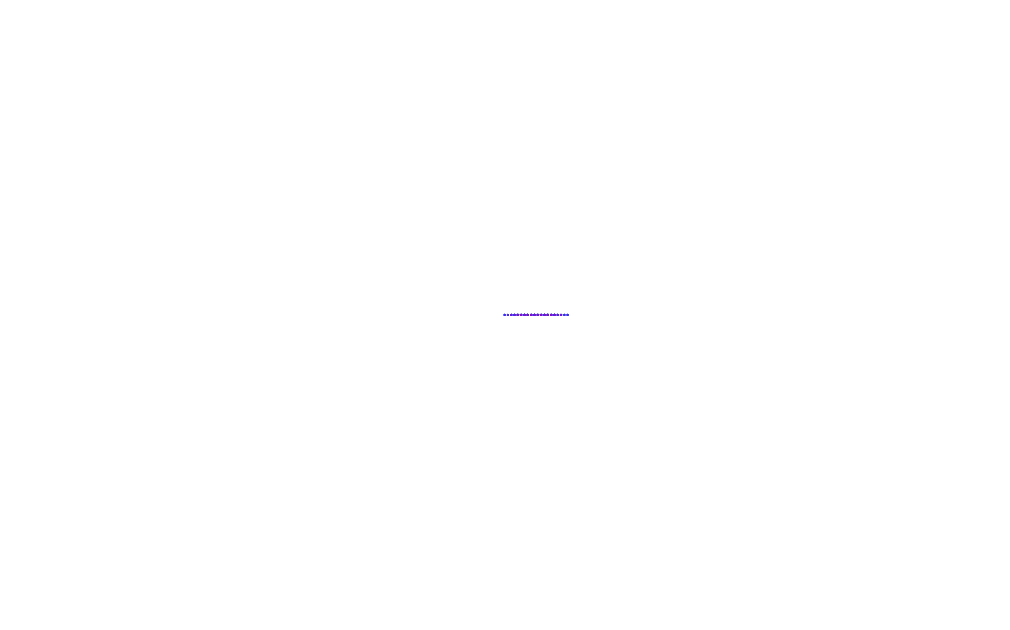

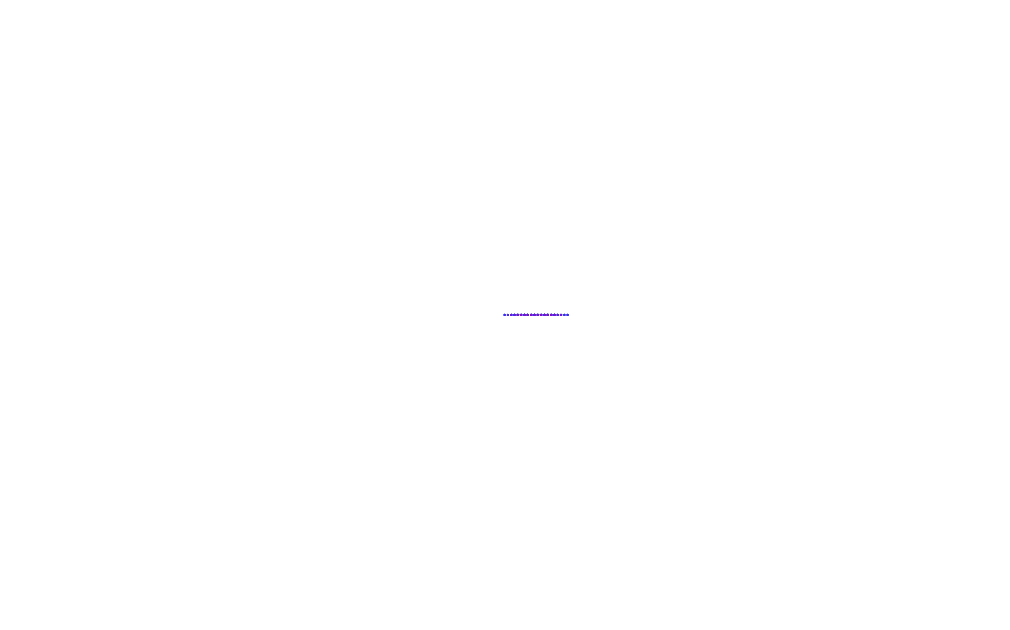

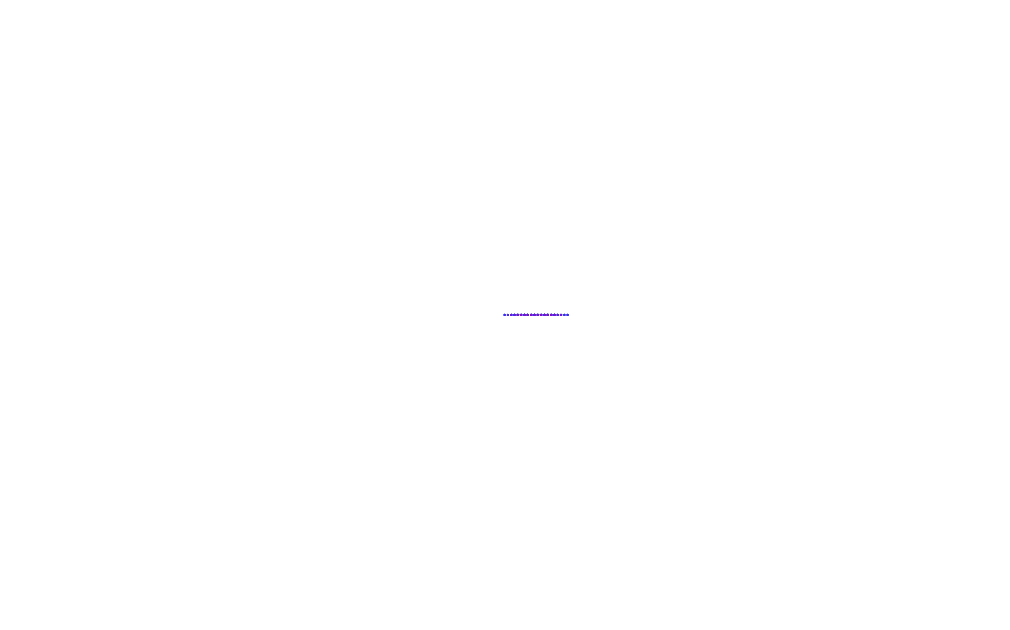

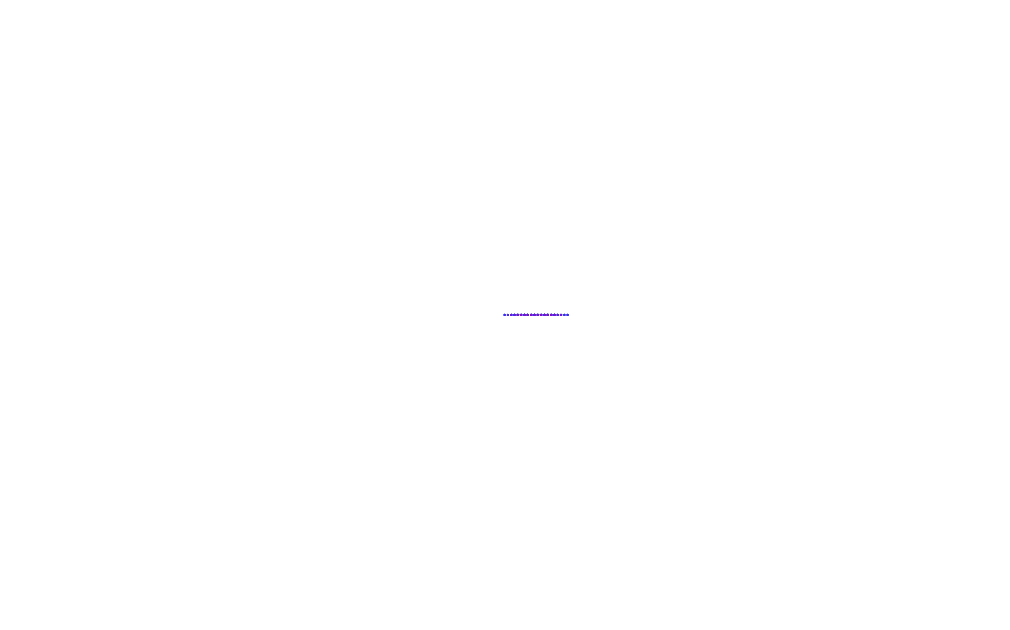

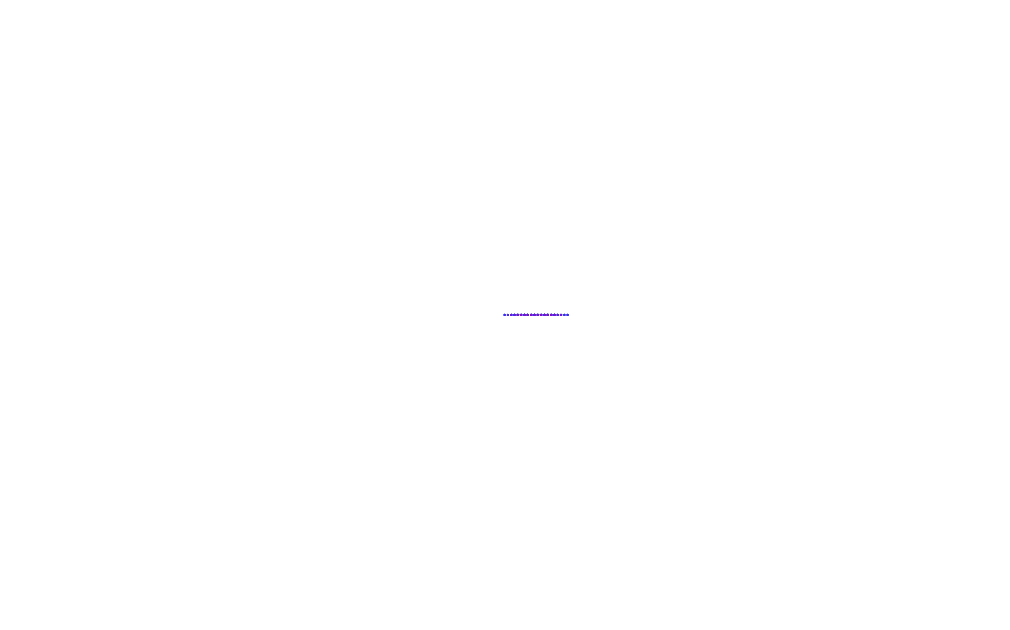

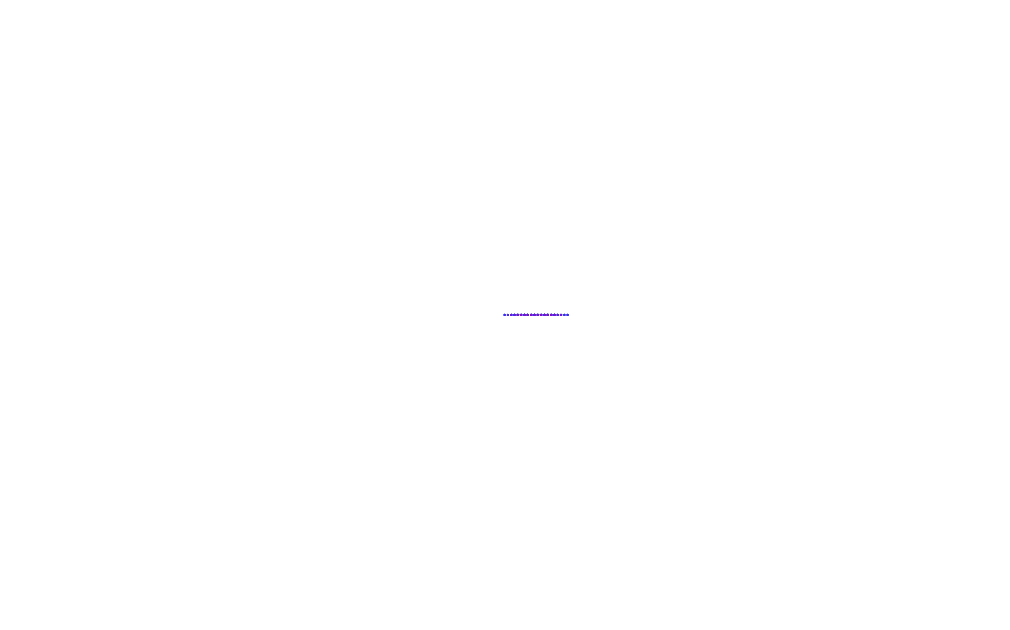

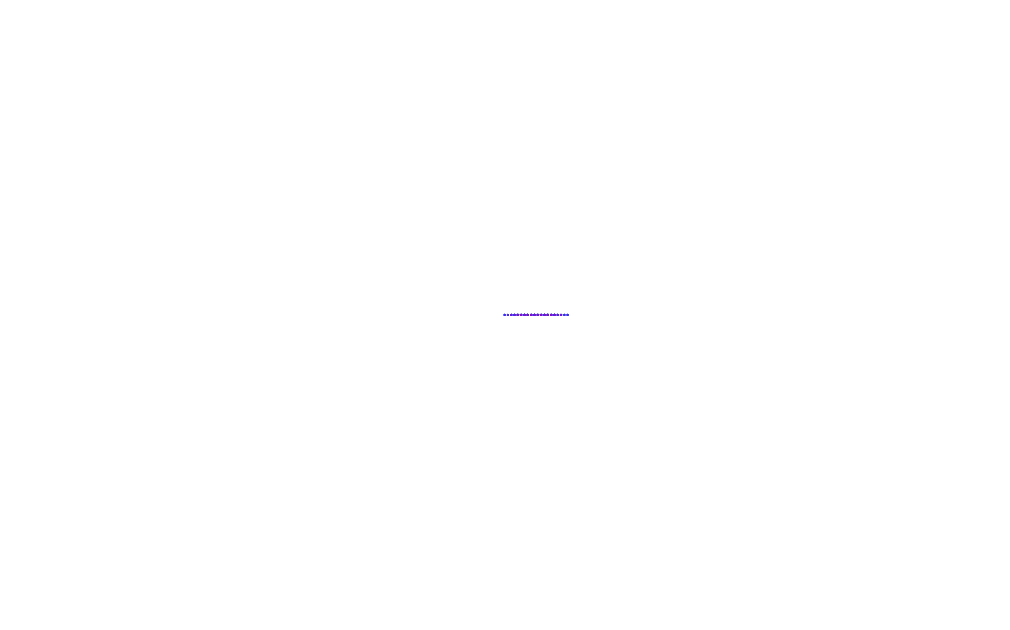

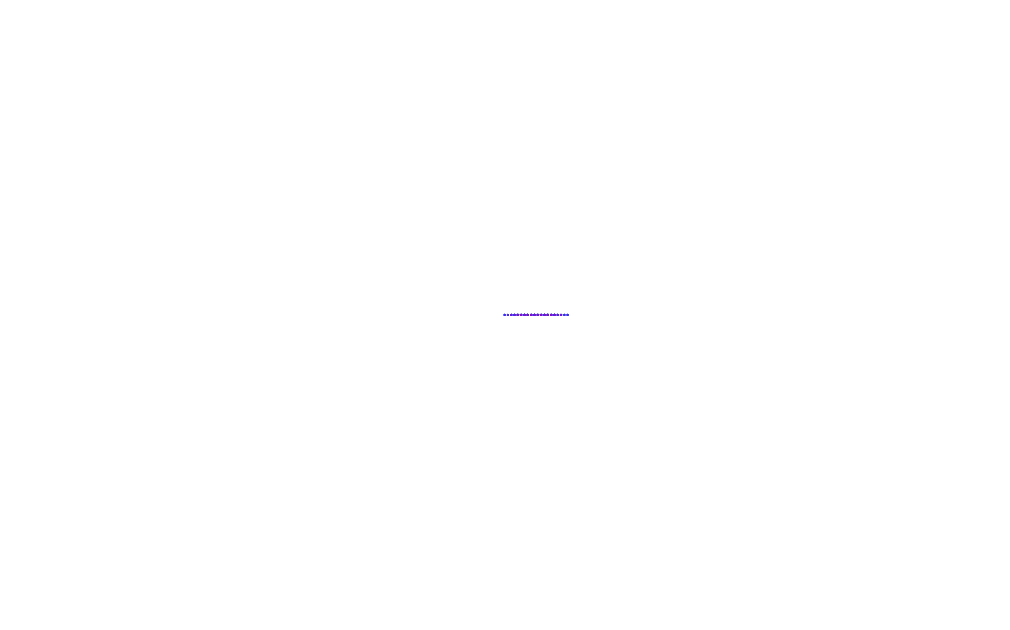

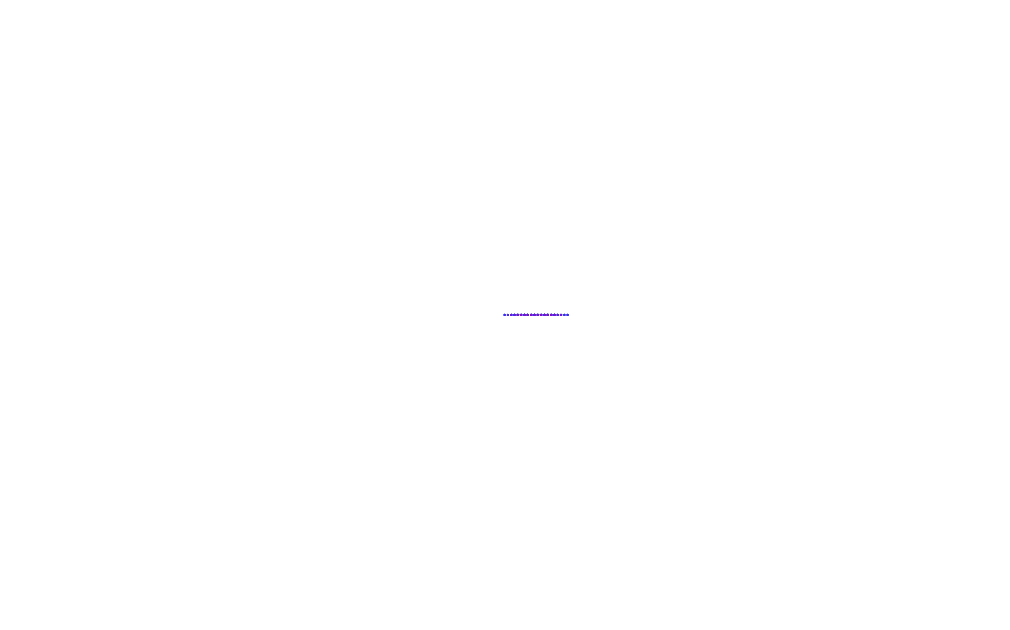

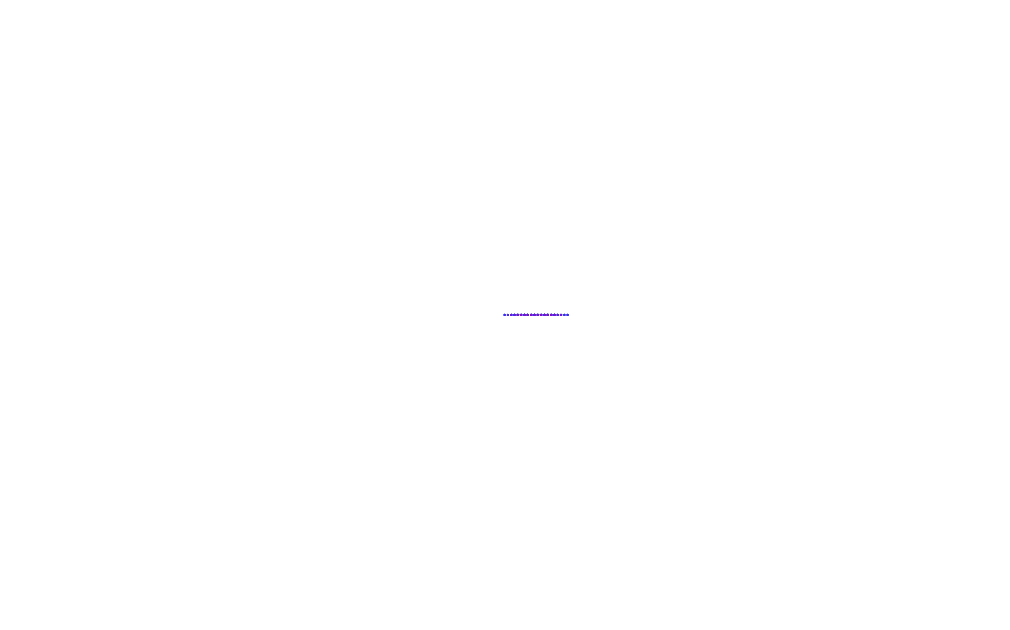

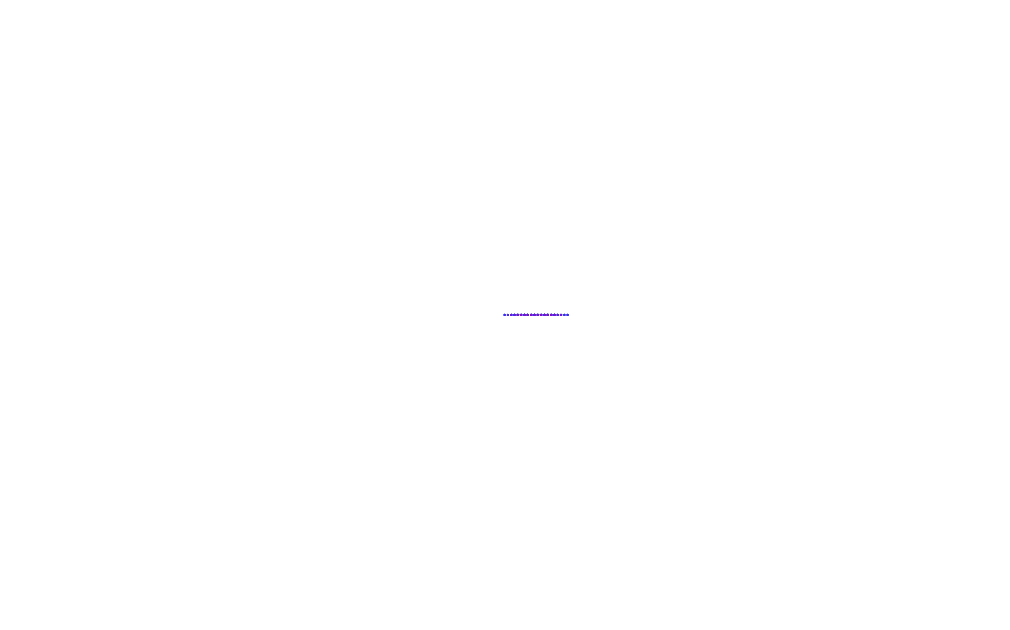

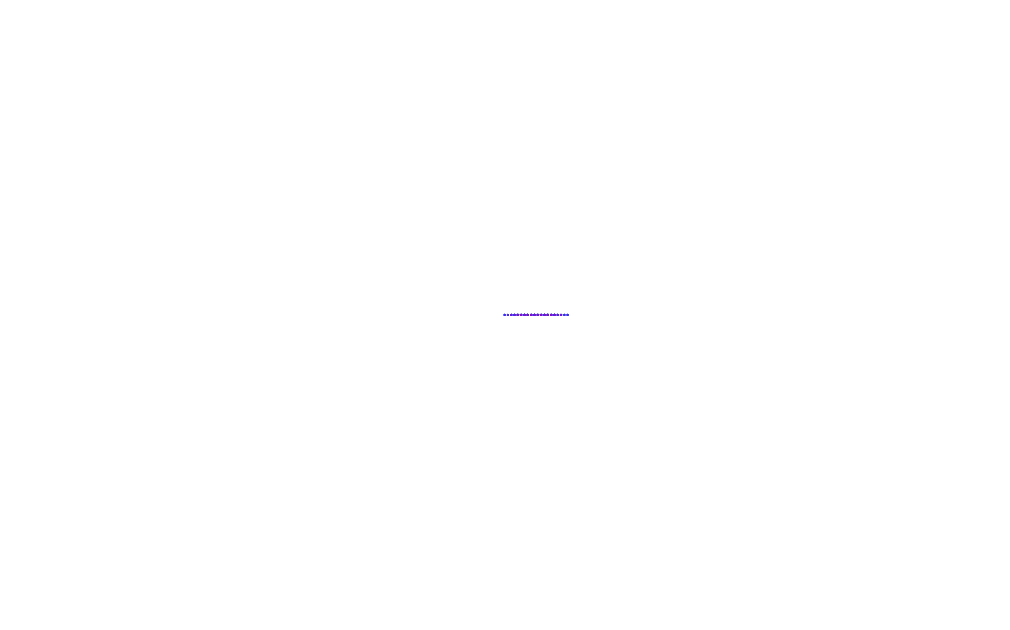

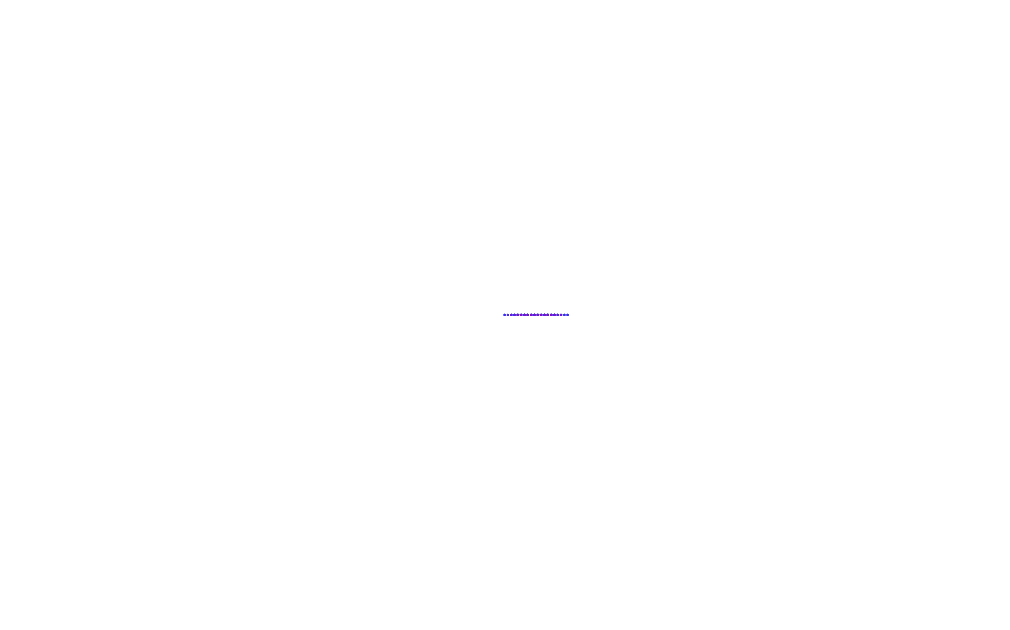

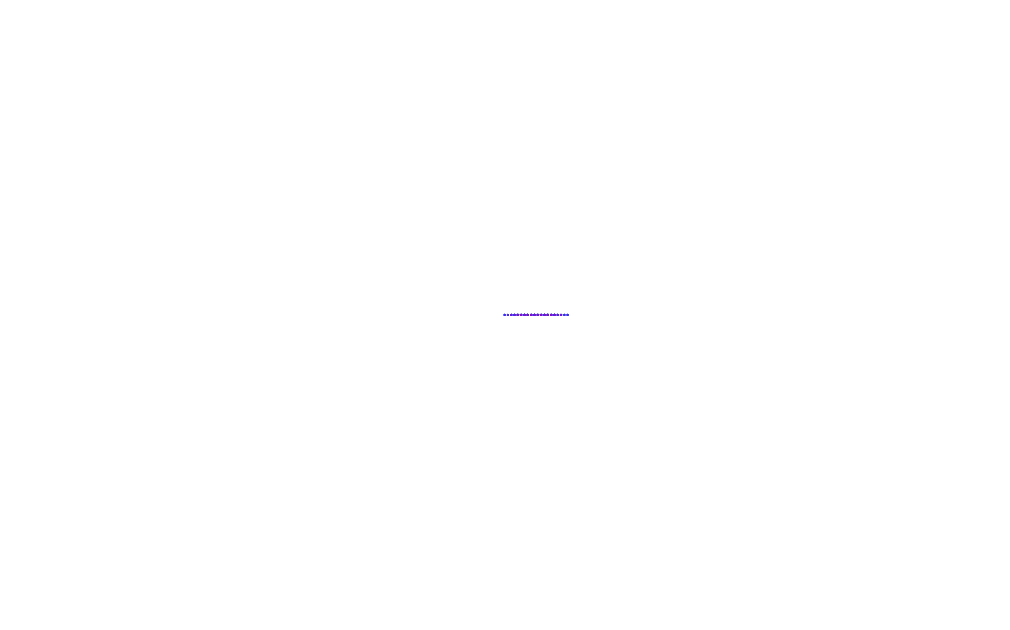

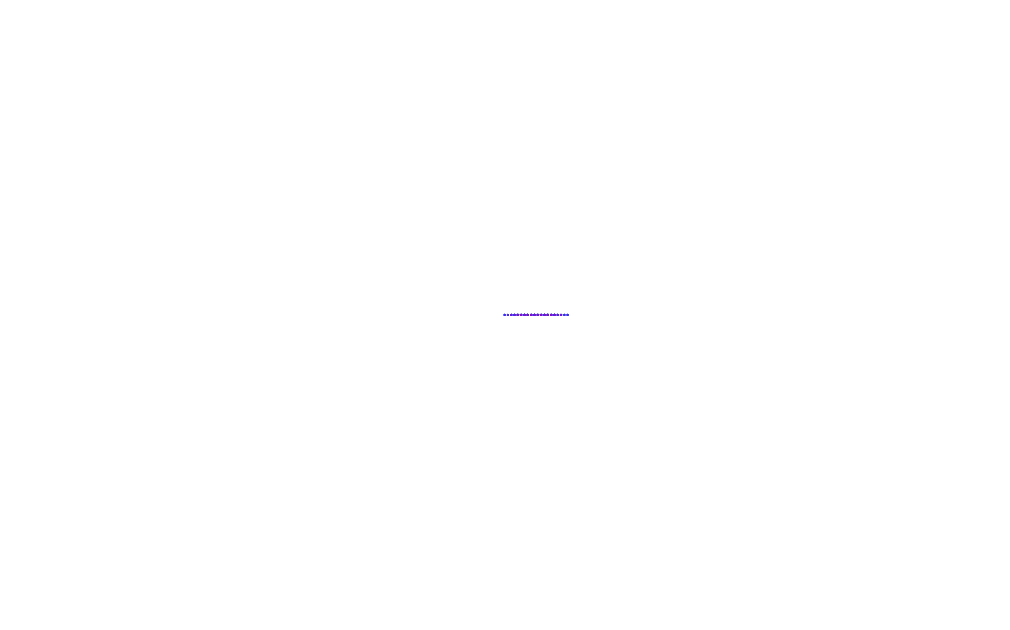

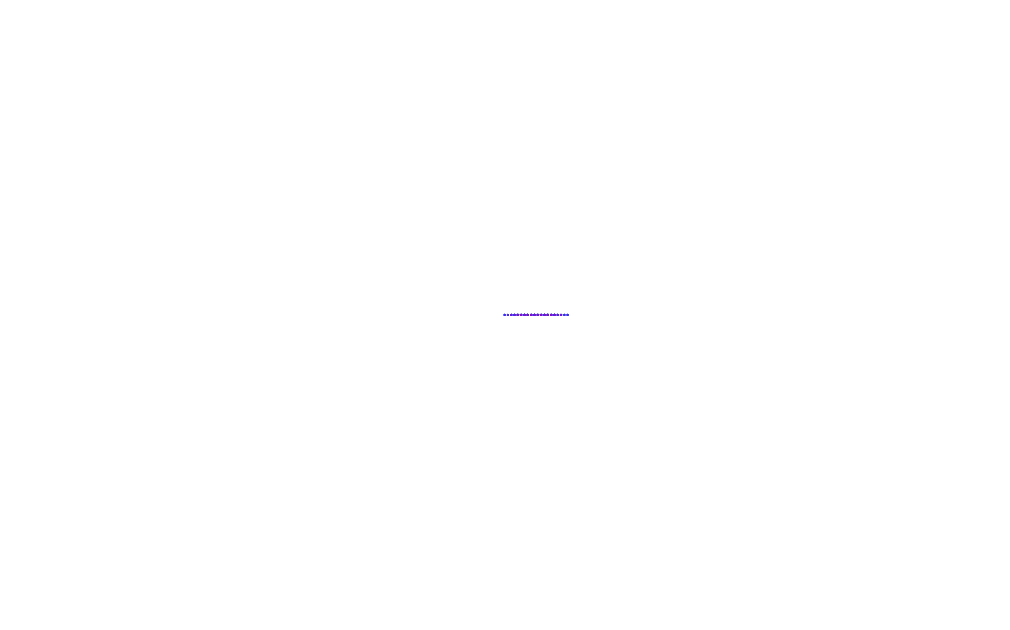

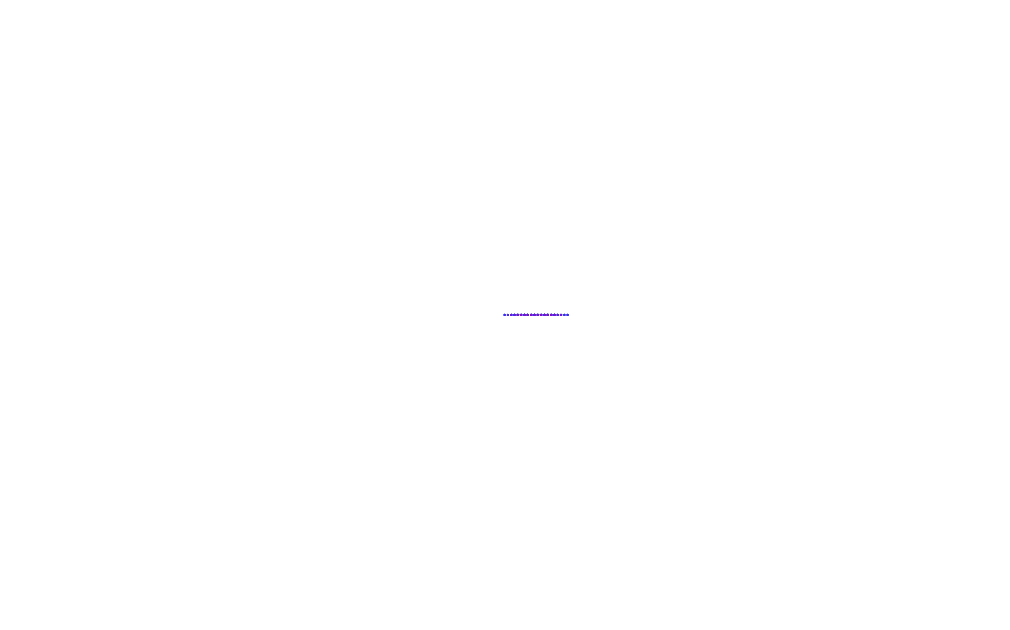

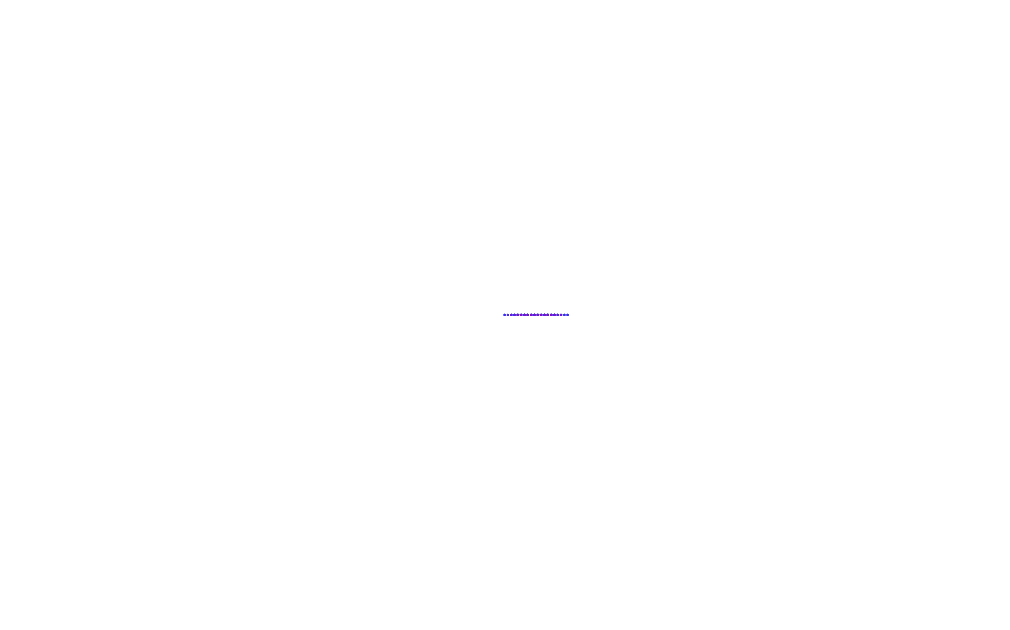

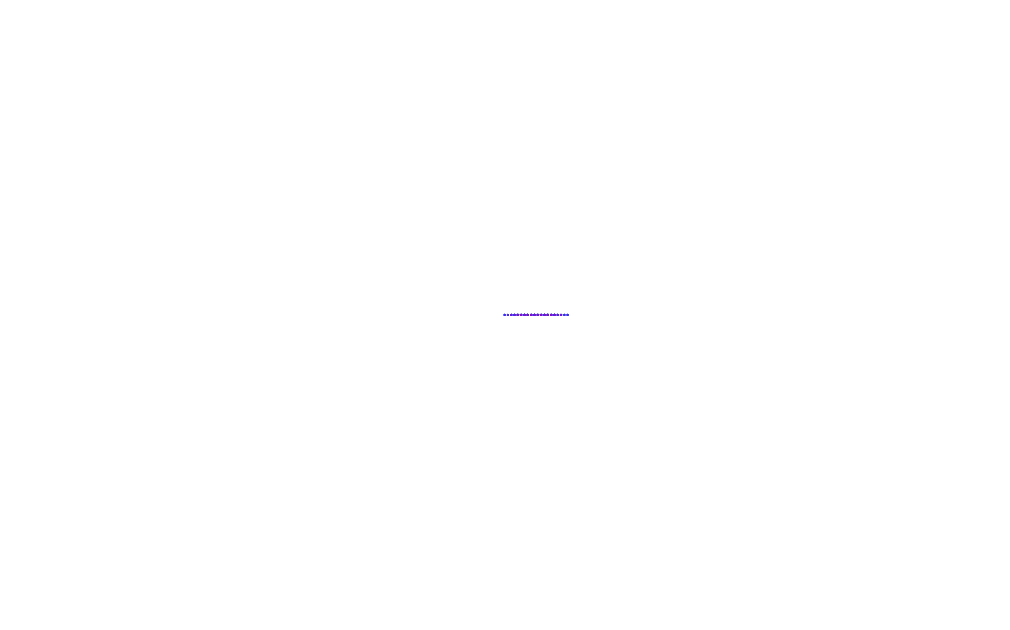

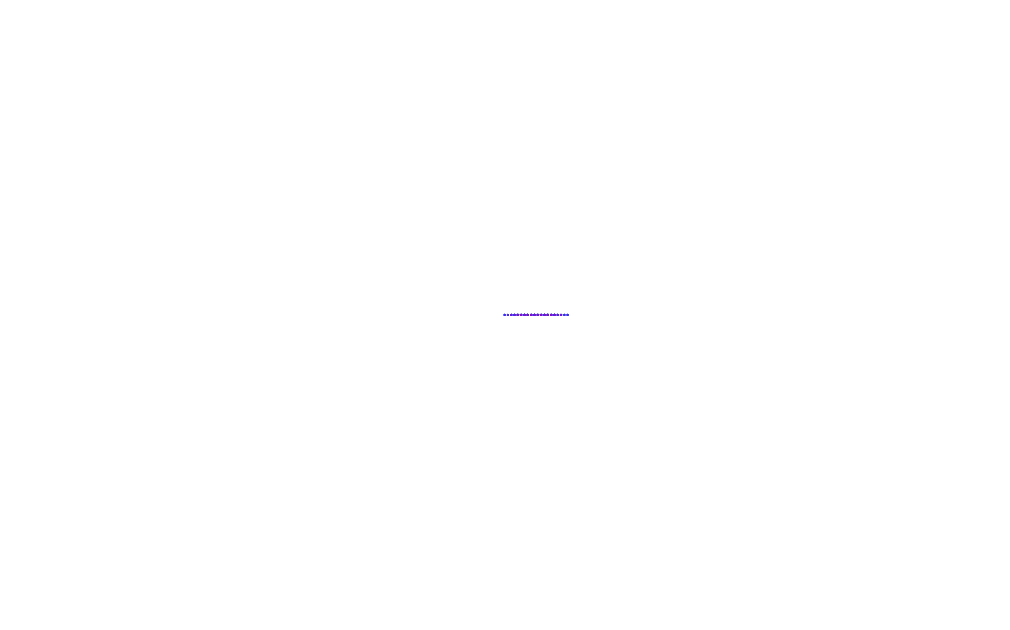

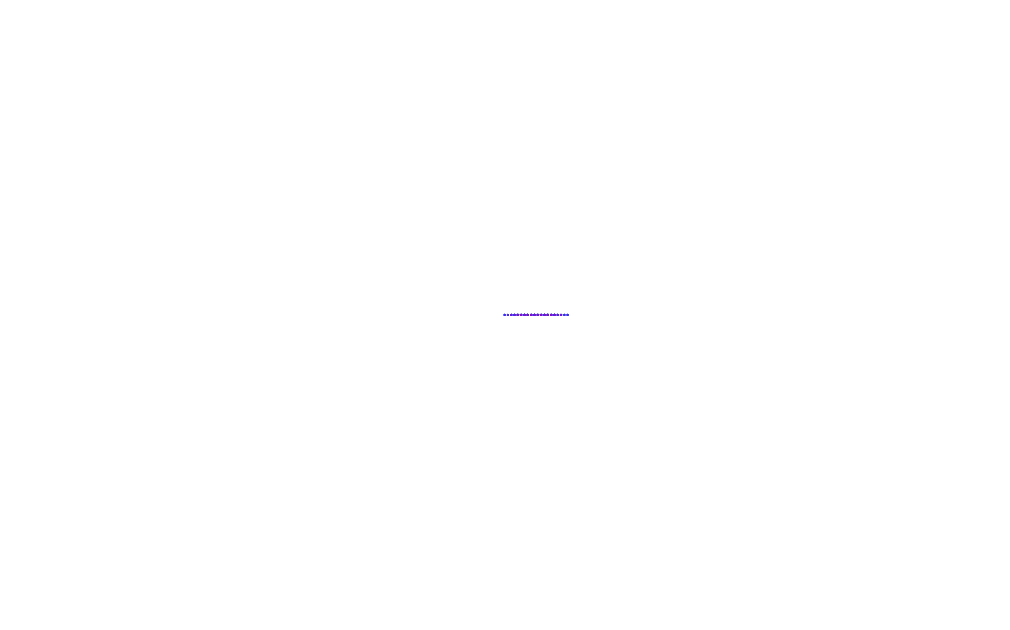

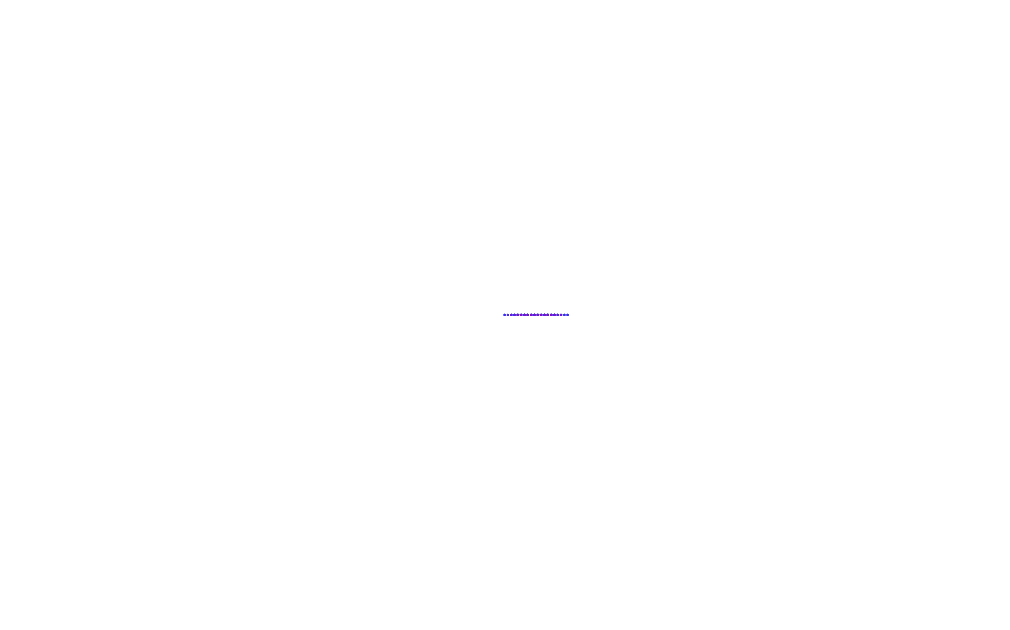

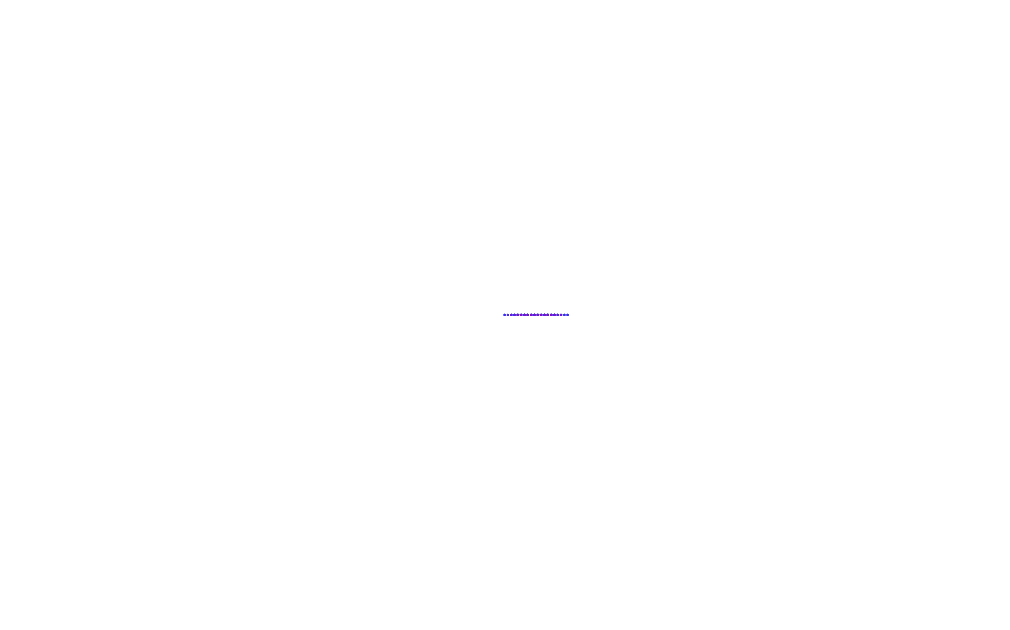

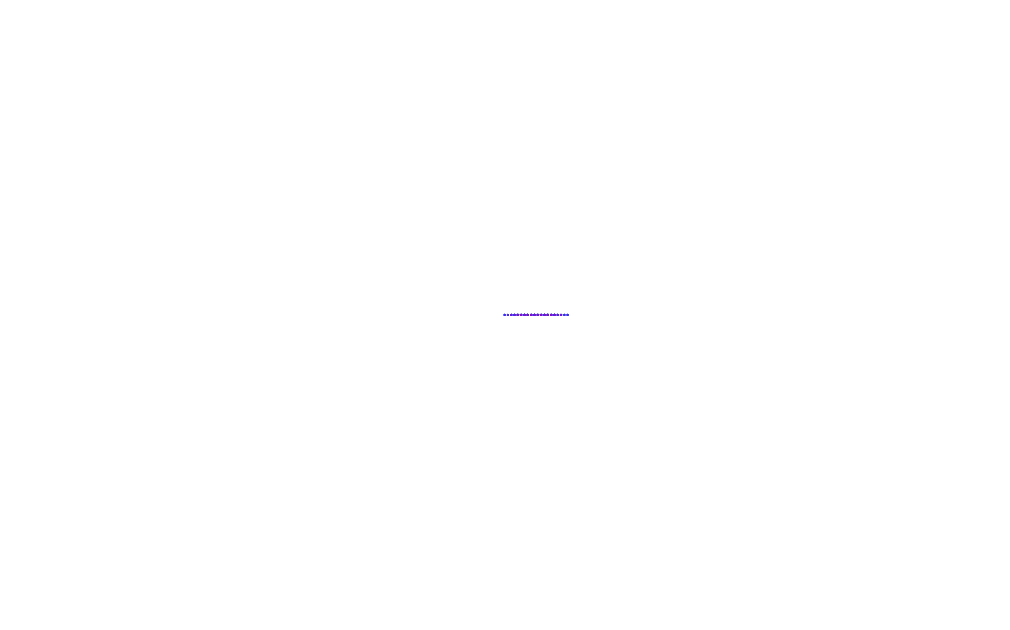

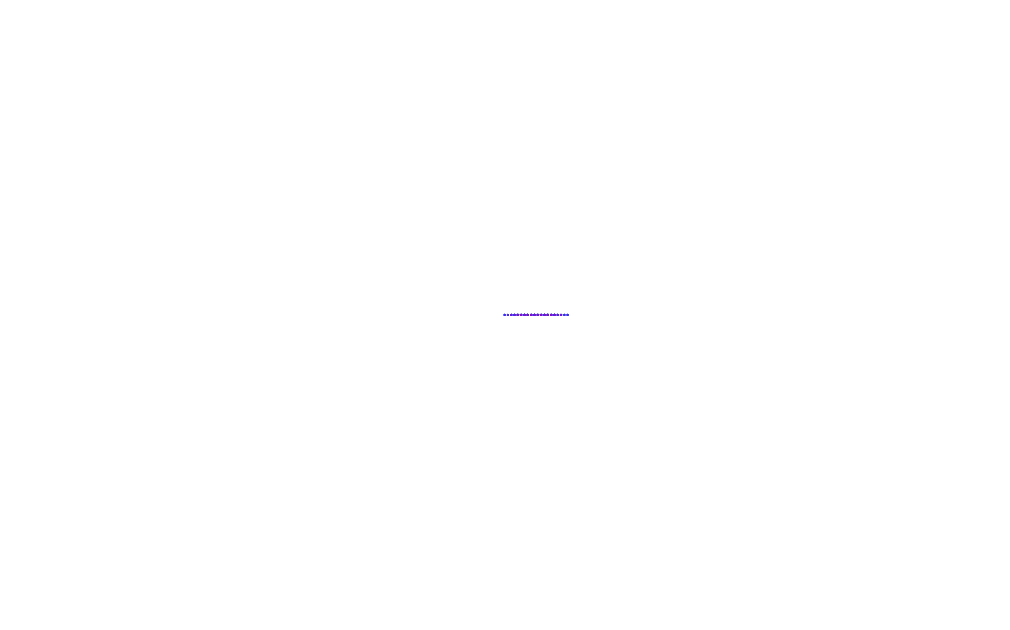

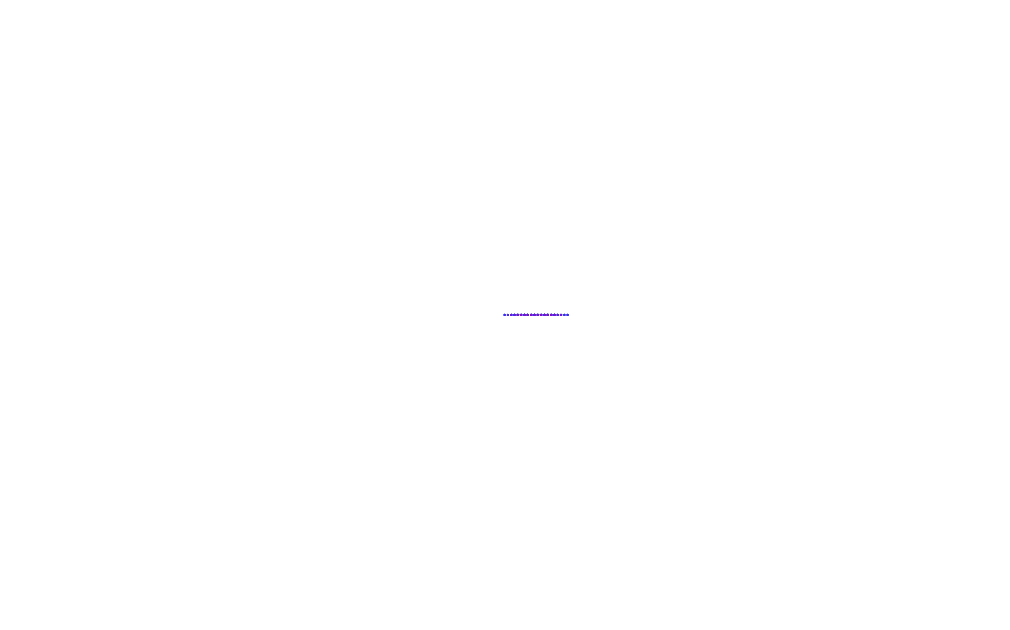

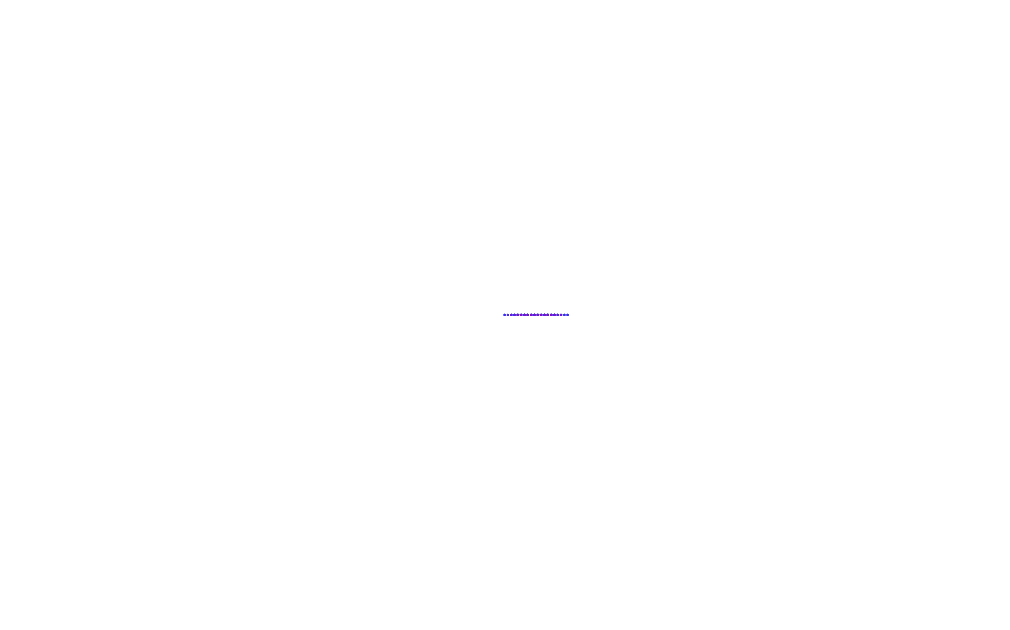

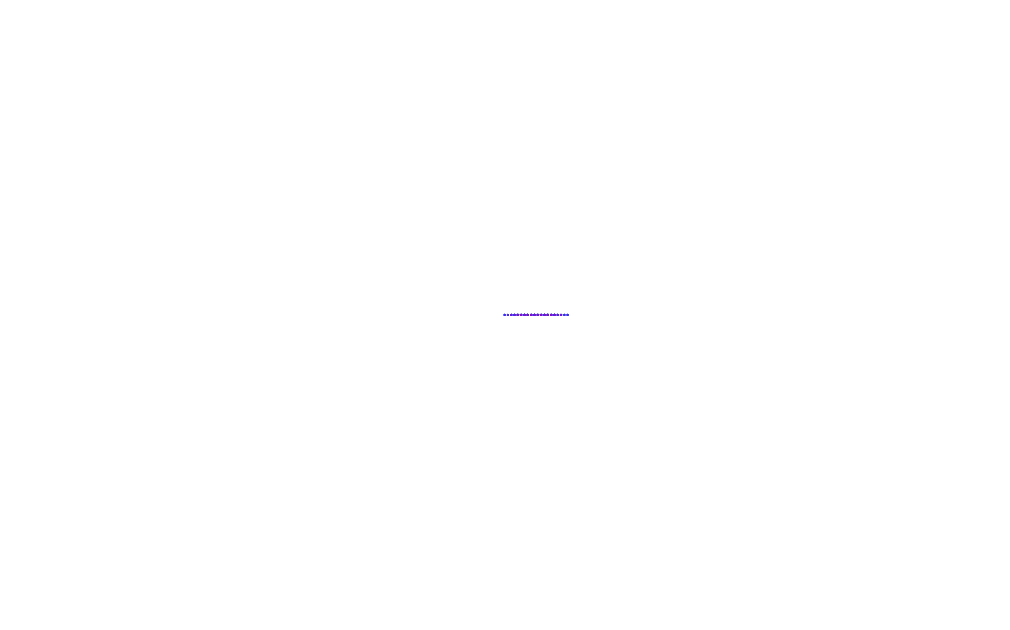

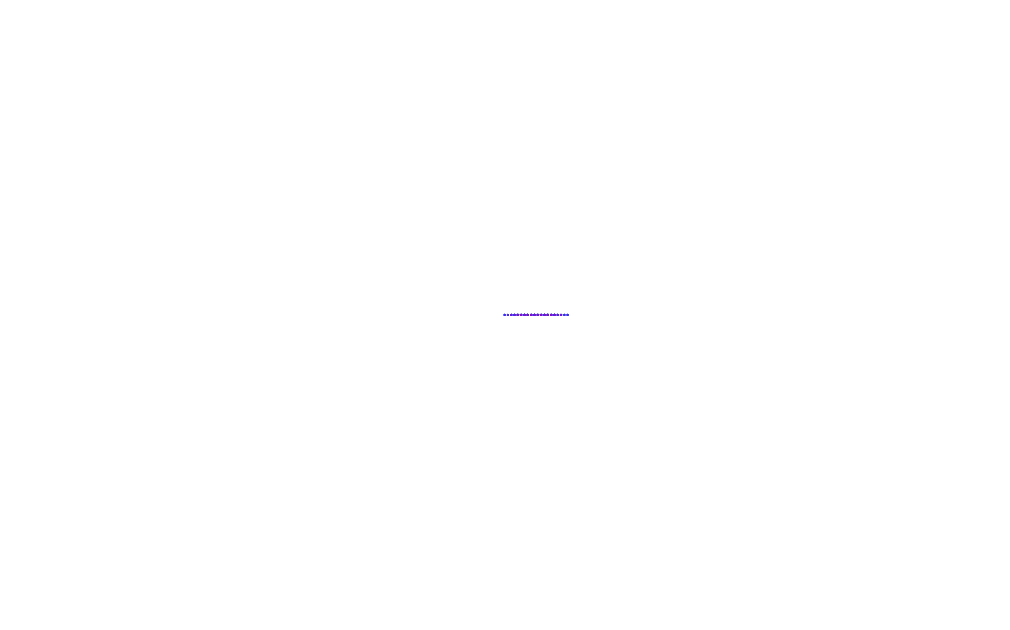

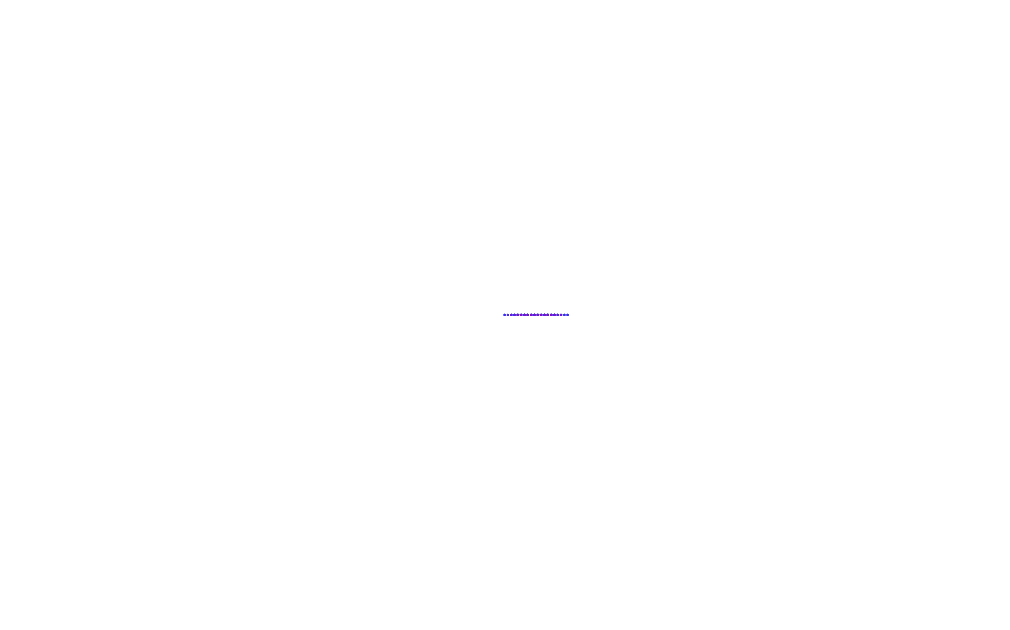

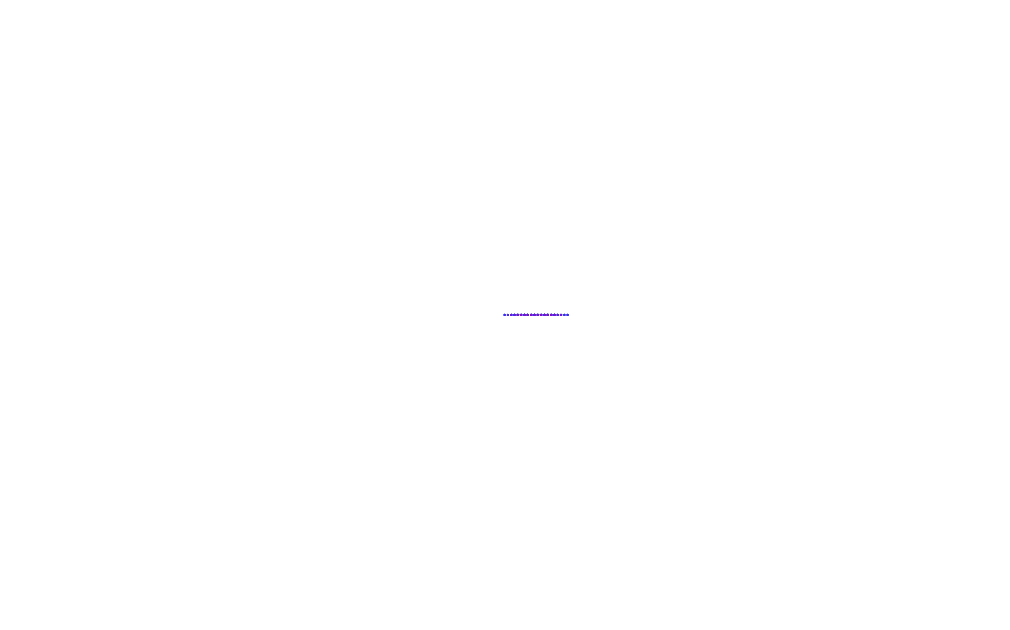

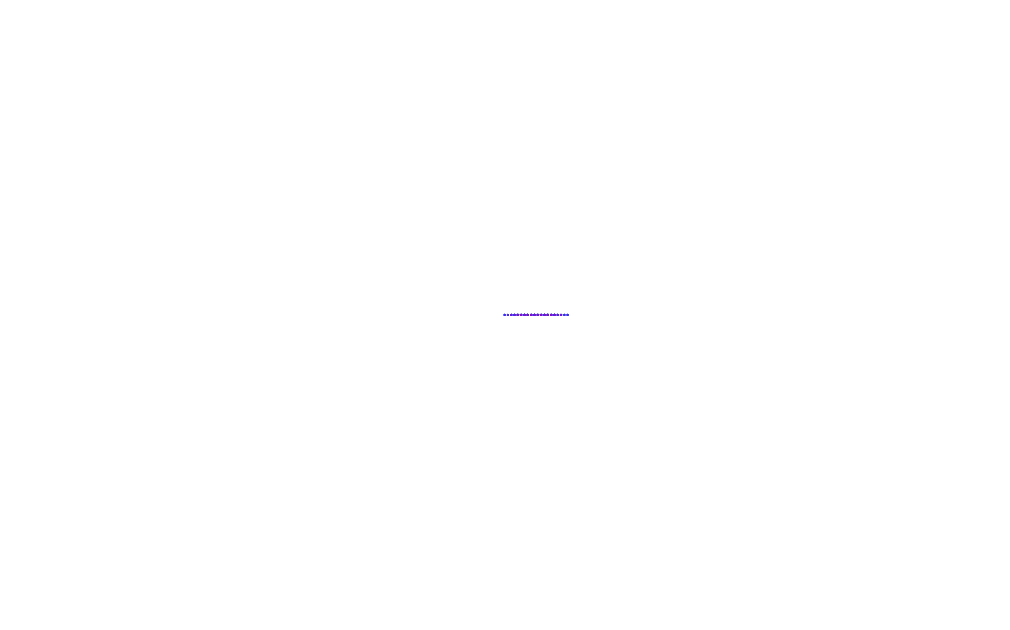

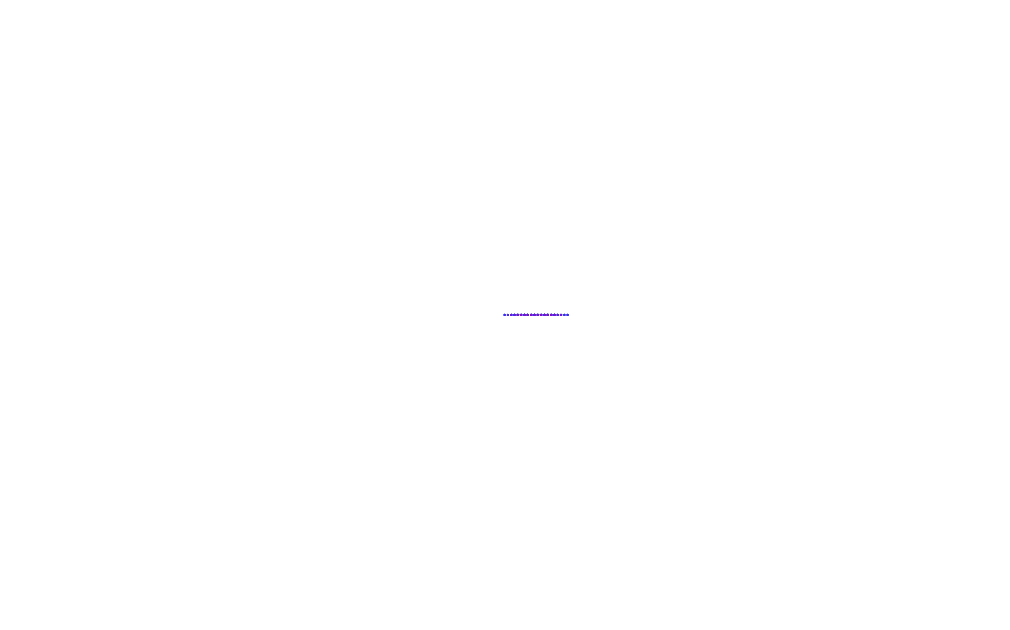

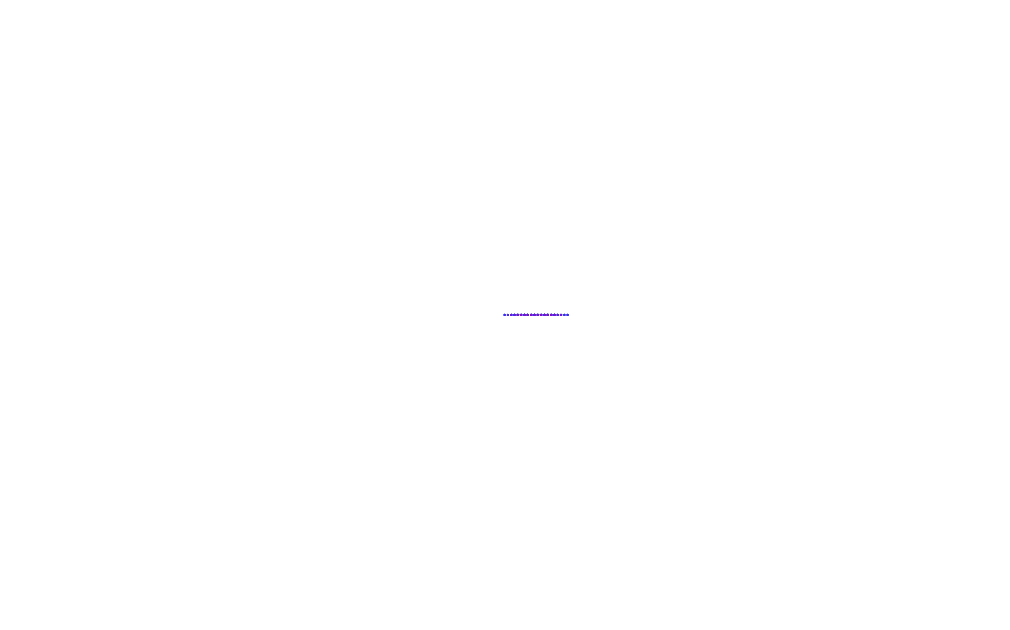

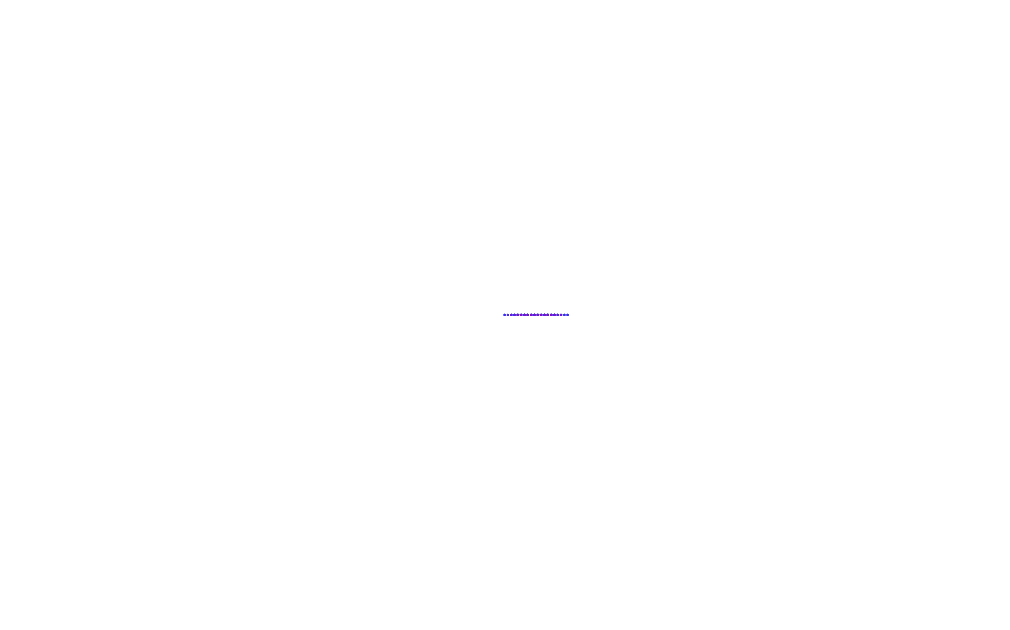

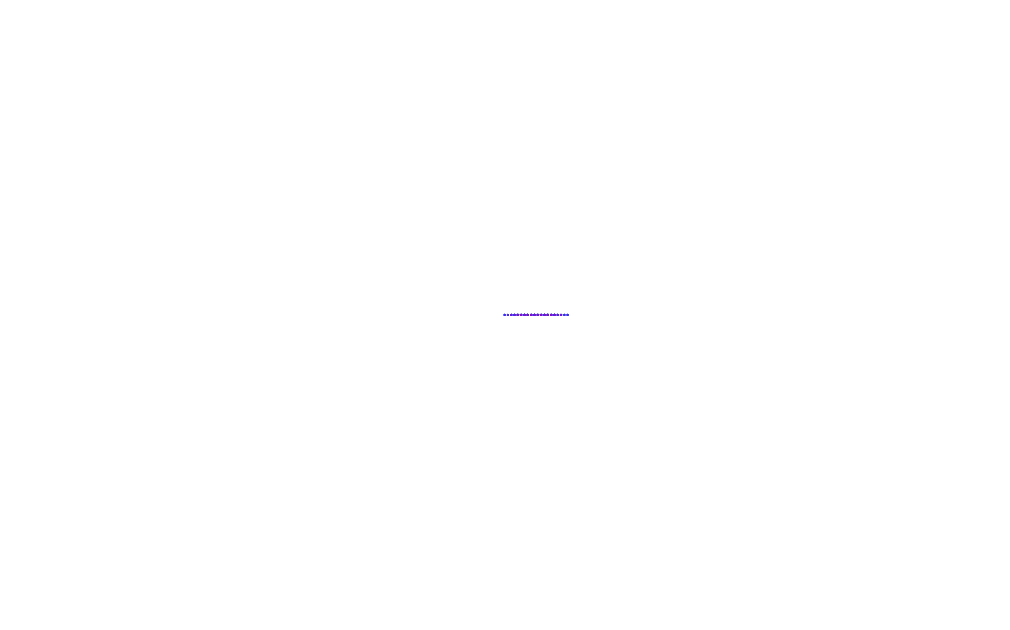

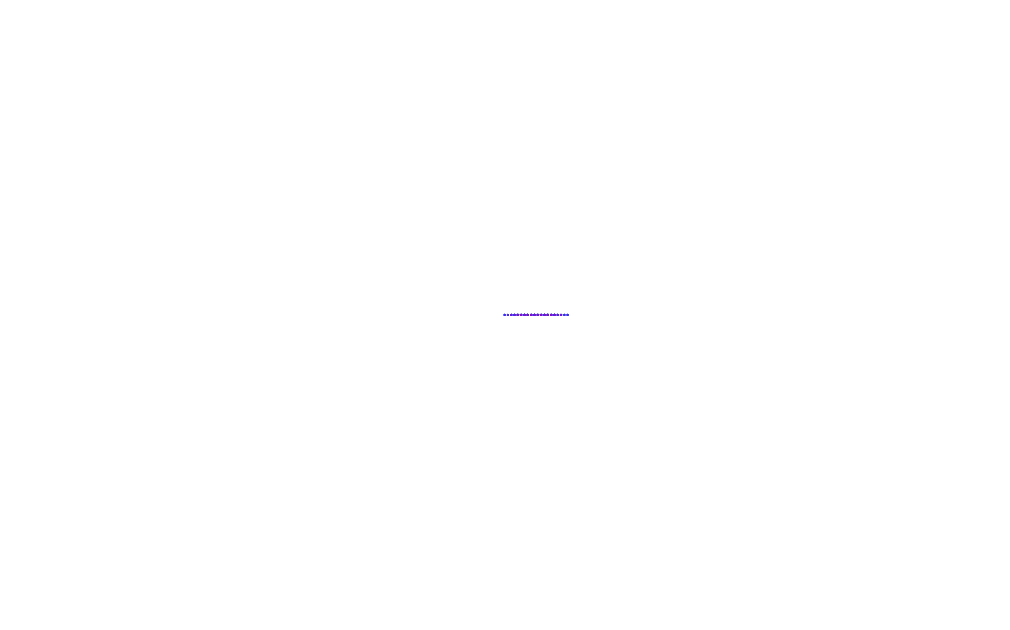

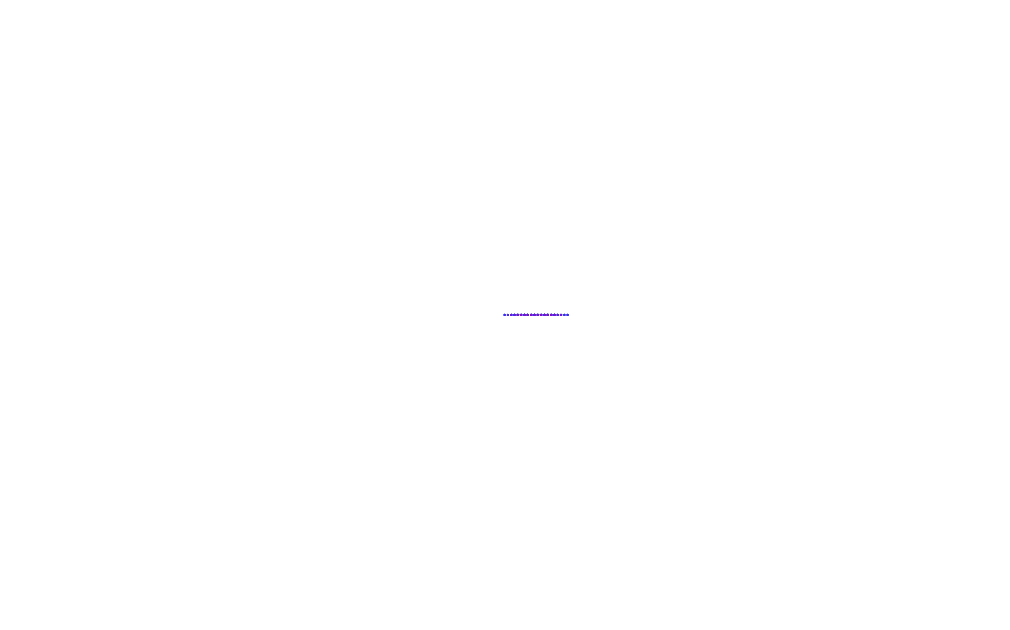

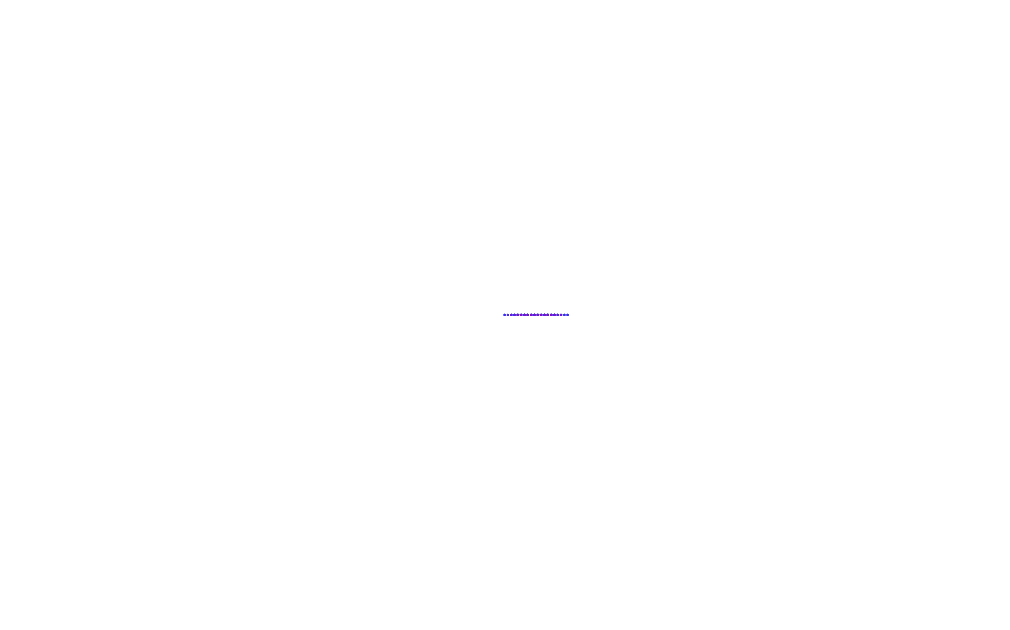

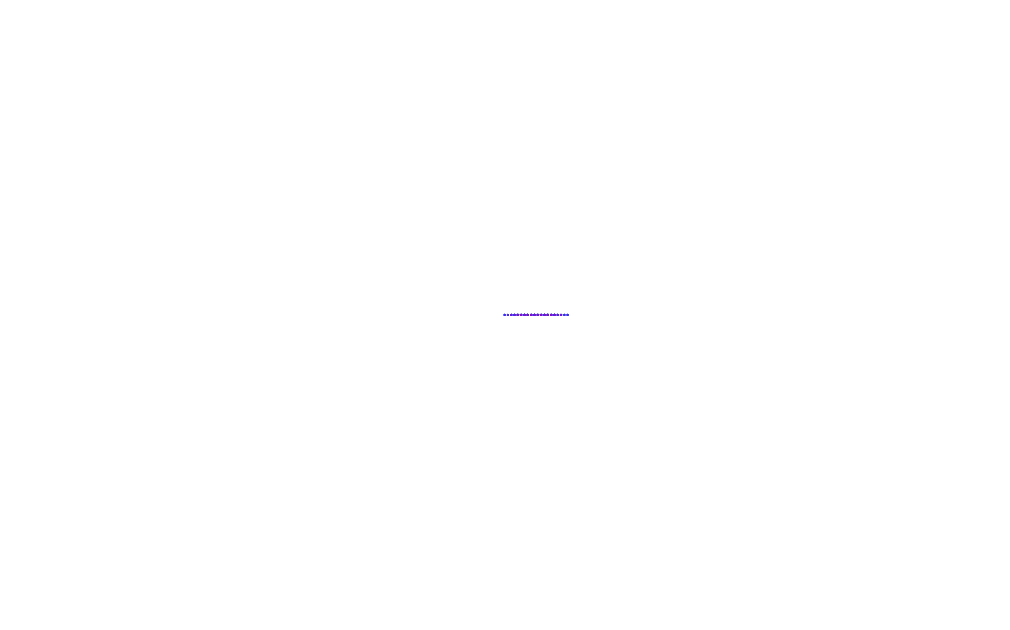

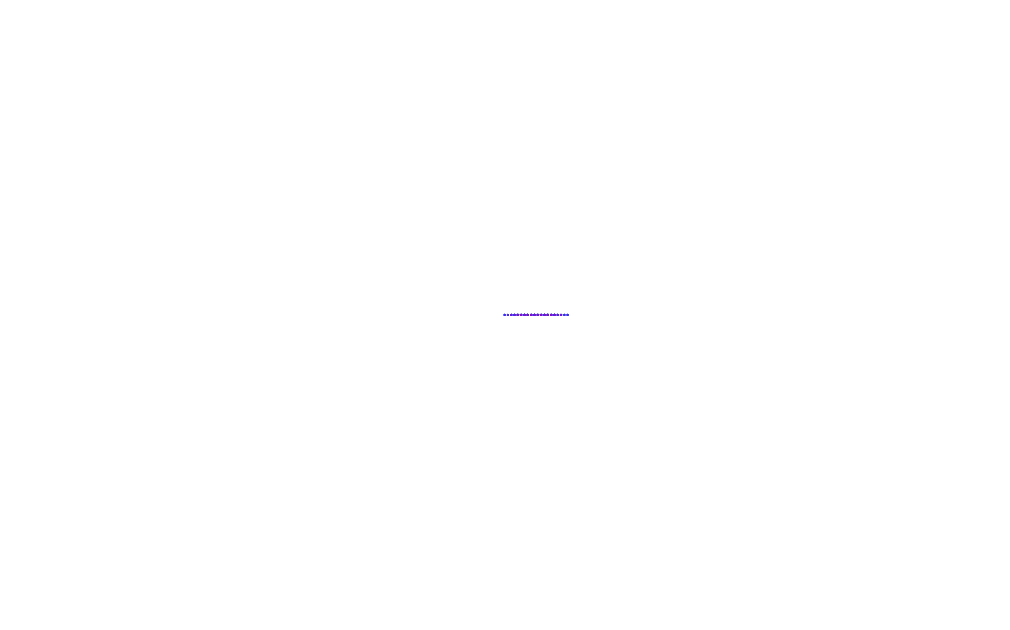

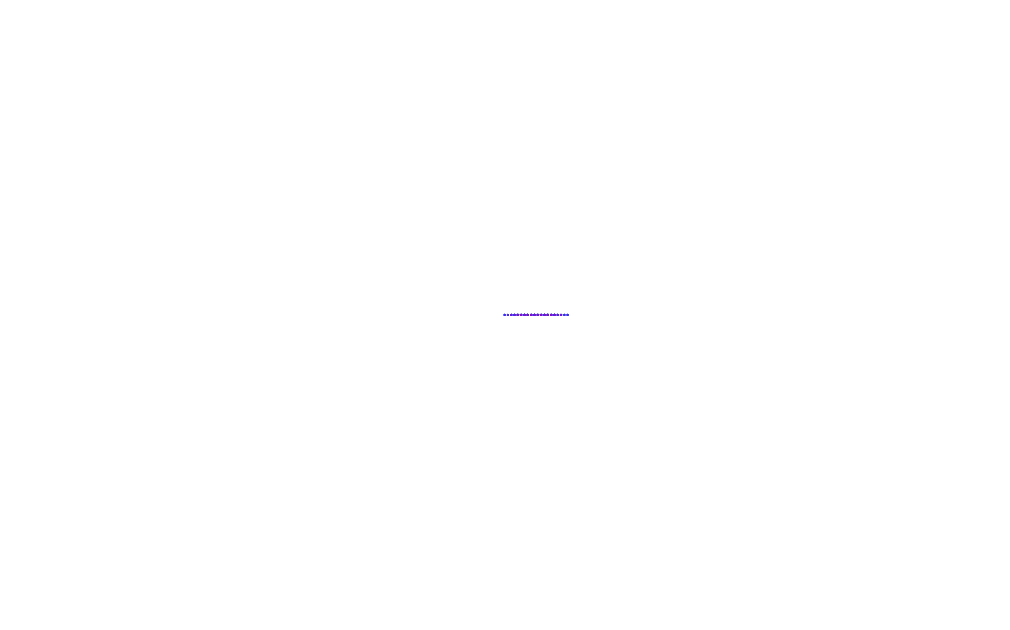

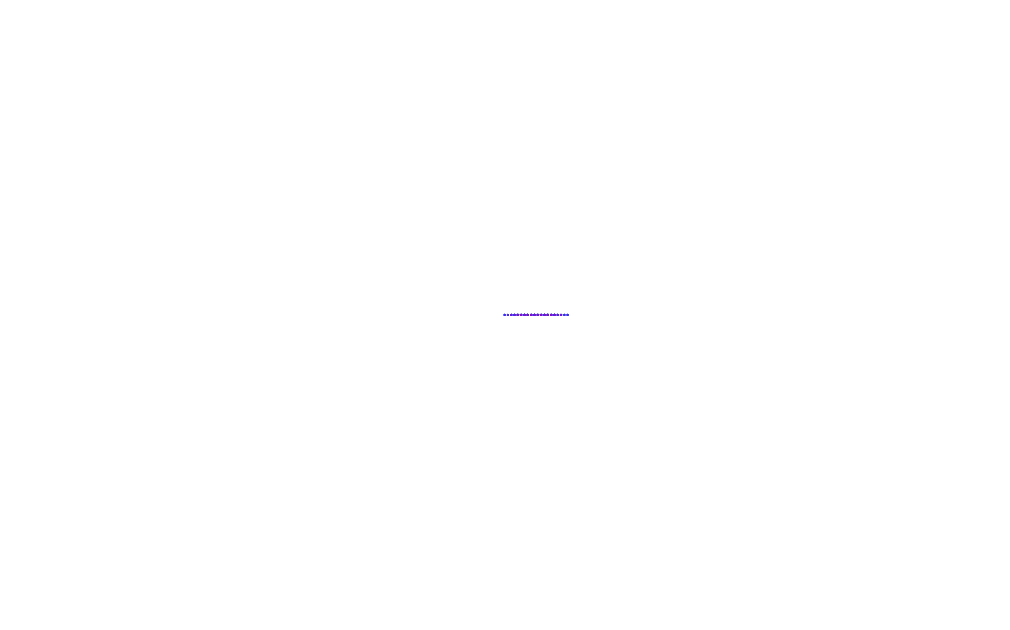

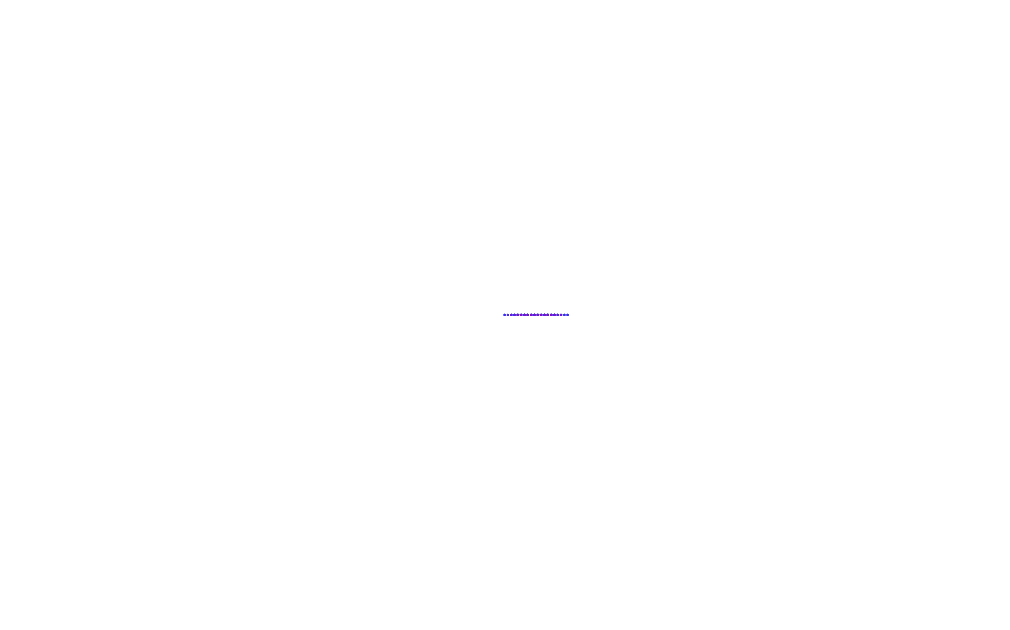

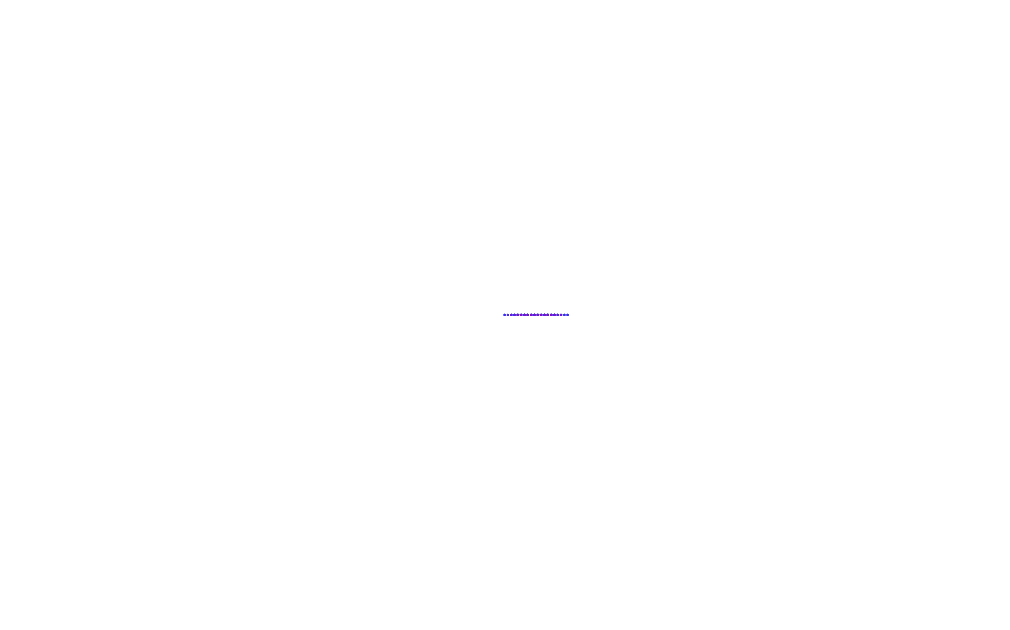

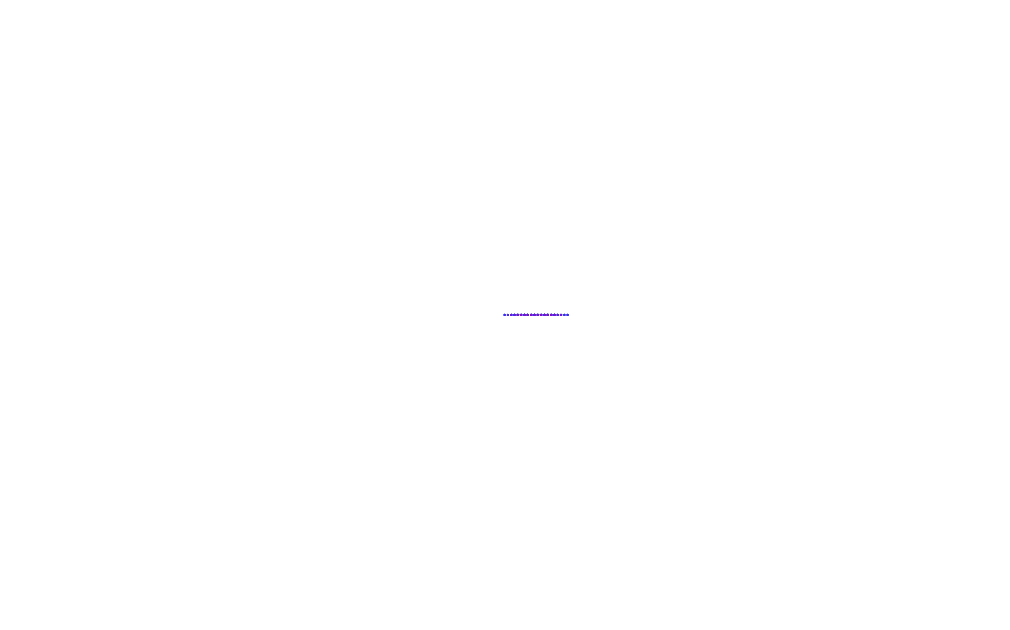

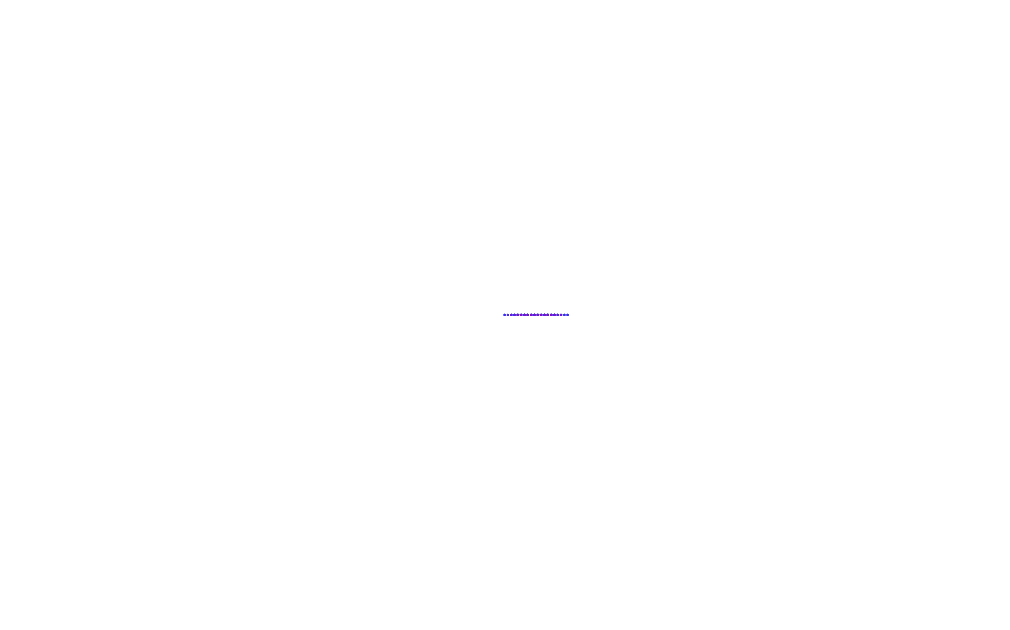

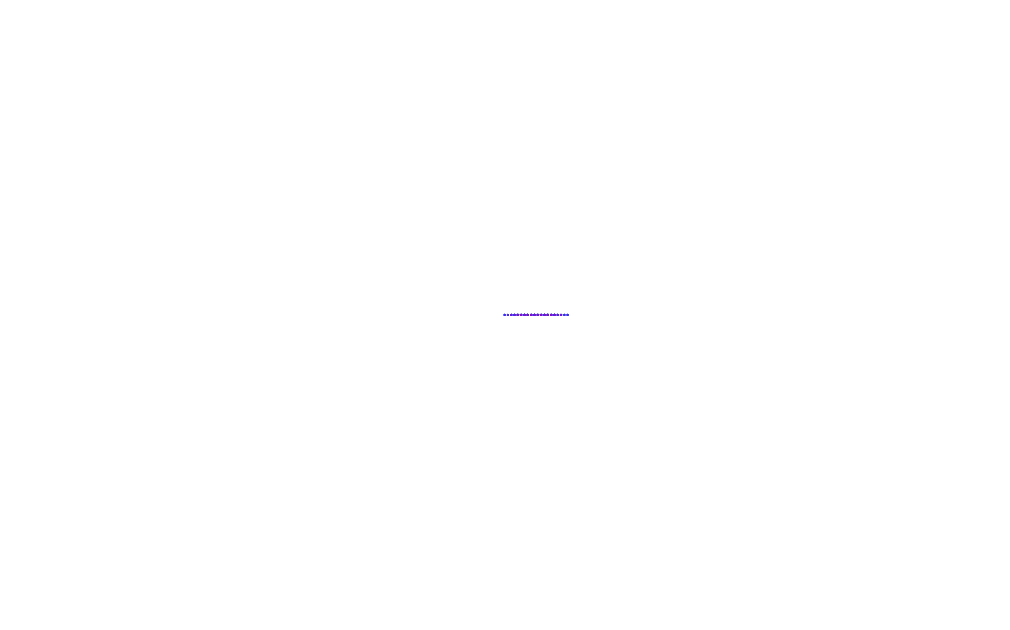

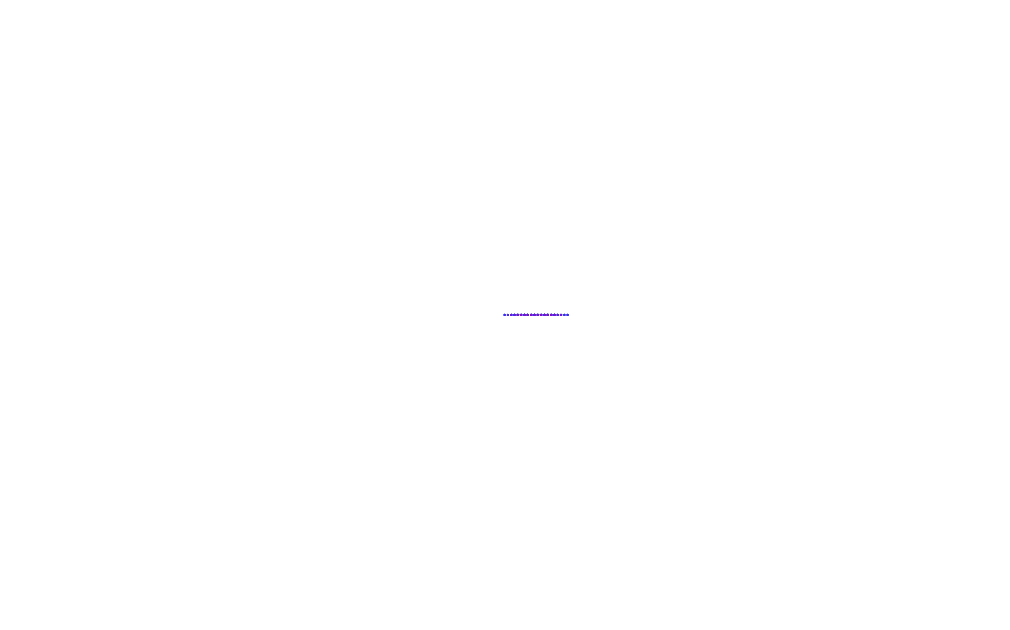

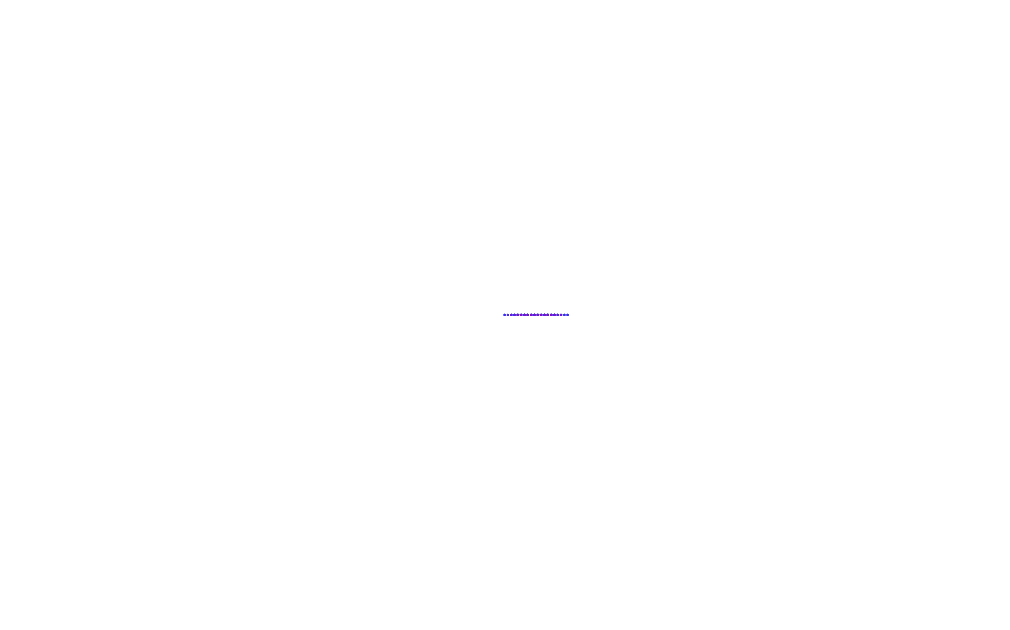

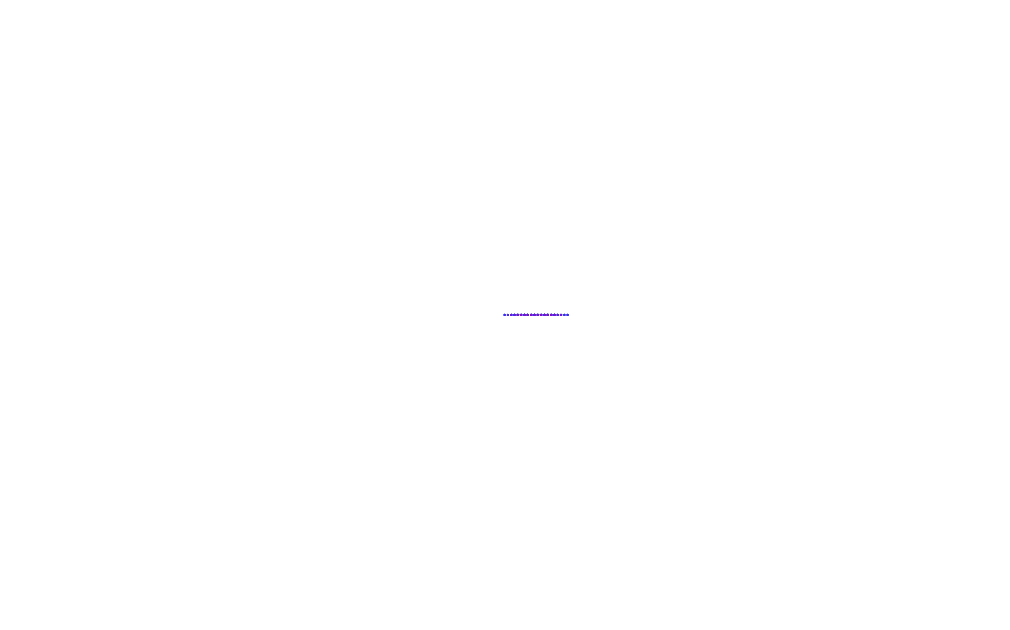

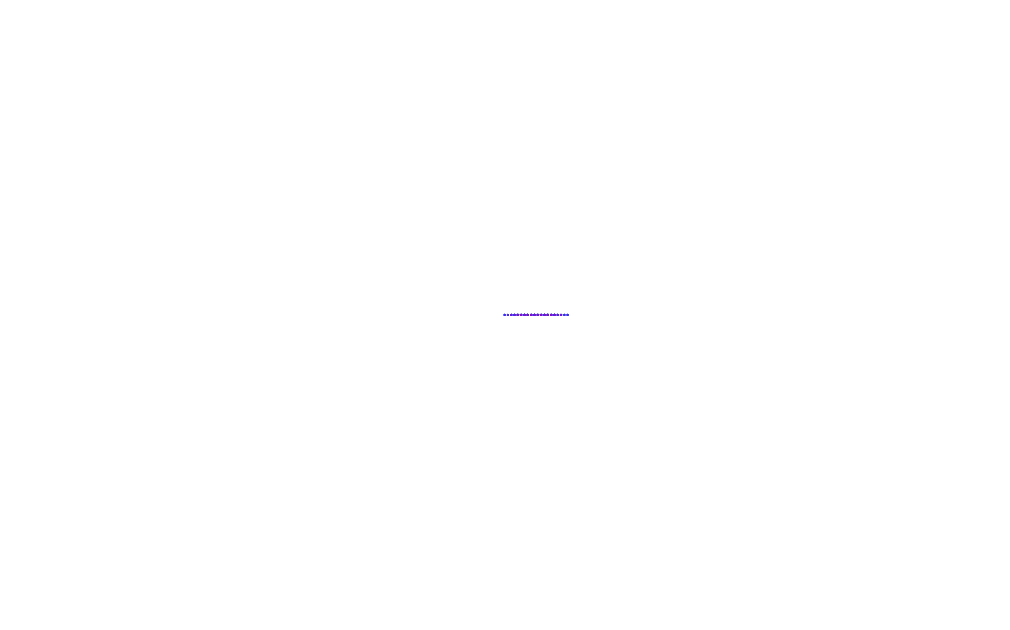

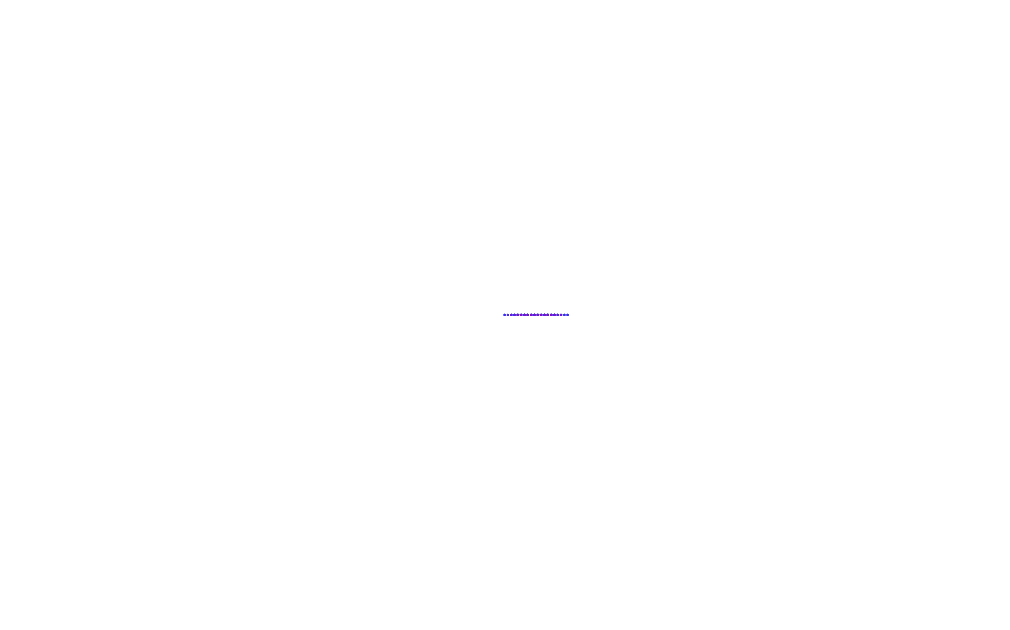

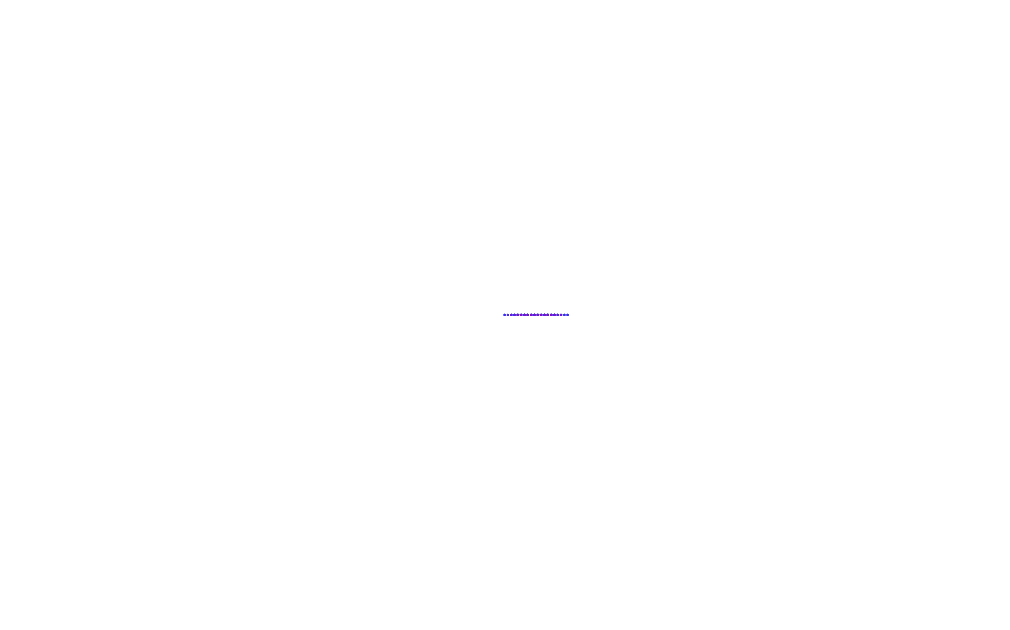

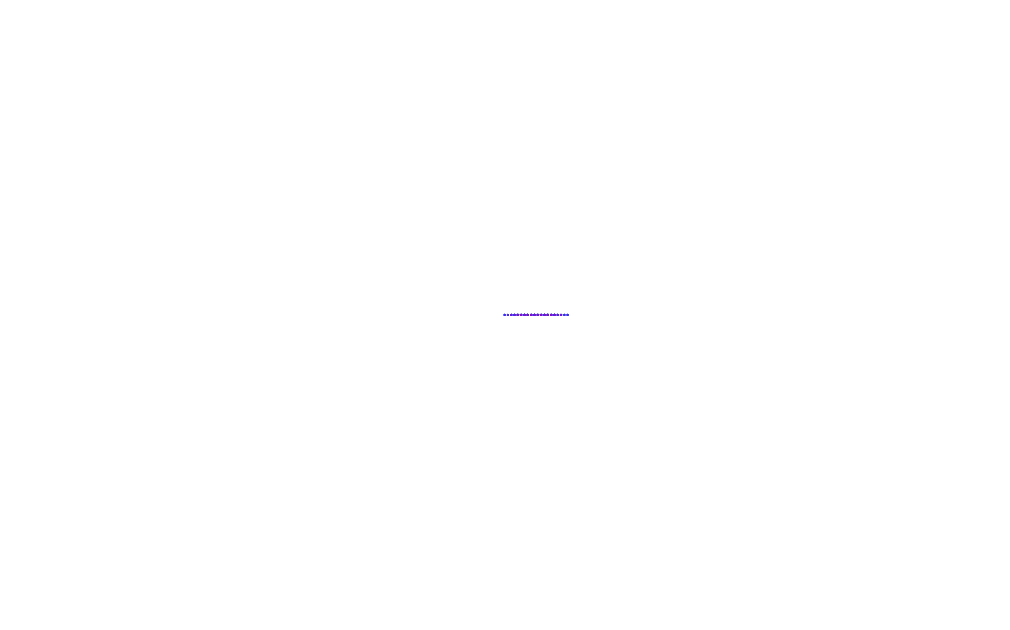

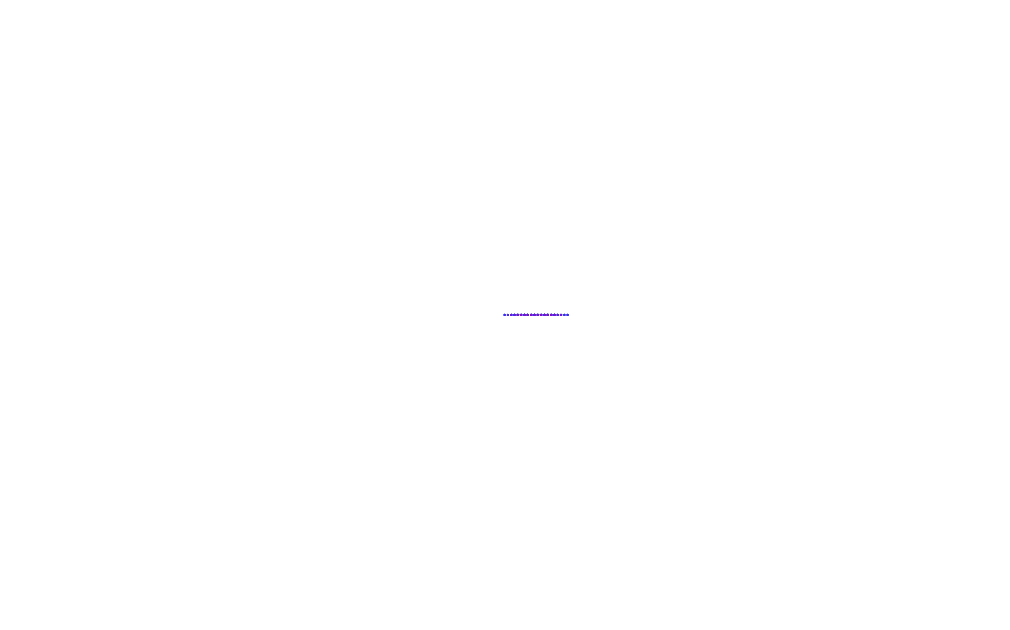

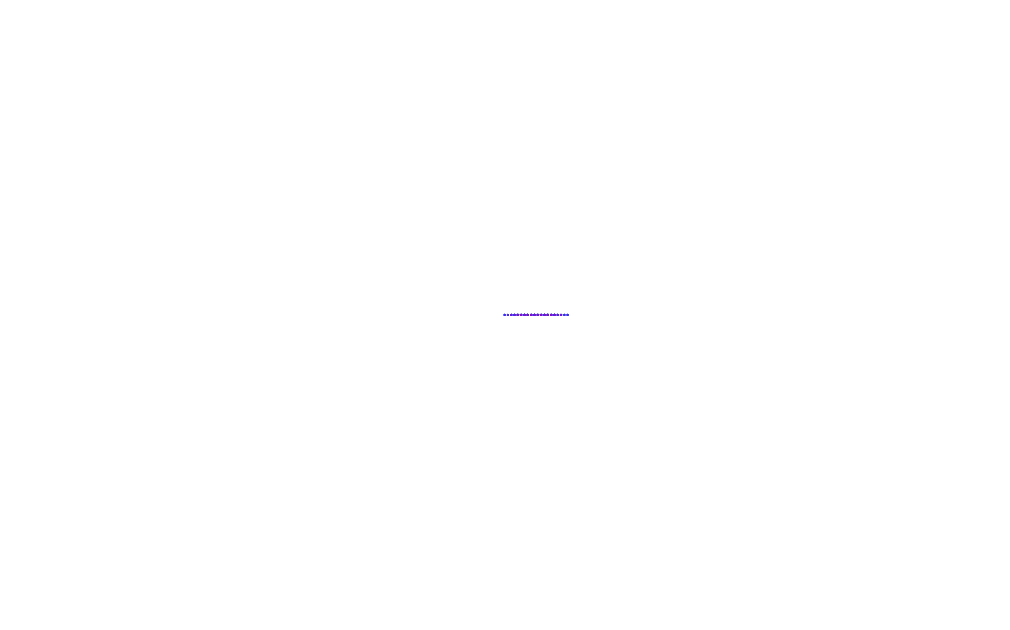

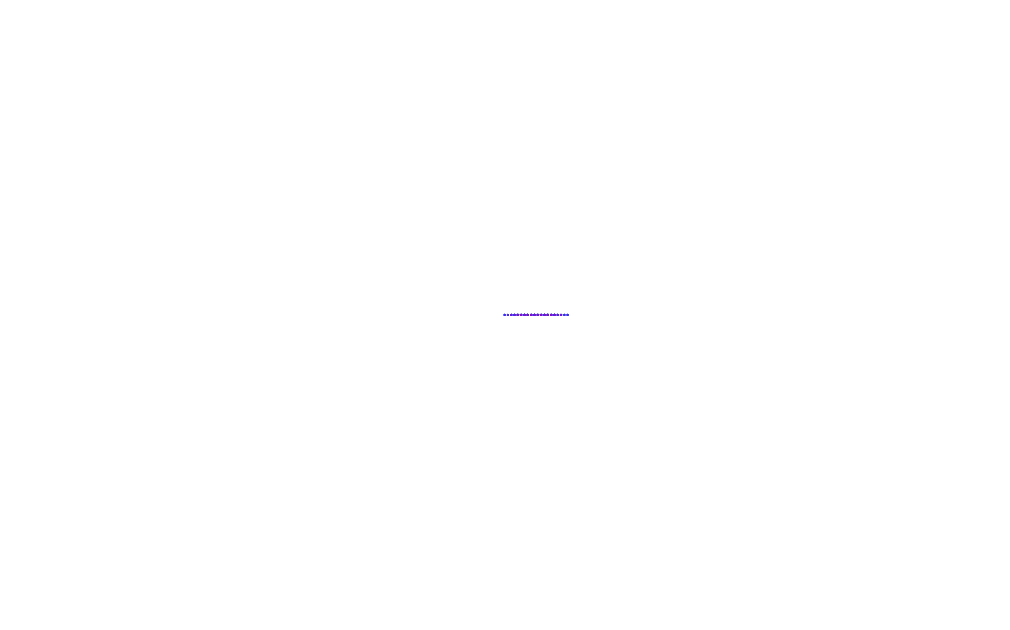

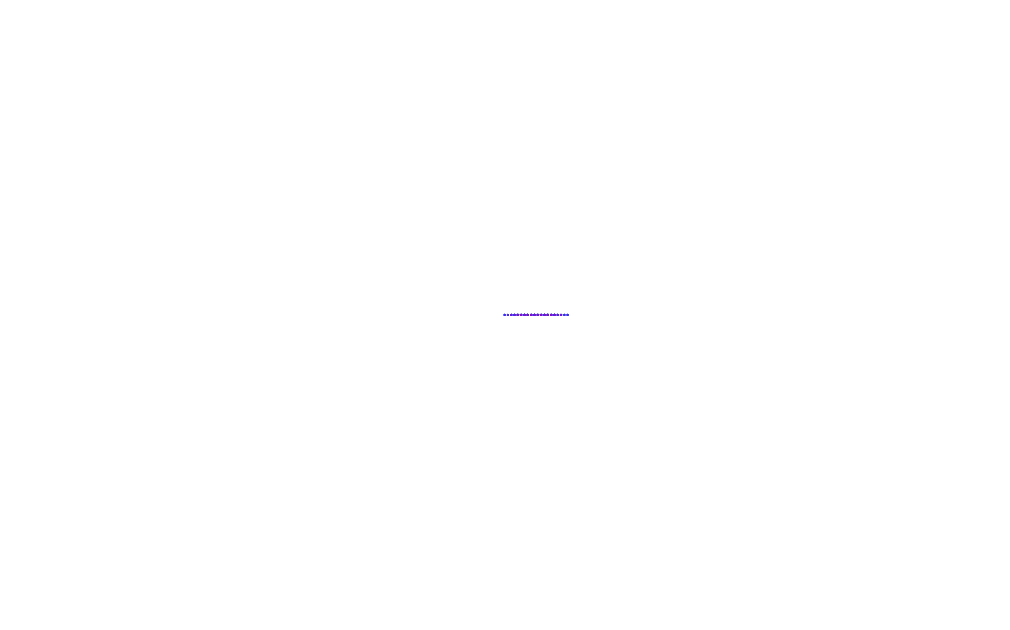

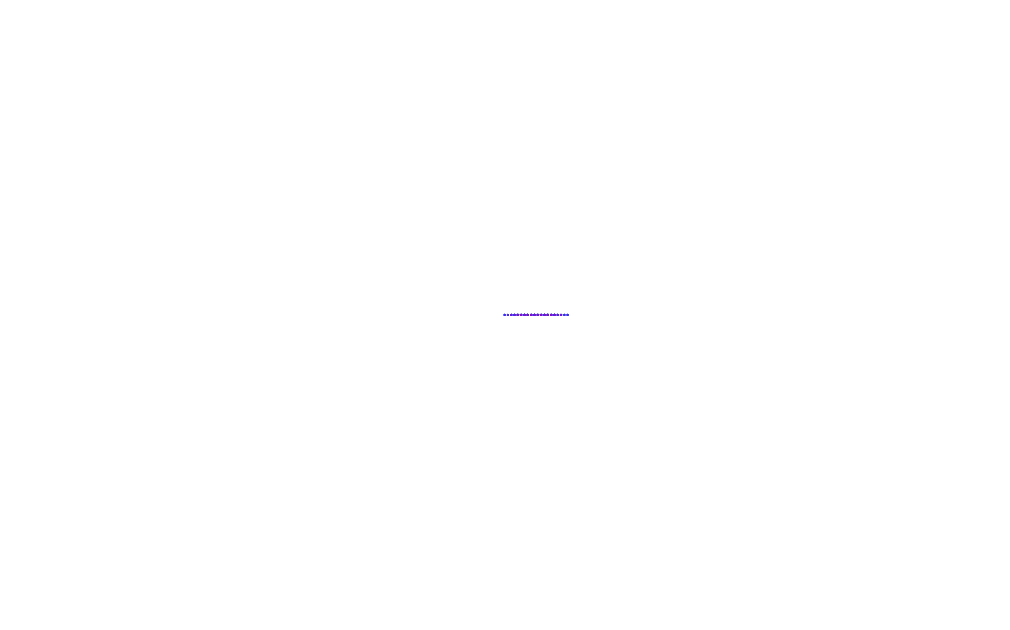

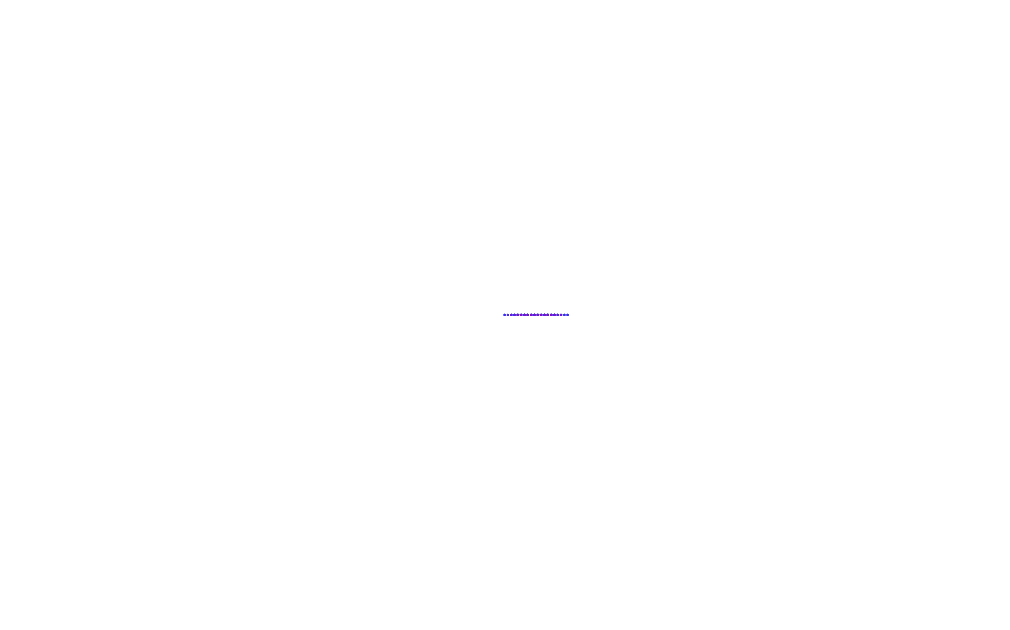

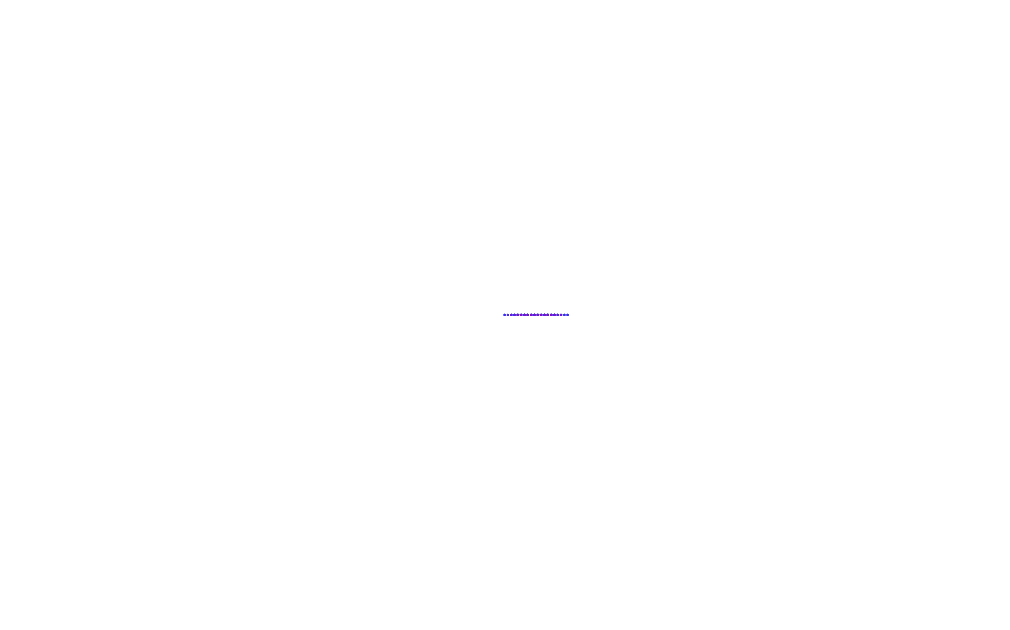

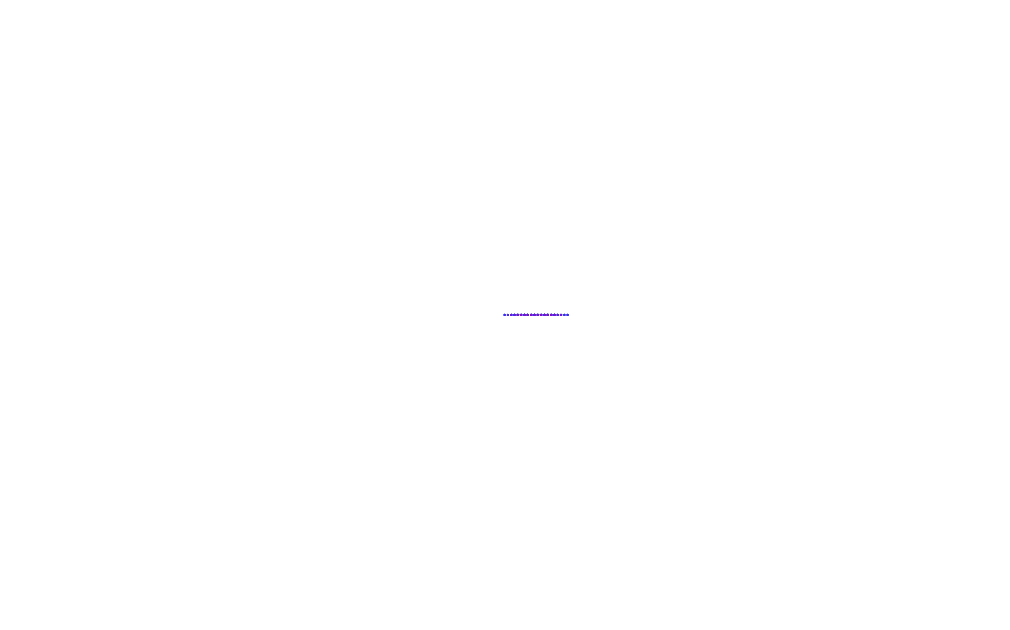

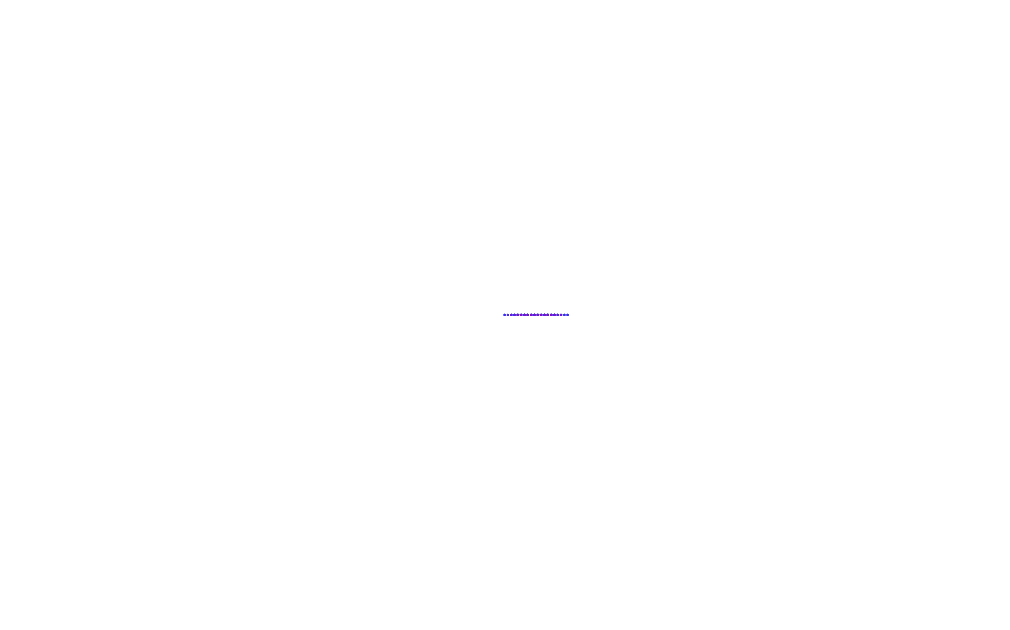

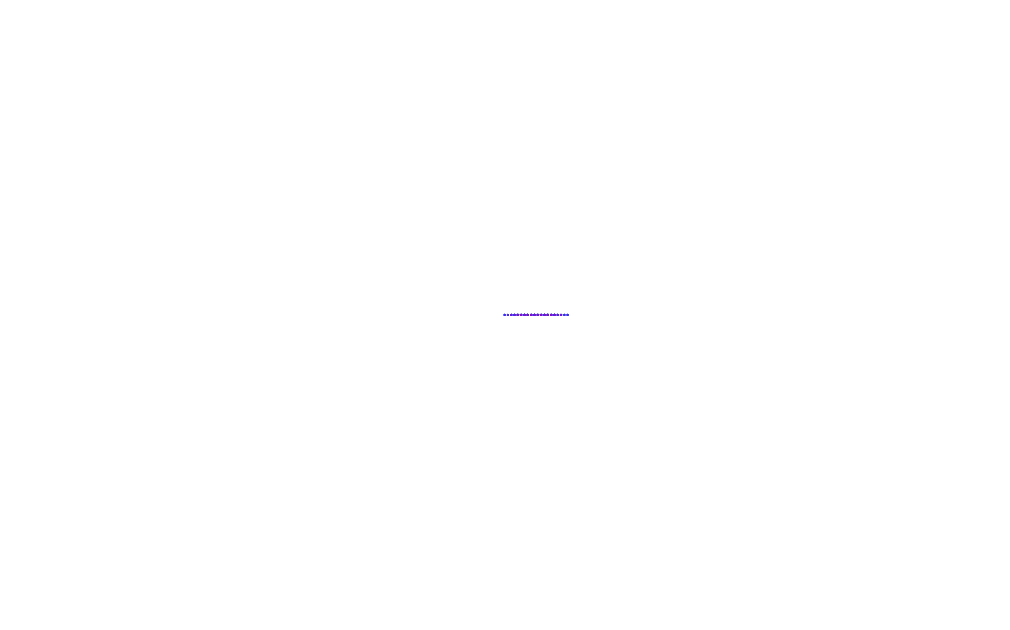

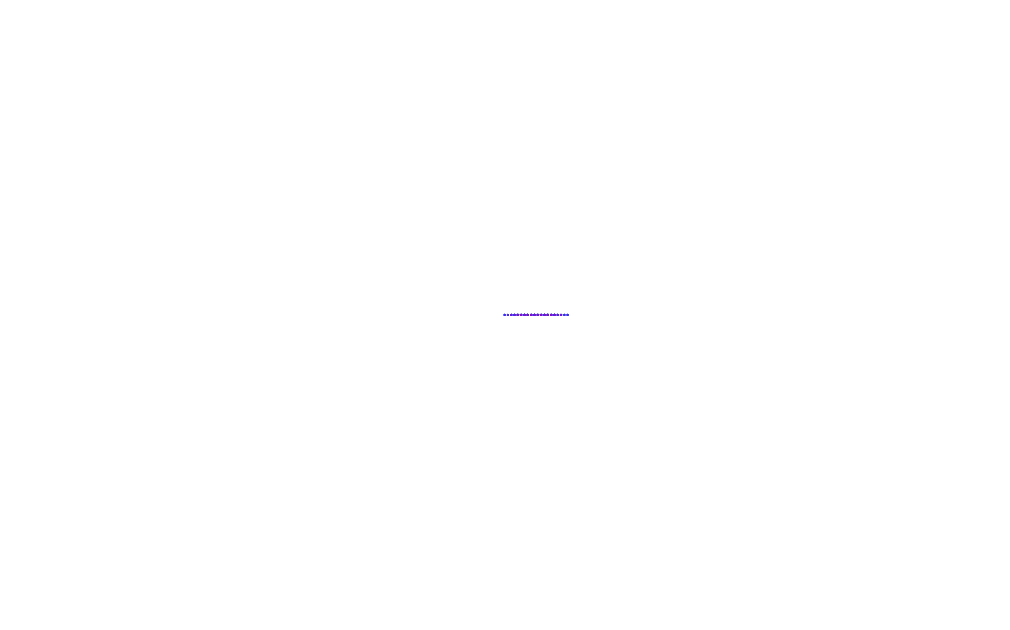

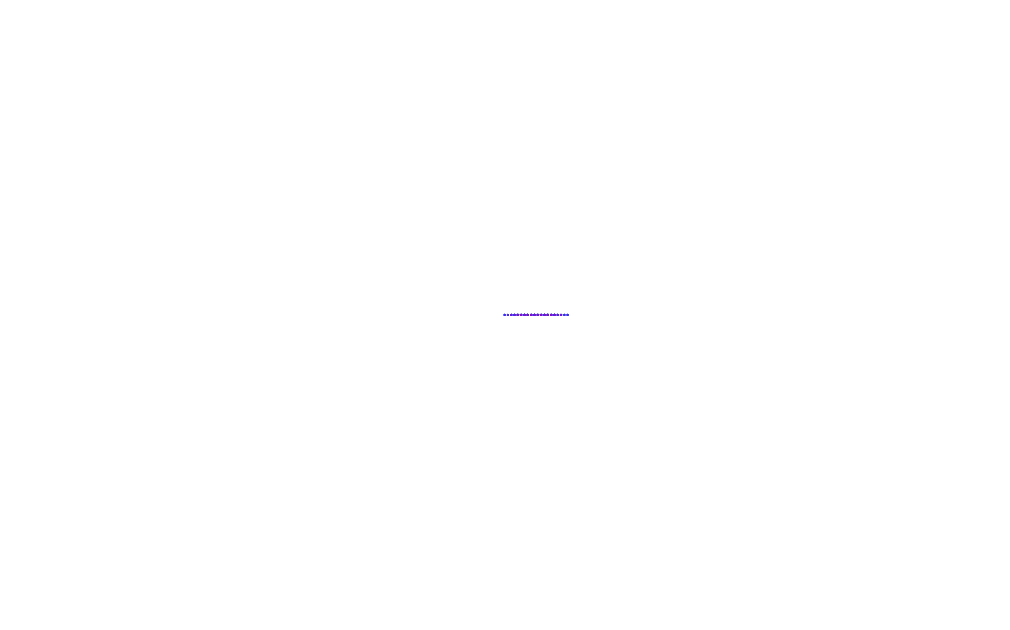

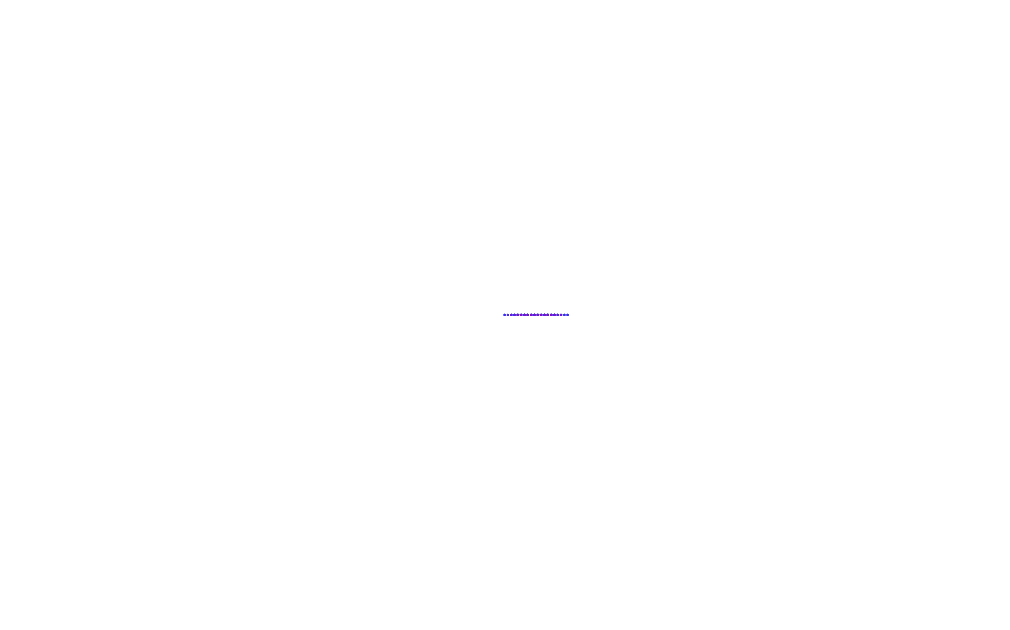

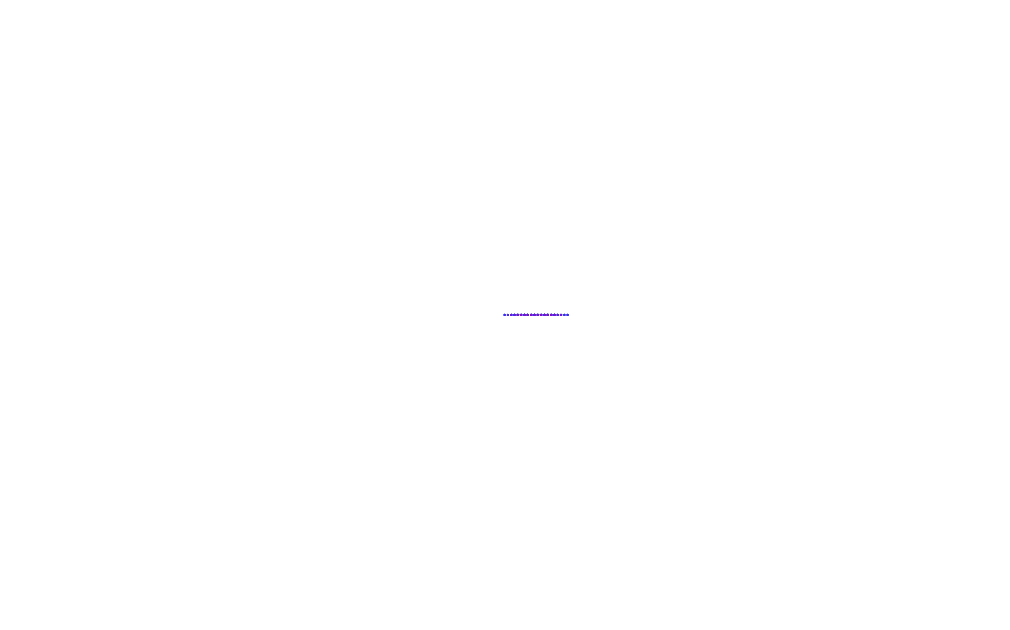

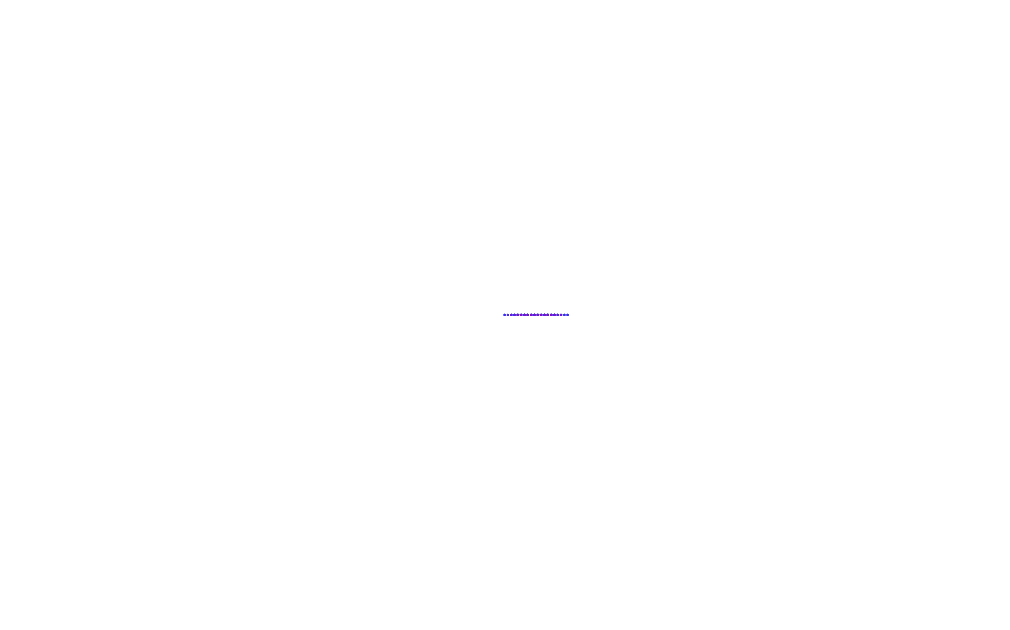

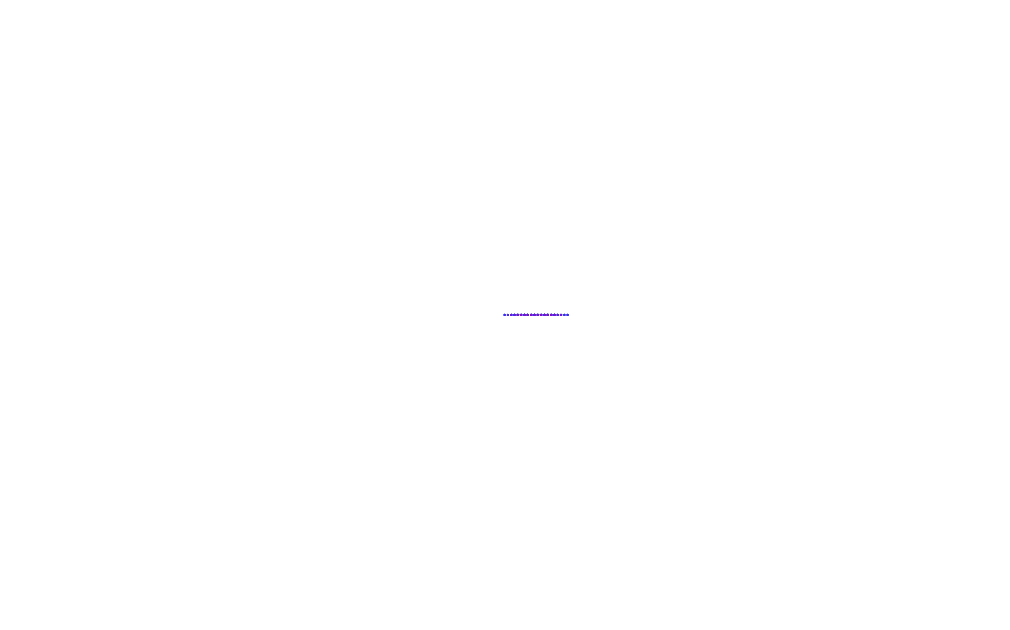

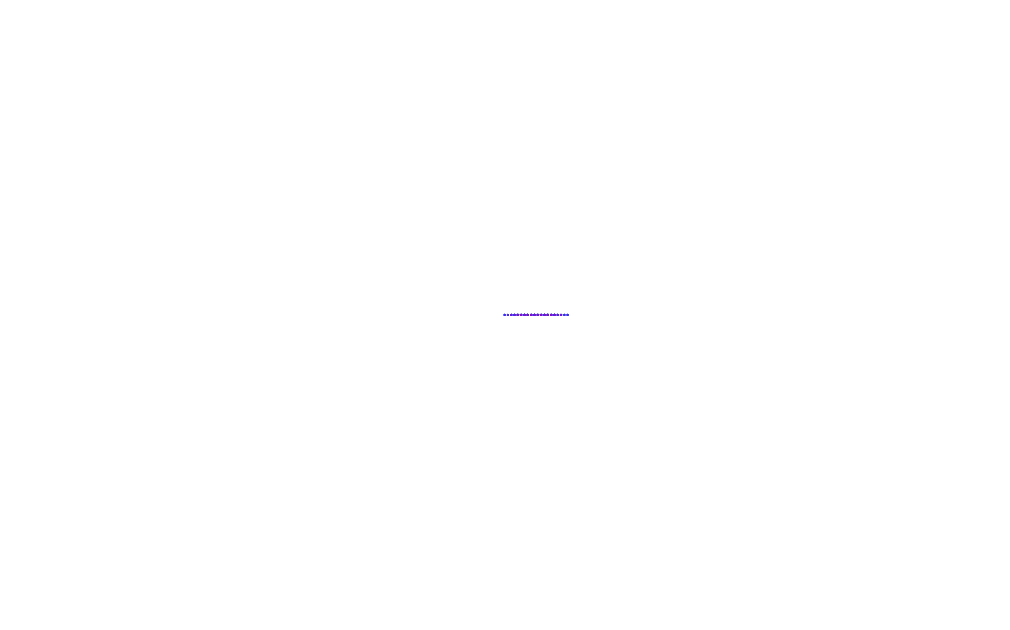

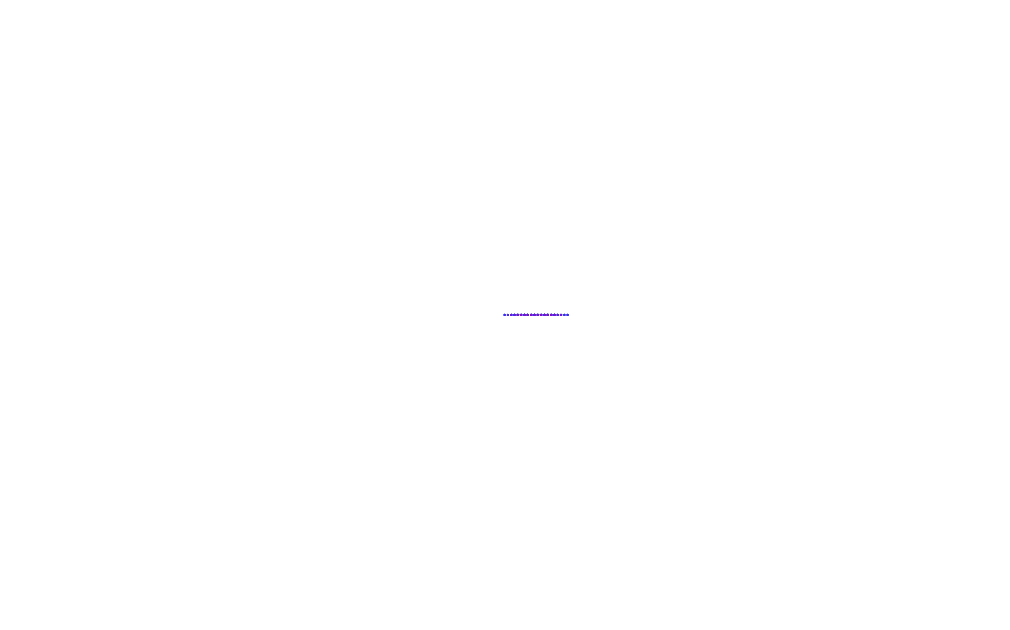

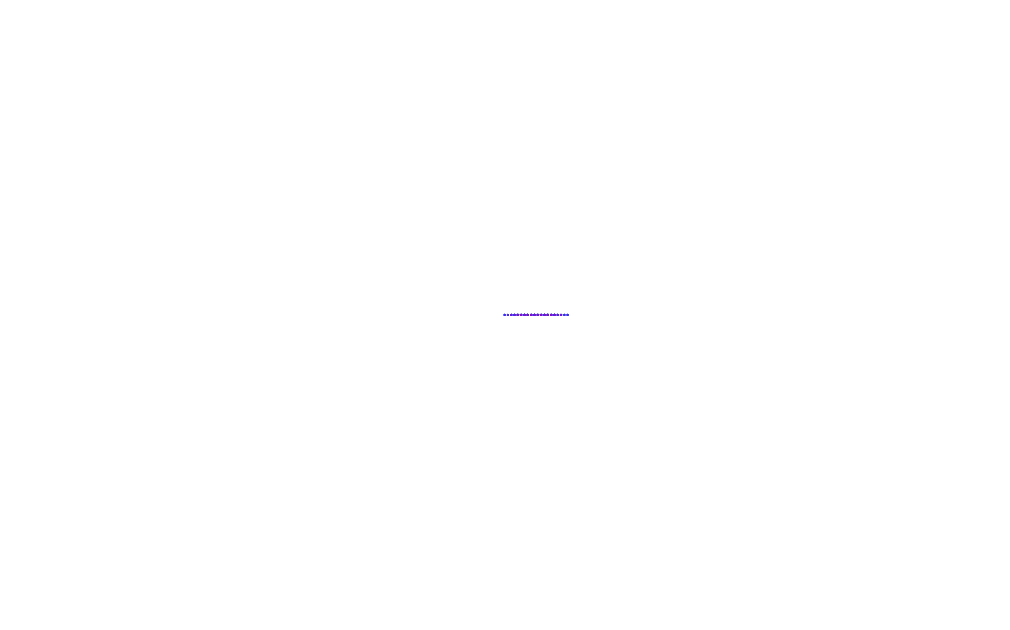

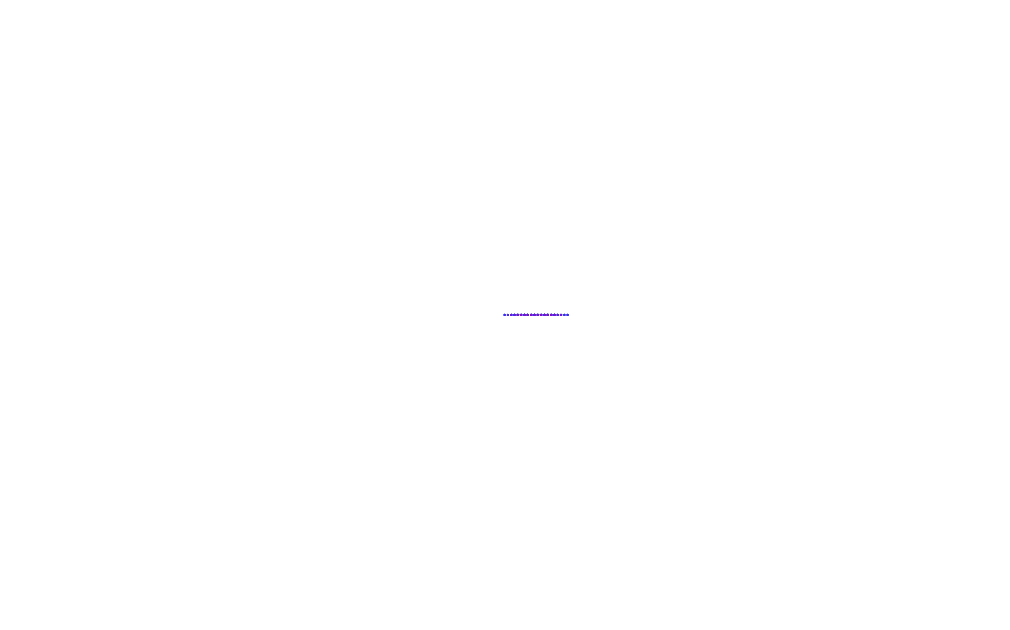

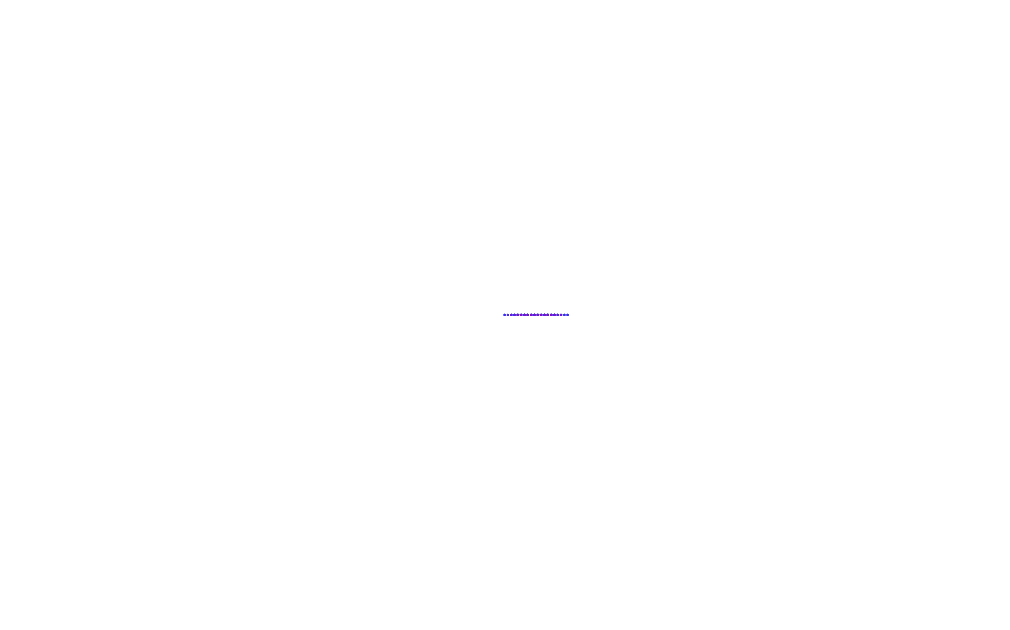

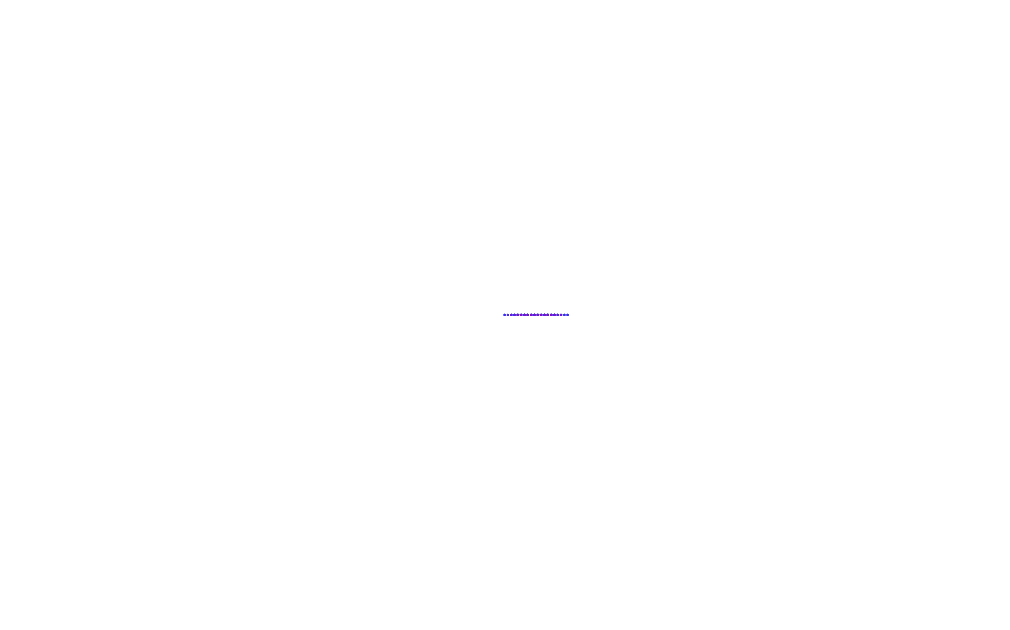

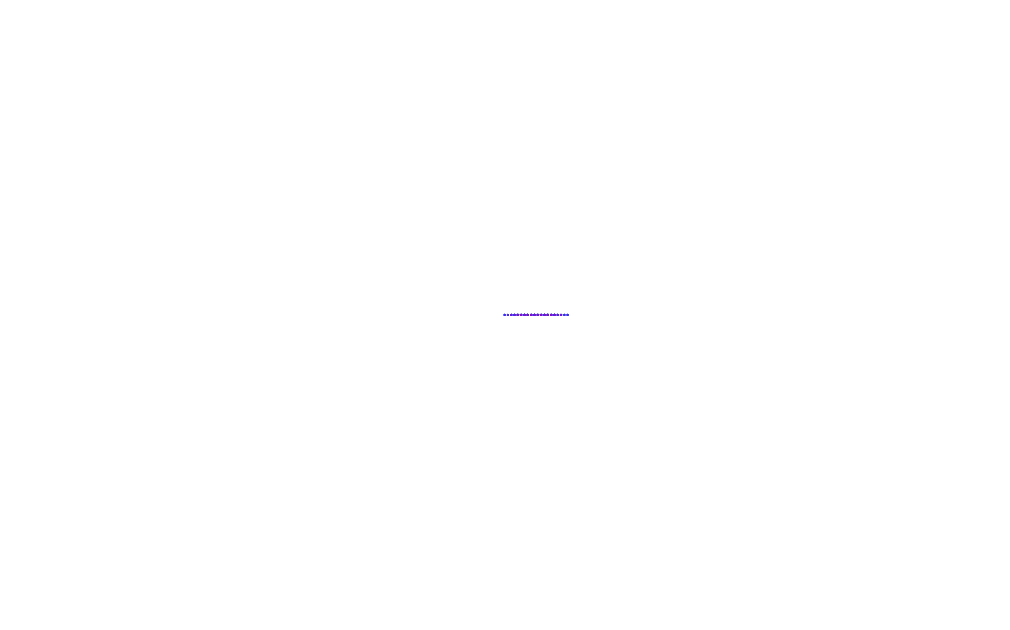

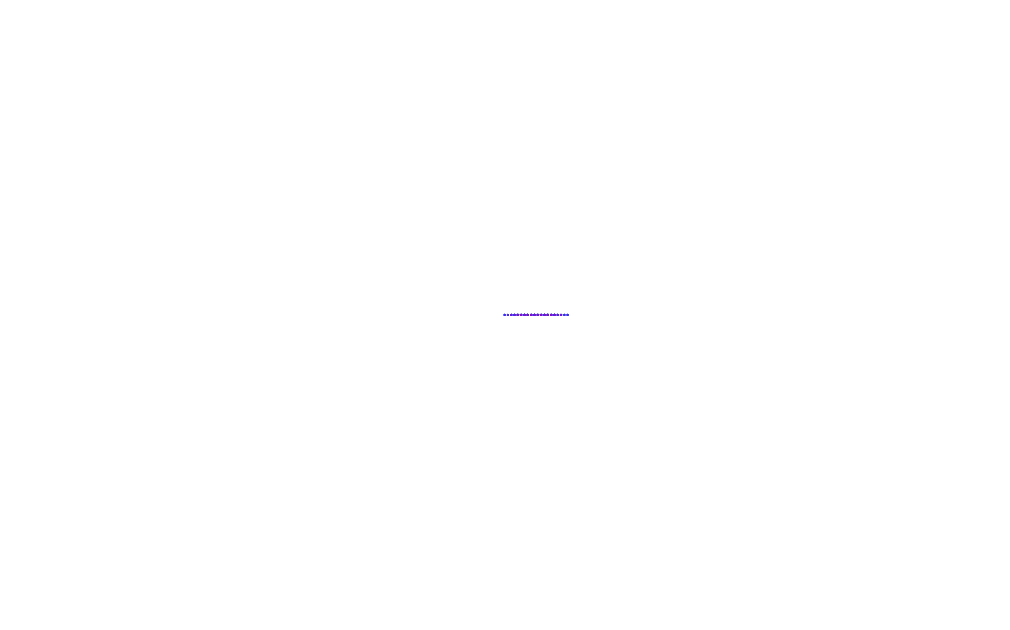

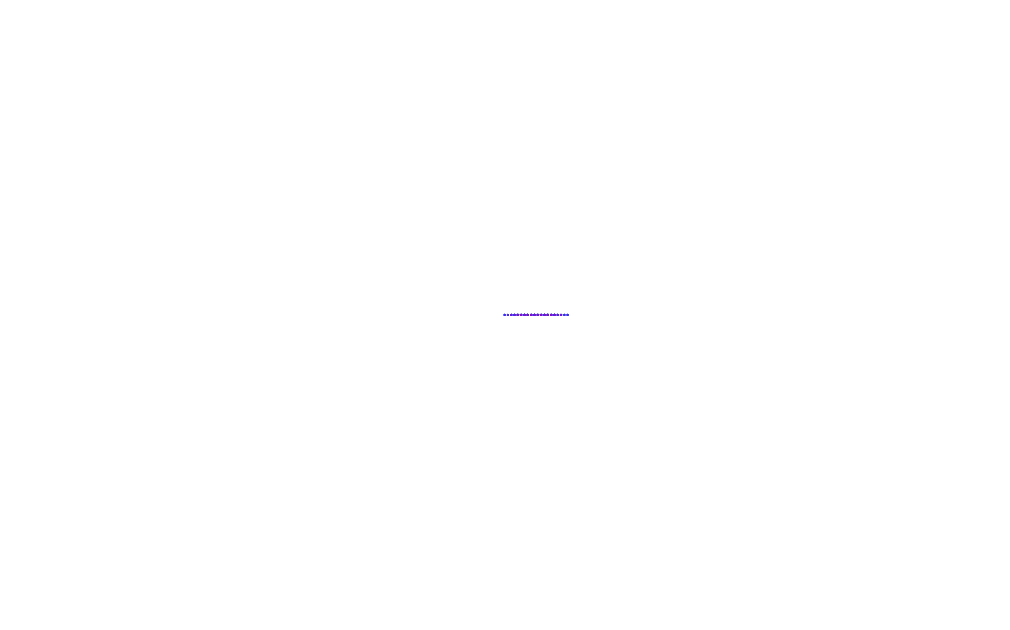

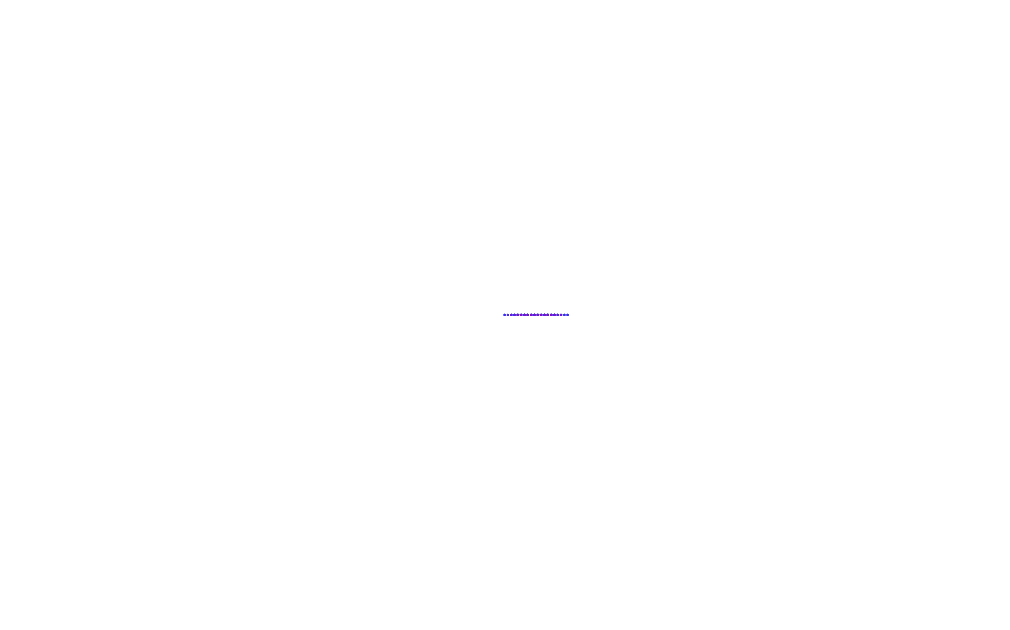

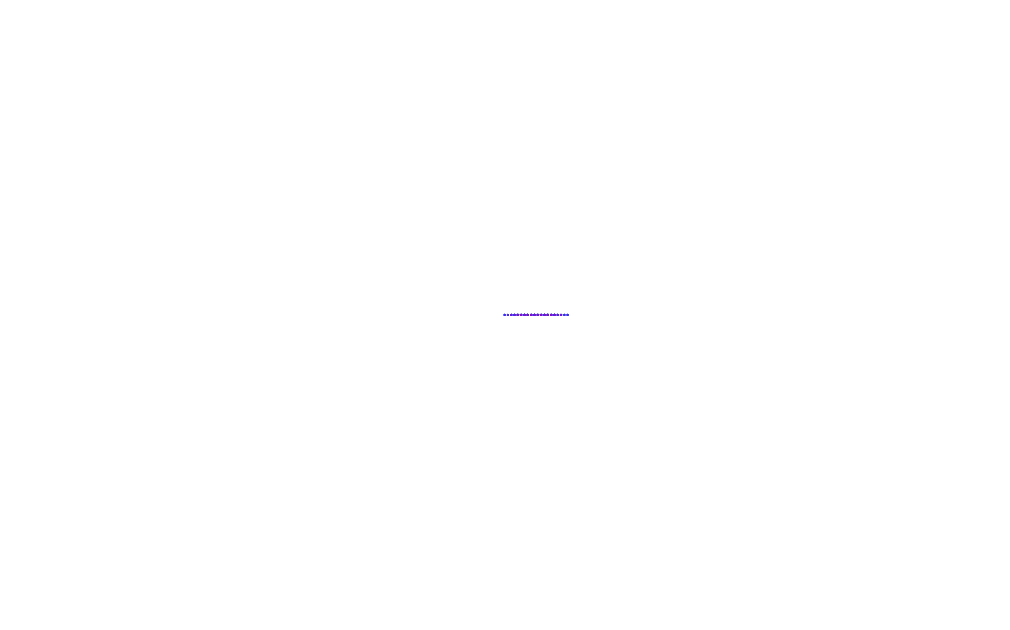

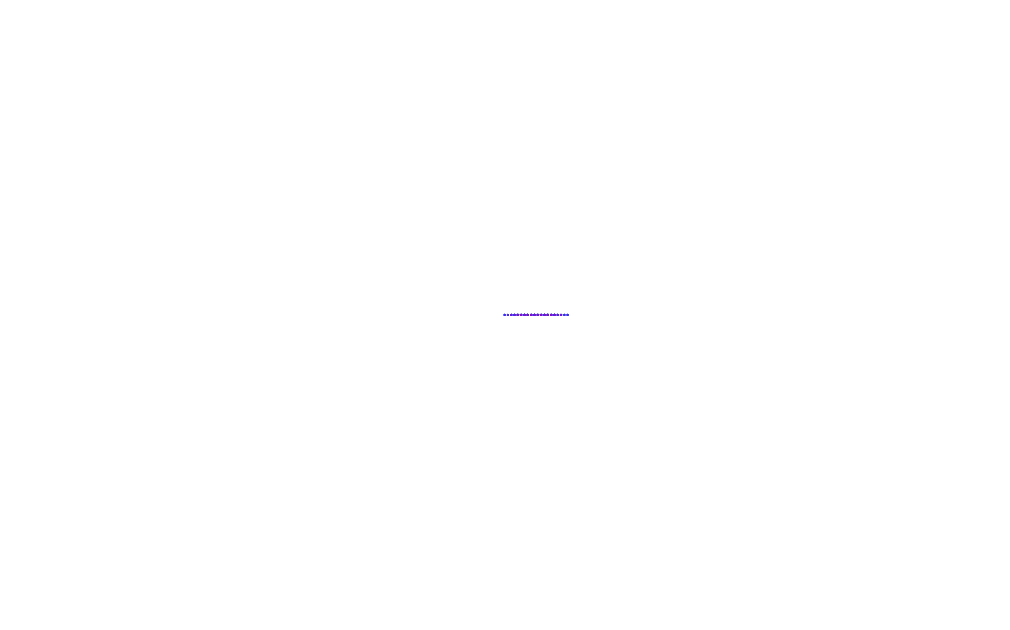

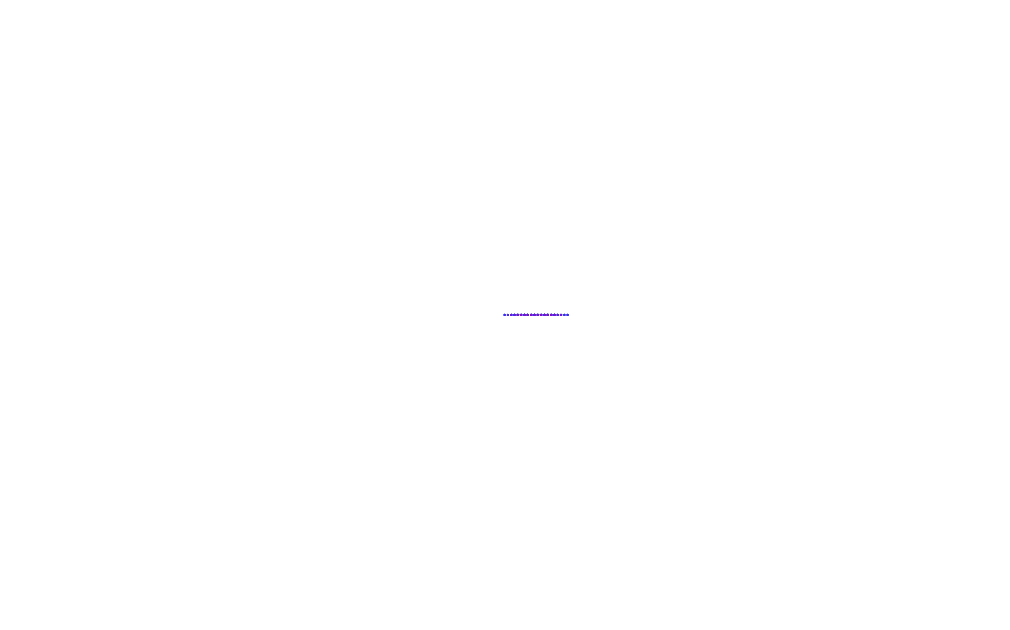

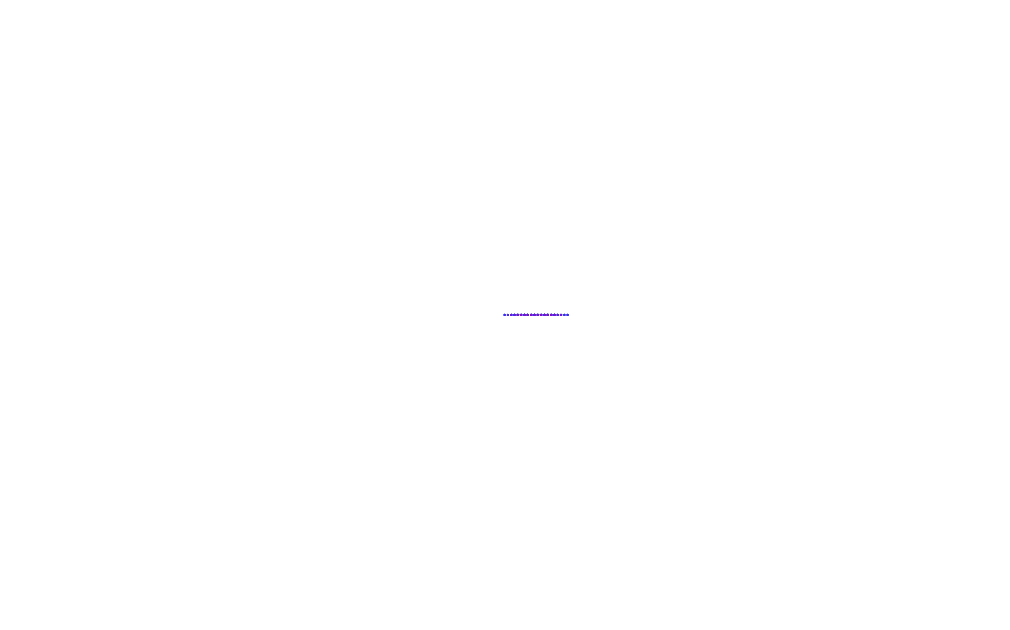

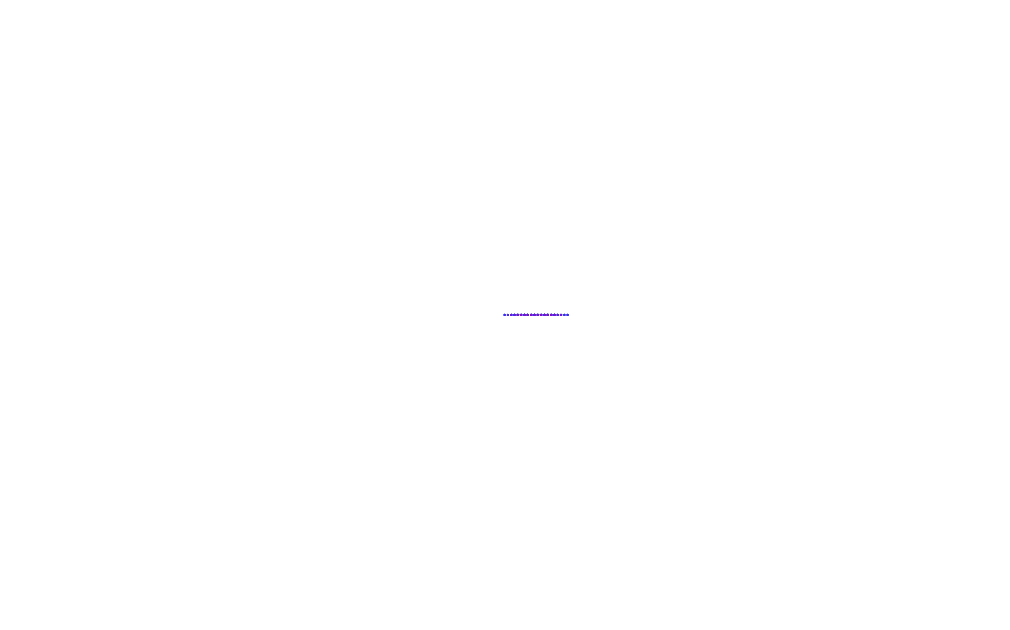

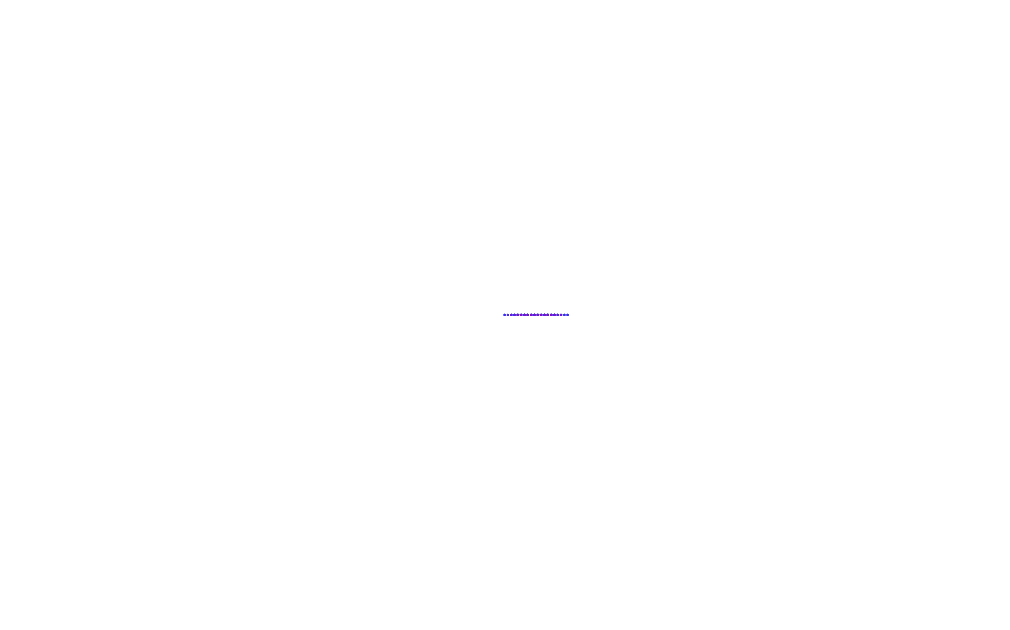

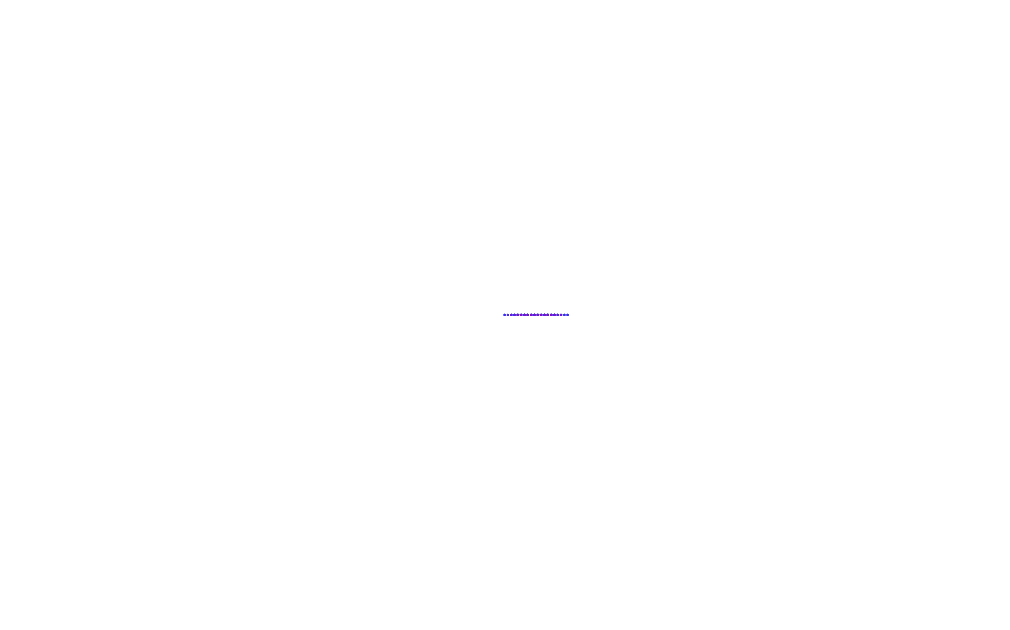

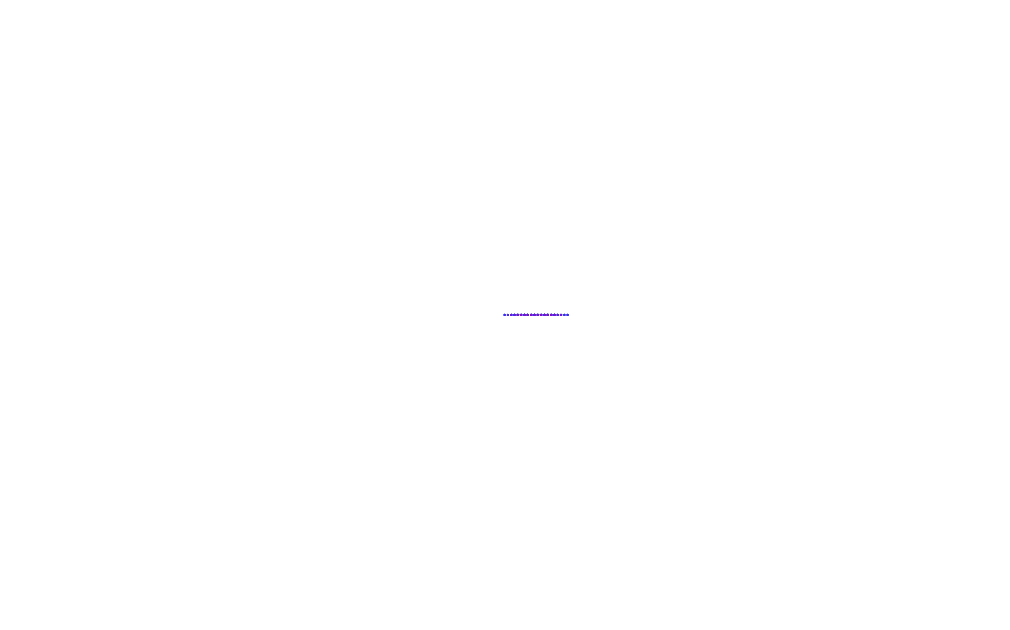

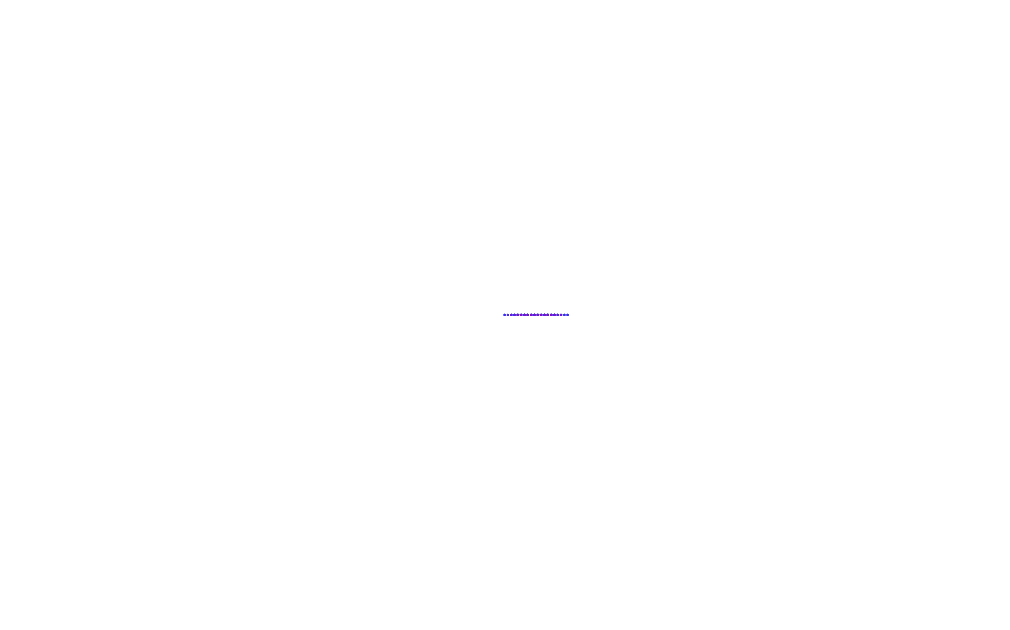

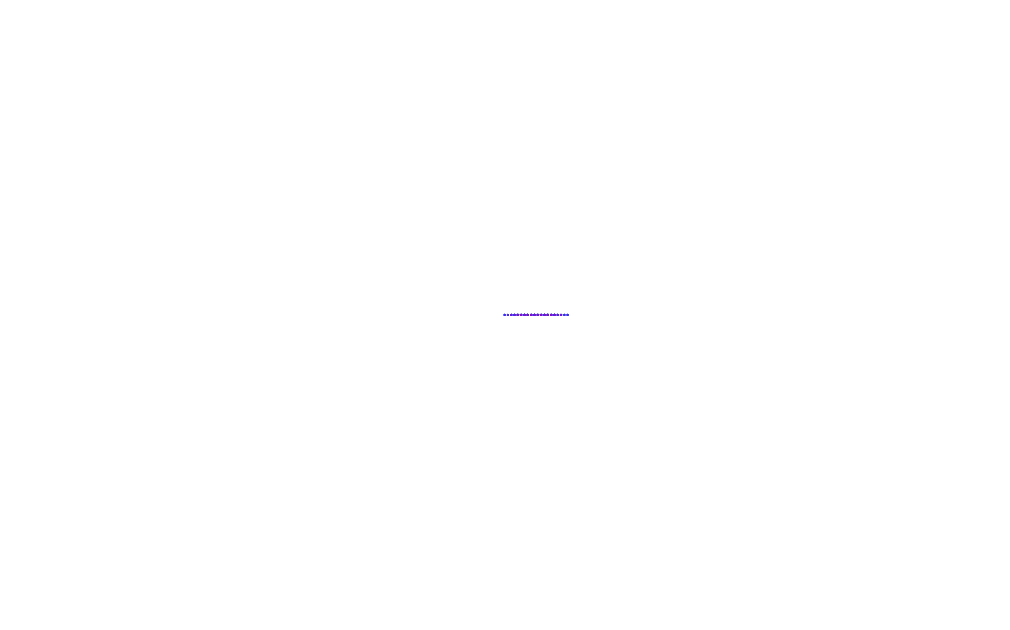

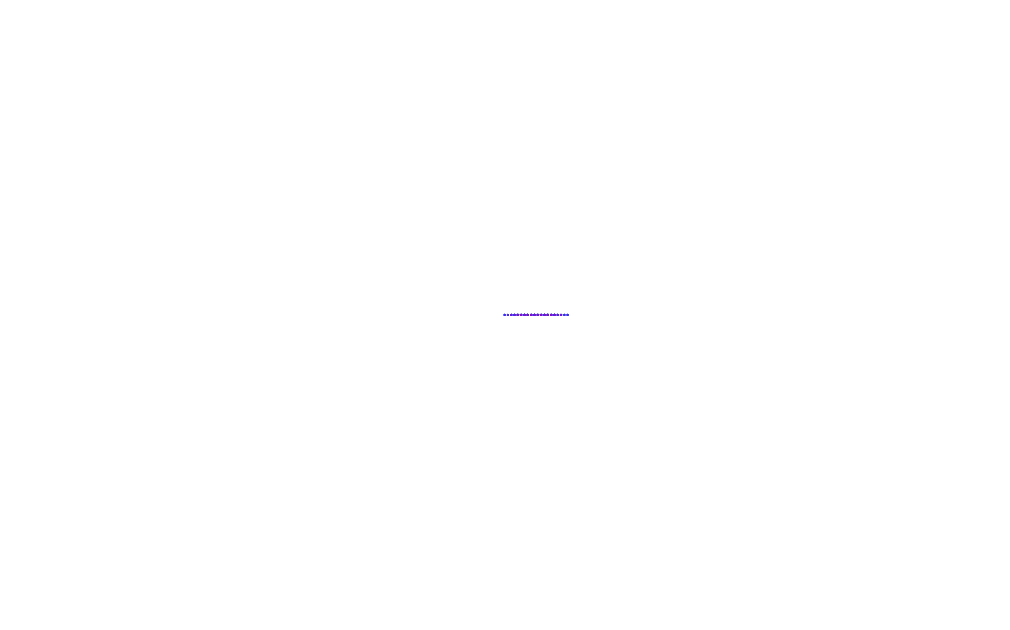

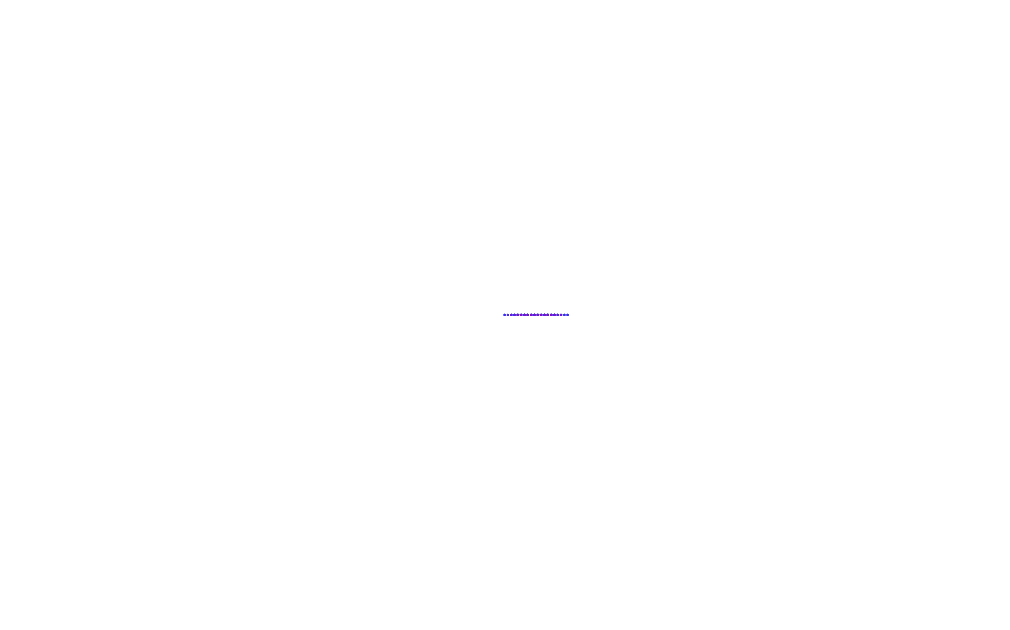

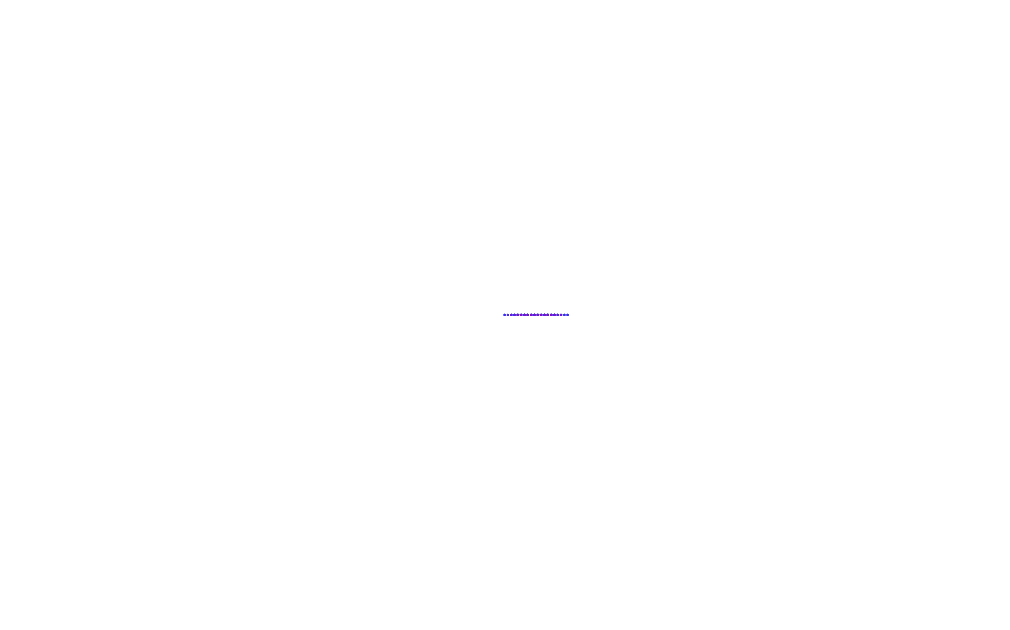

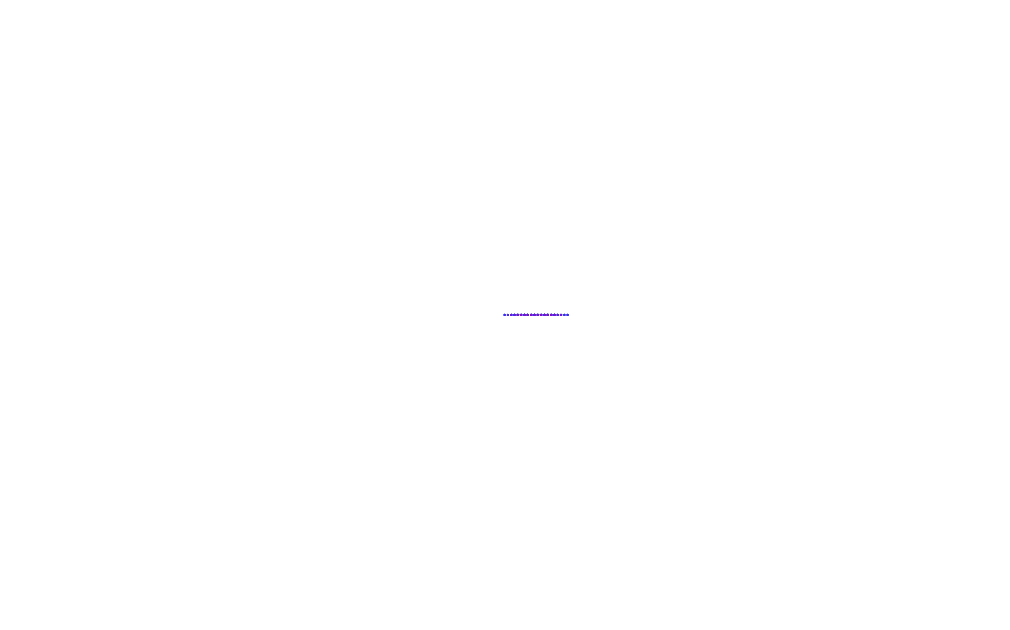

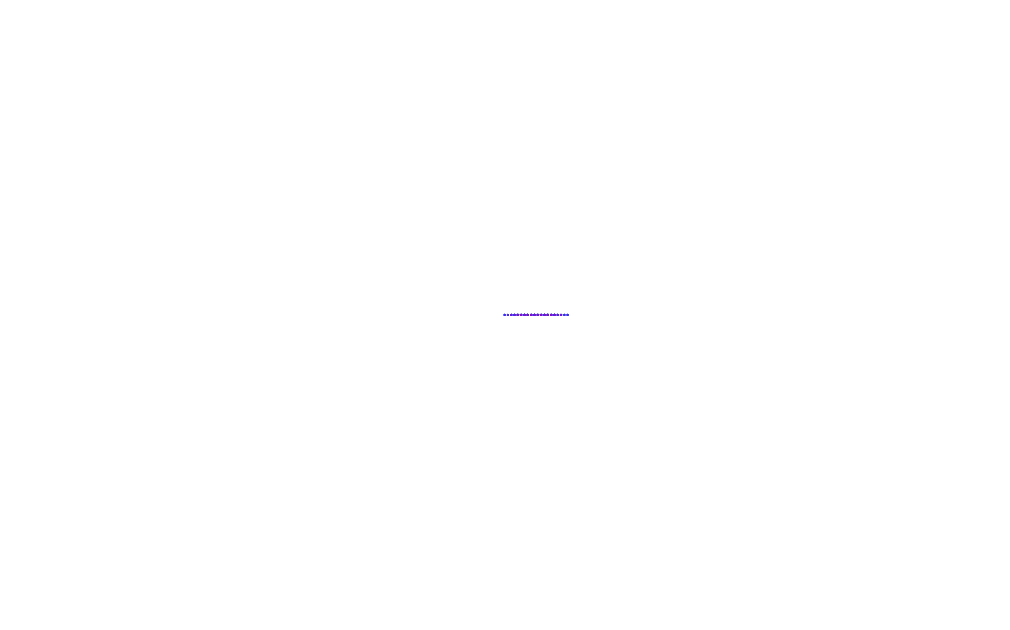

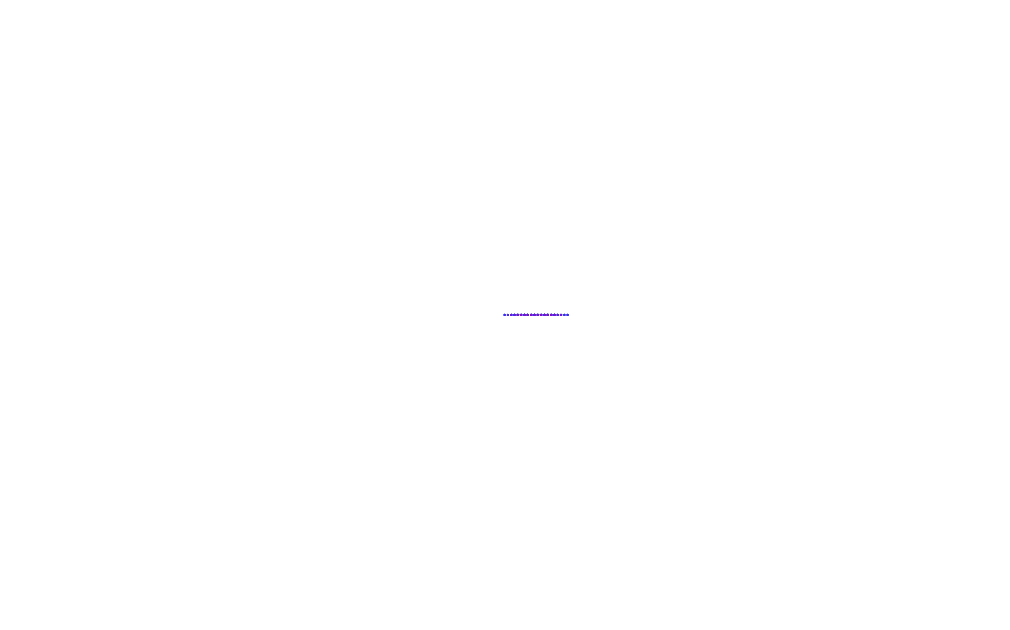

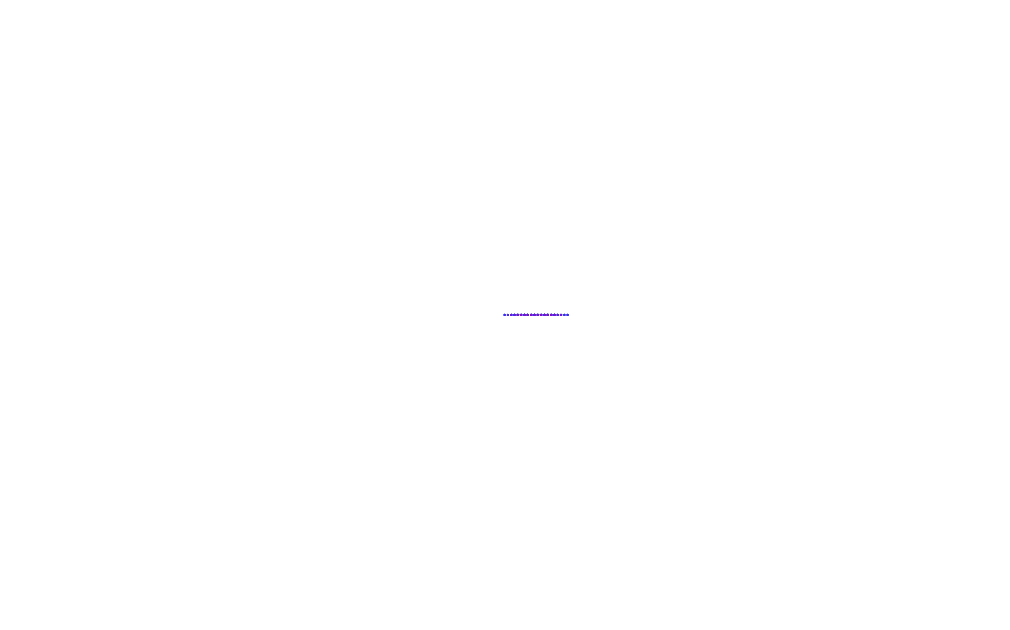

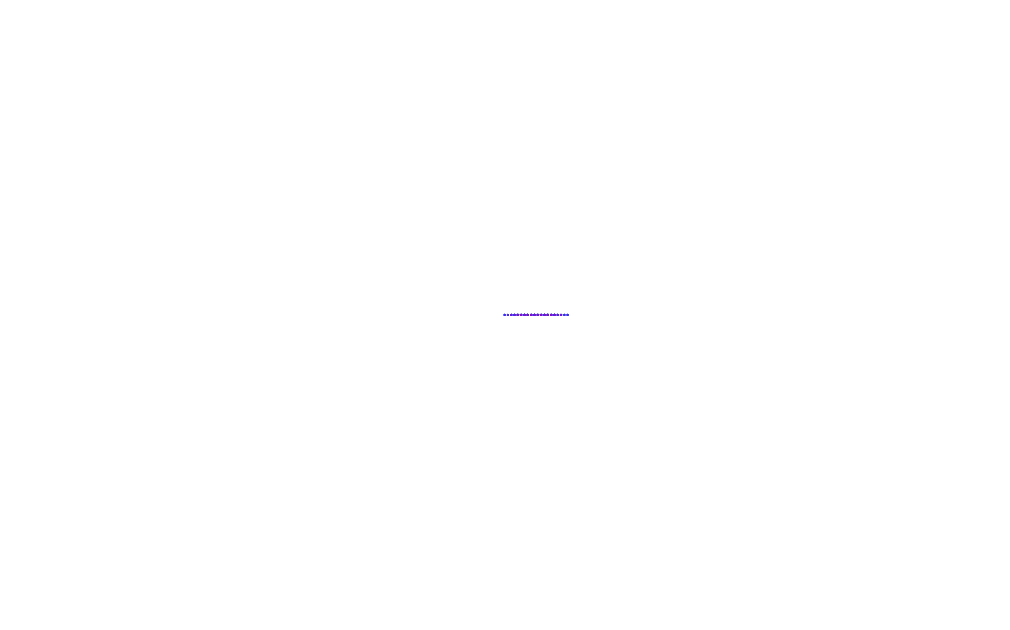

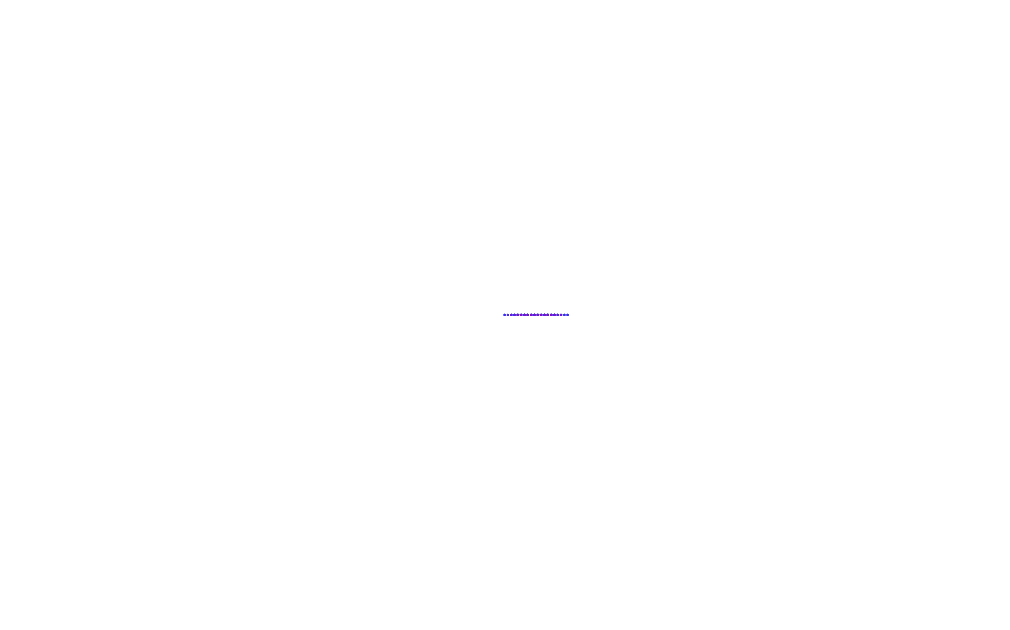

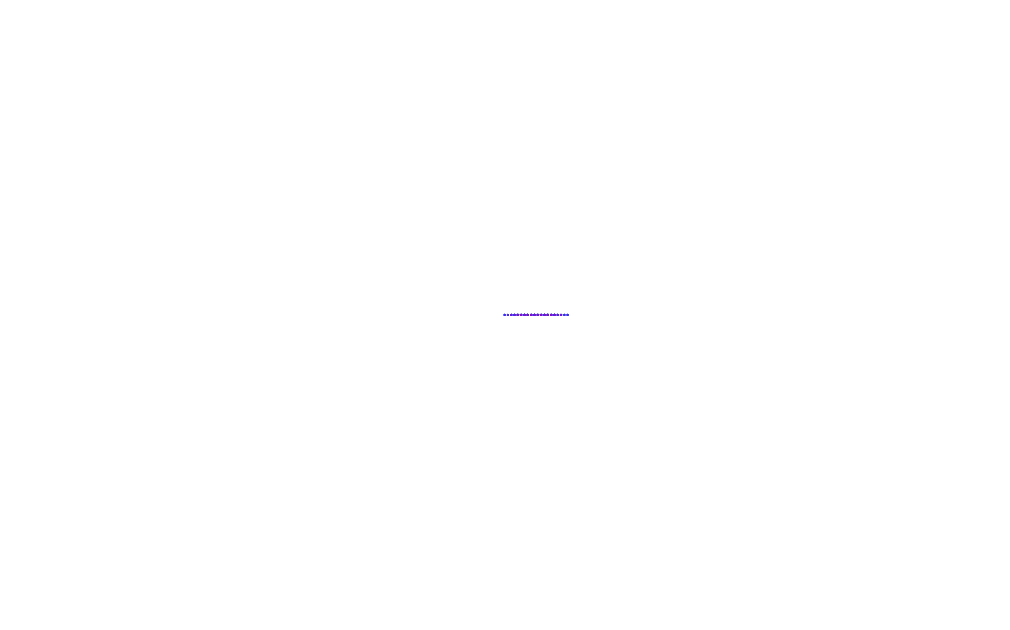

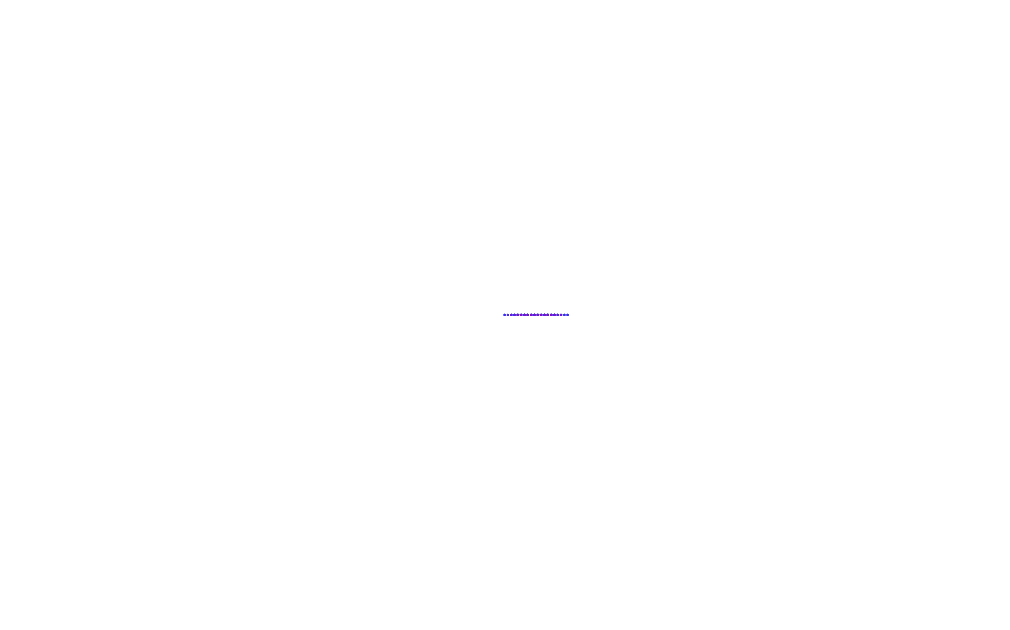

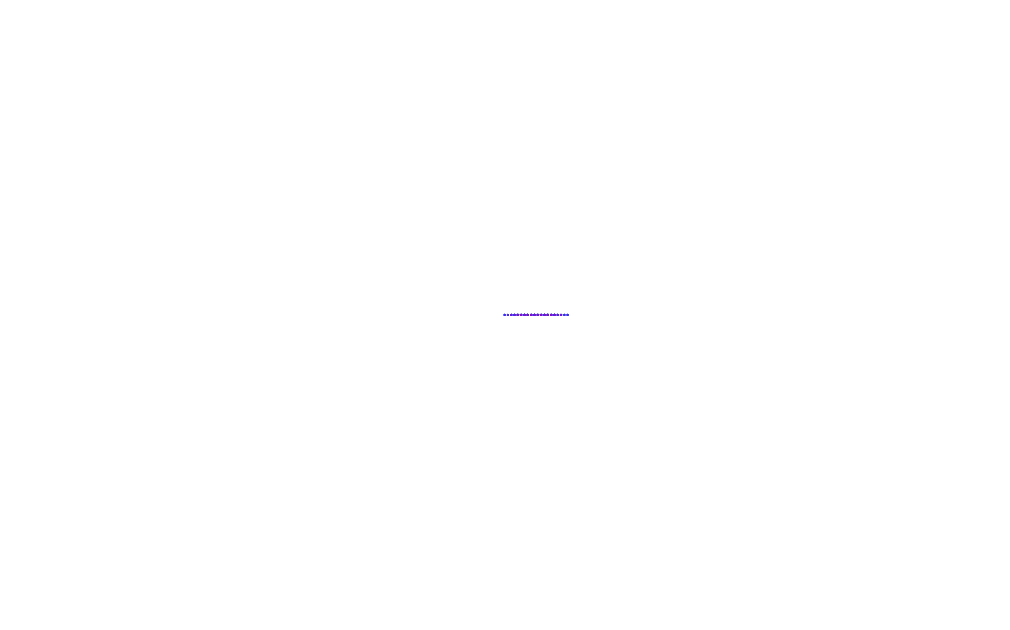

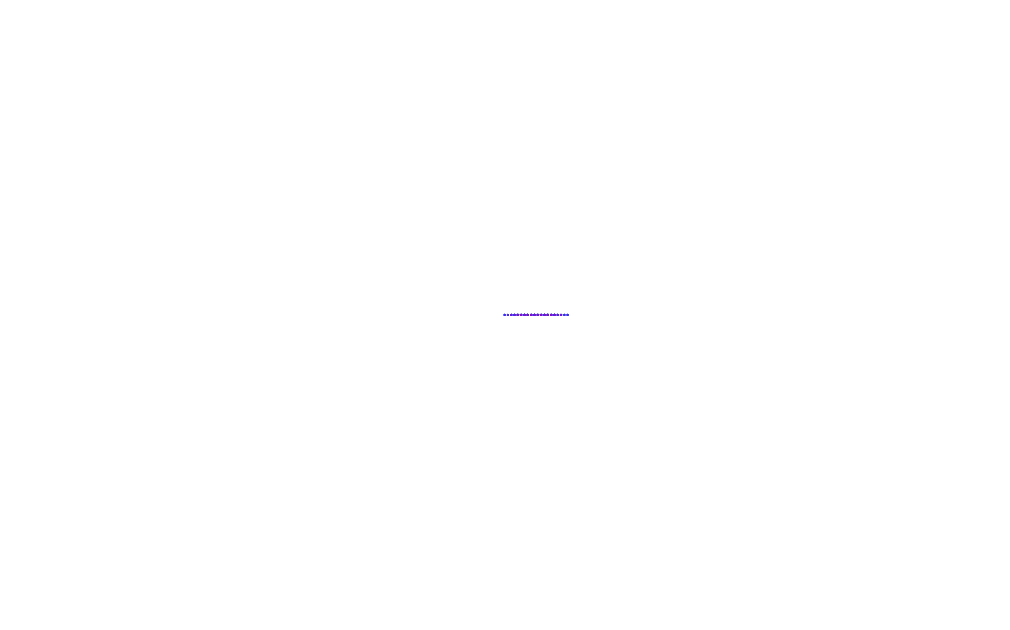

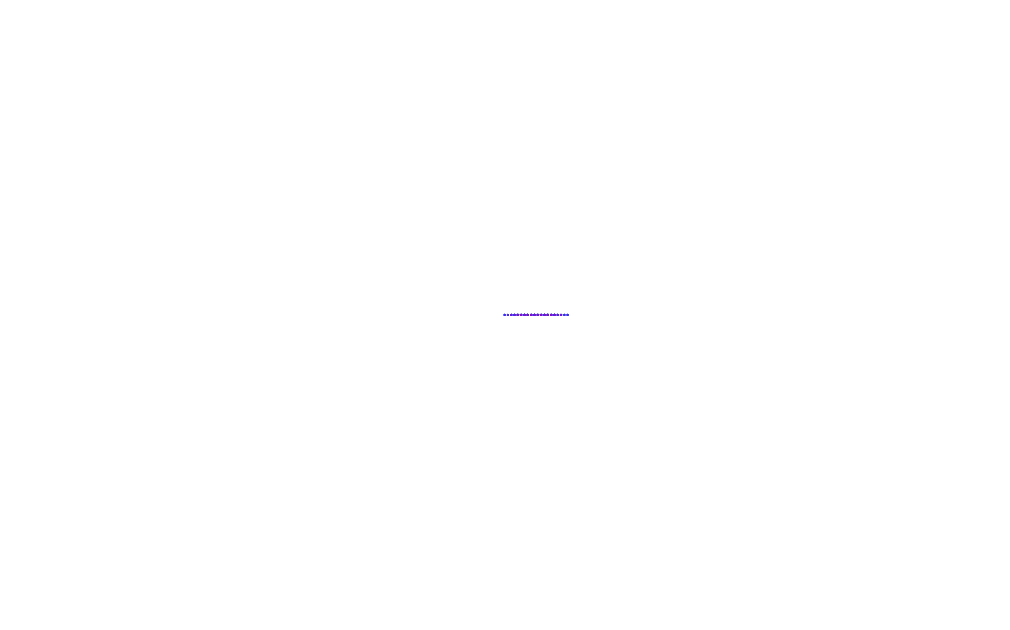

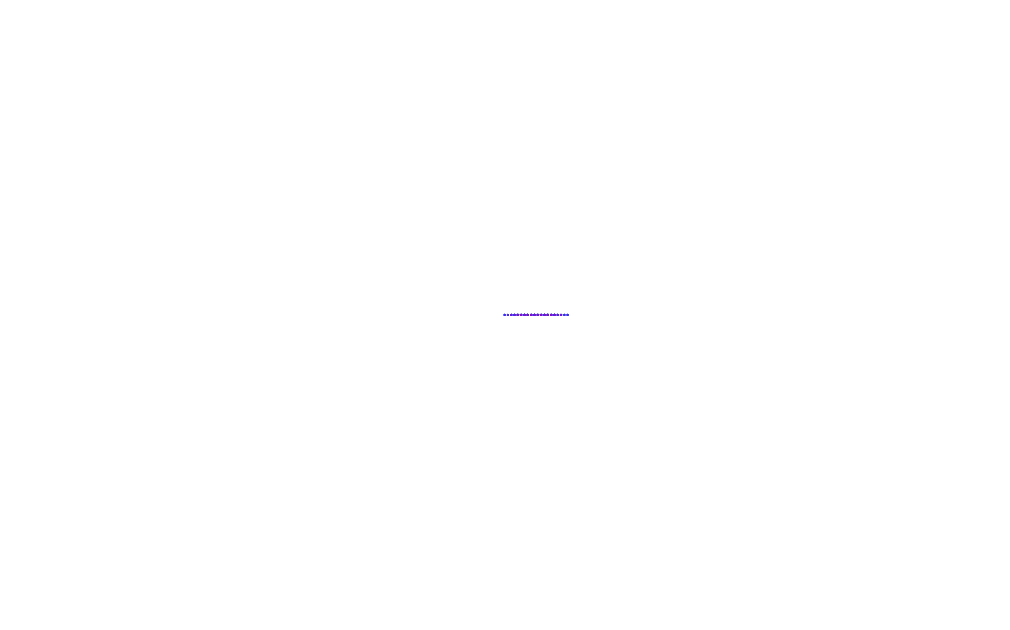

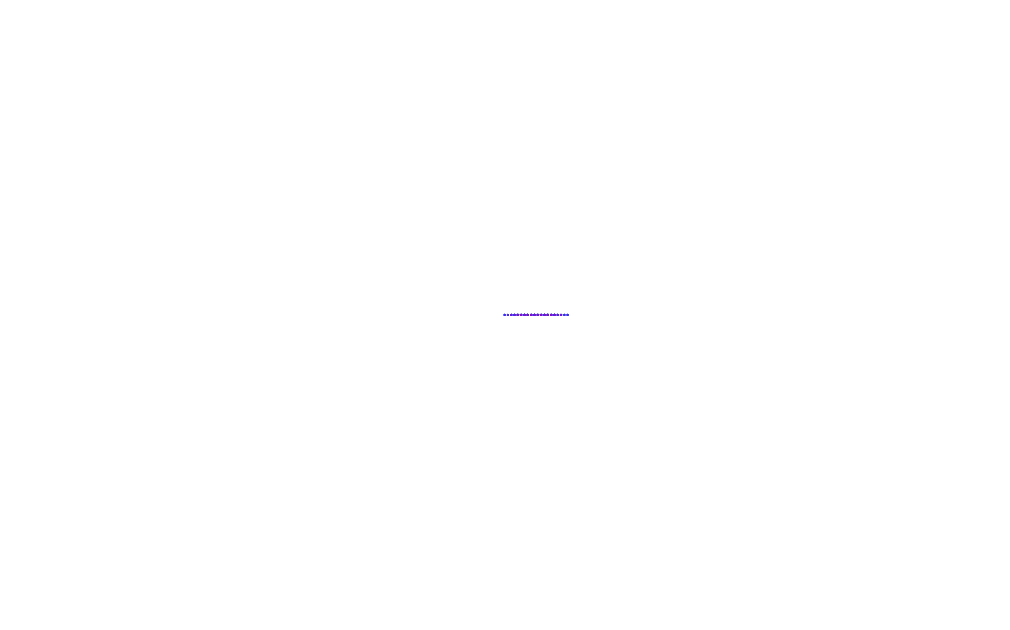

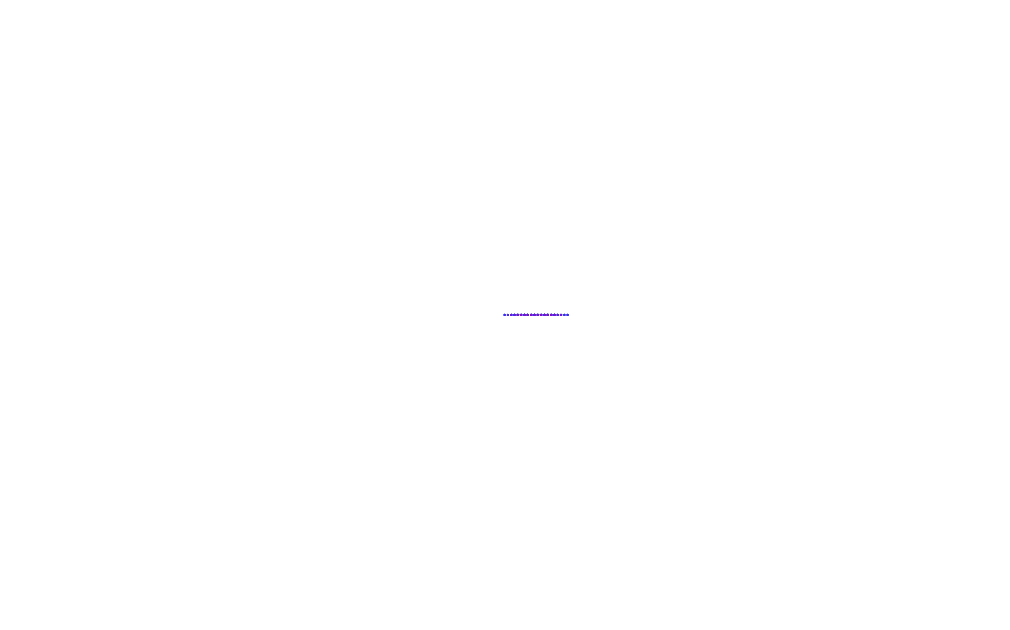

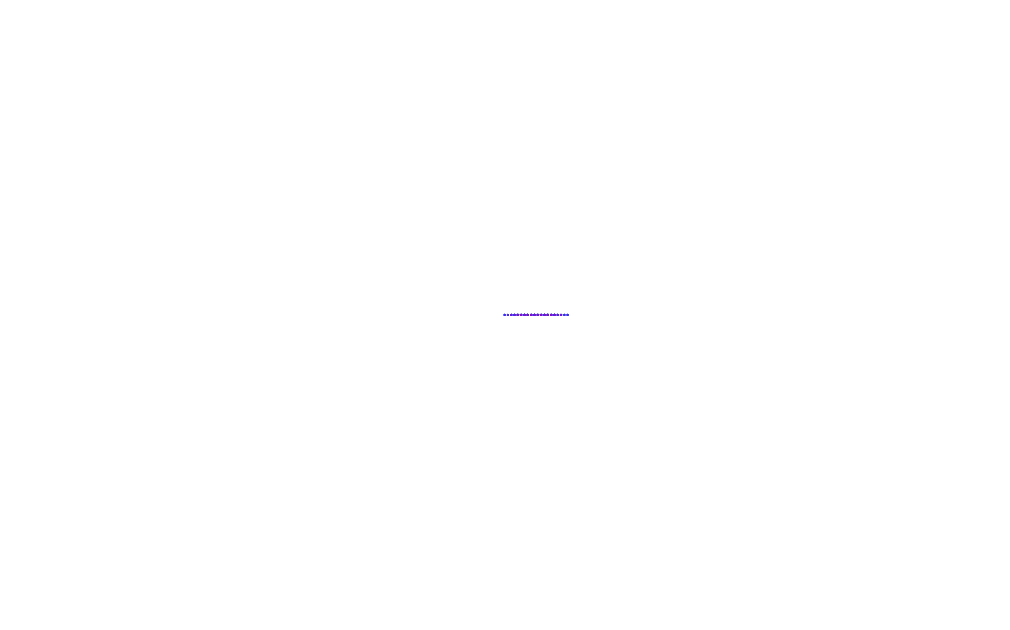

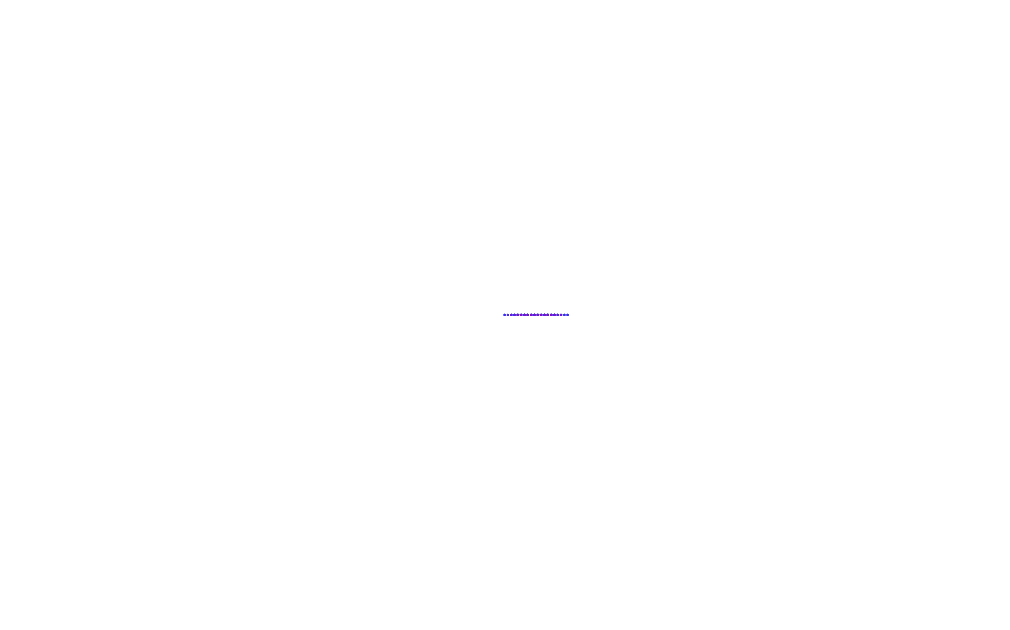

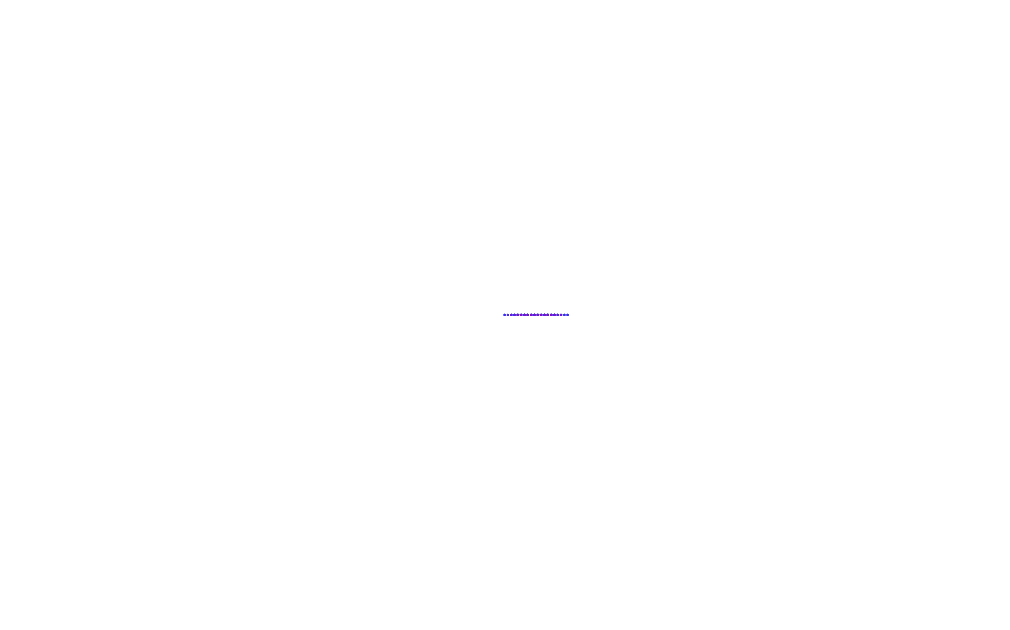

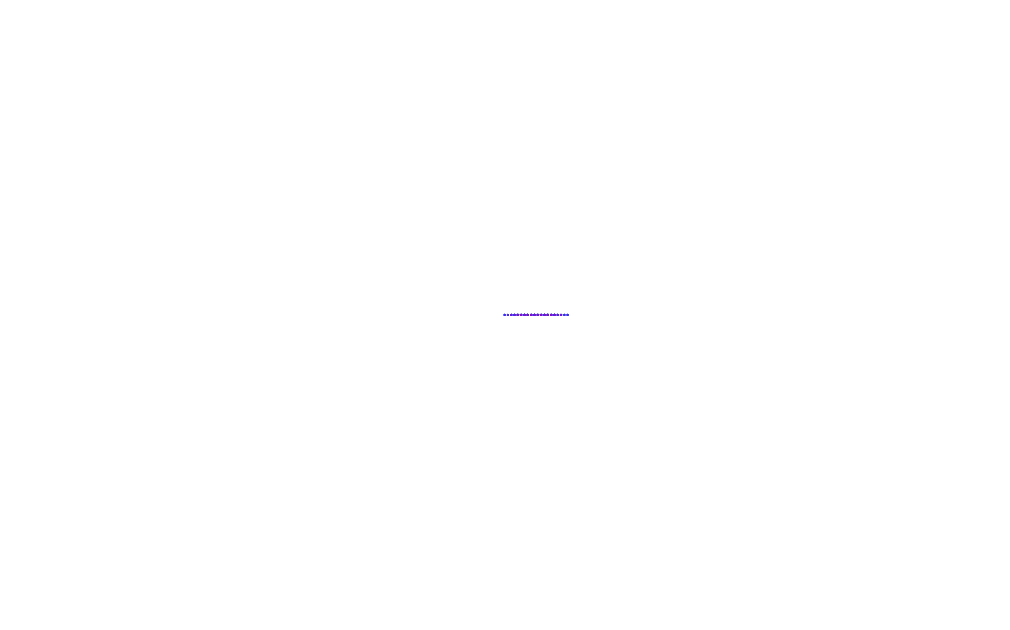

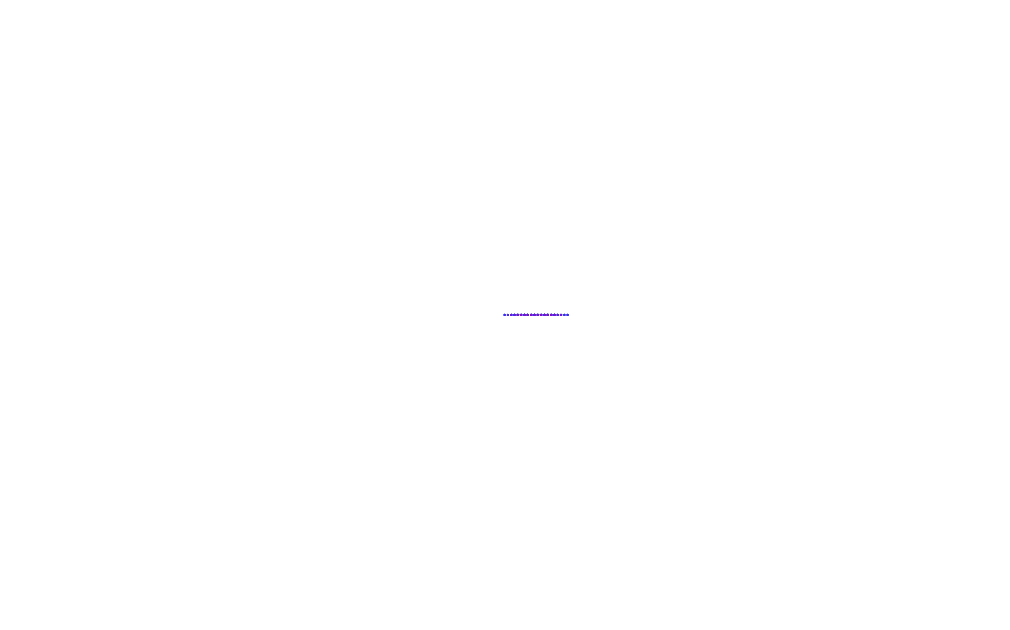

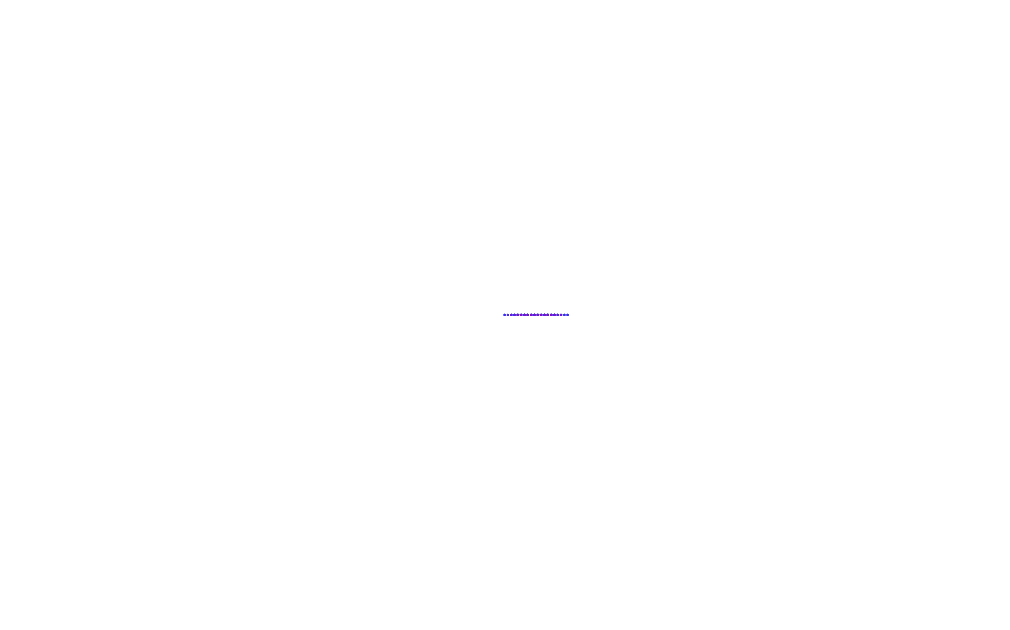

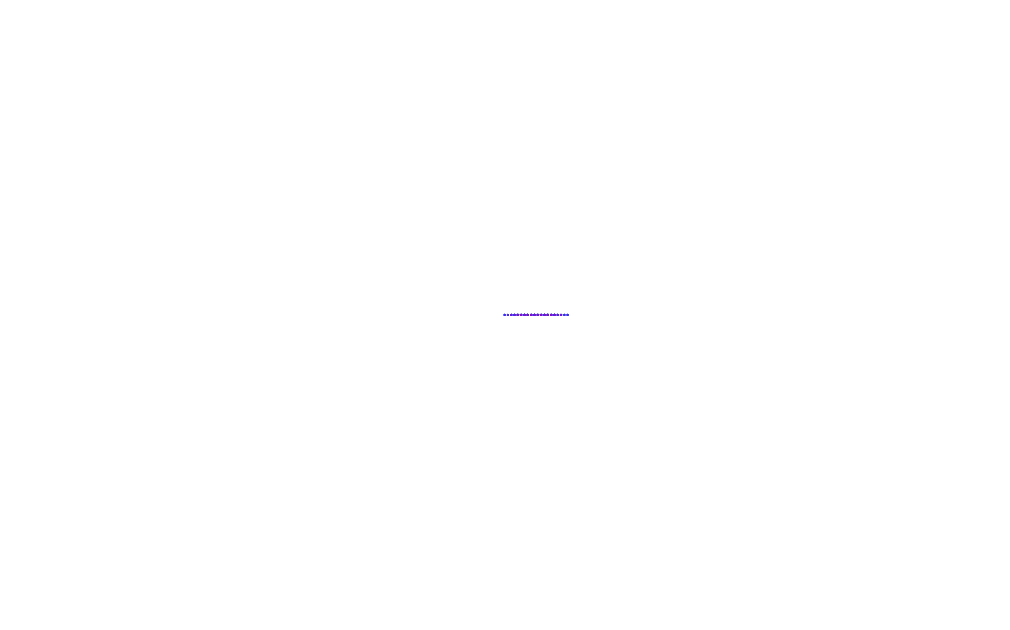

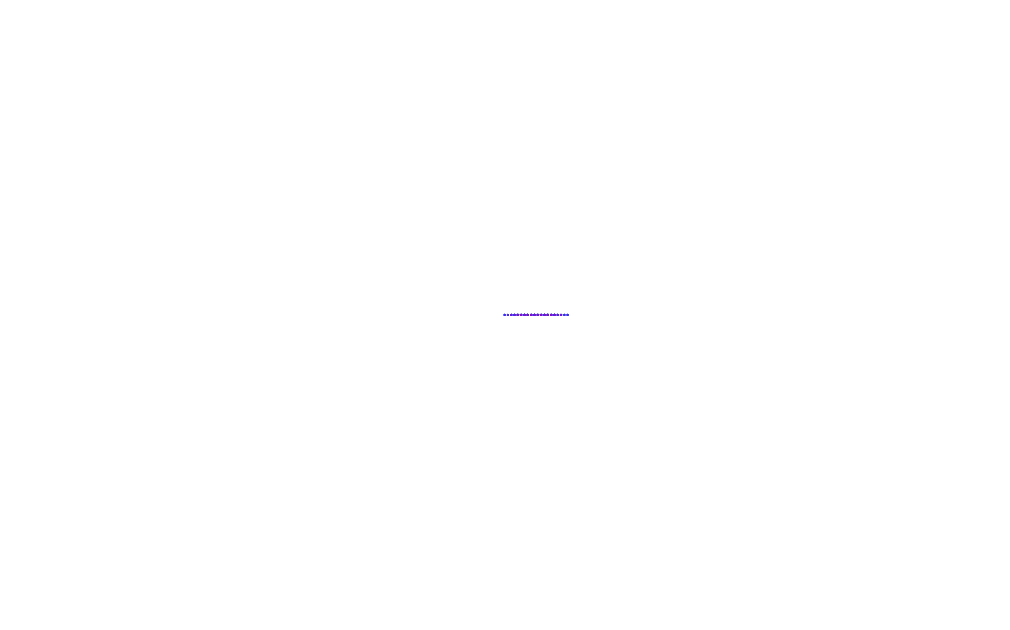

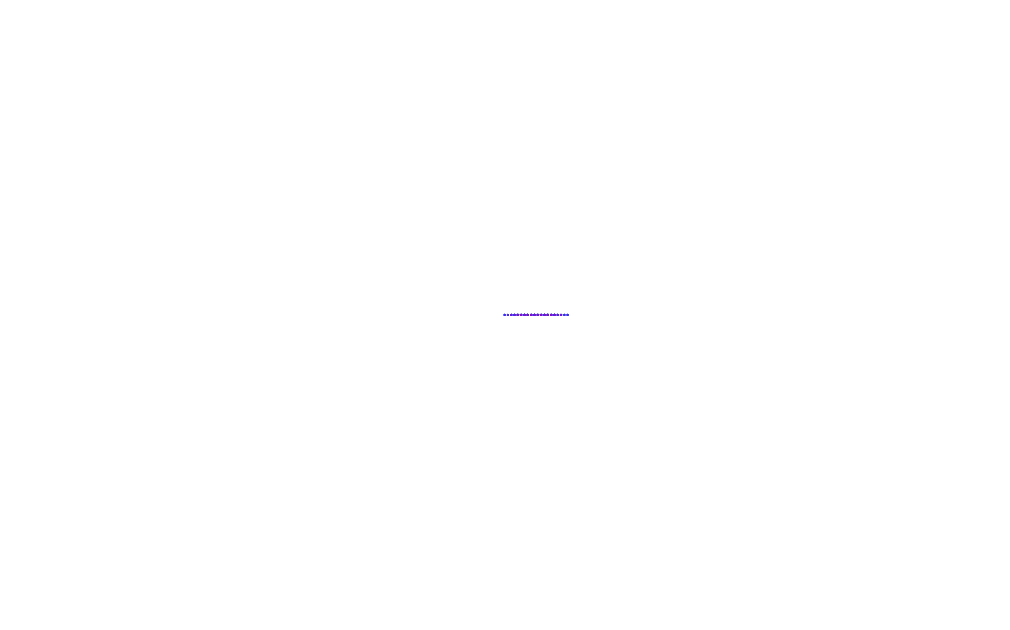

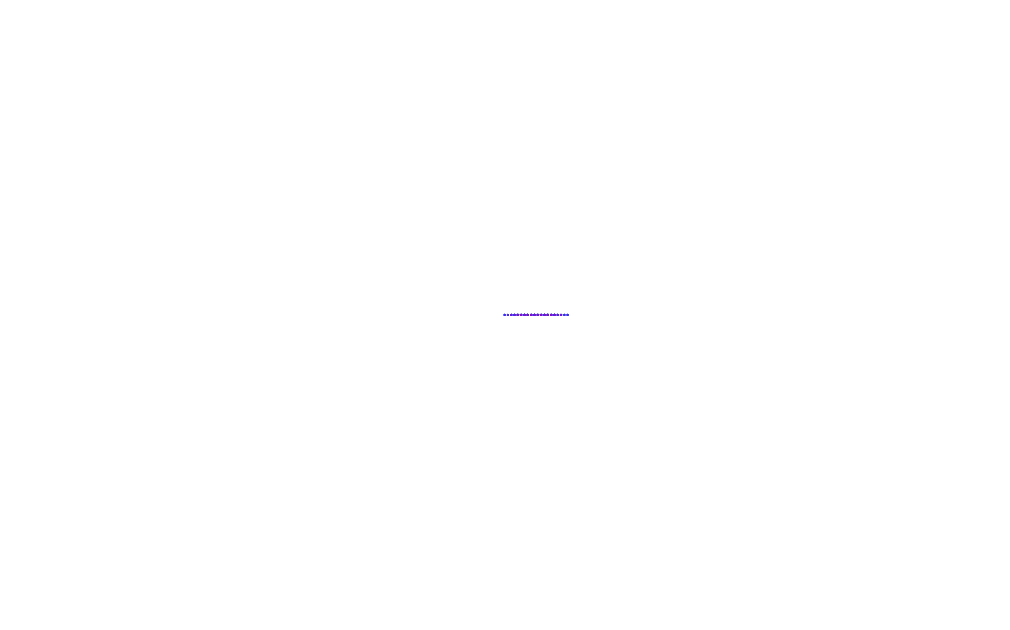

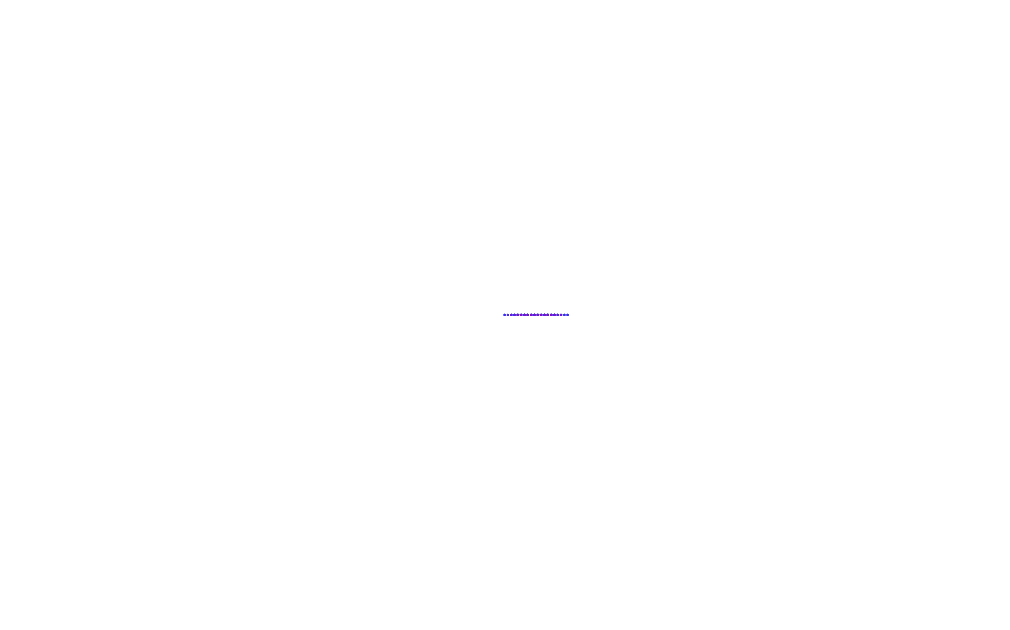

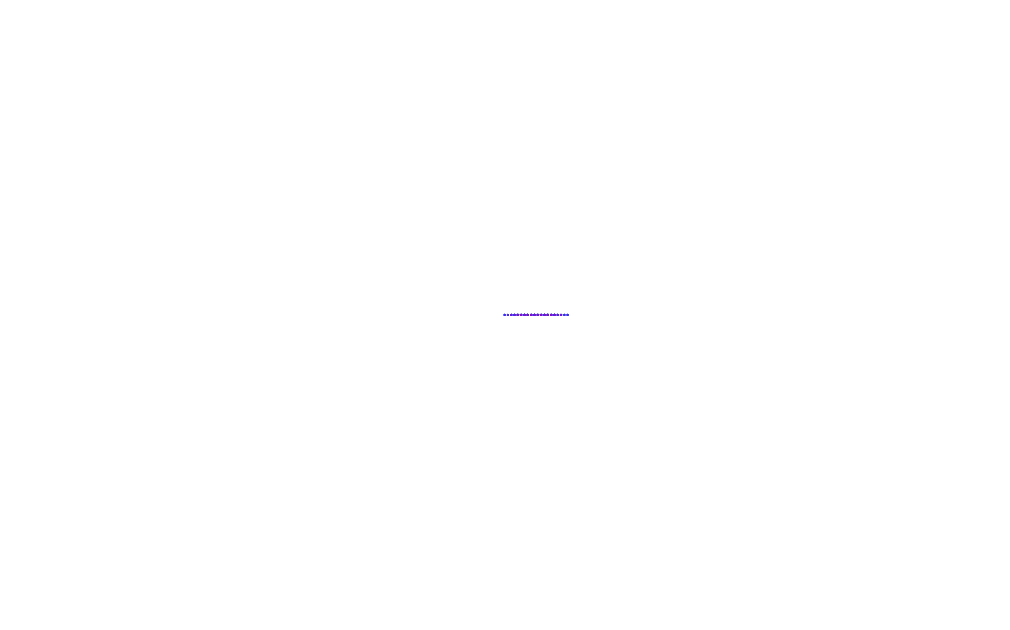

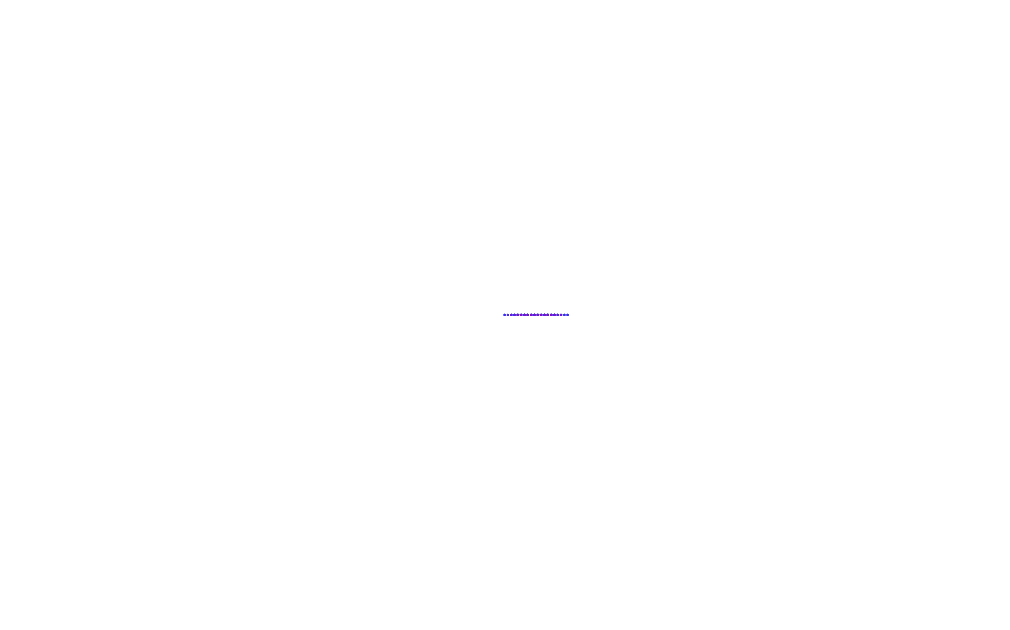

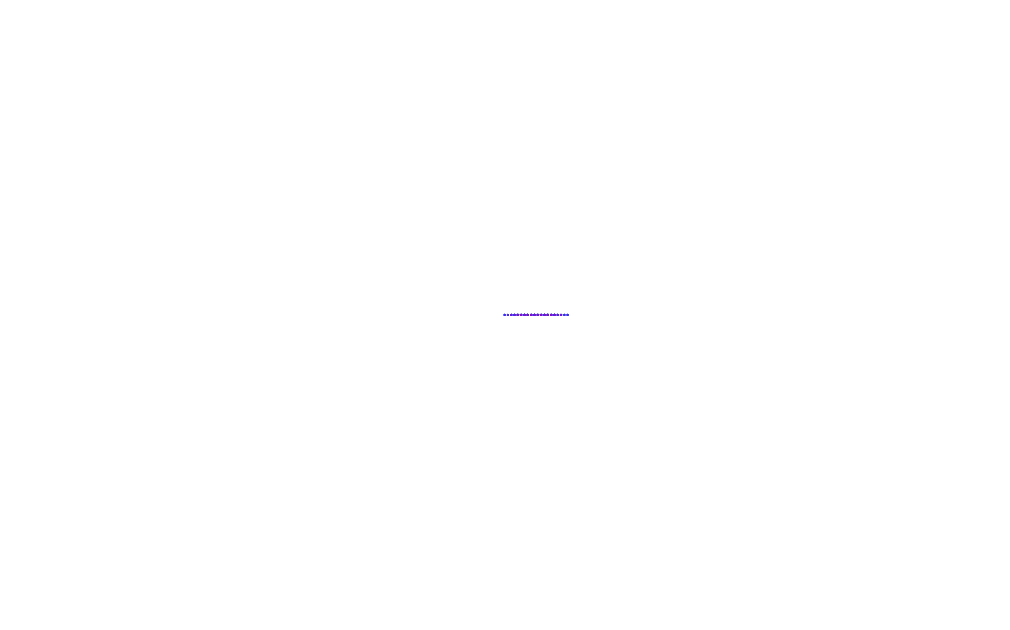

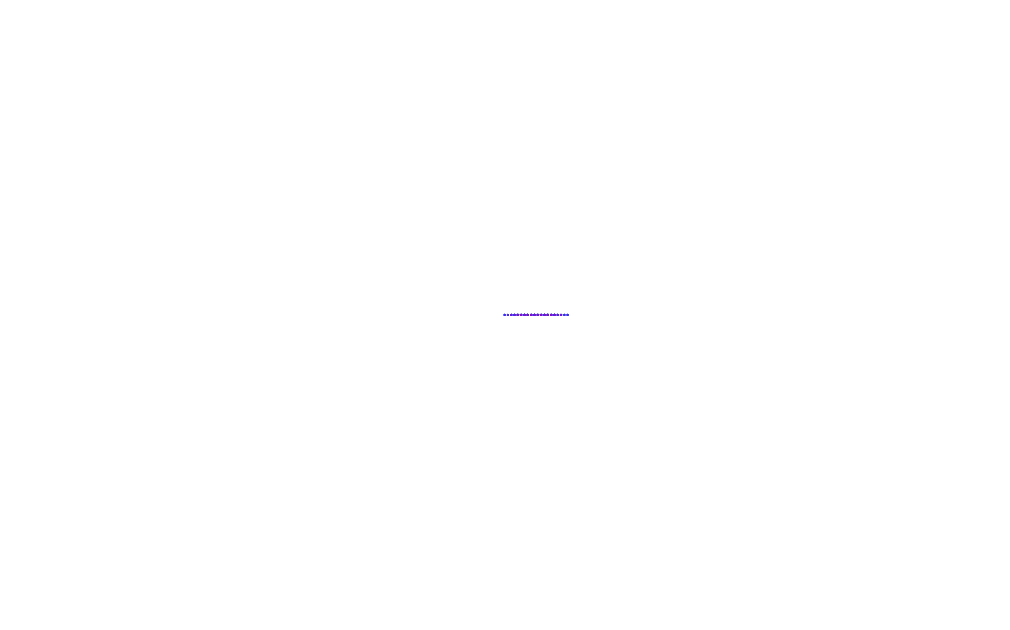

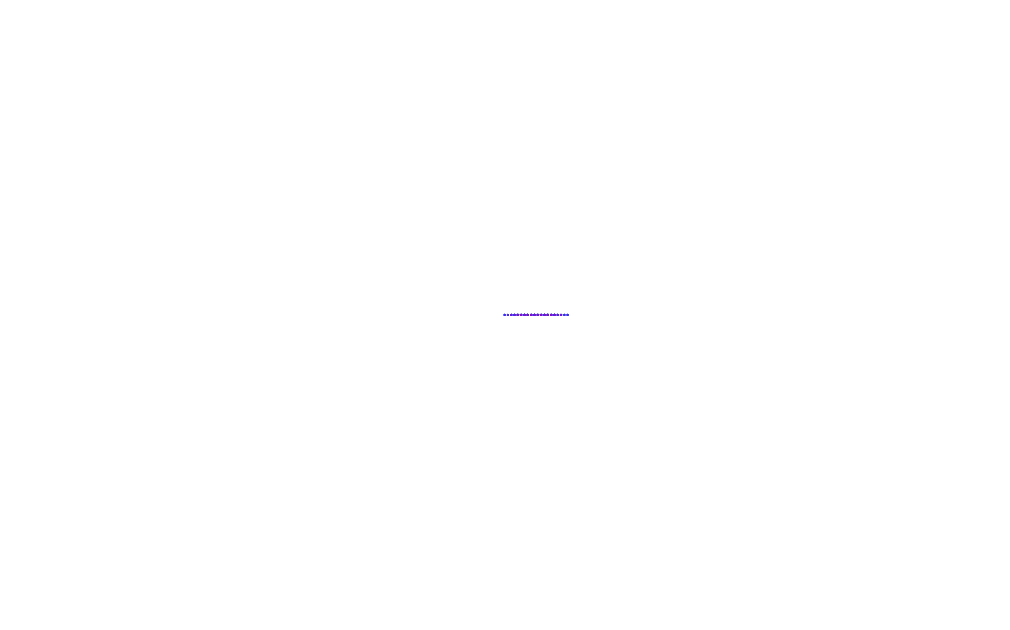

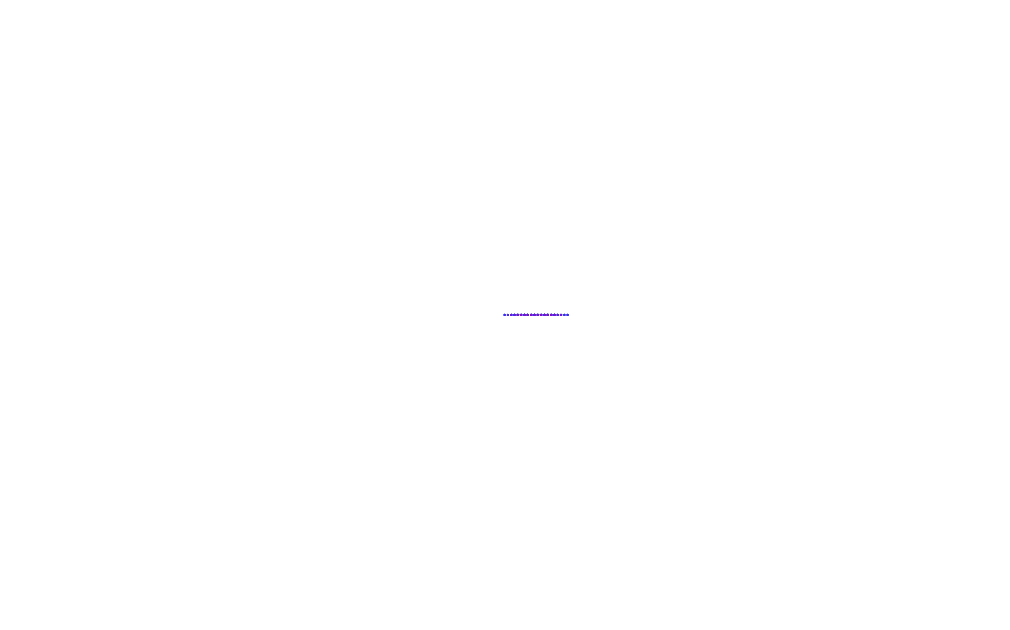

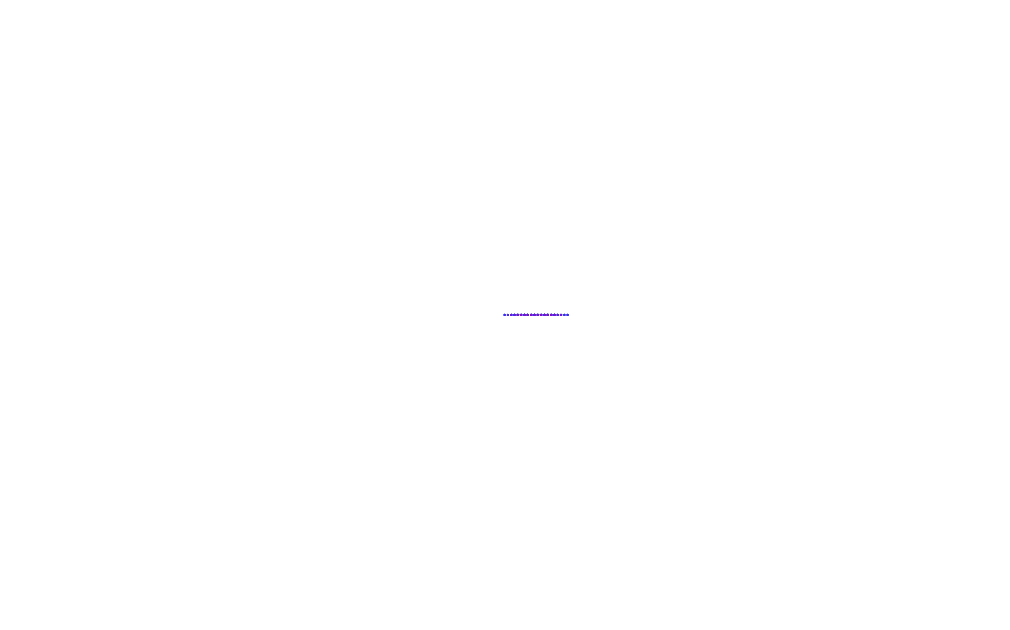

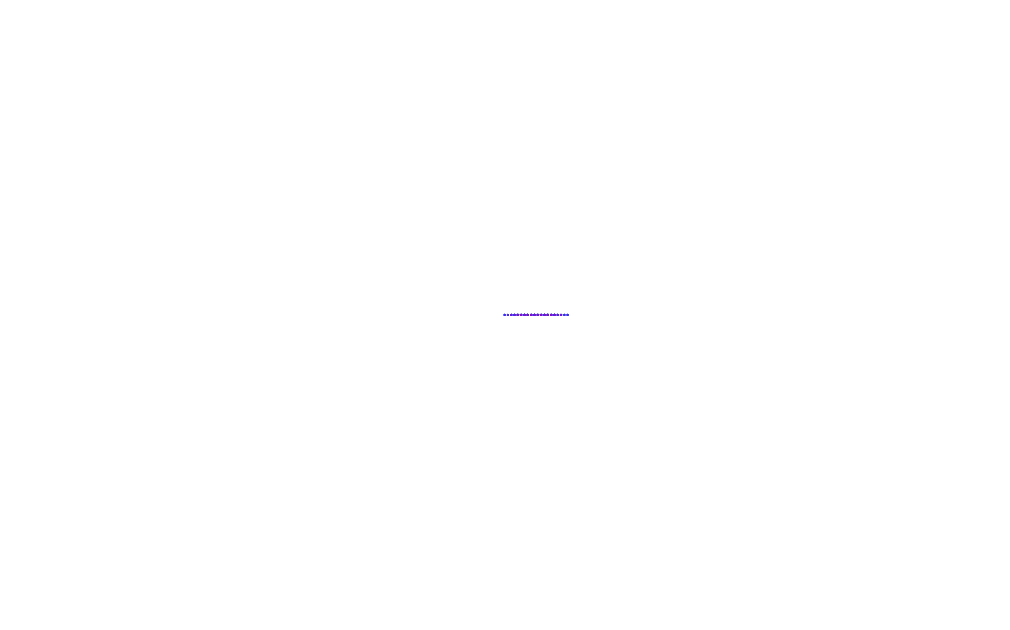

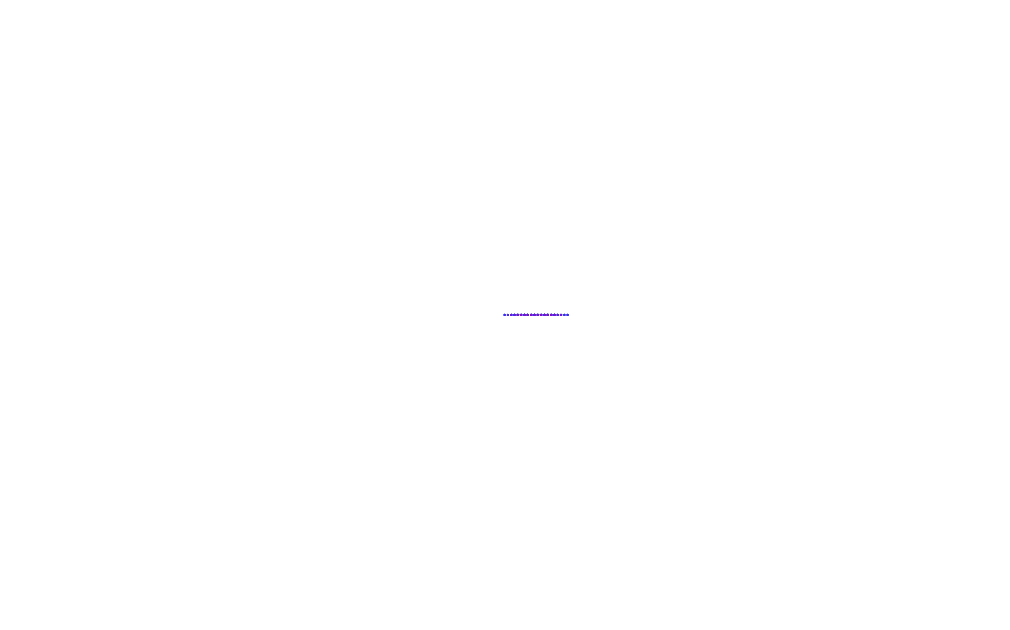

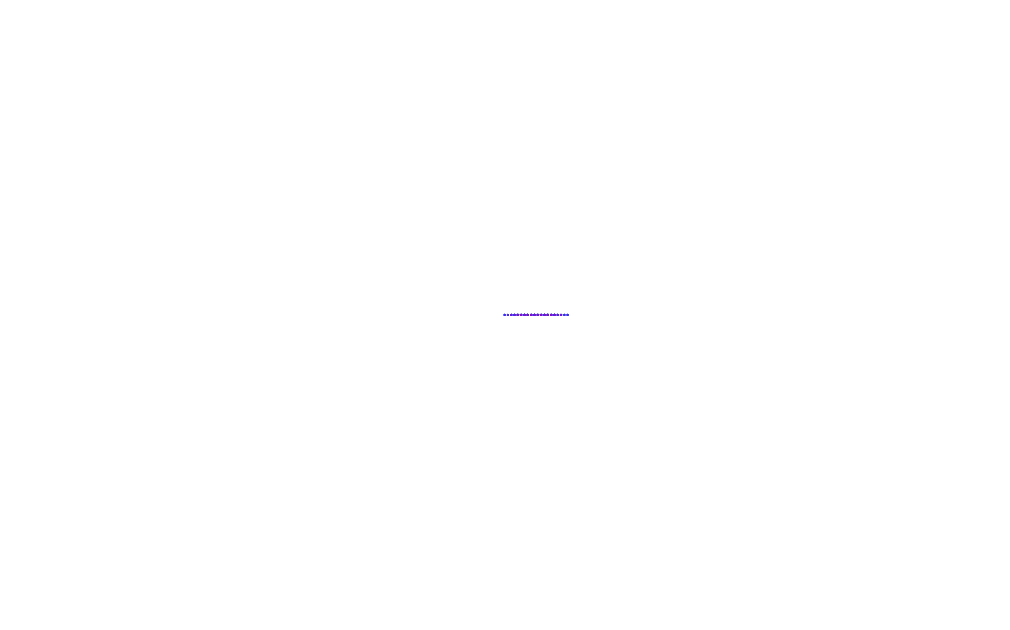

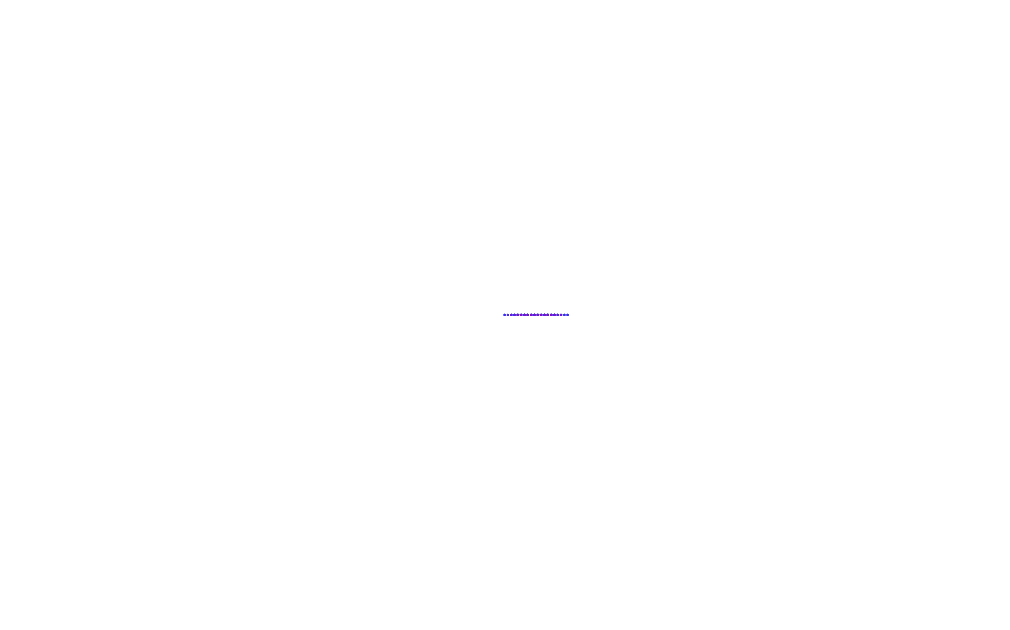

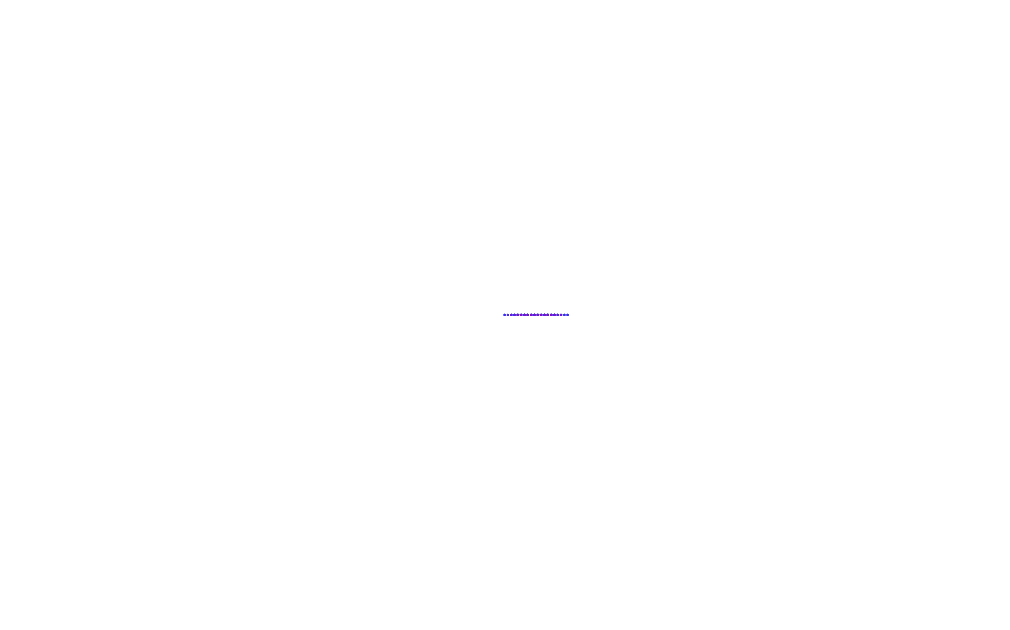

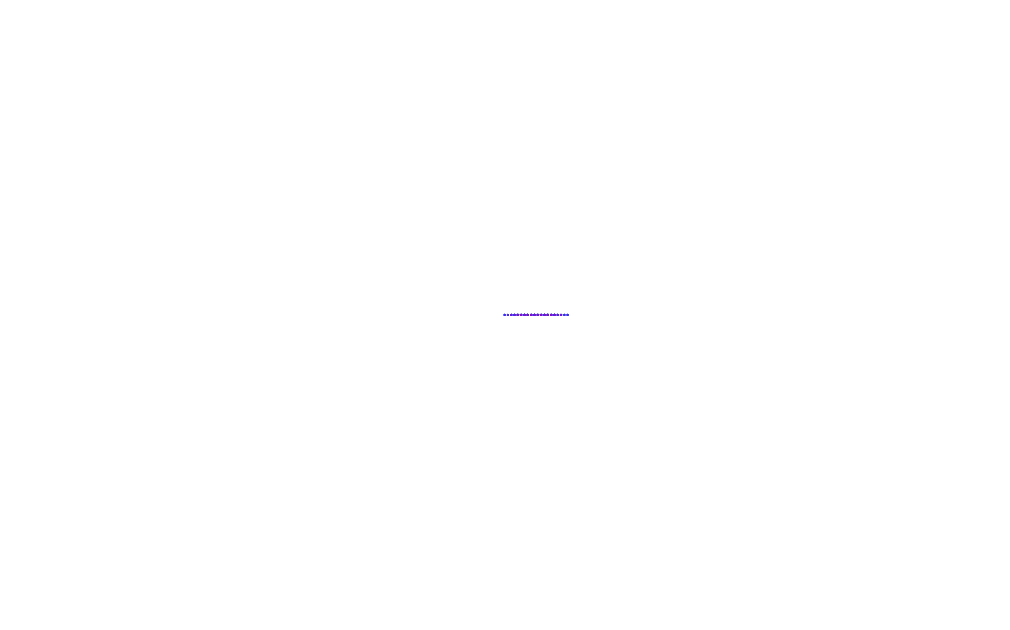

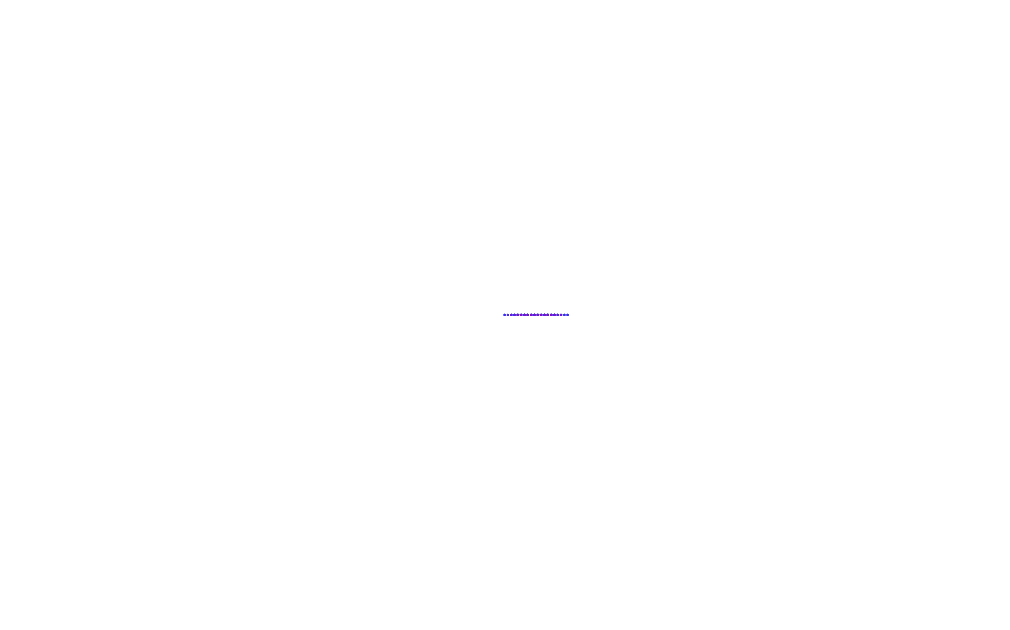

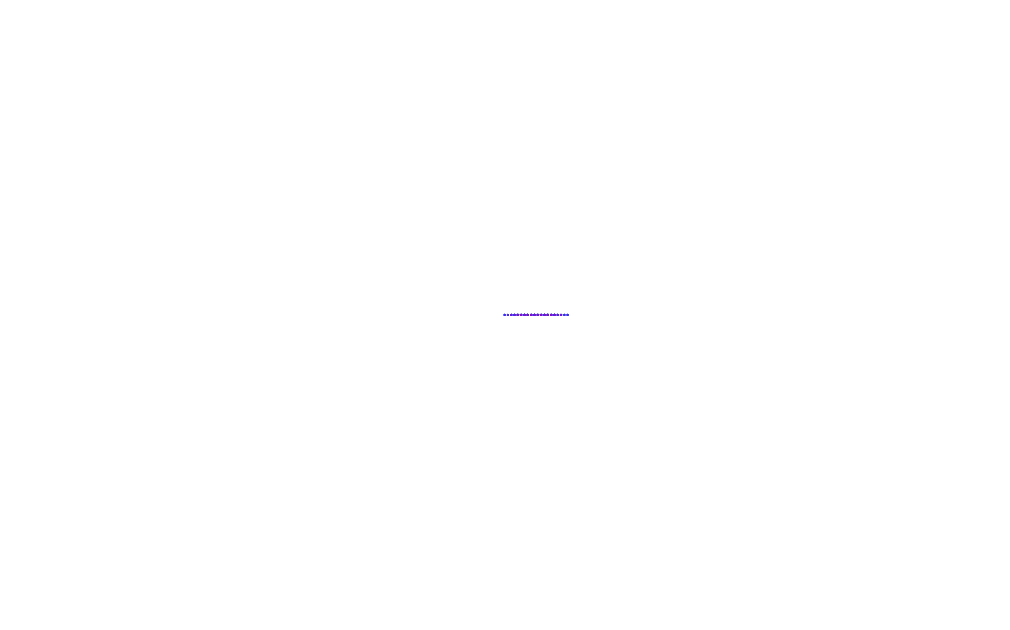

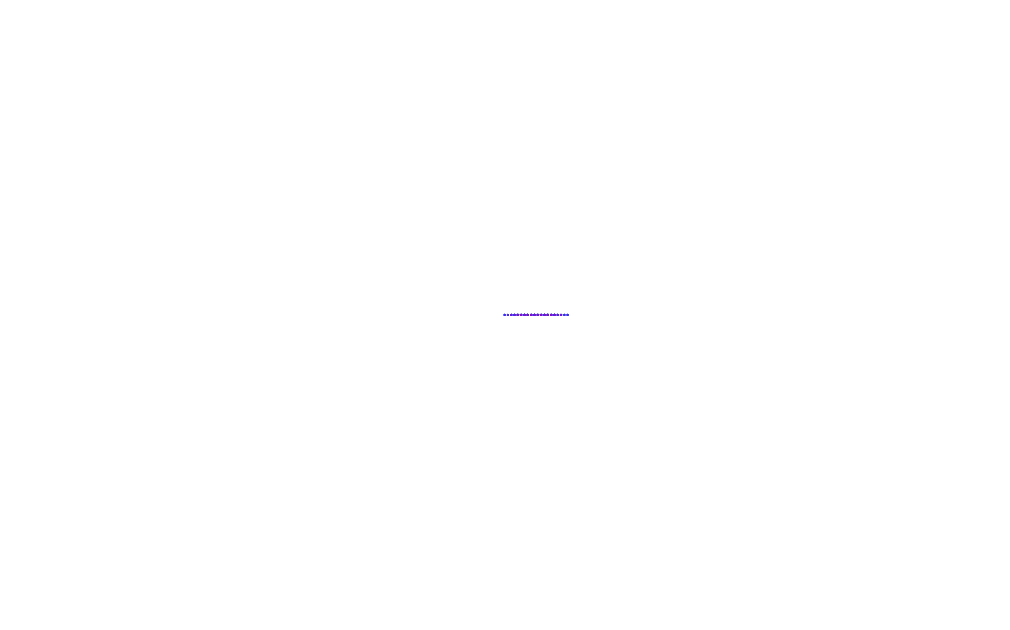

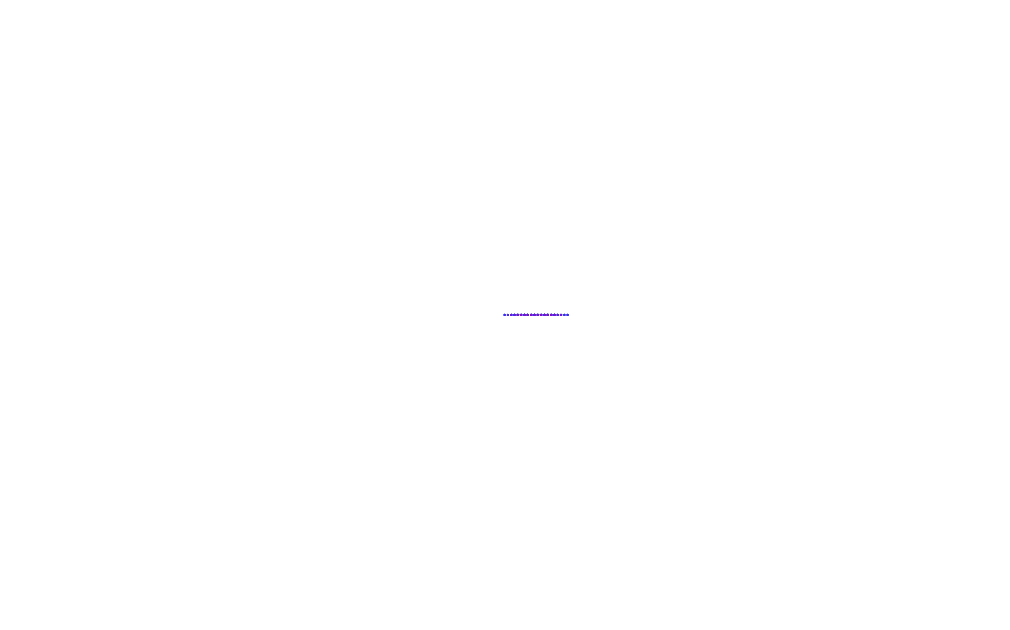

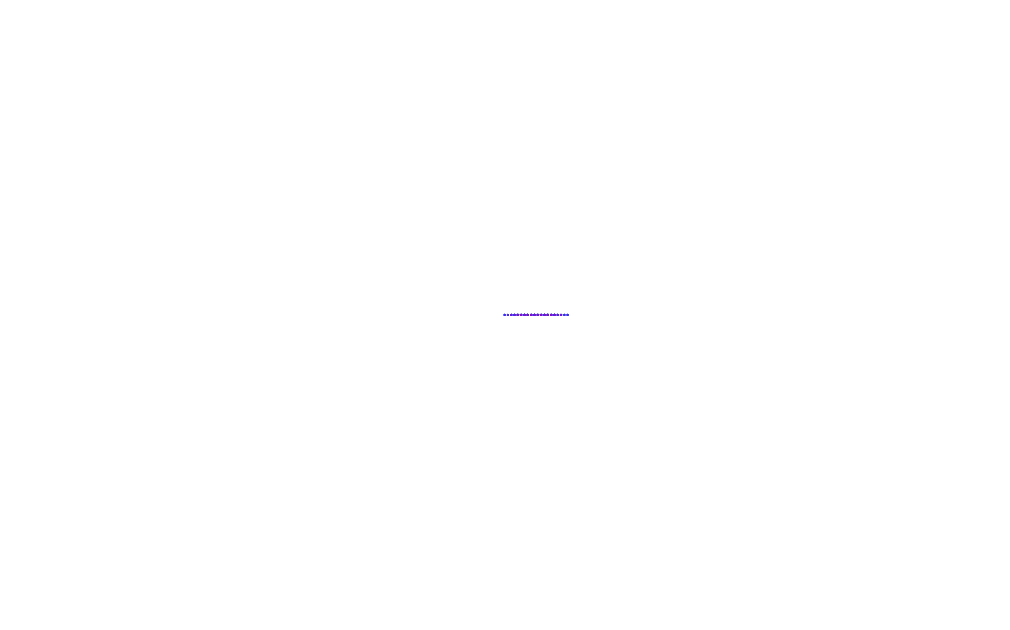

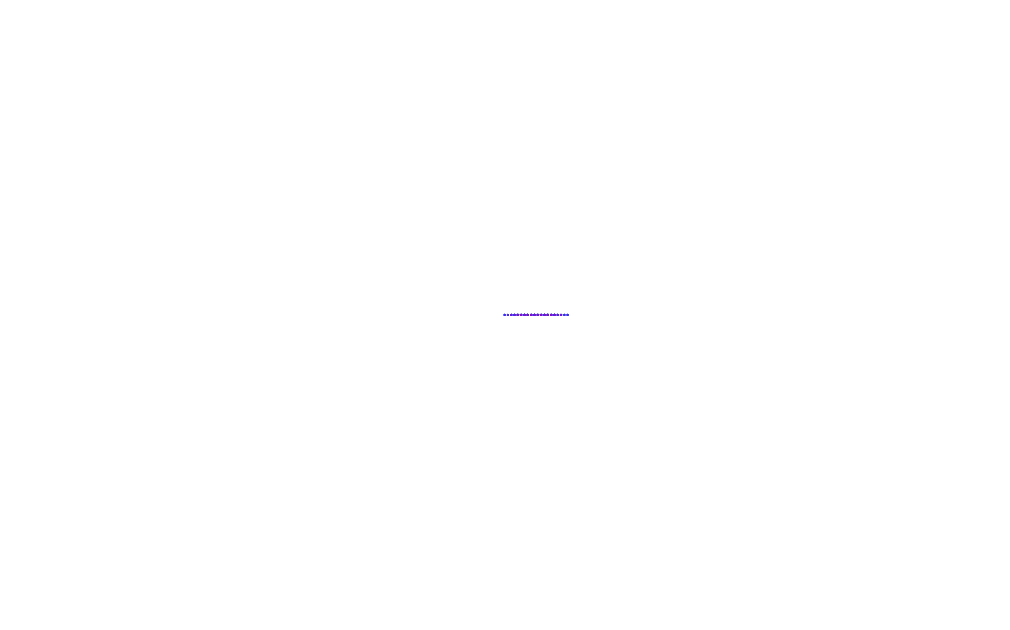

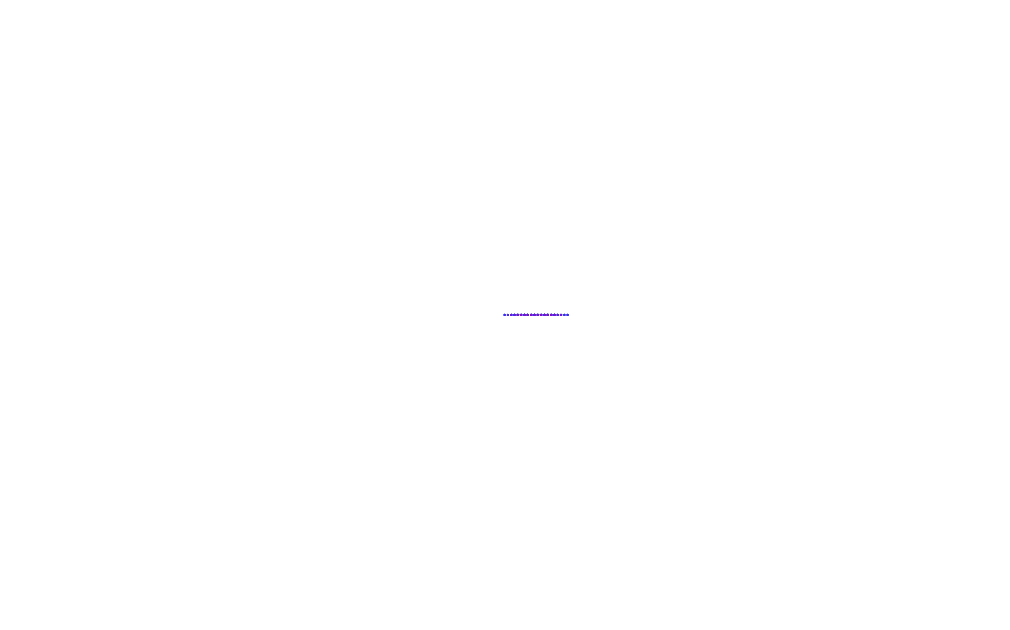

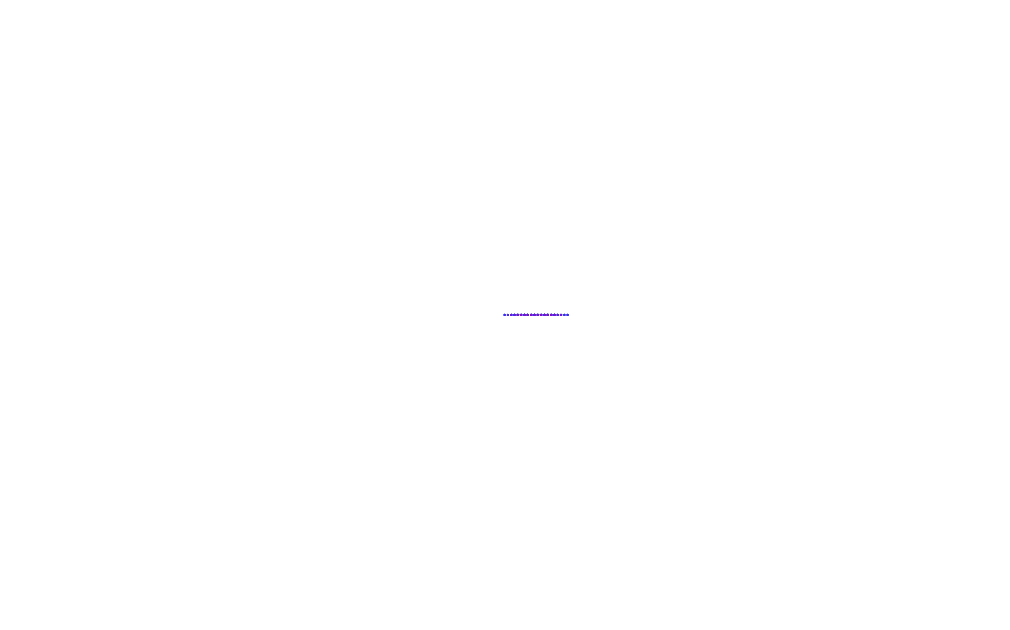

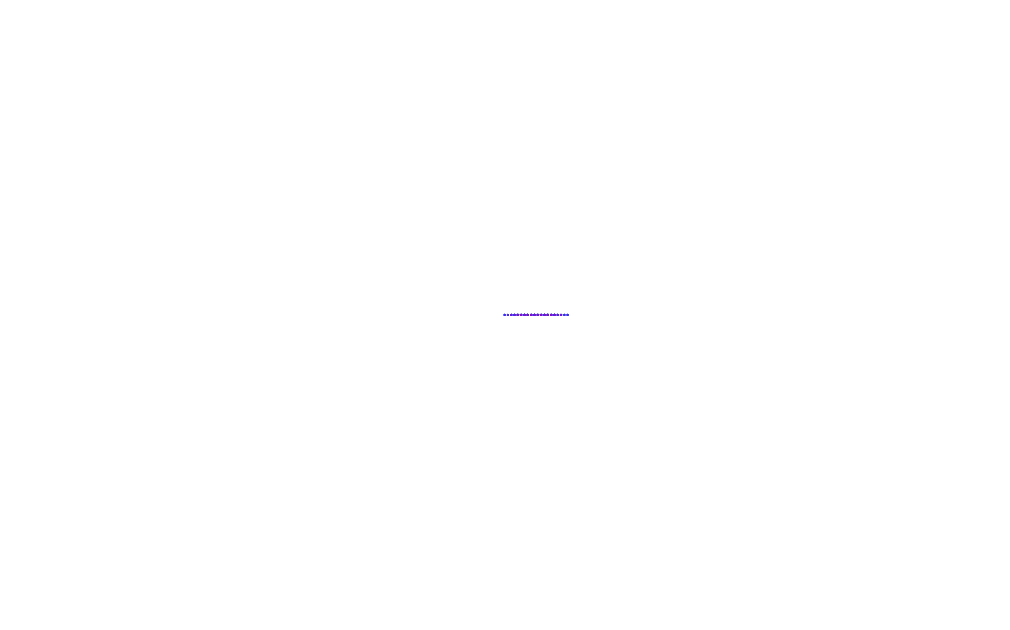

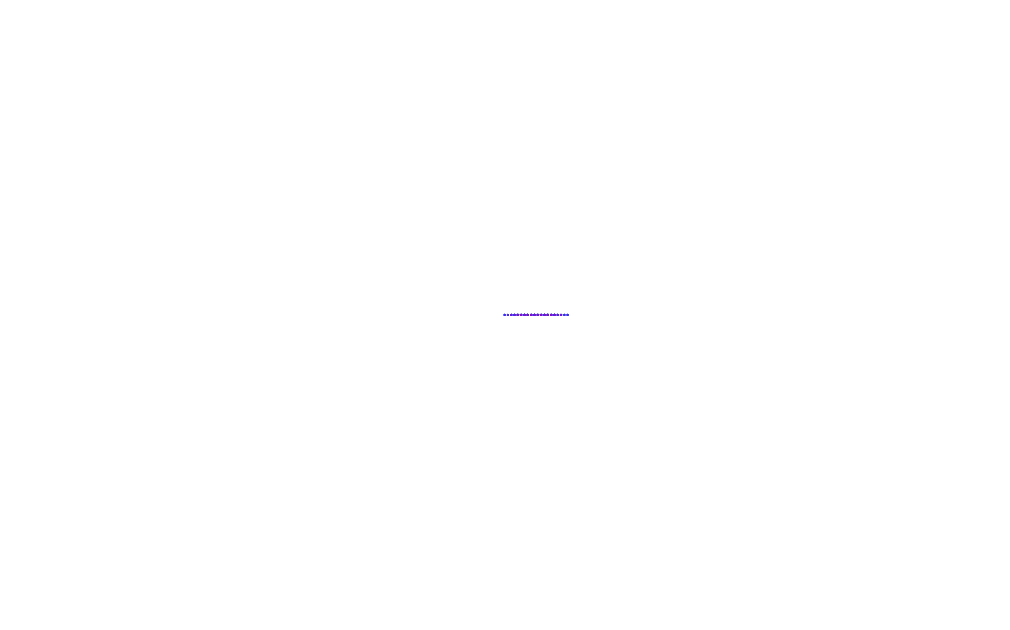

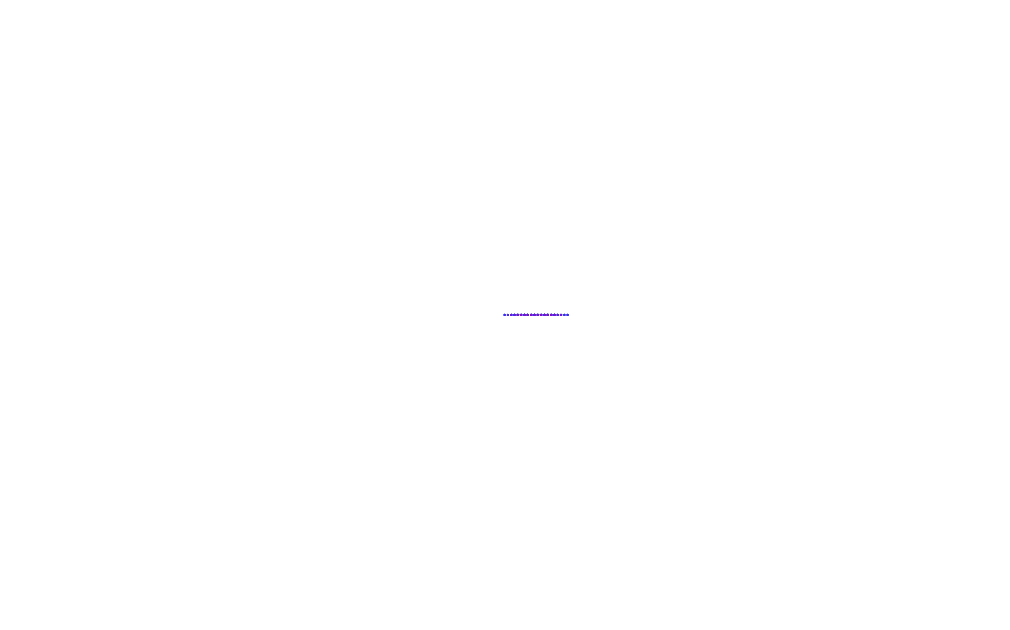

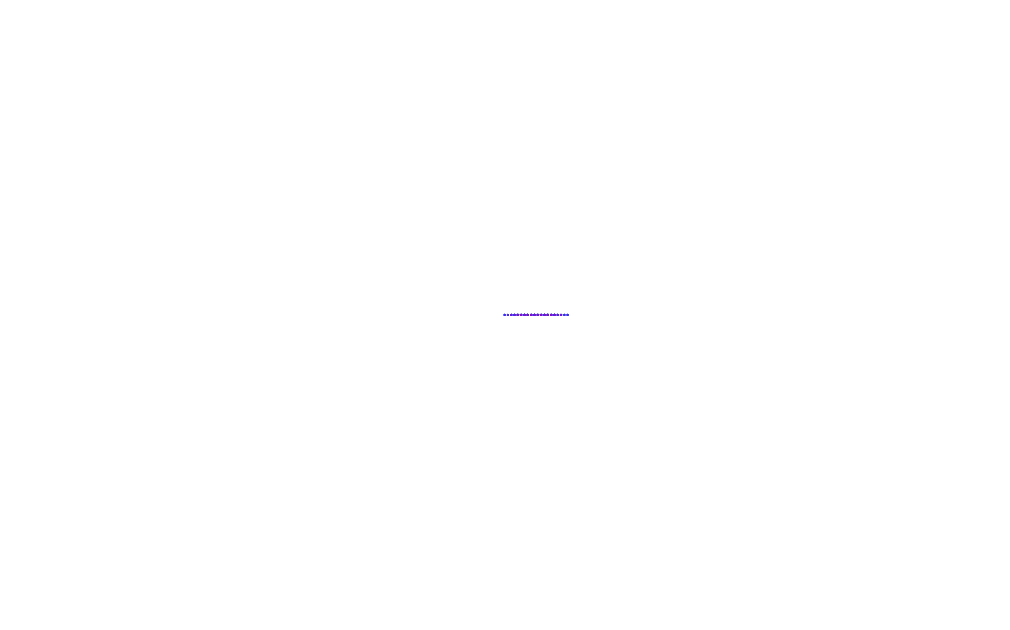

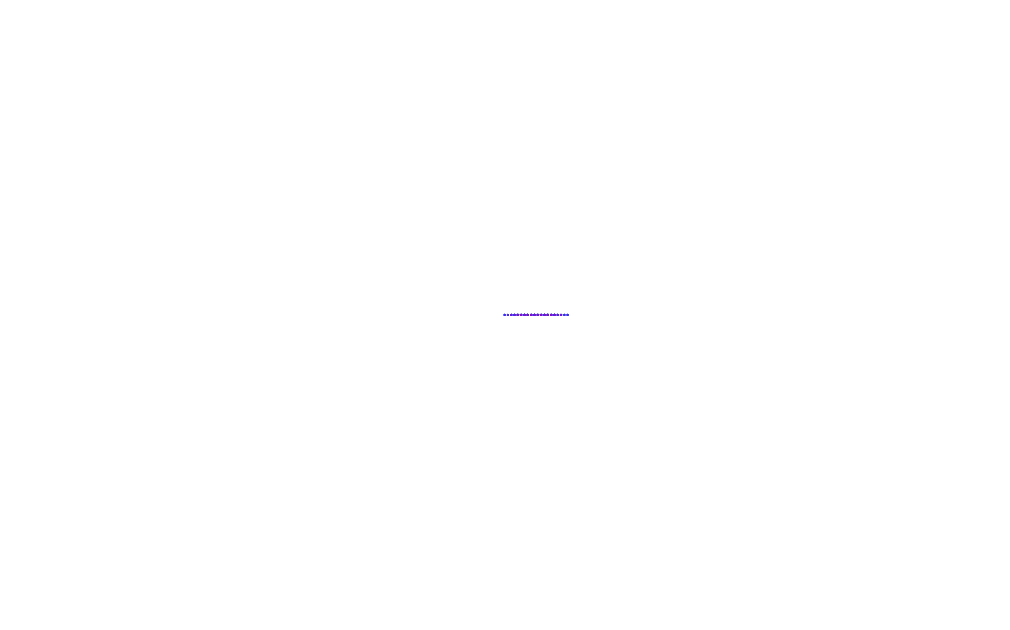

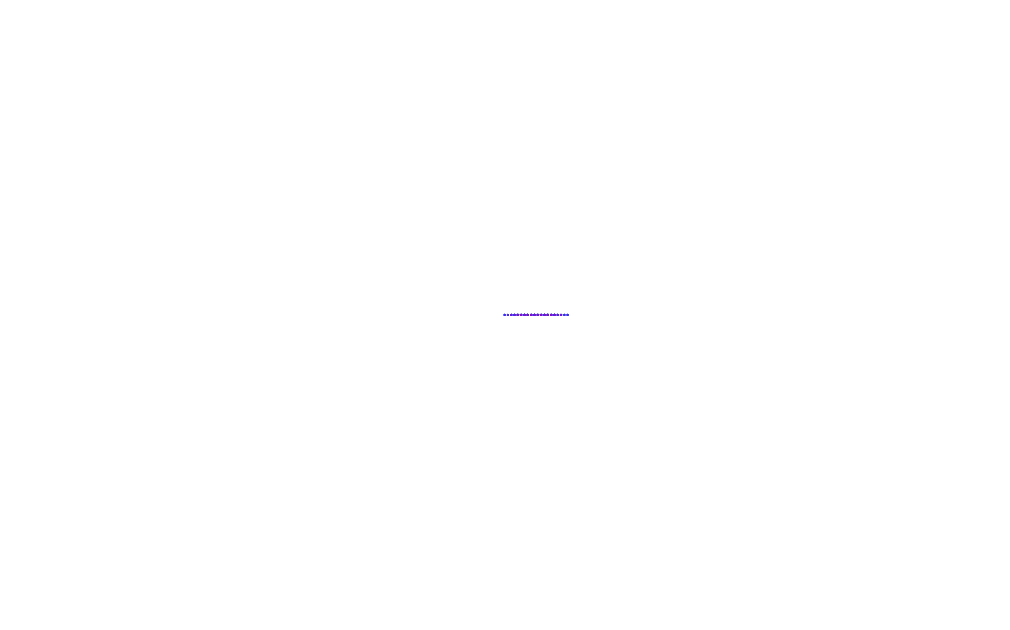

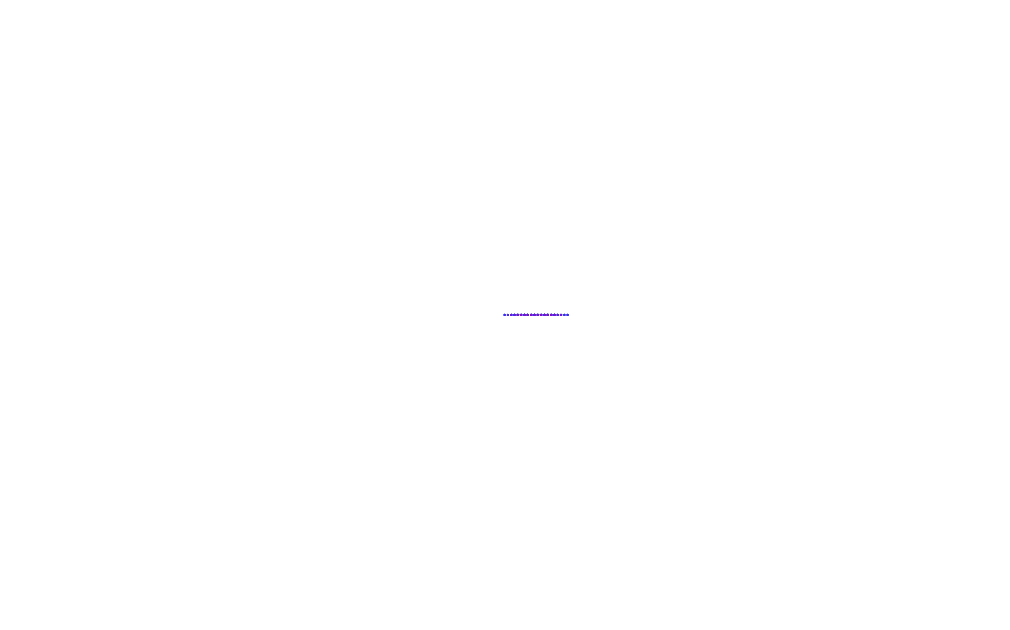

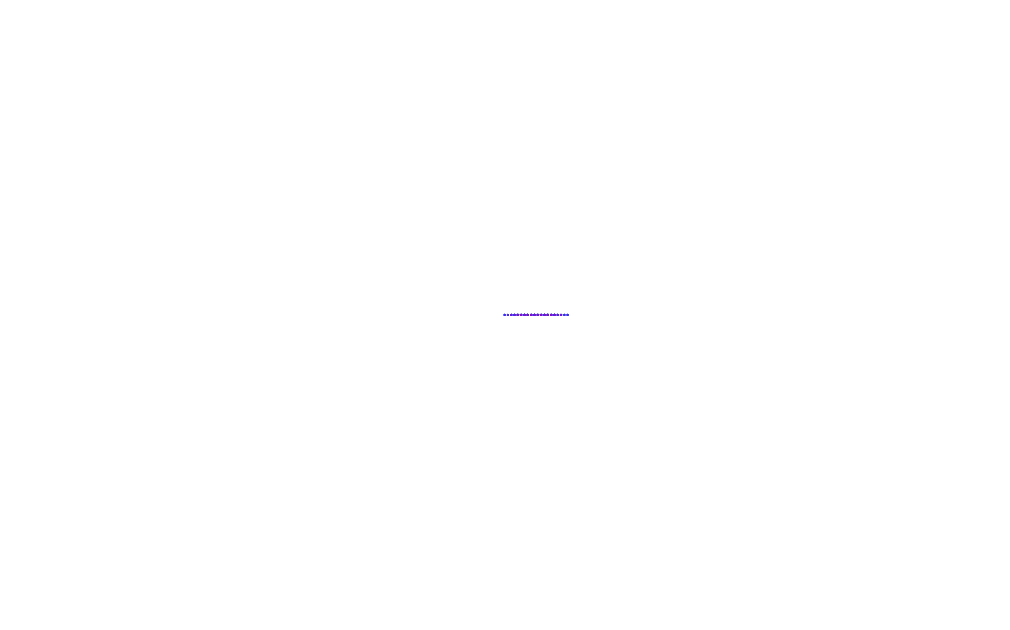

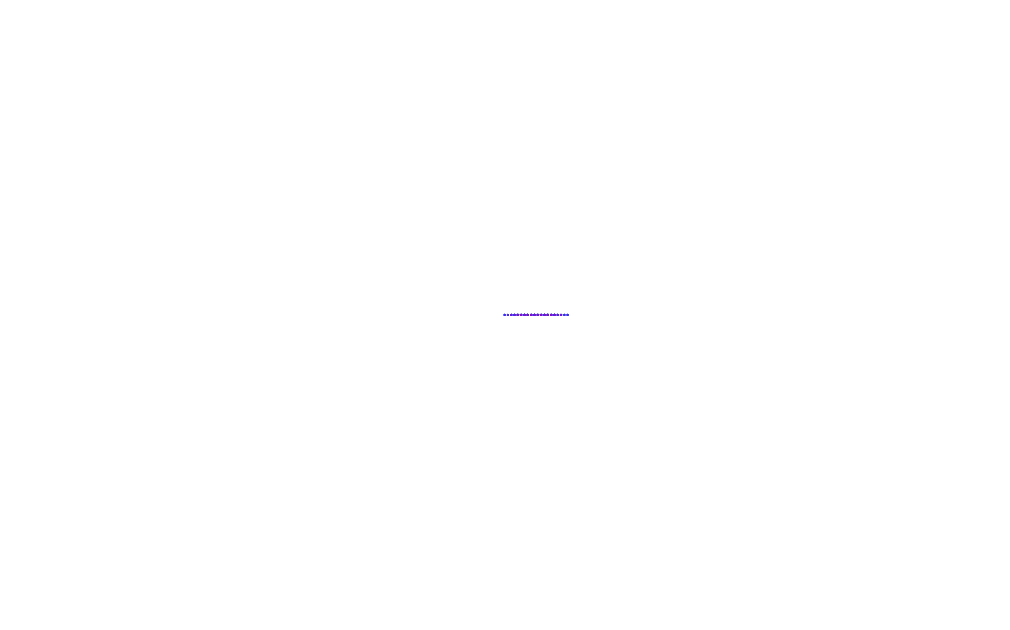

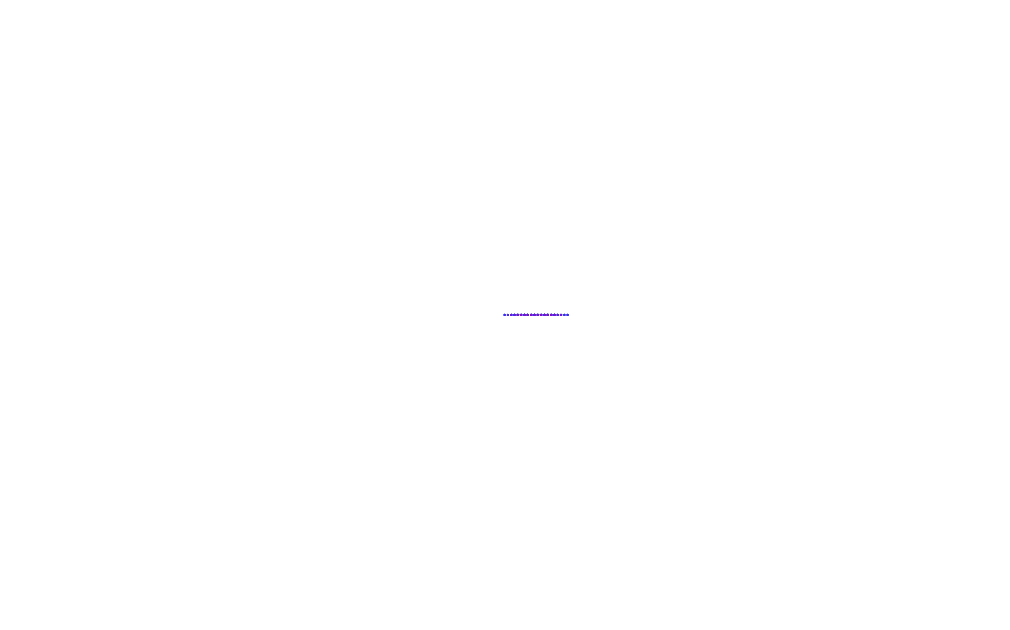

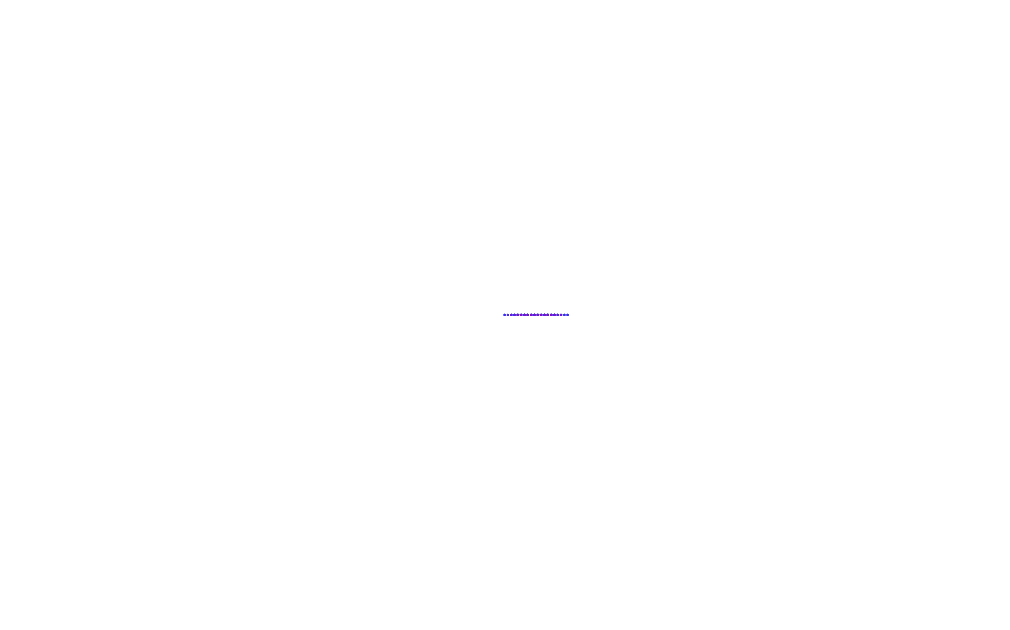

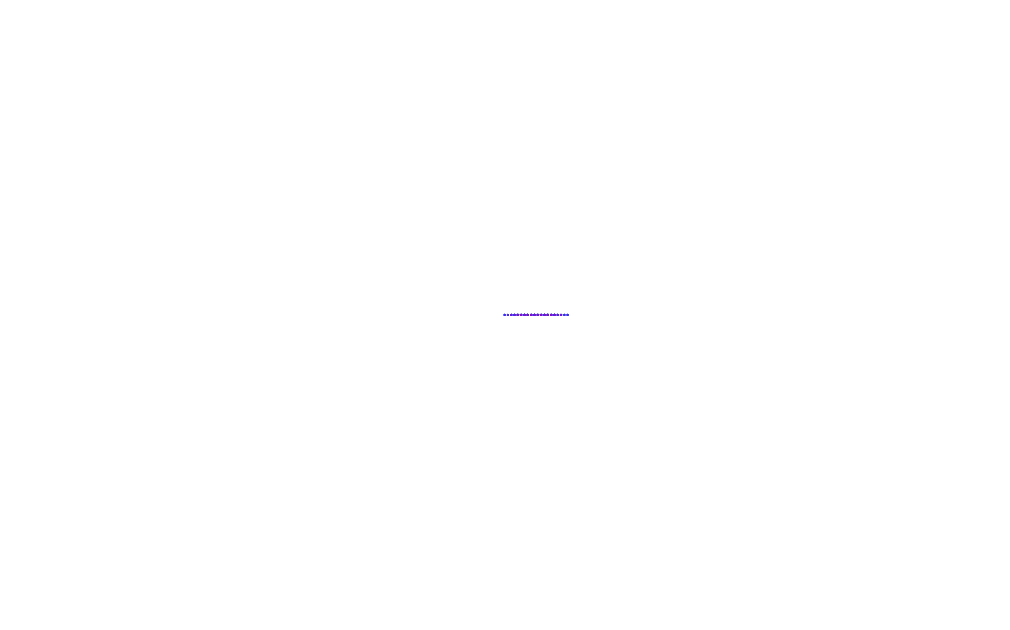

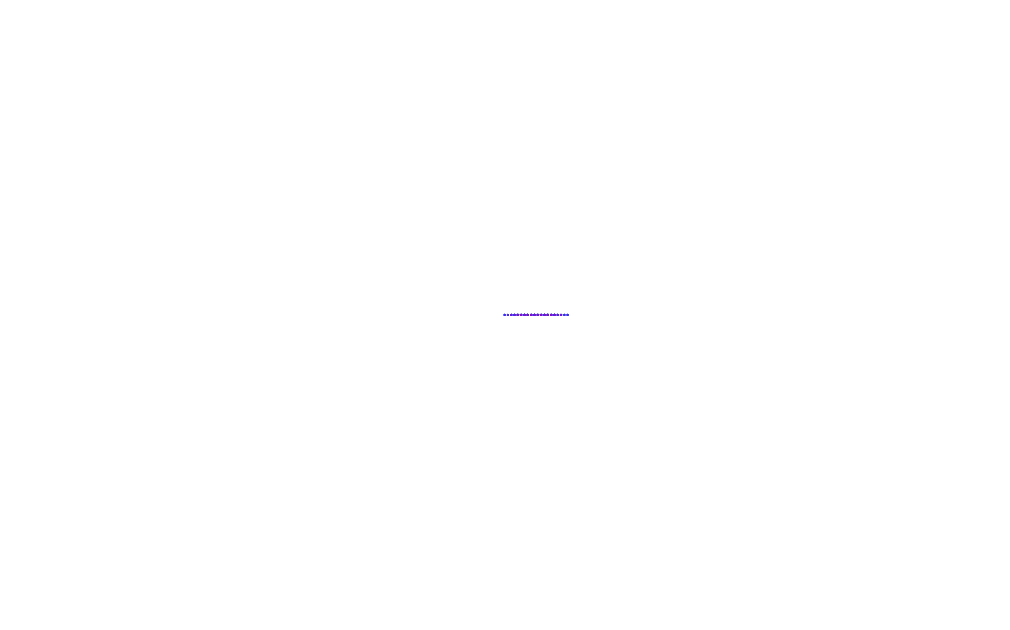

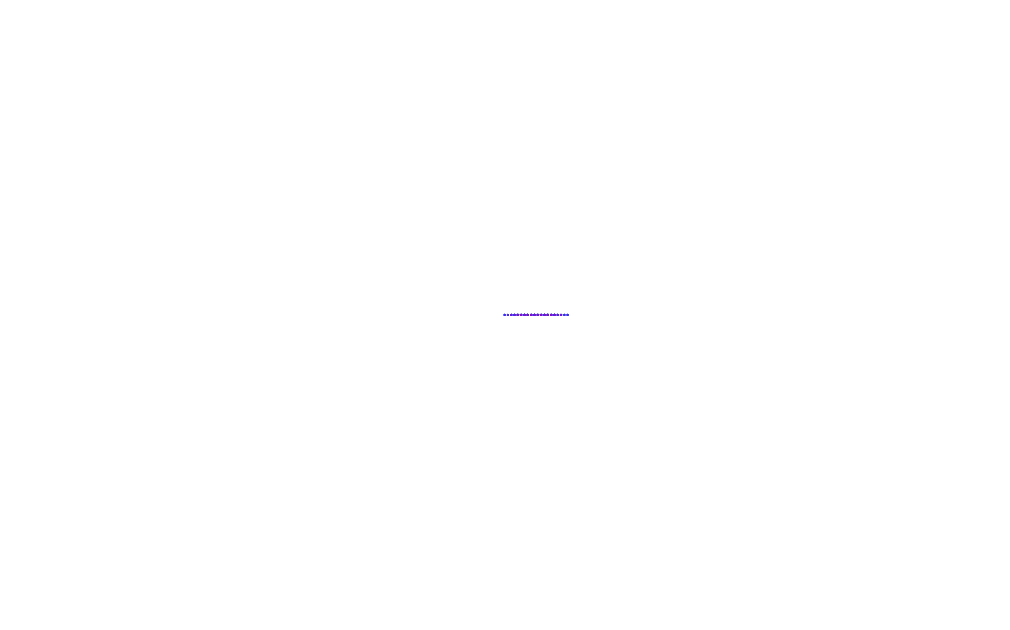

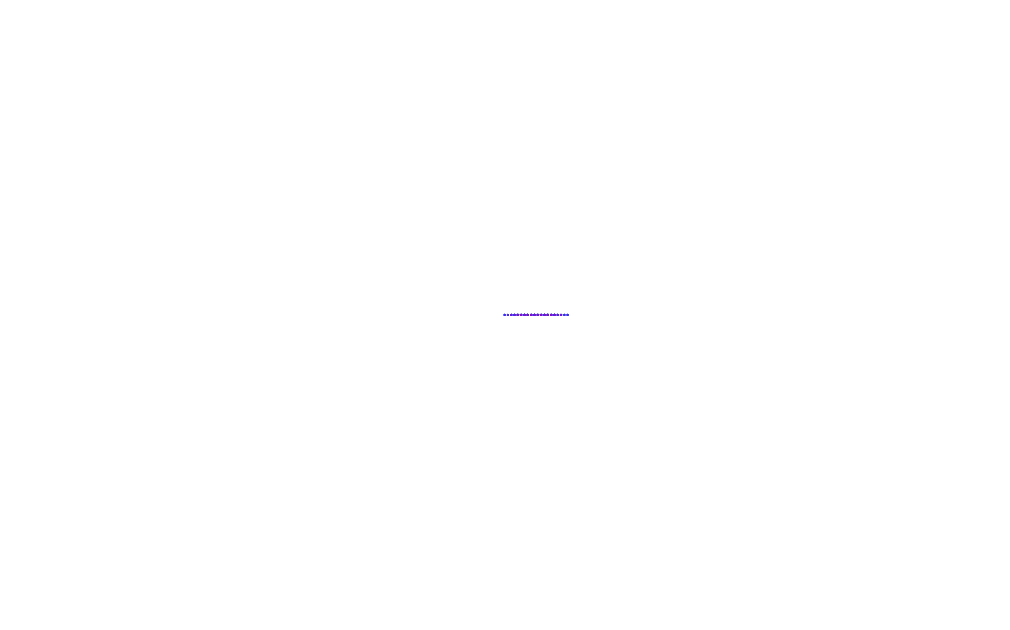

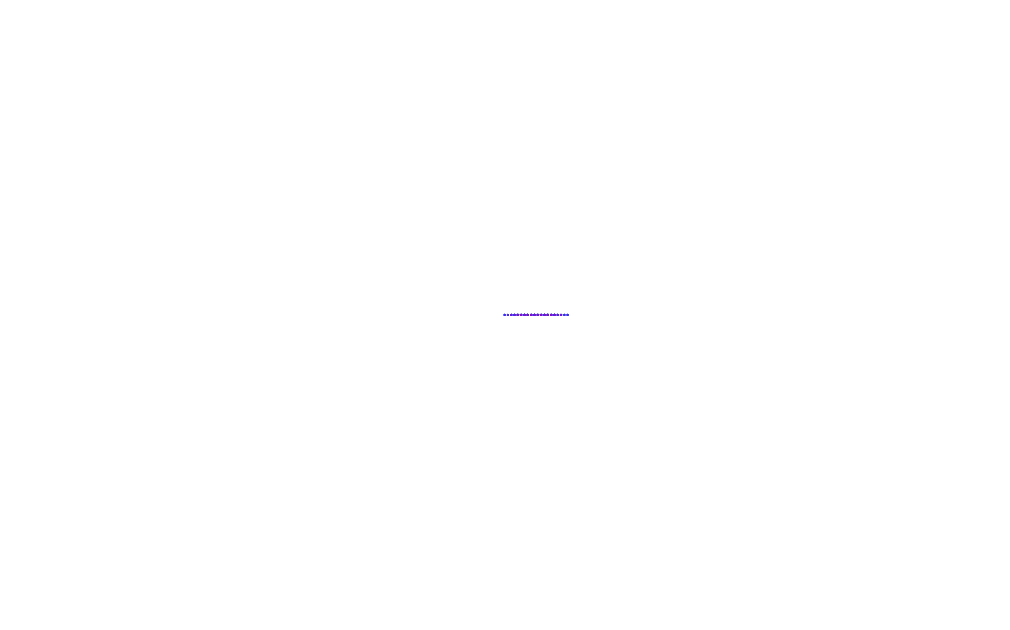

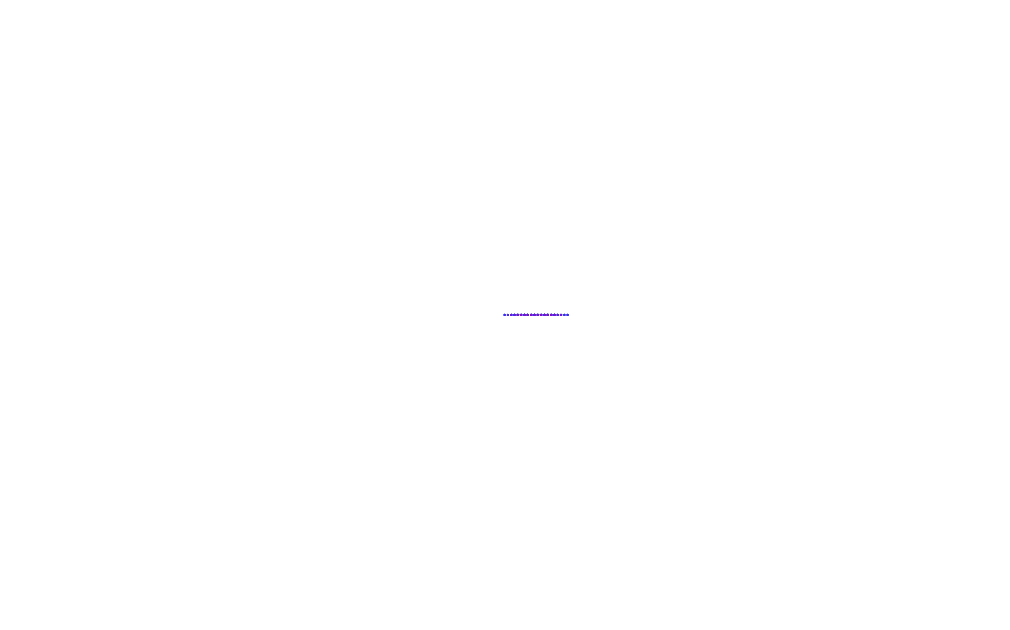

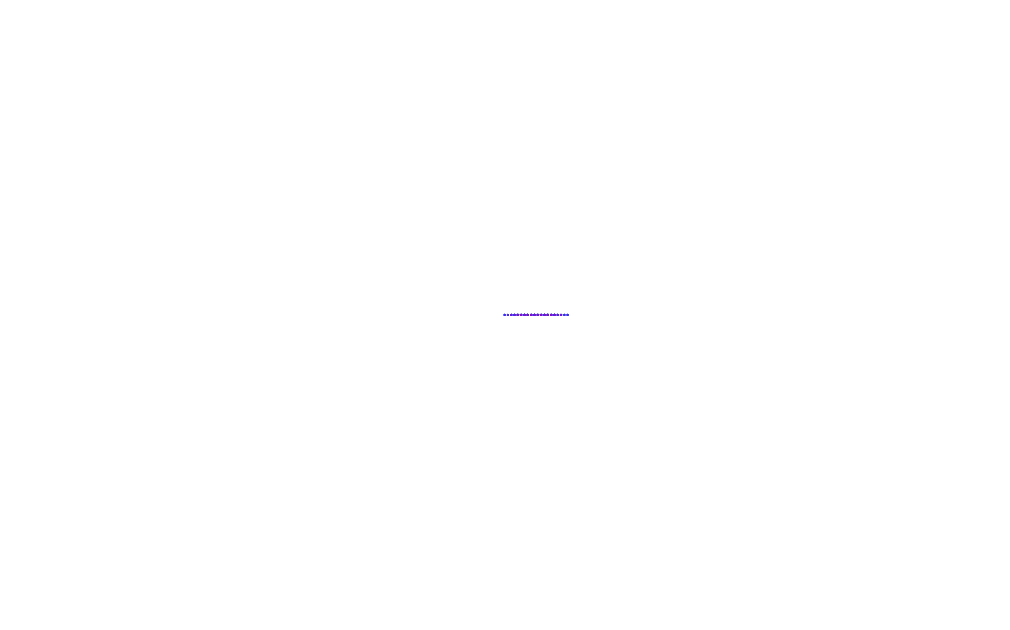

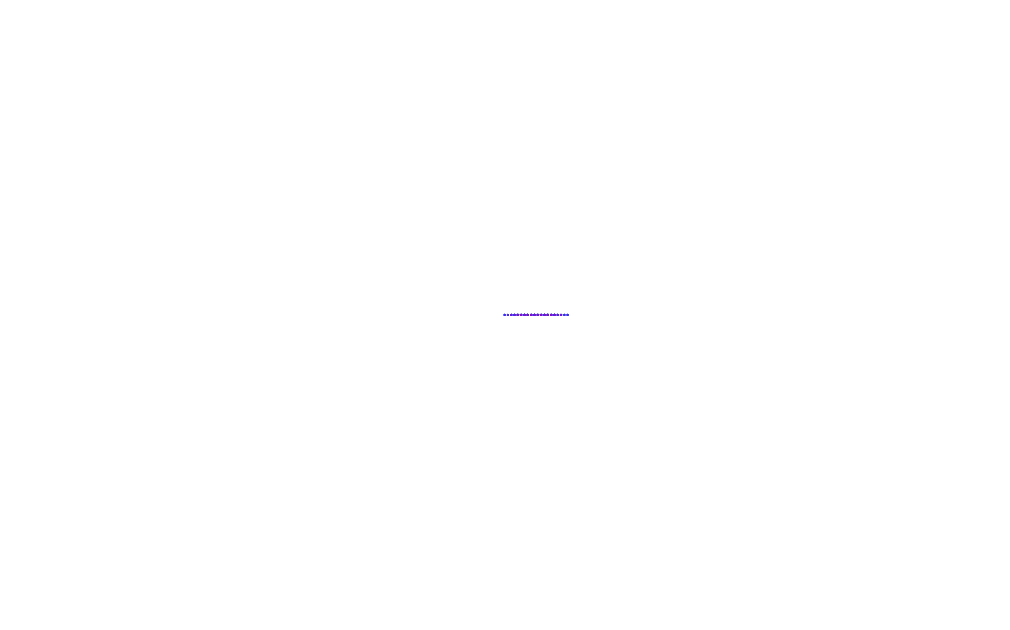

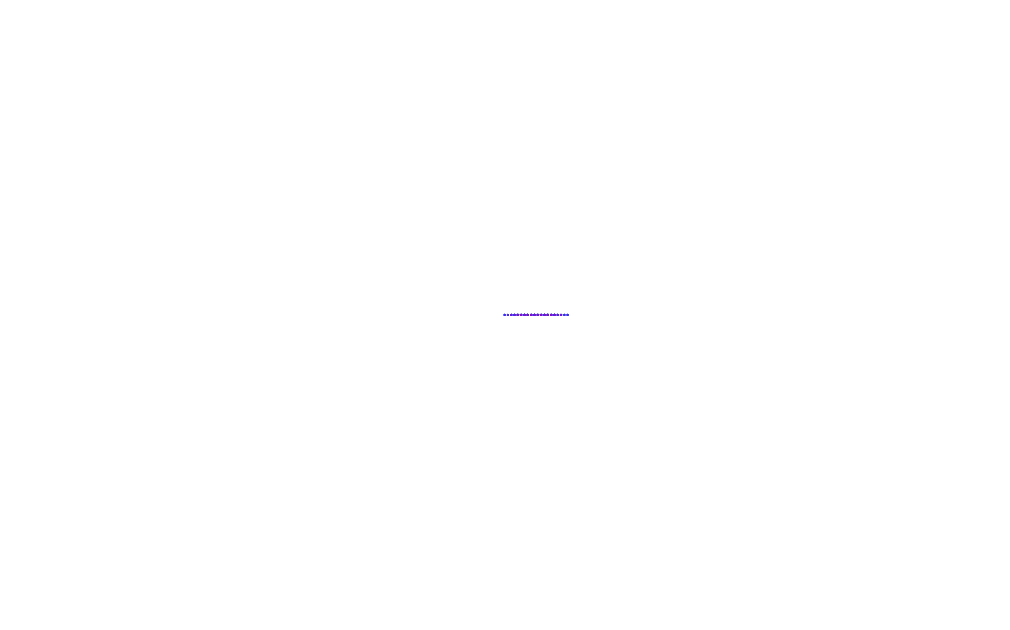

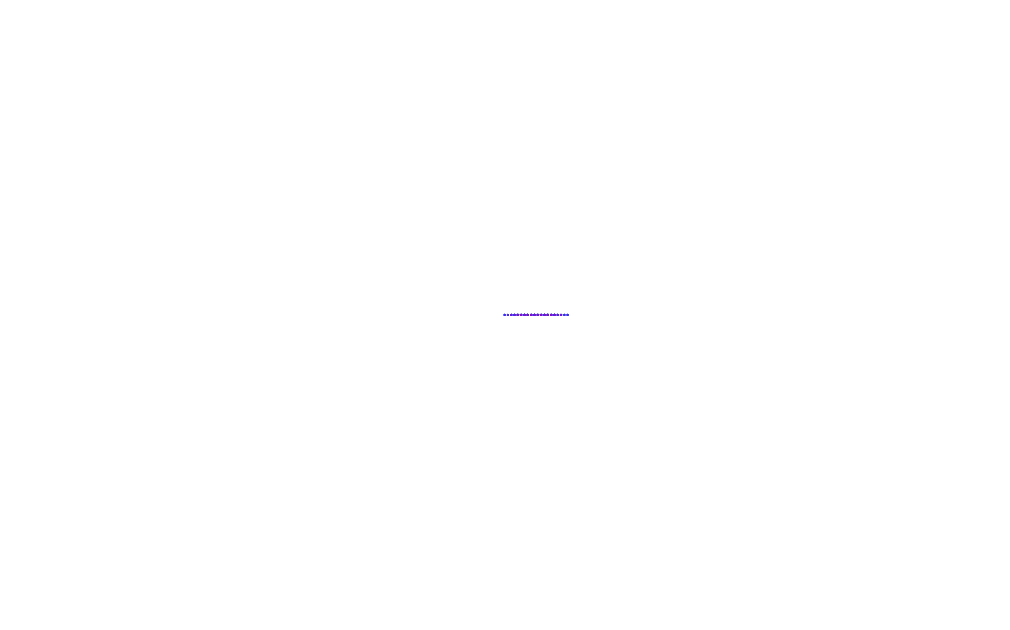

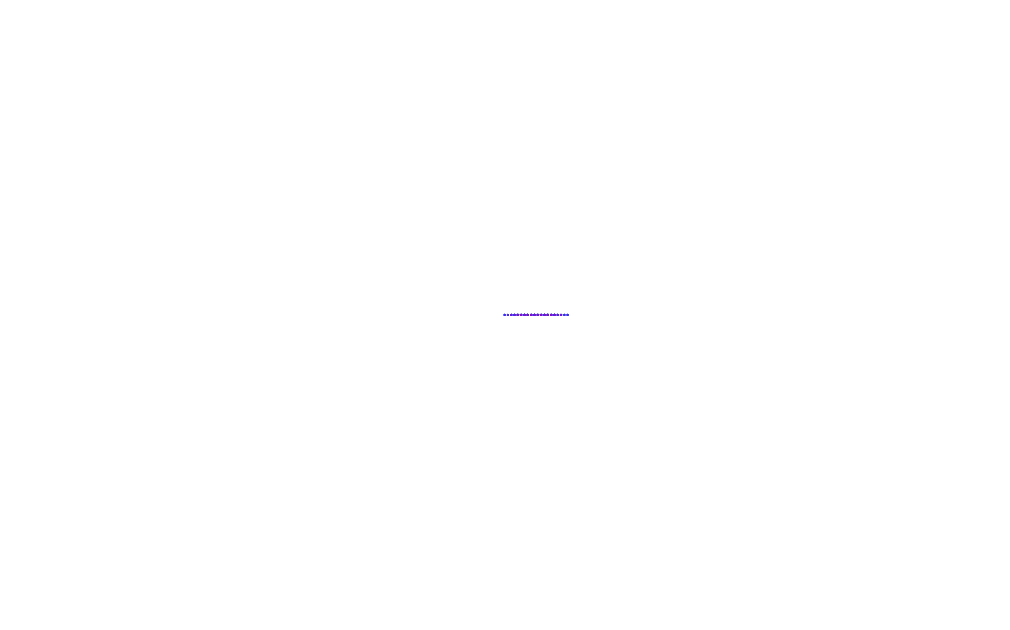

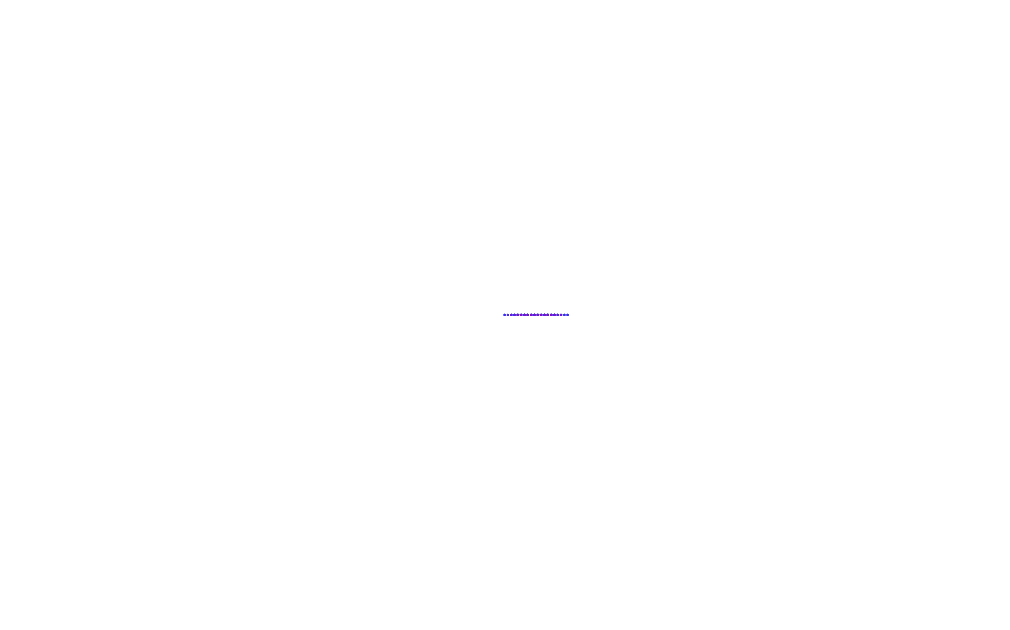

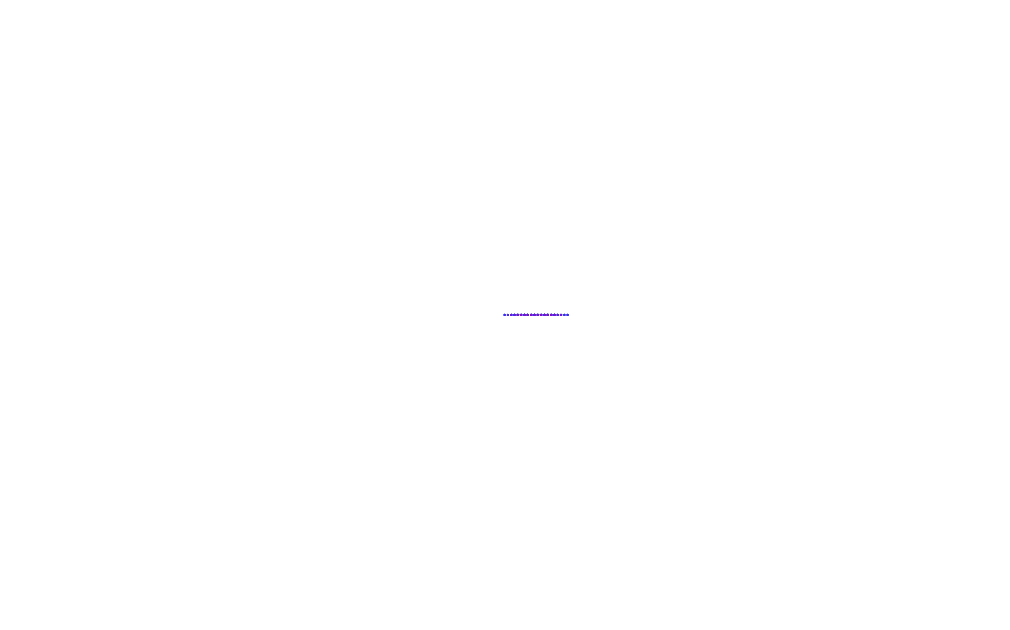

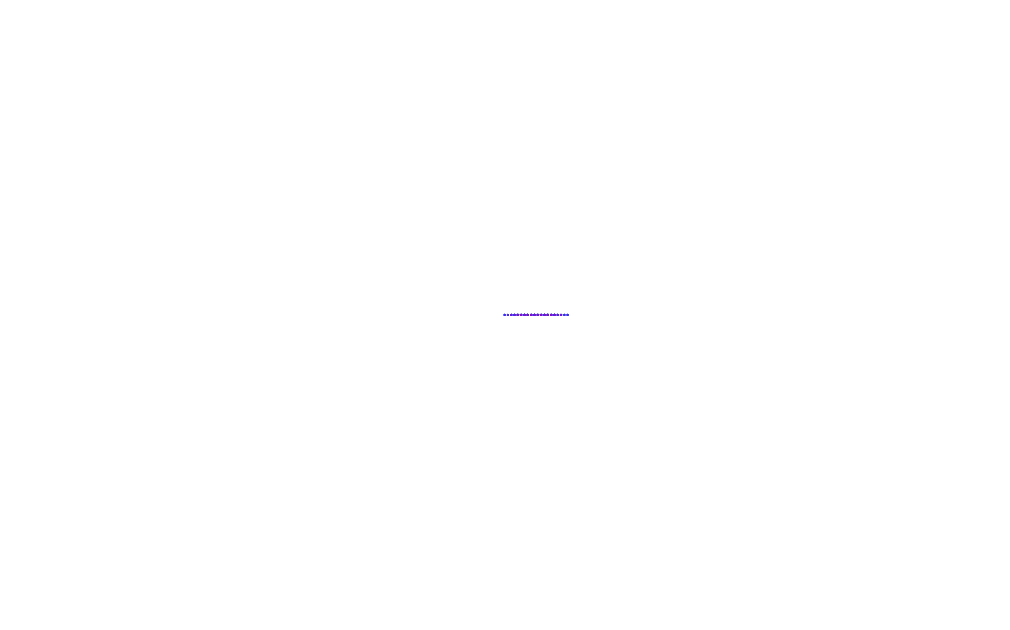

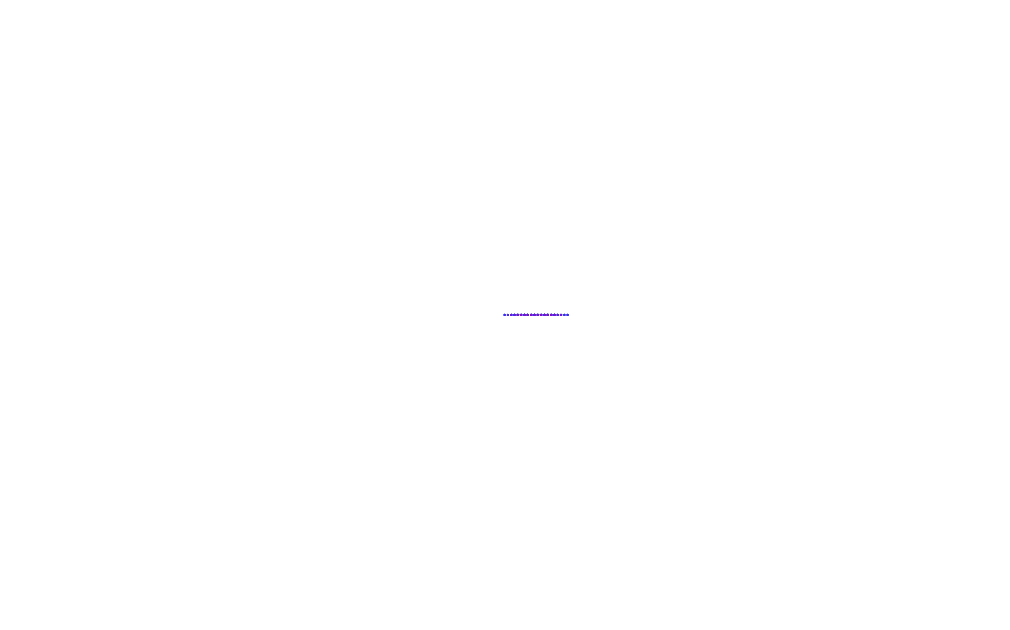

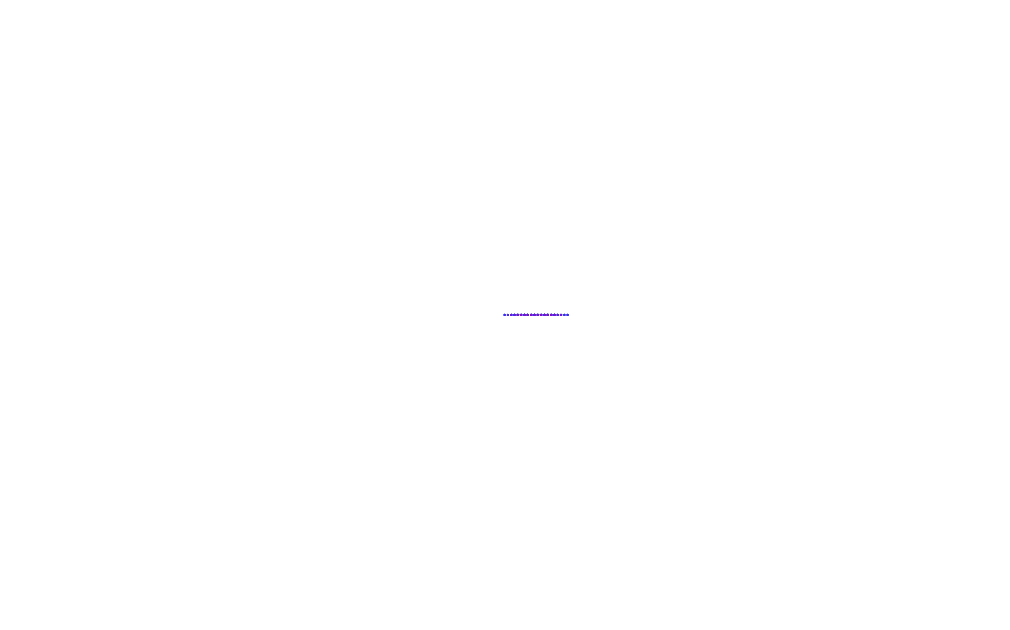

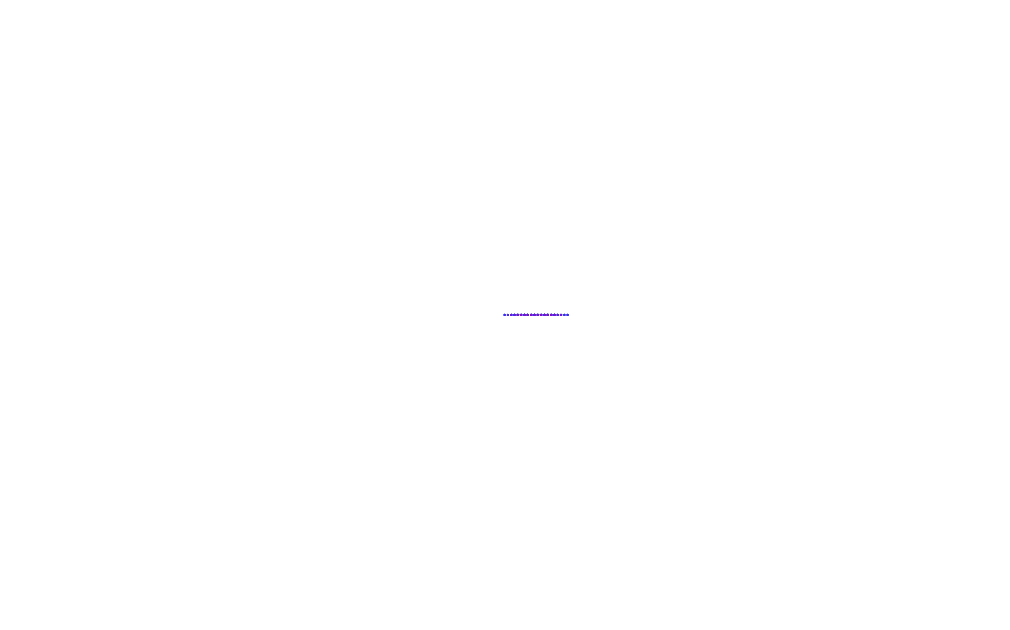

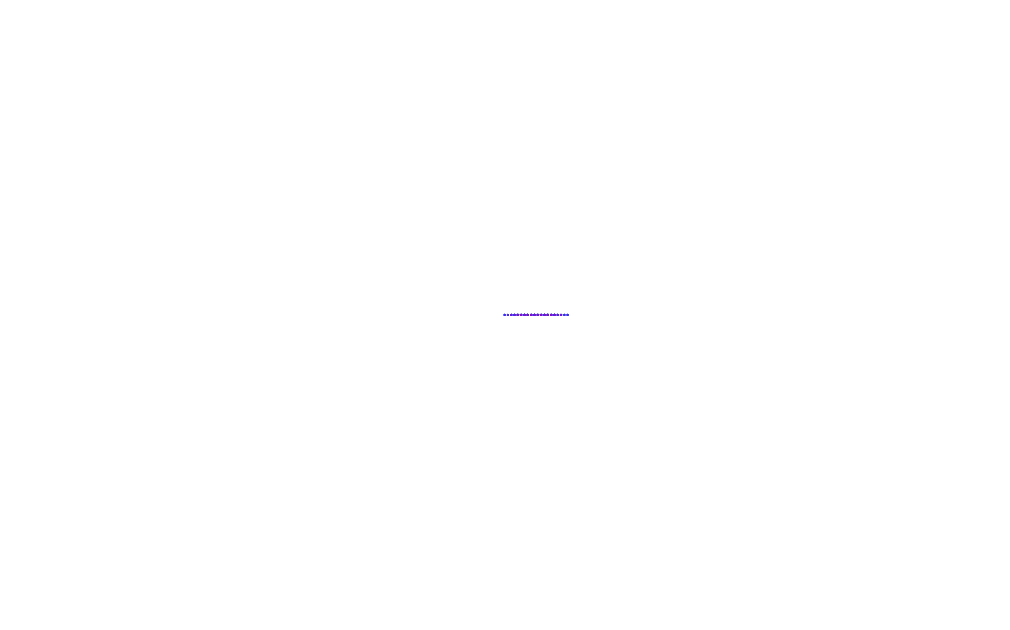

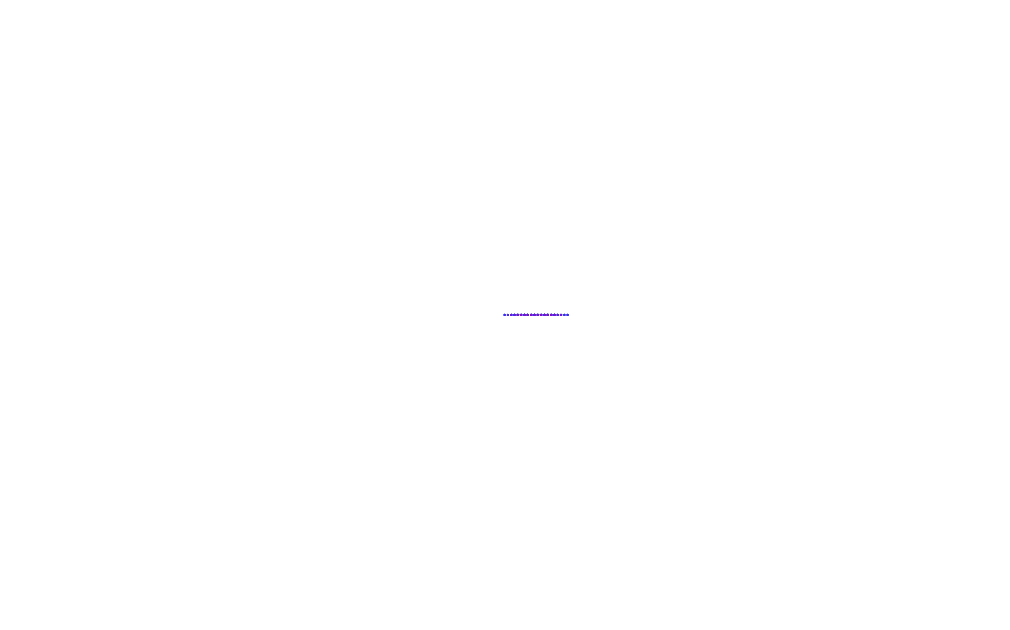

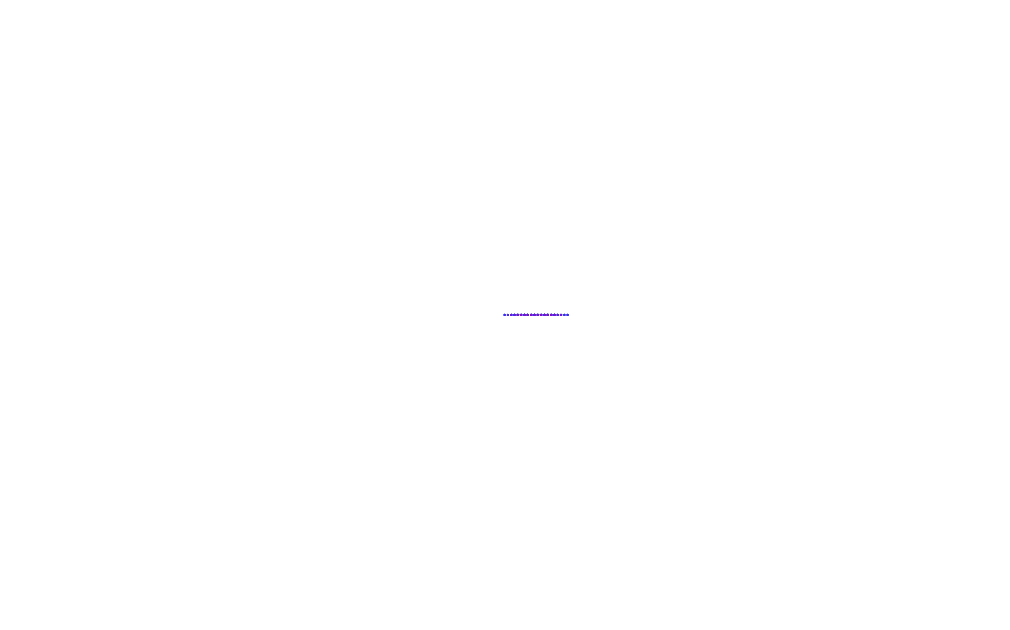

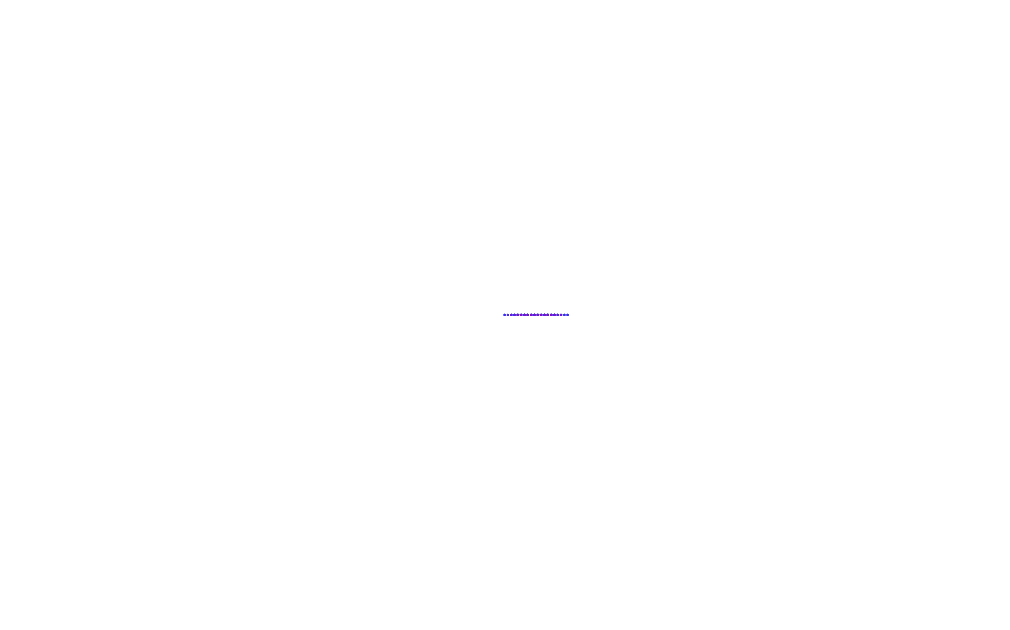

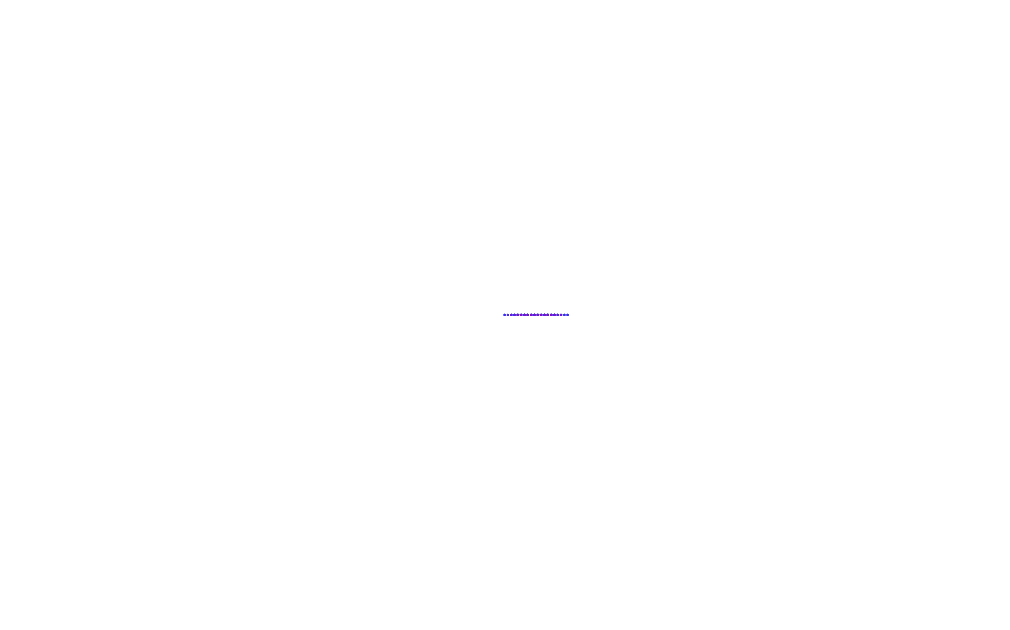

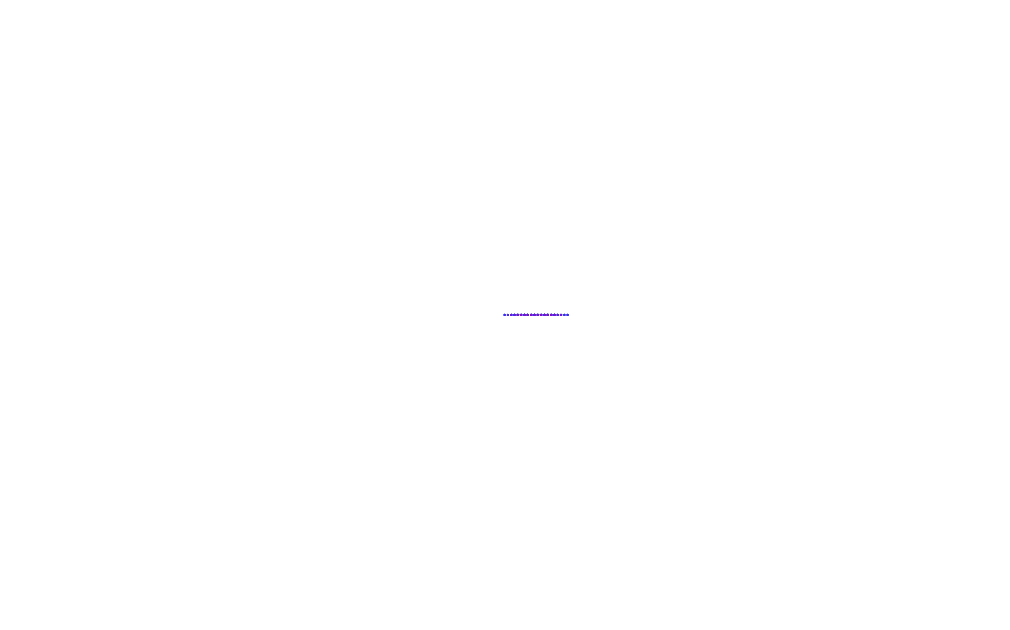

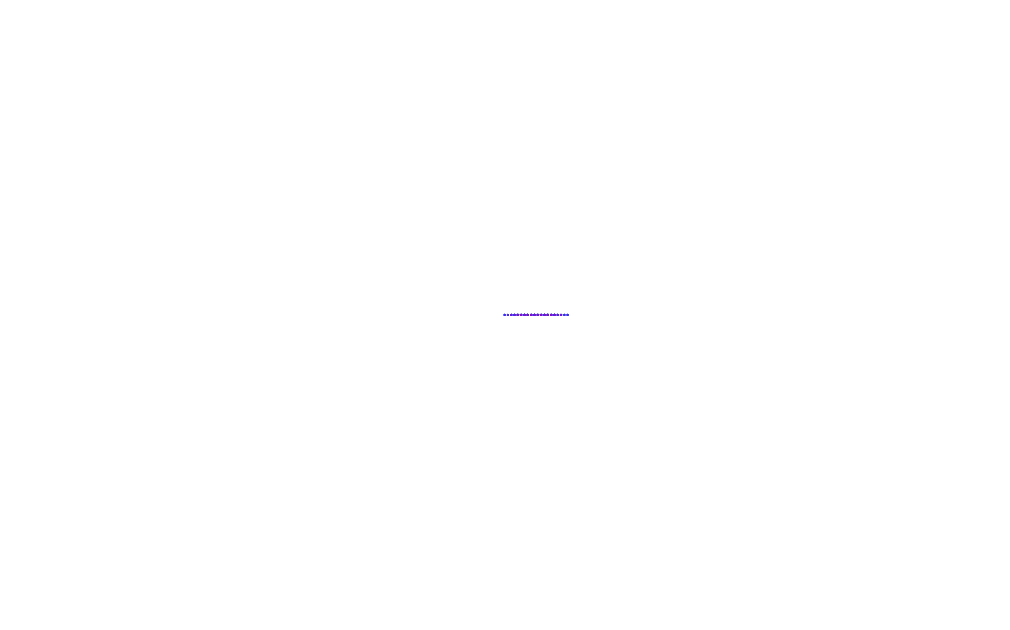

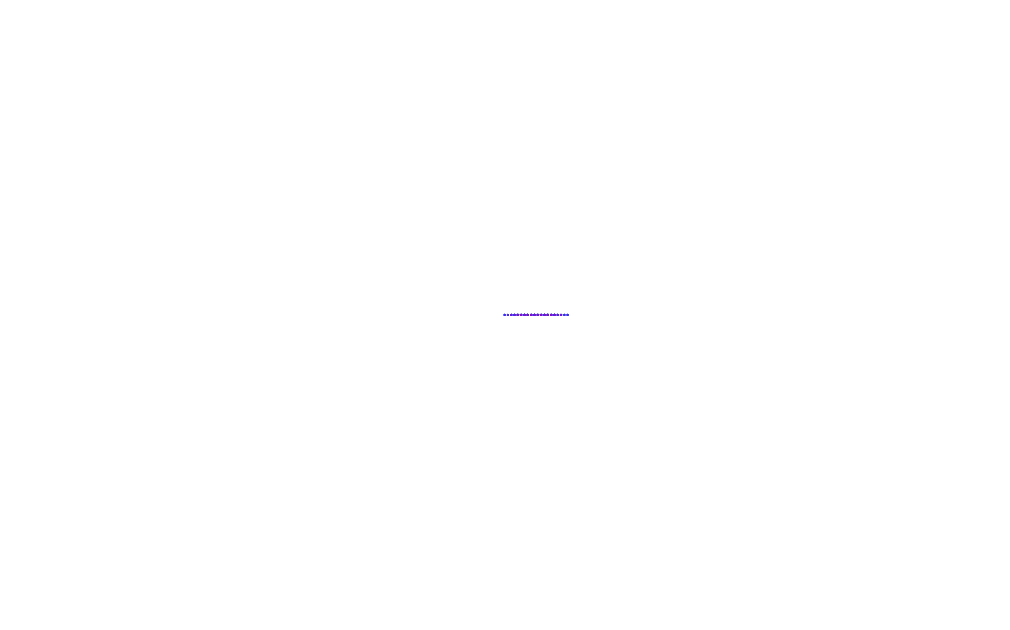

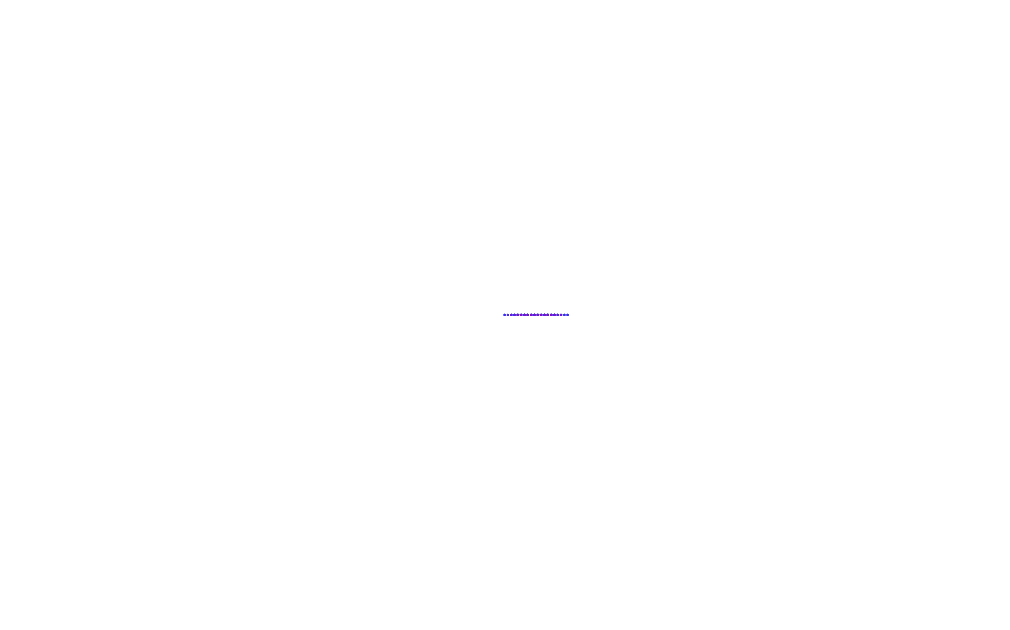

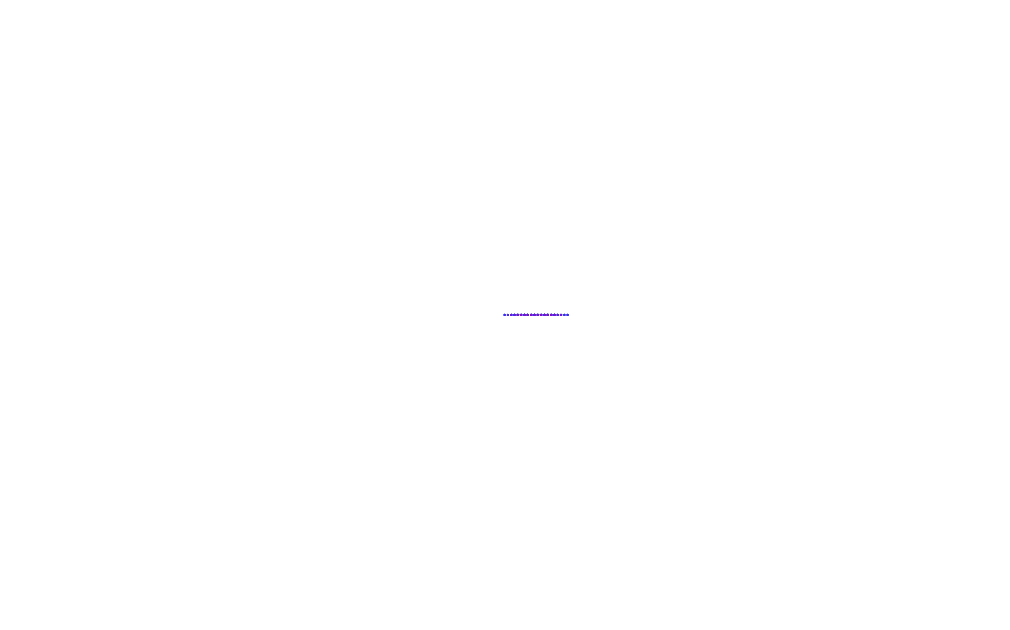

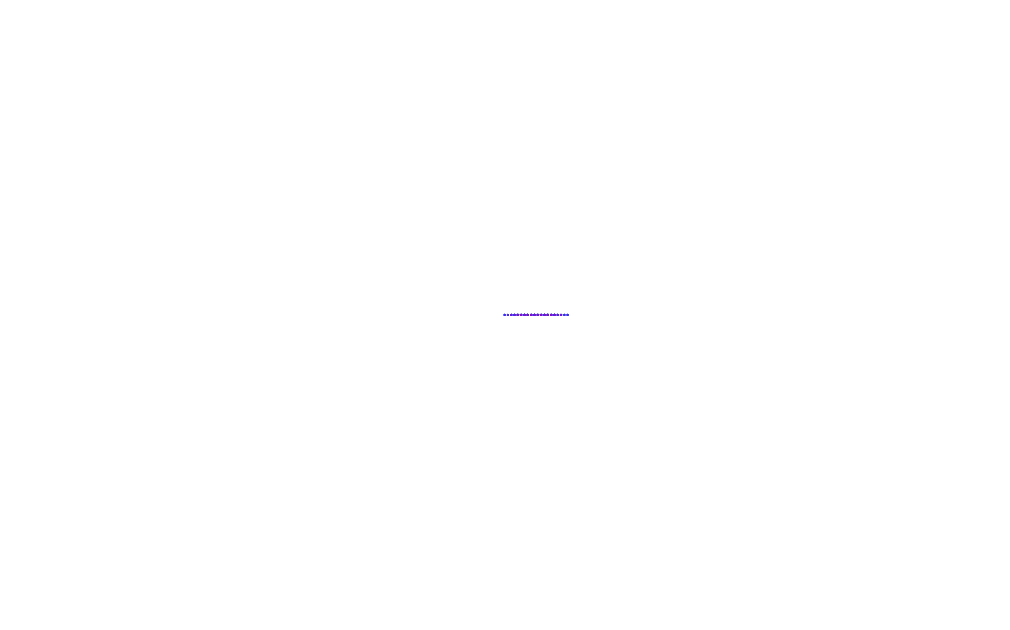

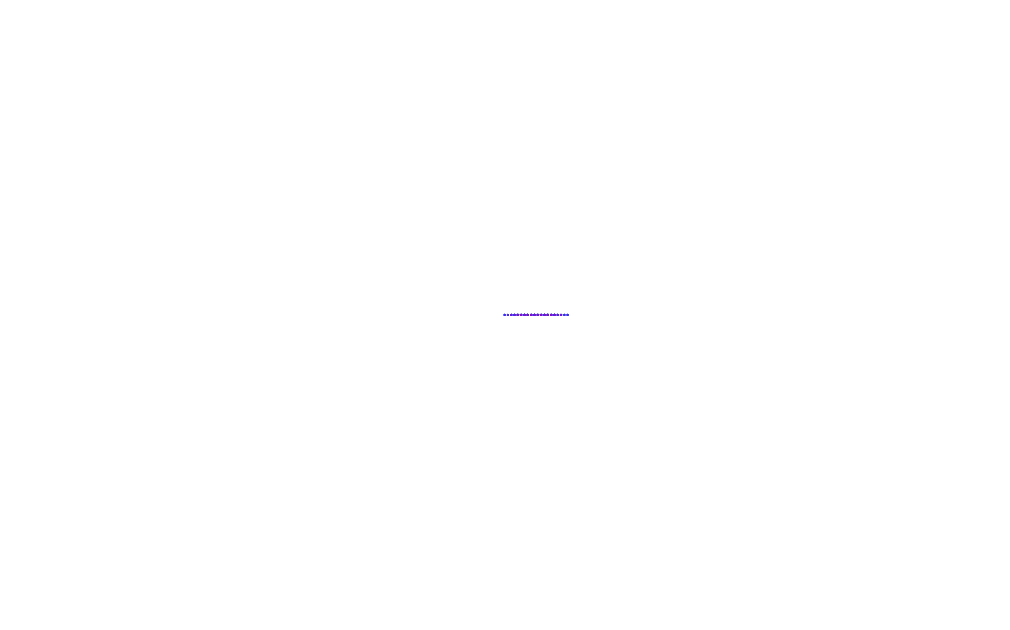

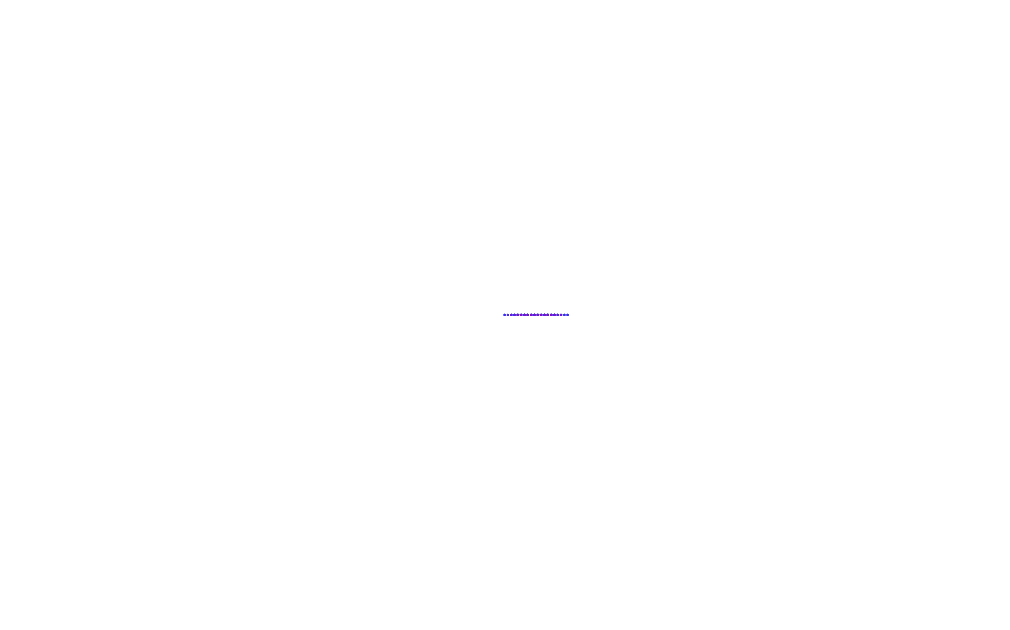

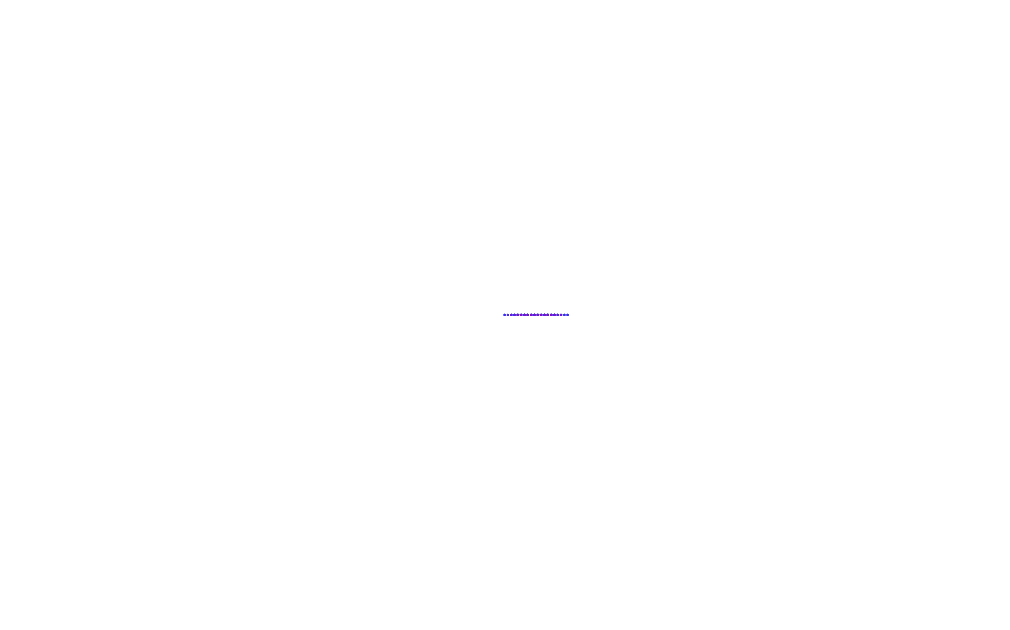

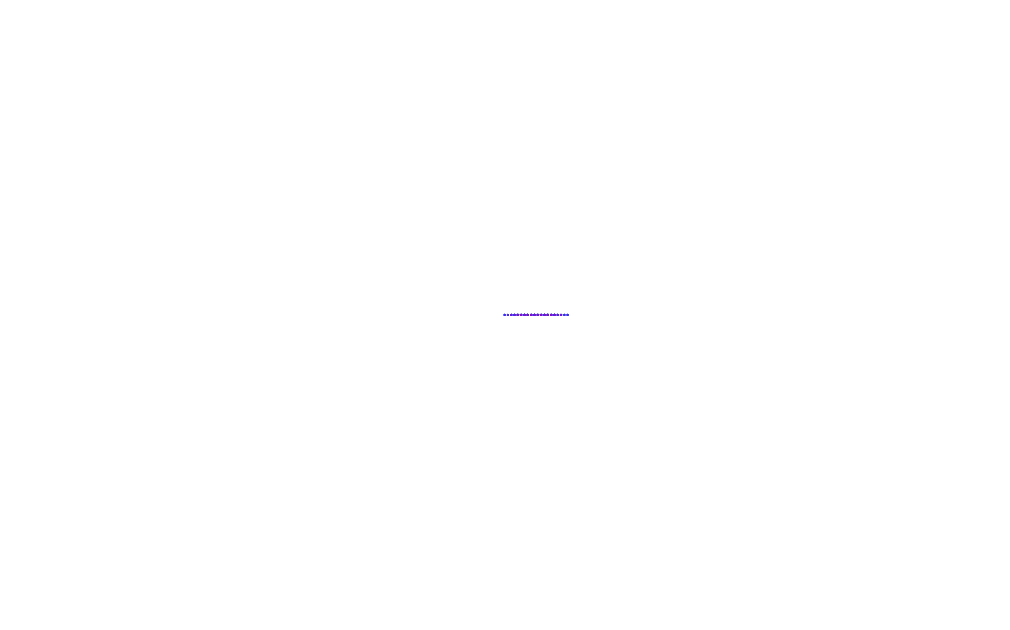

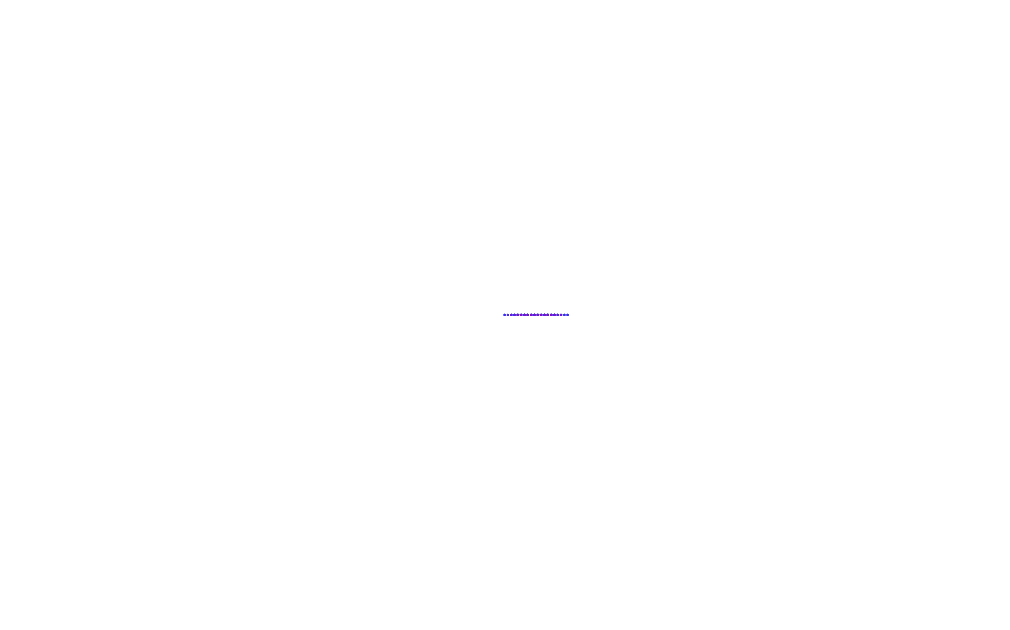

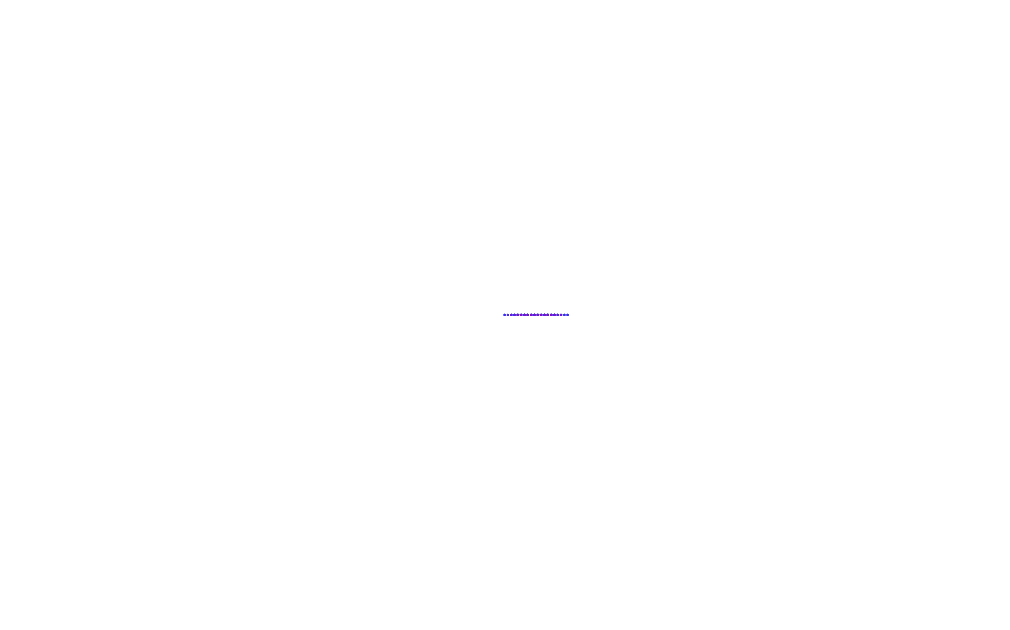

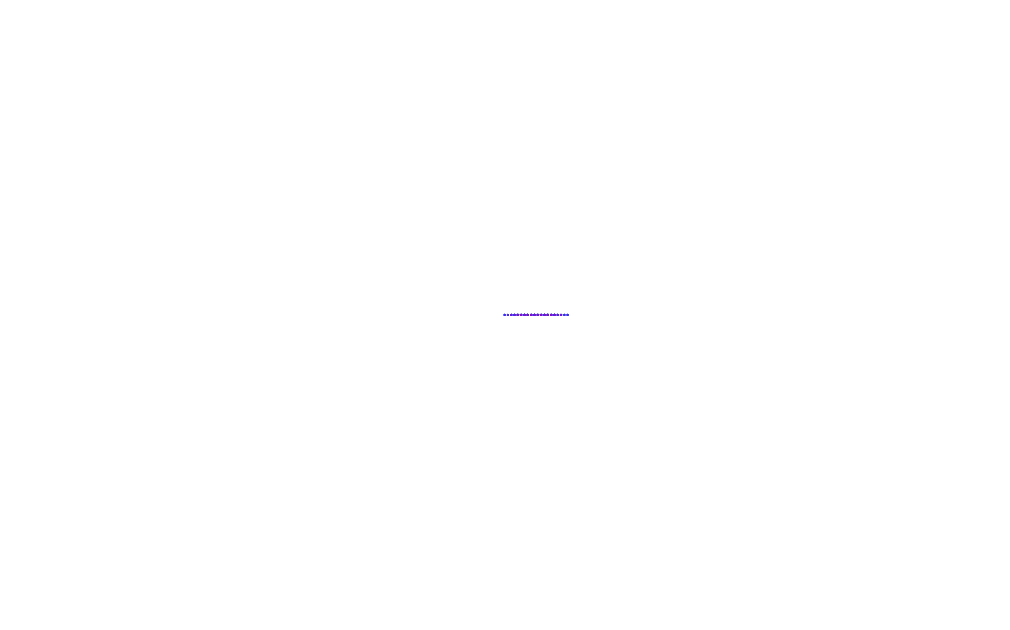

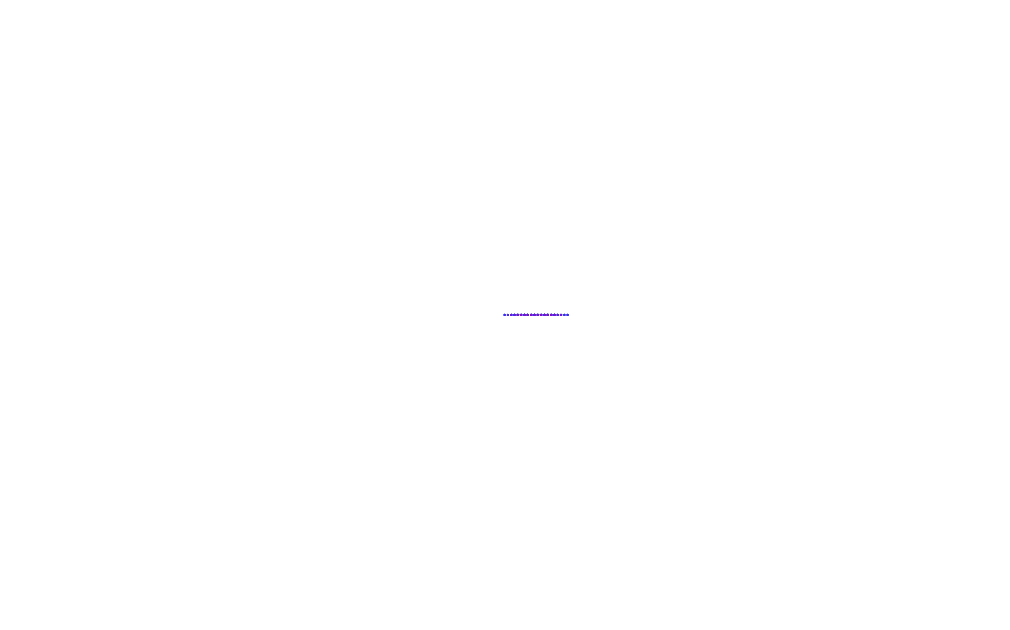

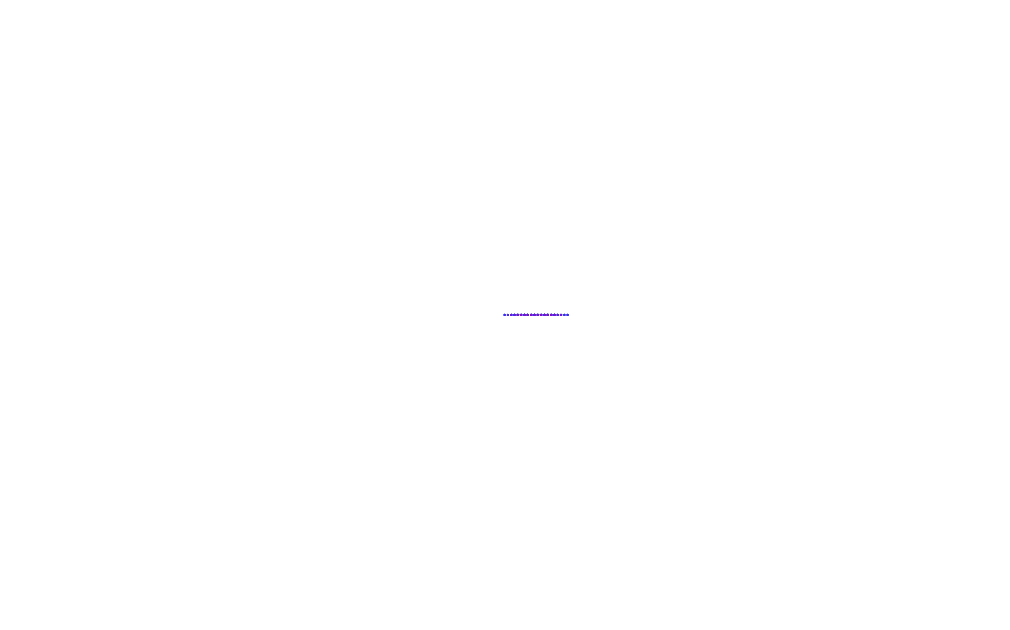

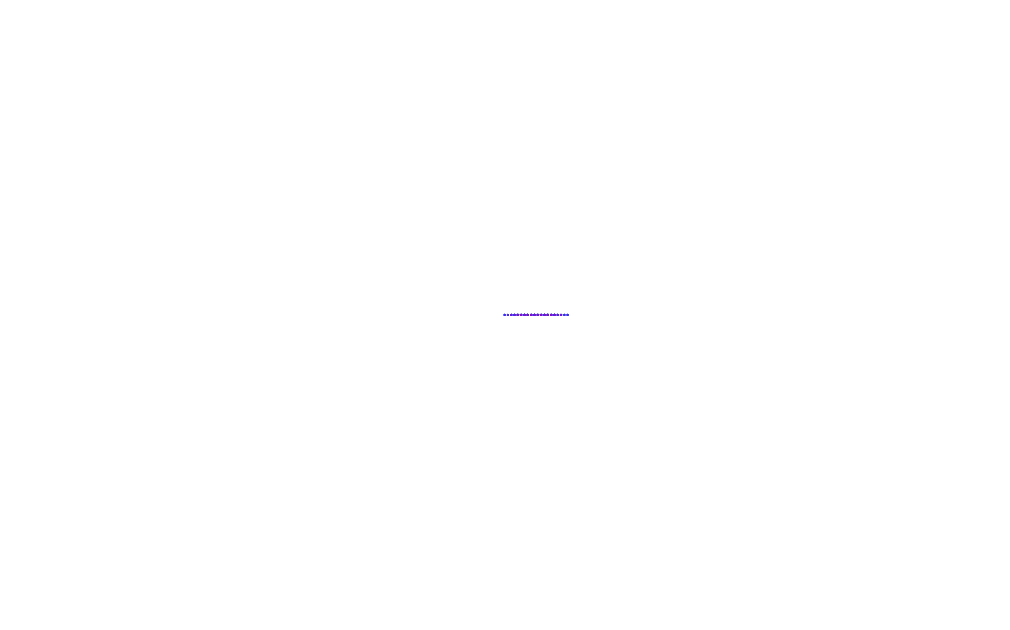

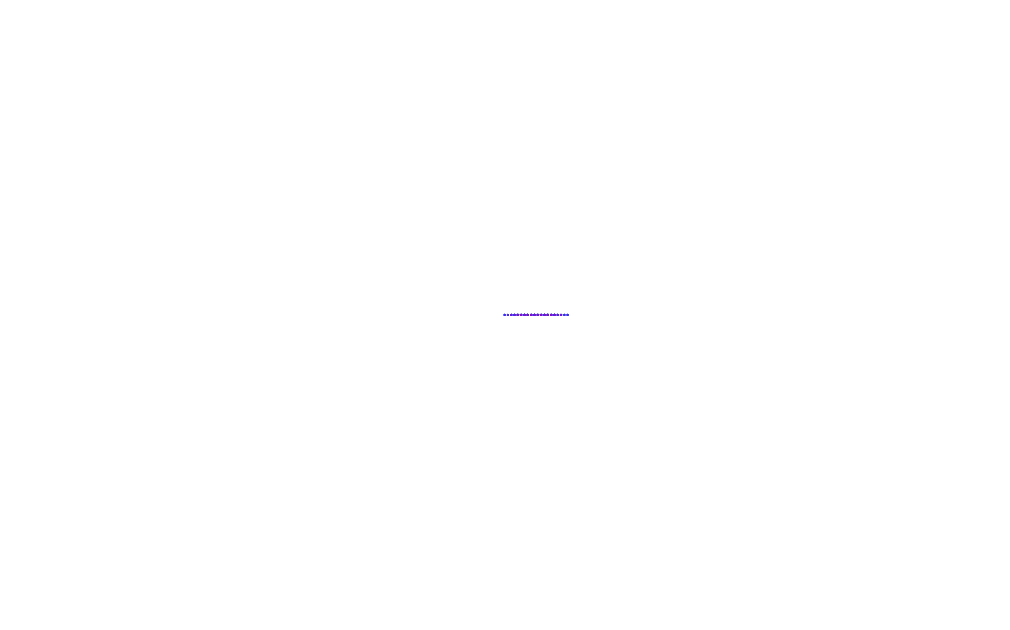

In [9]:
duration = el.get_default_args(el.EdgeGrid.render)['duration']
class EdgeGrid(el.EdgeGrid):
    def update(self, tau=.5):
        ind_max = np.argmax(self.particles[2, :])
        # TODO akin to pursuit
        #for i in range(14):
        #   
        #   self.particles[2, ind_max] = 0 # np.random.randn(self.particles.shape[1])
        #print (self.particles[2, :].min(), self.particles[2, :].max())
        self.particles[2, :] += self.dt/tau * (self.particles[2, :] - self.particles_ref)

e = EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure(N_mirror=2, alpha = .5)
e.particles_ref = e.particles[2, :].copy()
e.animate(scale = 32.)
#e.animate(fname='../files/expansion_foyers_greedy_12.mp4', scale = 32.)

## git


In [10]:
!git s

A  ../elasticite/__init__.py
AM ../elasticite/elasticite.py
 D ../files/elasticite/elasticite_test.mp4
 M ../files/sinc_mpl.mp4
 M ../files/sinc_vispy.mp4
 M 2015-02-26-elastic-grids-of-edges.ipynb
 M 2015-04-10_elastic-force.ipynb
 M 2015-04-30_trame-sensorielle.ipynb
 M "2015-09-30 \303\251lasticit\303\251, vapory and reflections.ipynb"
 M "2015-10-14 \303\251lasticit\303\251, Fresnel.ipynb"
 M "2015-10-27 \303\251lasticit\303\251 expansion-r\303\251action diffusion.ipynb"
 M 2015-11-17-elasticite-expansion-en-miroir-dynamique-dun-point-focal.ipynb
 M ../scenario_grille_v1_tore.py
 M ../setup.py
 D ../src/__init__.py
 D ../src/elasticite.py
?? ../elasticite/elasticite.egg-info/
?? ../files/2018-11-19_screenshot grille_v1_tore.mov
?? ../files/2018-11-20_screenshot grille_v1_tore.mov


In [11]:
!git commit -am' expansion - miroir de la structure - focus'

[master 361c854]  expansion - miroir de la structure - focus
 14 files changed, 5612 insertions(+), 1156 deletions(-)
 rename {src => elasticite}/__init__.py (100%)
 rename {src => elasticite}/elasticite.py (91%)
 delete mode 100644 files/elasticite/elasticite_test.mp4
 rewrite "posts/2015-10-27 \303\251lasticit\303\251 expansion-r\303\251action diffusion.ipynb" (95%)
 rewrite posts/2015-11-17-elasticite-expansion-en-miroir-dynamique-dun-point-focal.ipynb (95%)
 mode change 100644 => 100755


In [12]:
!git commit -m' nb_pas ' ../src/elasticite.py


error: pathspec '../src/elasticite.py' did not match any file(s) known to git


In [13]:
! git push

Enumerating objects: 31, done.
Counting objects: 100% (31/31), done.
Delta compression using up to 8 threads
Compressing objects: 100% (17/17), done.
Writing objects: 100% (17/17), 309.99 KiB | 8.86 MiB/s, done.
Total 17 (delta 12), reused 0 (delta 0)
remote: Resolving deltas: 100% (12/12), completed with 10 local objects.
remote: This repository moved. Please use the new location:
remote:   https://github.com/NaturalPatterns/2016_elasticite.git
To https://github.com/NaturalPatterns/elasticite
   39f385b..361c854  master -> master
